In [1]:
install.packages("lmtest")
install.packages("forecast")
install.packages("DIMORA")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘minpack.lm’, ‘numDeriv’, ‘reshape2’, ‘deSolve’




In [2]:
library(readxl)
library(lmtest)
library(forecast)
library(DIMORA)
library(dplyr)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: minpack.lm

Loading required package: numDeriv

Loading required package: reshape2

Loading required package: deSolve


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
library(ggplot2)
options(repr.plot.width=20, repr.plot.height=10)

In [4]:
retail_de <- read.csv("DAUTONSA.csv")
retail_de <- data.frame(retail_de)
head(retail_de)

sail_total <- read.csv("TOTALSA.csv")
sail_total <- data.frame(sail_total)
head(sail_total)

DATE       DAUTONSA
1 1967-01-01 564.1   
2 1967-02-01 509.1   
3 1967-03-01 670.4   
4 1967-04-01 710.2   
5 1967-05-01 744.8   
6 1967-06-01 780.2

DATE       TOTALSA
1 1976-01-01 12.814 
2 1976-02-01 13.340 
3 1976-03-01 13.378 
4 1976-04-01 13.223 
5 1976-05-01 12.962 
6 1976-06-01 13.051

In [5]:
time_retail <- 1:NROW(retail_de)
retail <- retail_de$DAUTONSA

time_sail<- 1:NROW(sail_total)
sail <- sail_total$TOTALSA

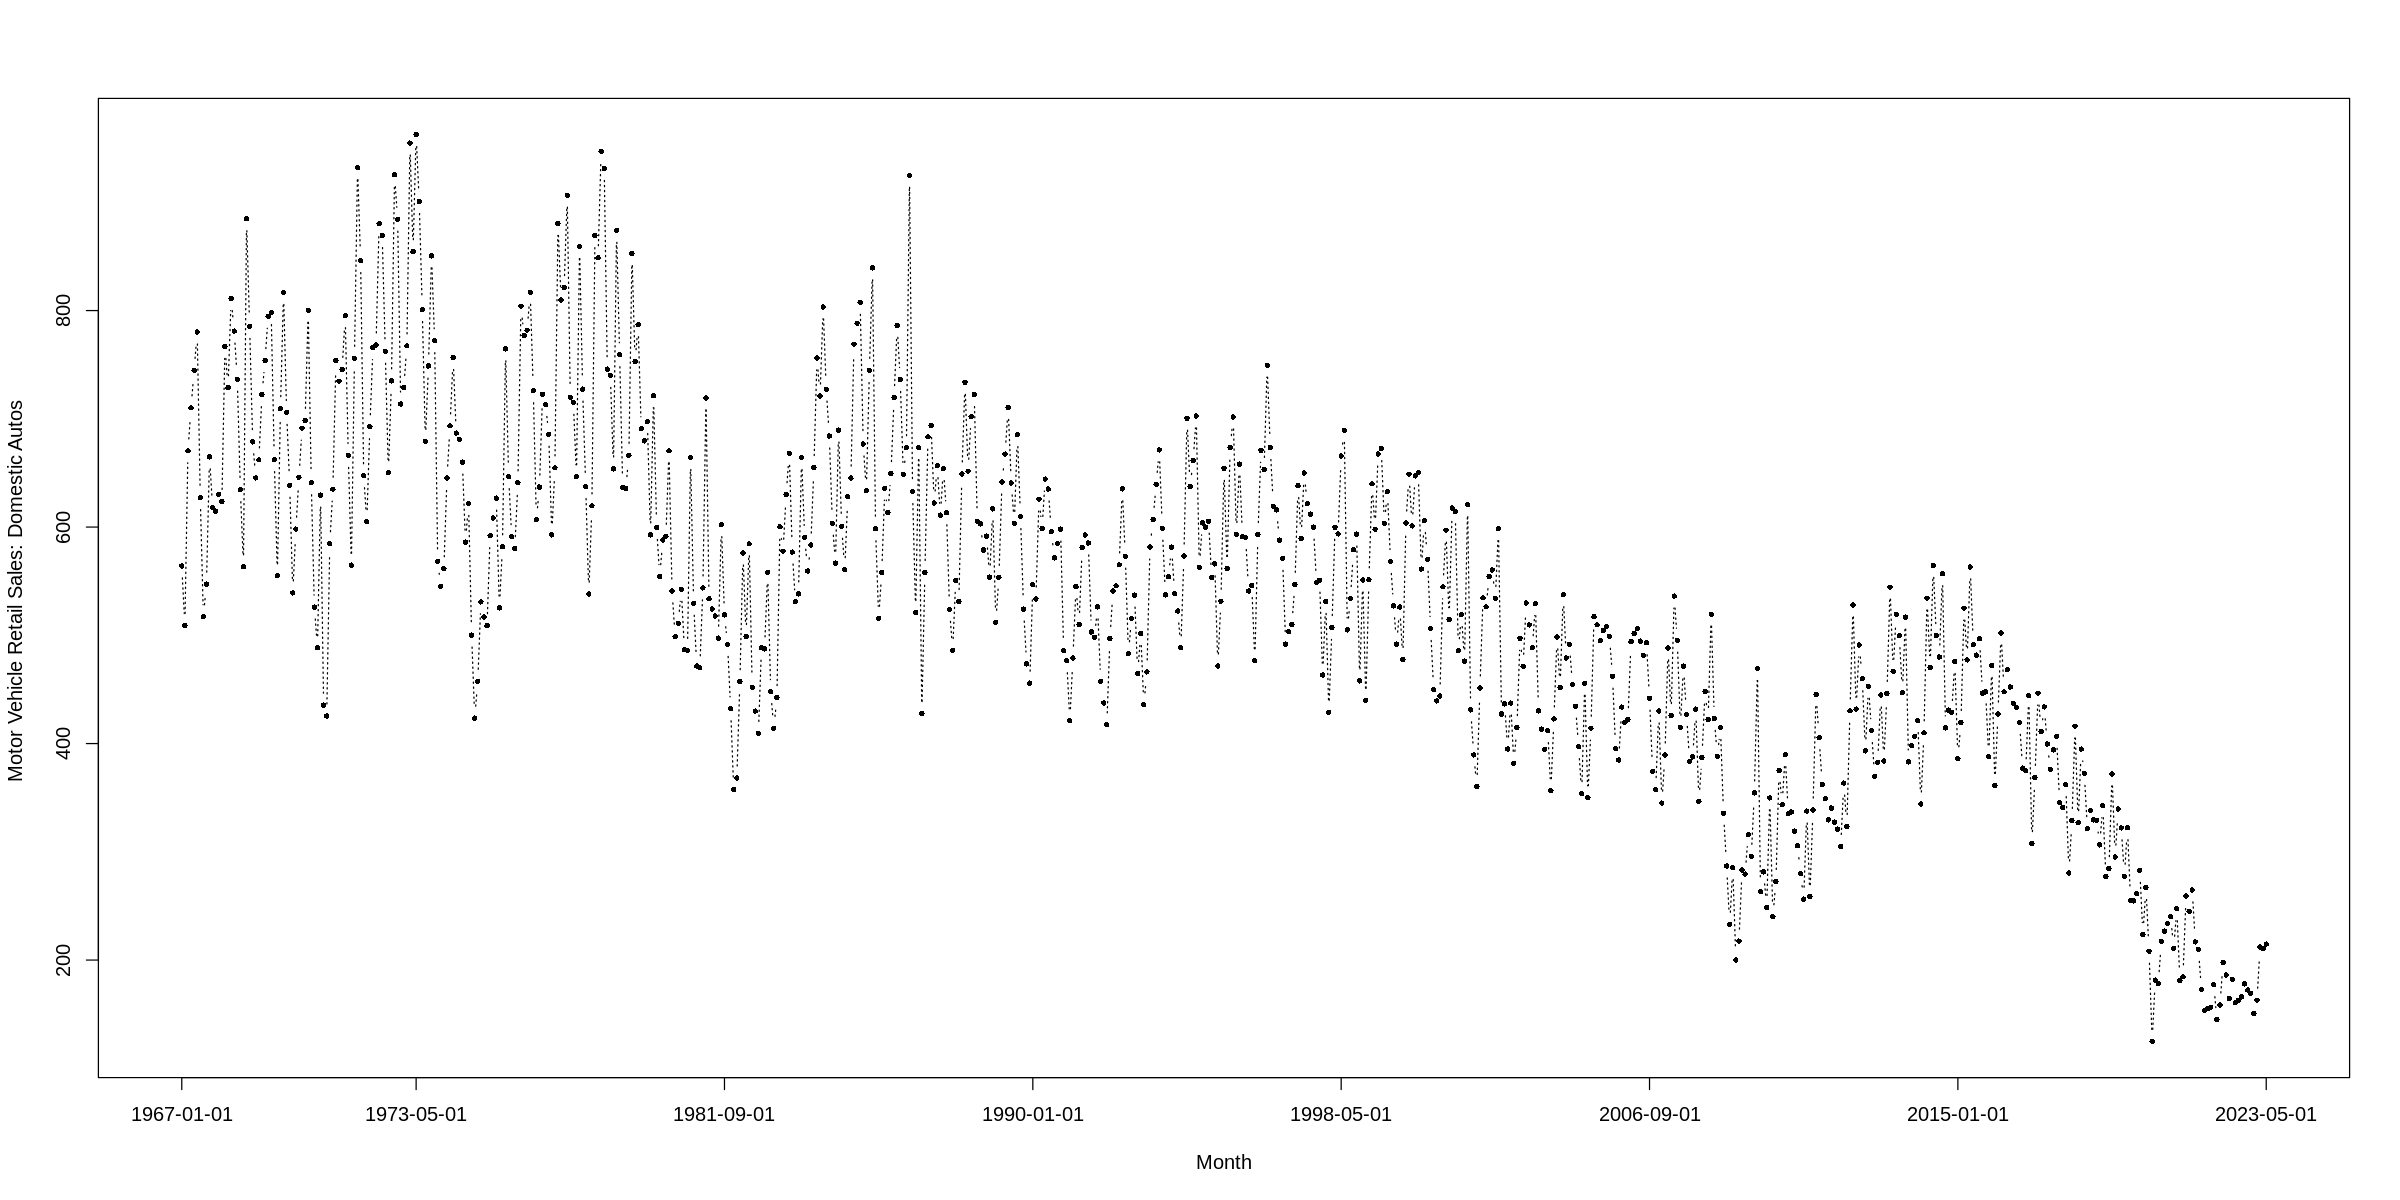

In [6]:
plot(retail, type= "b",xlab="Month", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,77,177,277,377,477,577,677), labels=retail_de$DATE[c(1,77,177,277,377,477,577,677)])

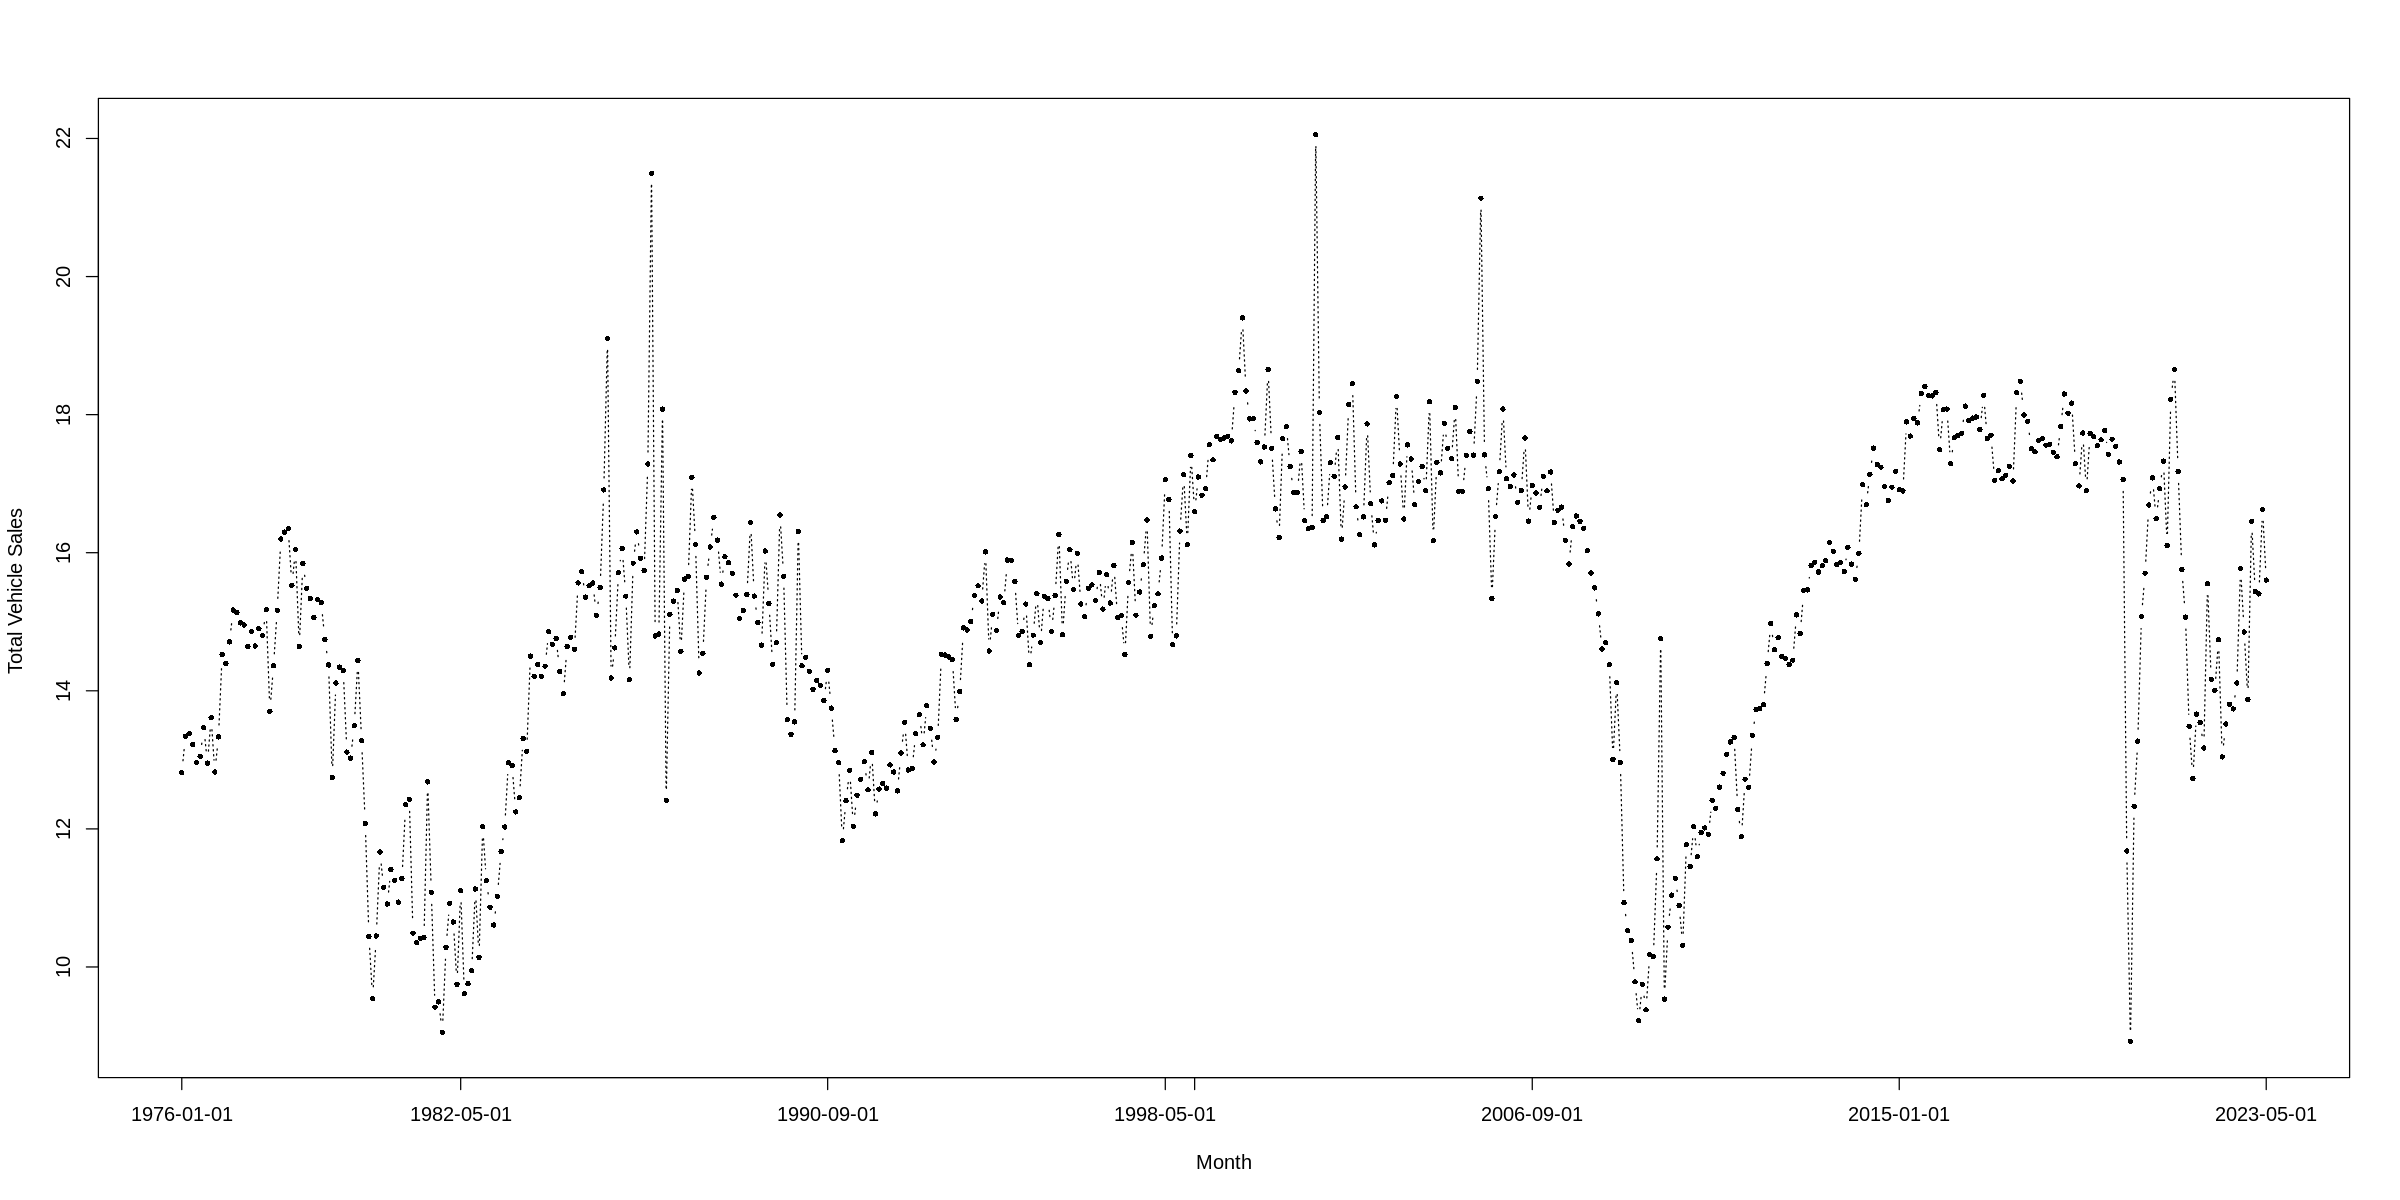

In [7]:
plot(sail, type= "b",xlab="Month", ylab="Total Vehicle Sales ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,77,177,277,269,369,469,569), labels=sail_total$DATE[c(1,77,177,277,269,369,469,569)])

In [8]:
#### filtering for year

retail_de$date<-as.Date(retail_de$DATE, "%Y-%m-%d")
retail_de$year <- format(retail_de$date, '%Y')
r_de_f <-retail_de %>% filter(year>='2009' & year<='2021' )
head(r_de_f)

sail_total$date<-as.Date(sail_total$DATE, "%Y-%m-%d")
sail_total$year <- format(sail_total$date, '%Y')
s_to_f <-sail_total %>% filter(year>='2009' & year<='2021' )
head(s_to_f)

DATE       DAUTONSA date       year
1 2009-01-01 200.0    2009-01-01 2009
2 2009-02-01 217.5    2009-02-01 2009
3 2009-03-01 283.1    2009-03-01 2009
4 2009-04-01 279.4    2009-04-01 2009
5 2009-05-01 315.8    2009-05-01 2009
6 2009-06-01 295.9    2009-06-01 2009

DATE       TOTALSA date       year
1 2009-01-01  9.786  2009-01-01 2009
2 2009-02-01  9.223  2009-02-01 2009
3 2009-03-01  9.748  2009-03-01 2009
4 2009-04-01  9.379  2009-04-01 2009
5 2009-05-01 10.176  2009-05-01 2009
6 2009-06-01 10.149  2009-06-01 2009

In [9]:
t_de <- 1:NROW(r_de_f)
de <- r_de_f$DAUTONSA

t_to<- 1:NROW(s_to_f)
to <- s_to_f$TOTALSA

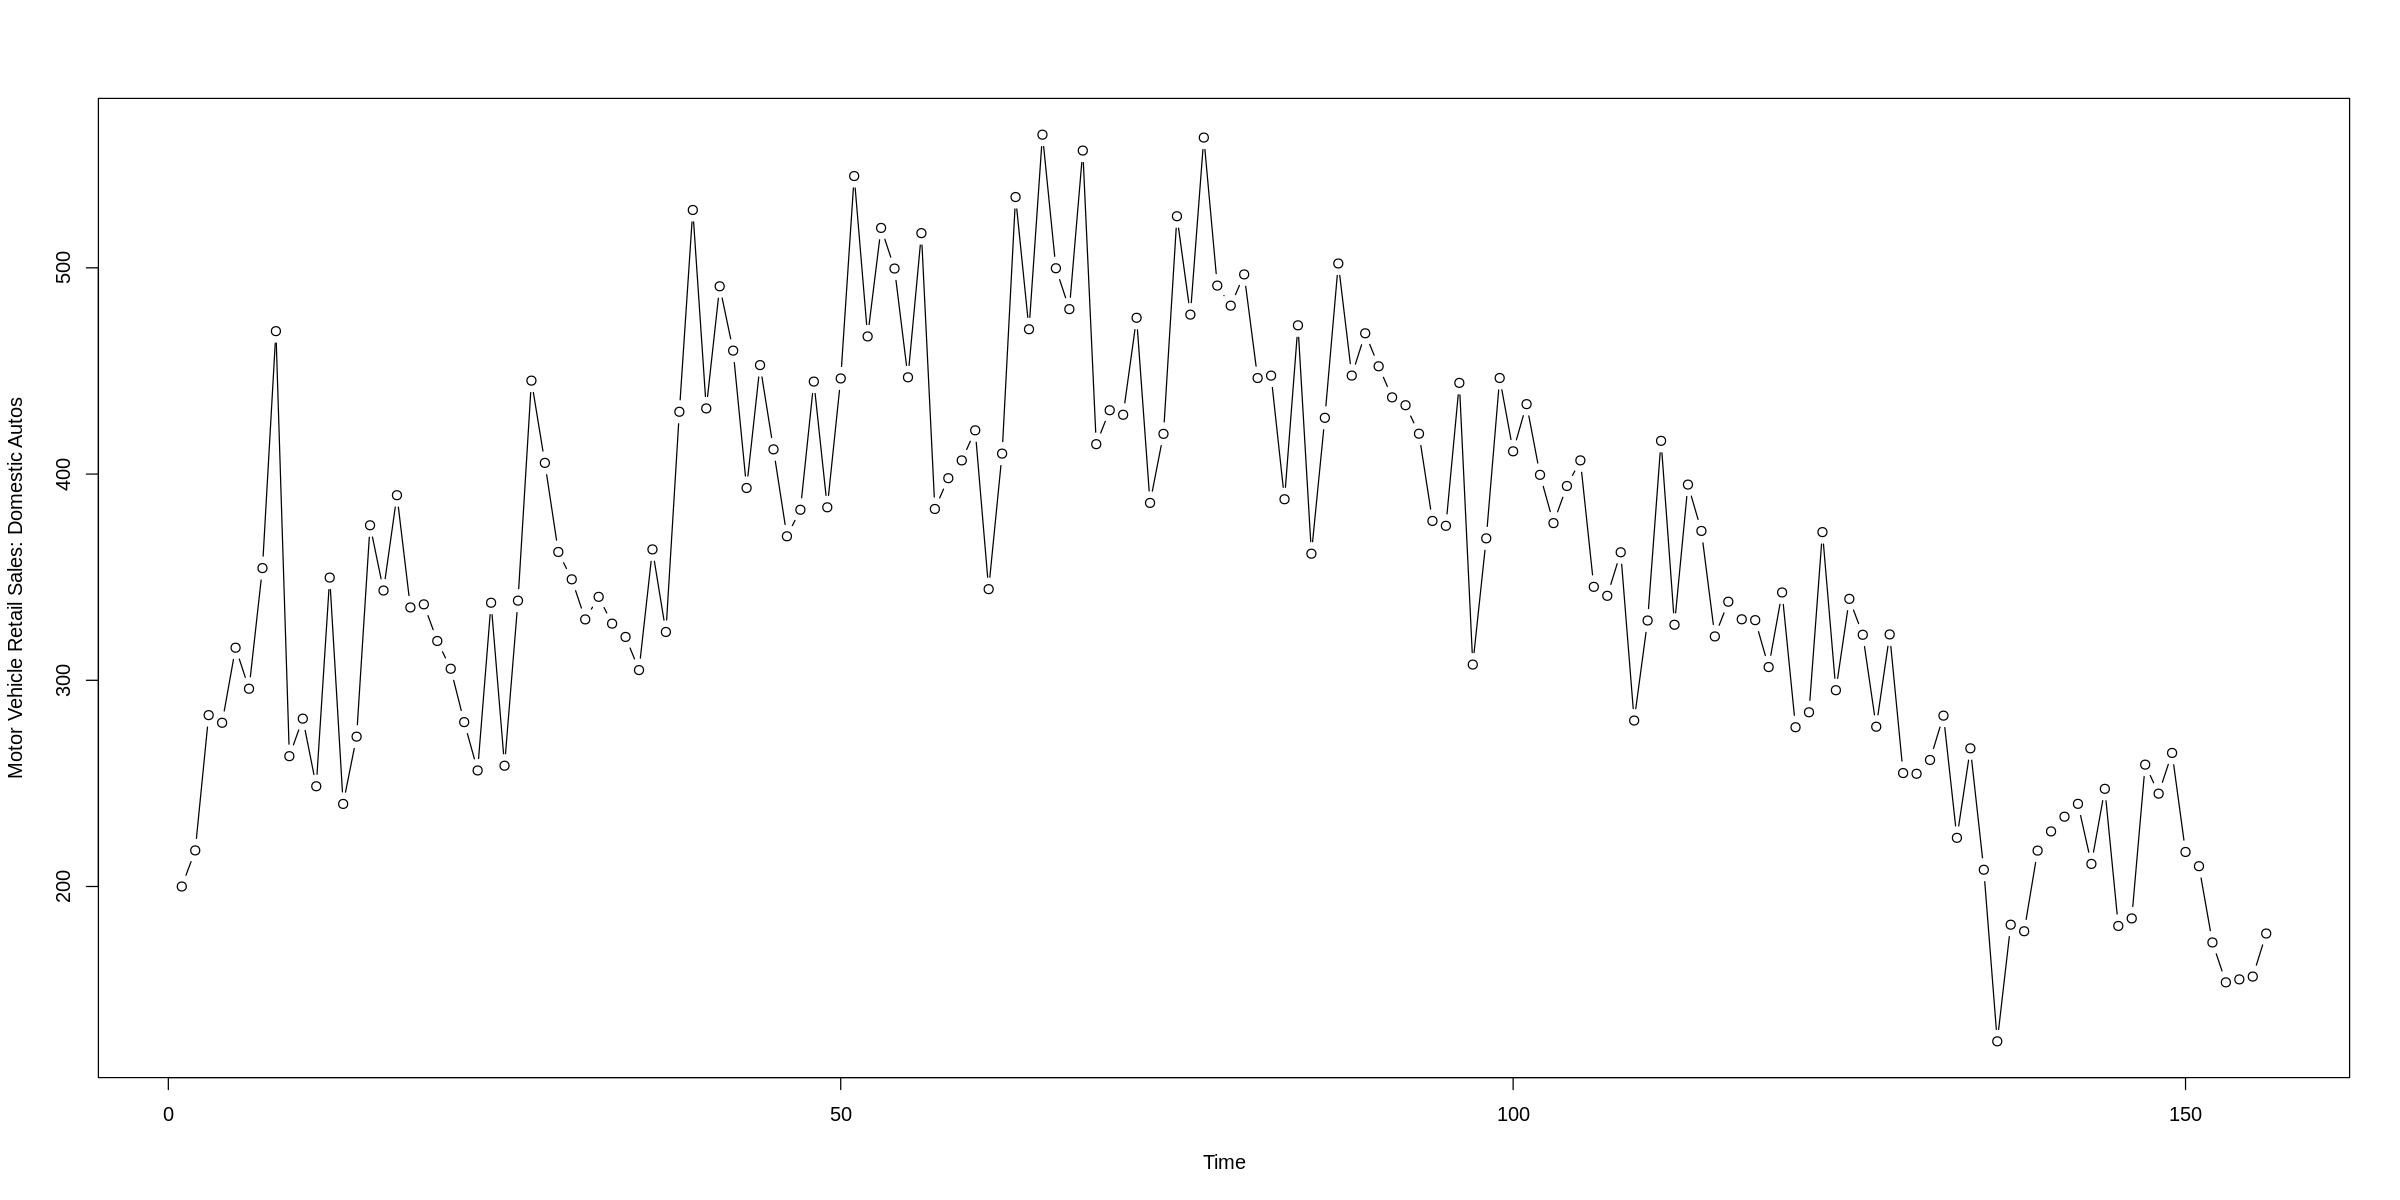

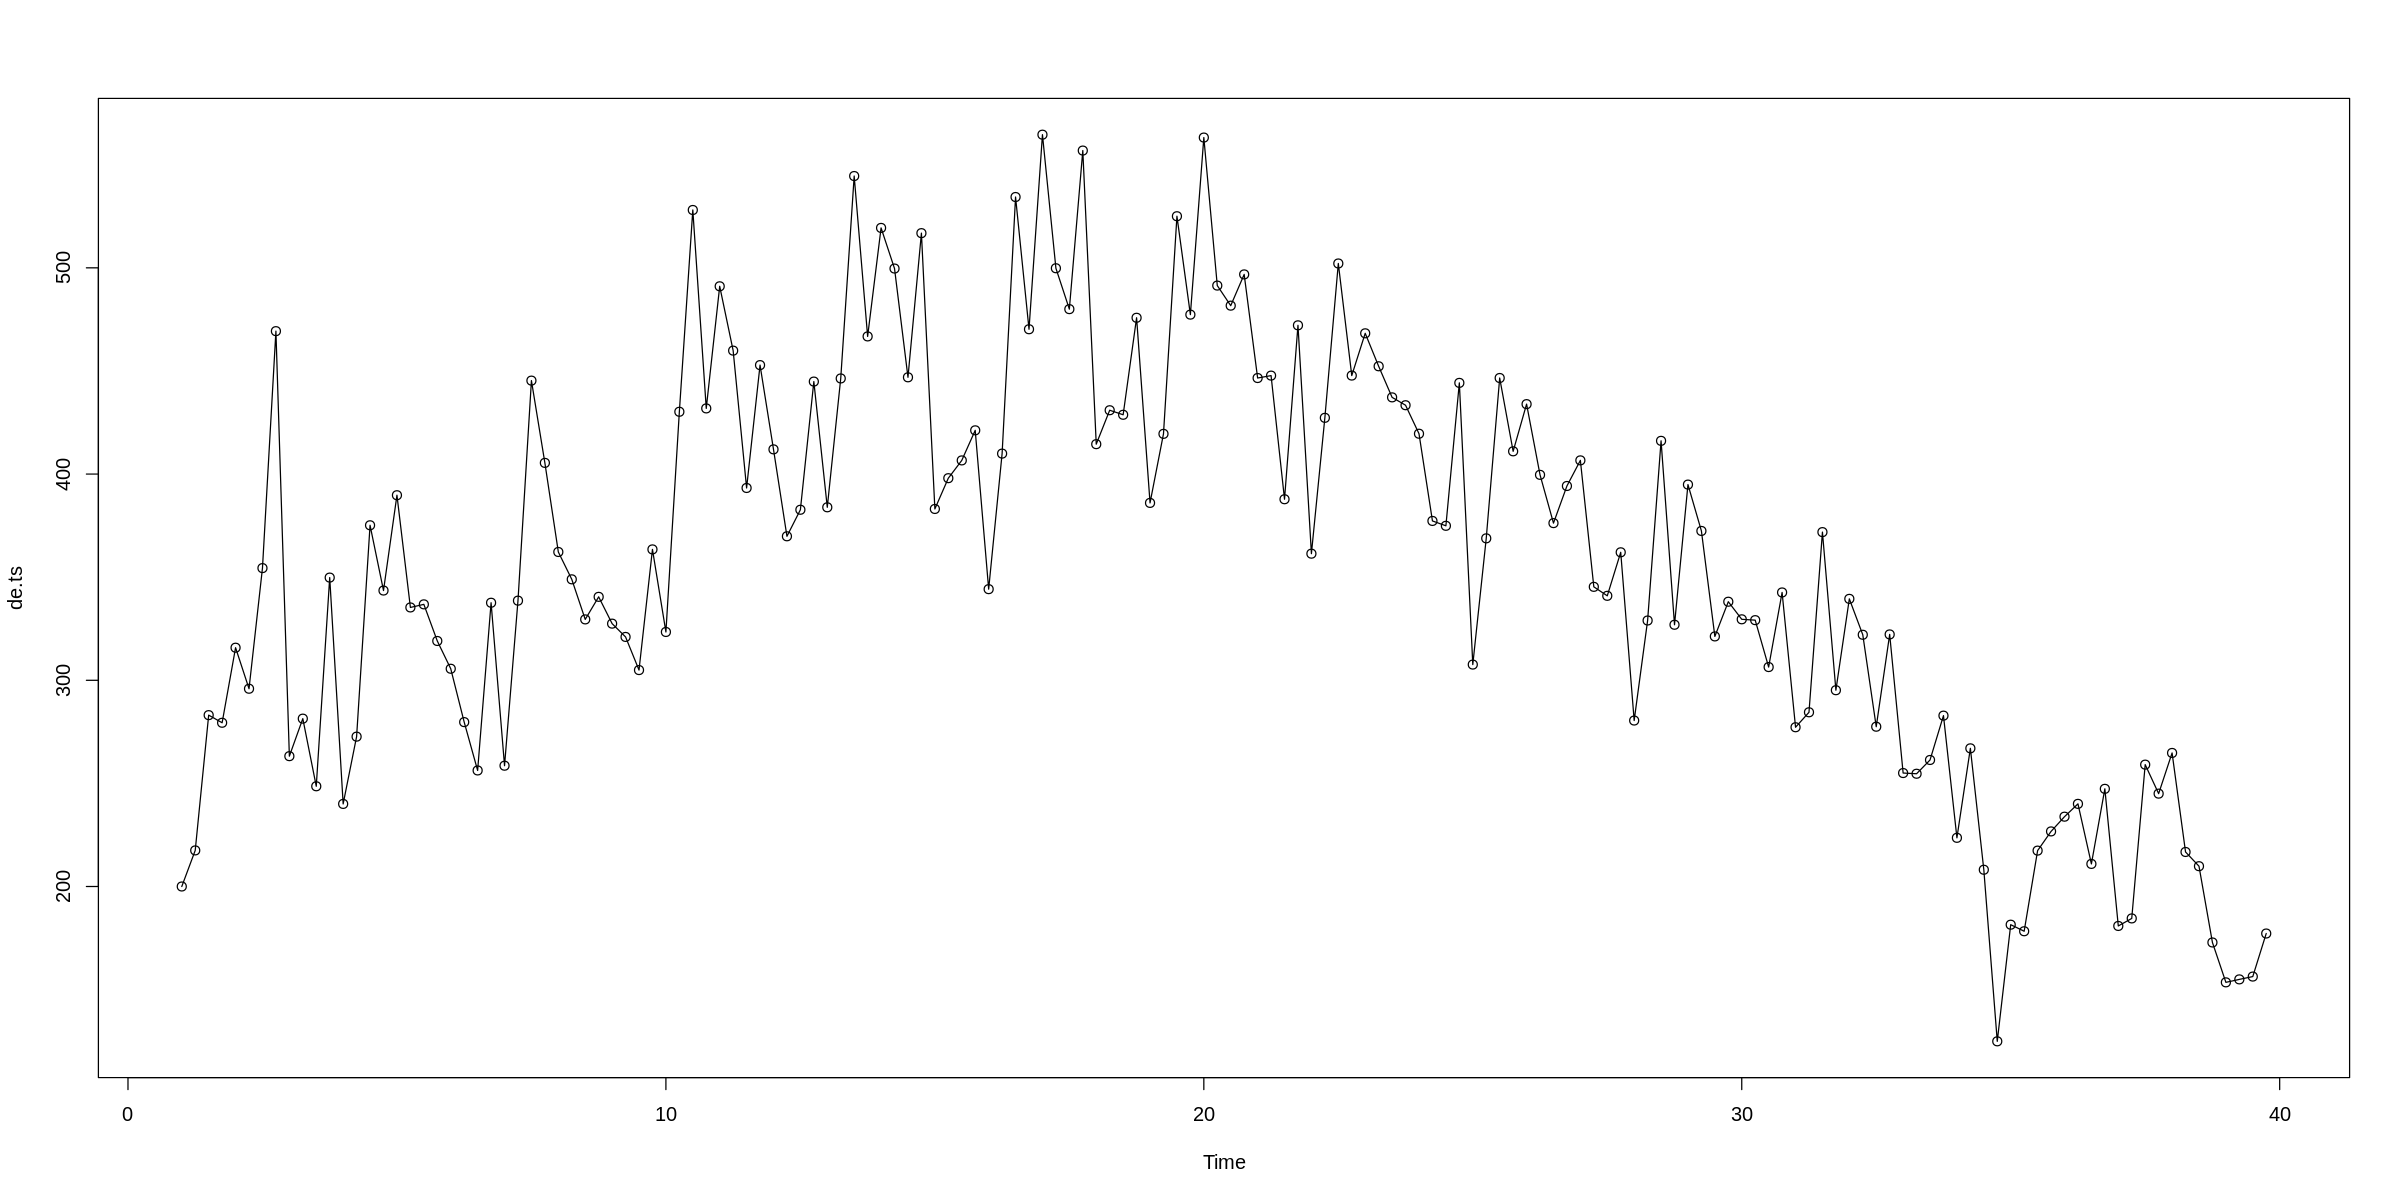

In [10]:
plot(t_de, de, xlab="Time", ylab="Motor Vehicle Retail Sales: Domestic Autos", type='b')
de.ts <- ts(de, frequency = 4)
ts.plot(de.ts, type="o")

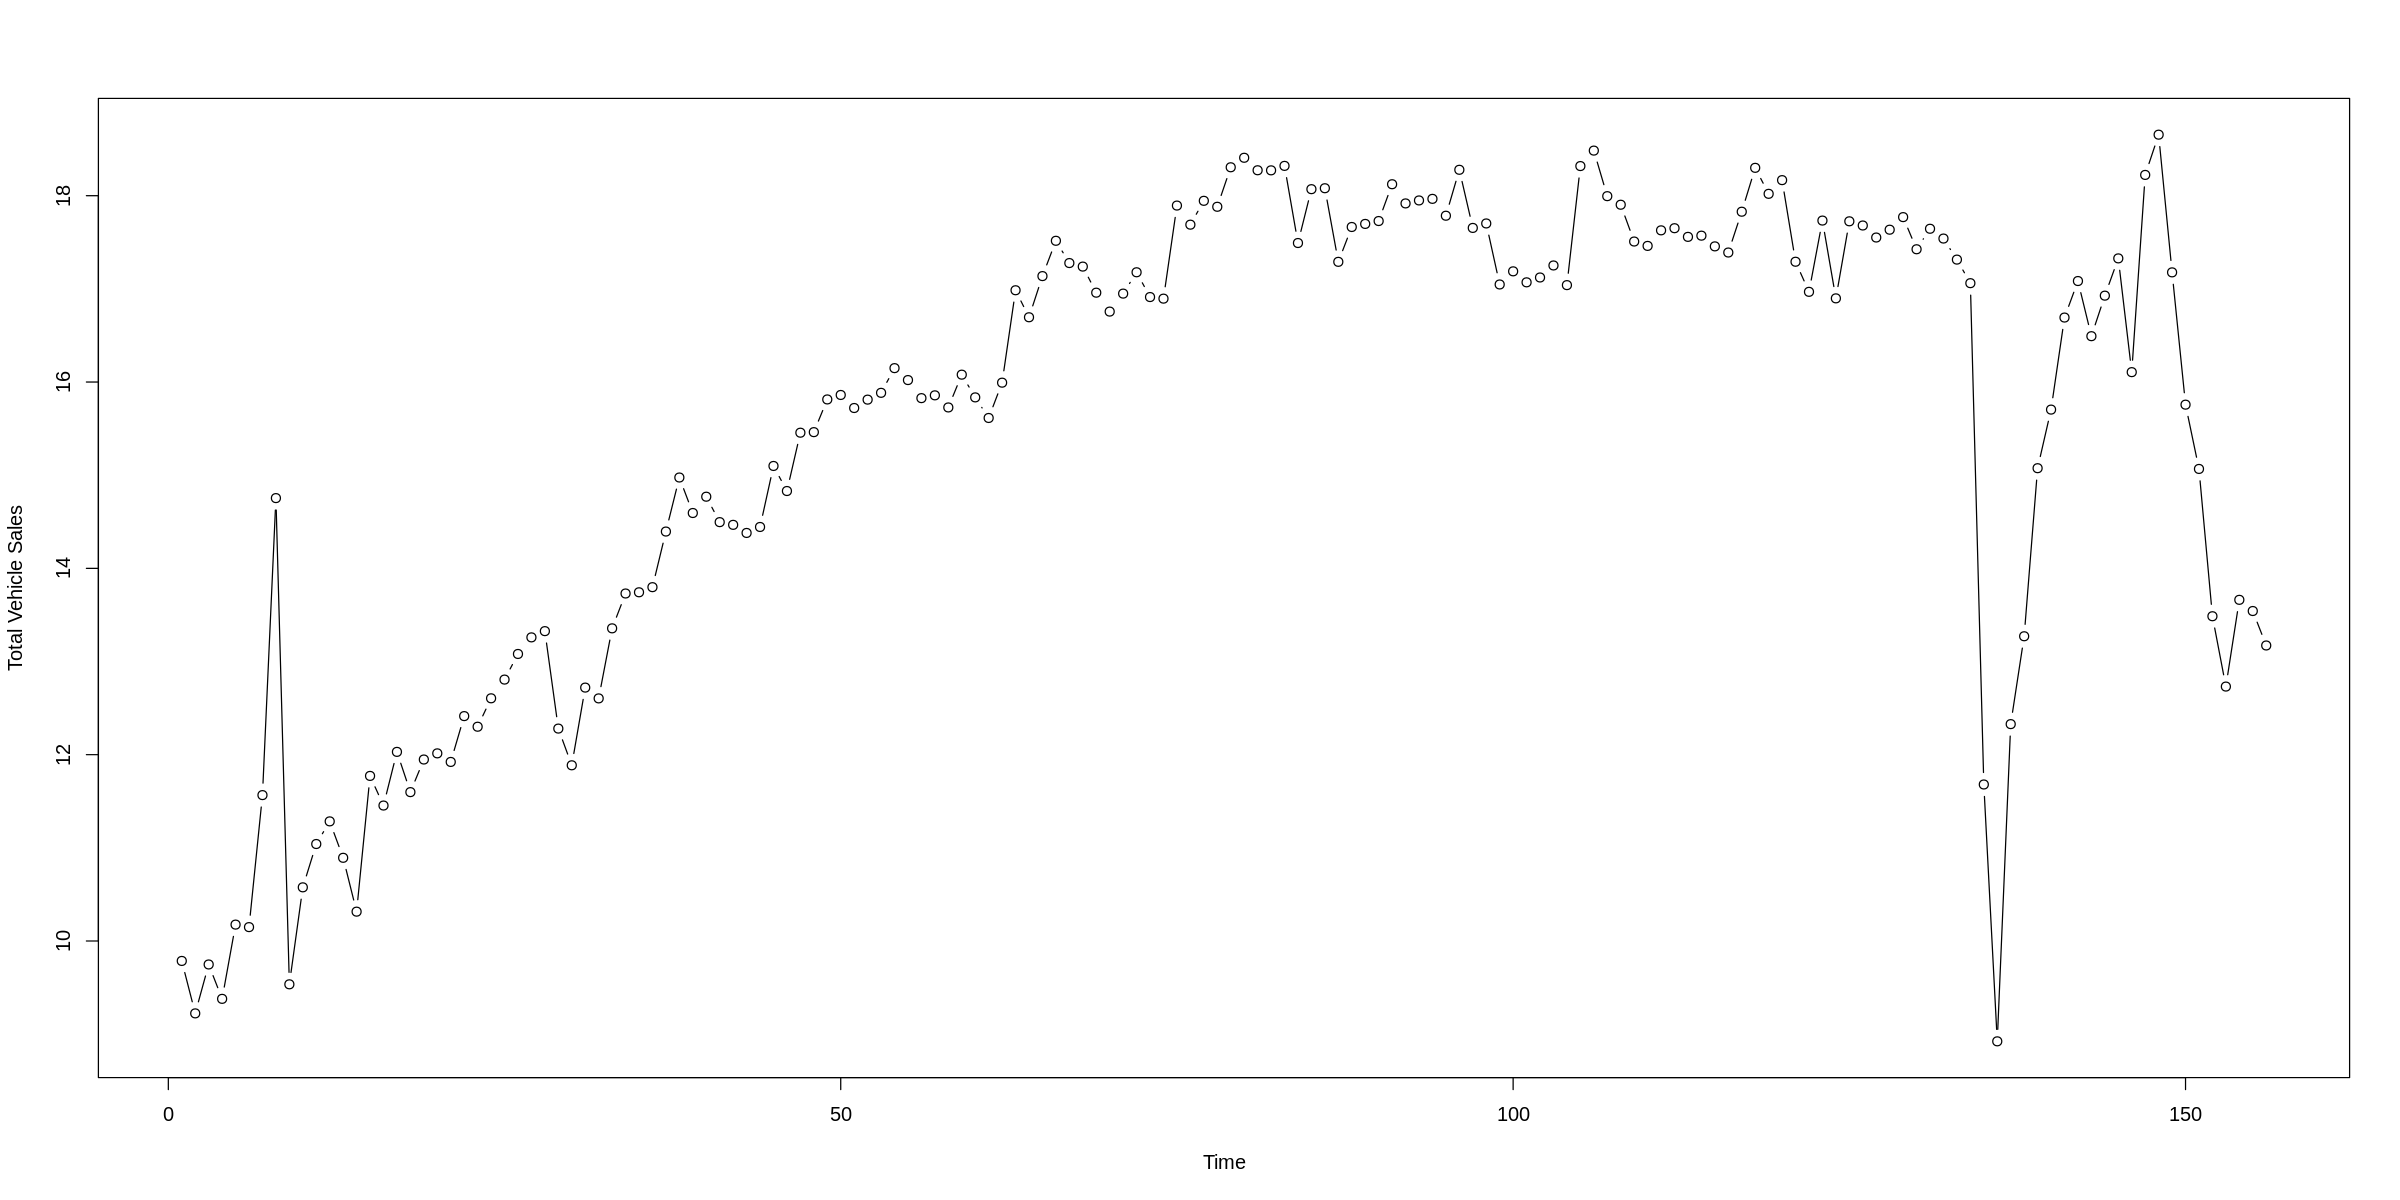

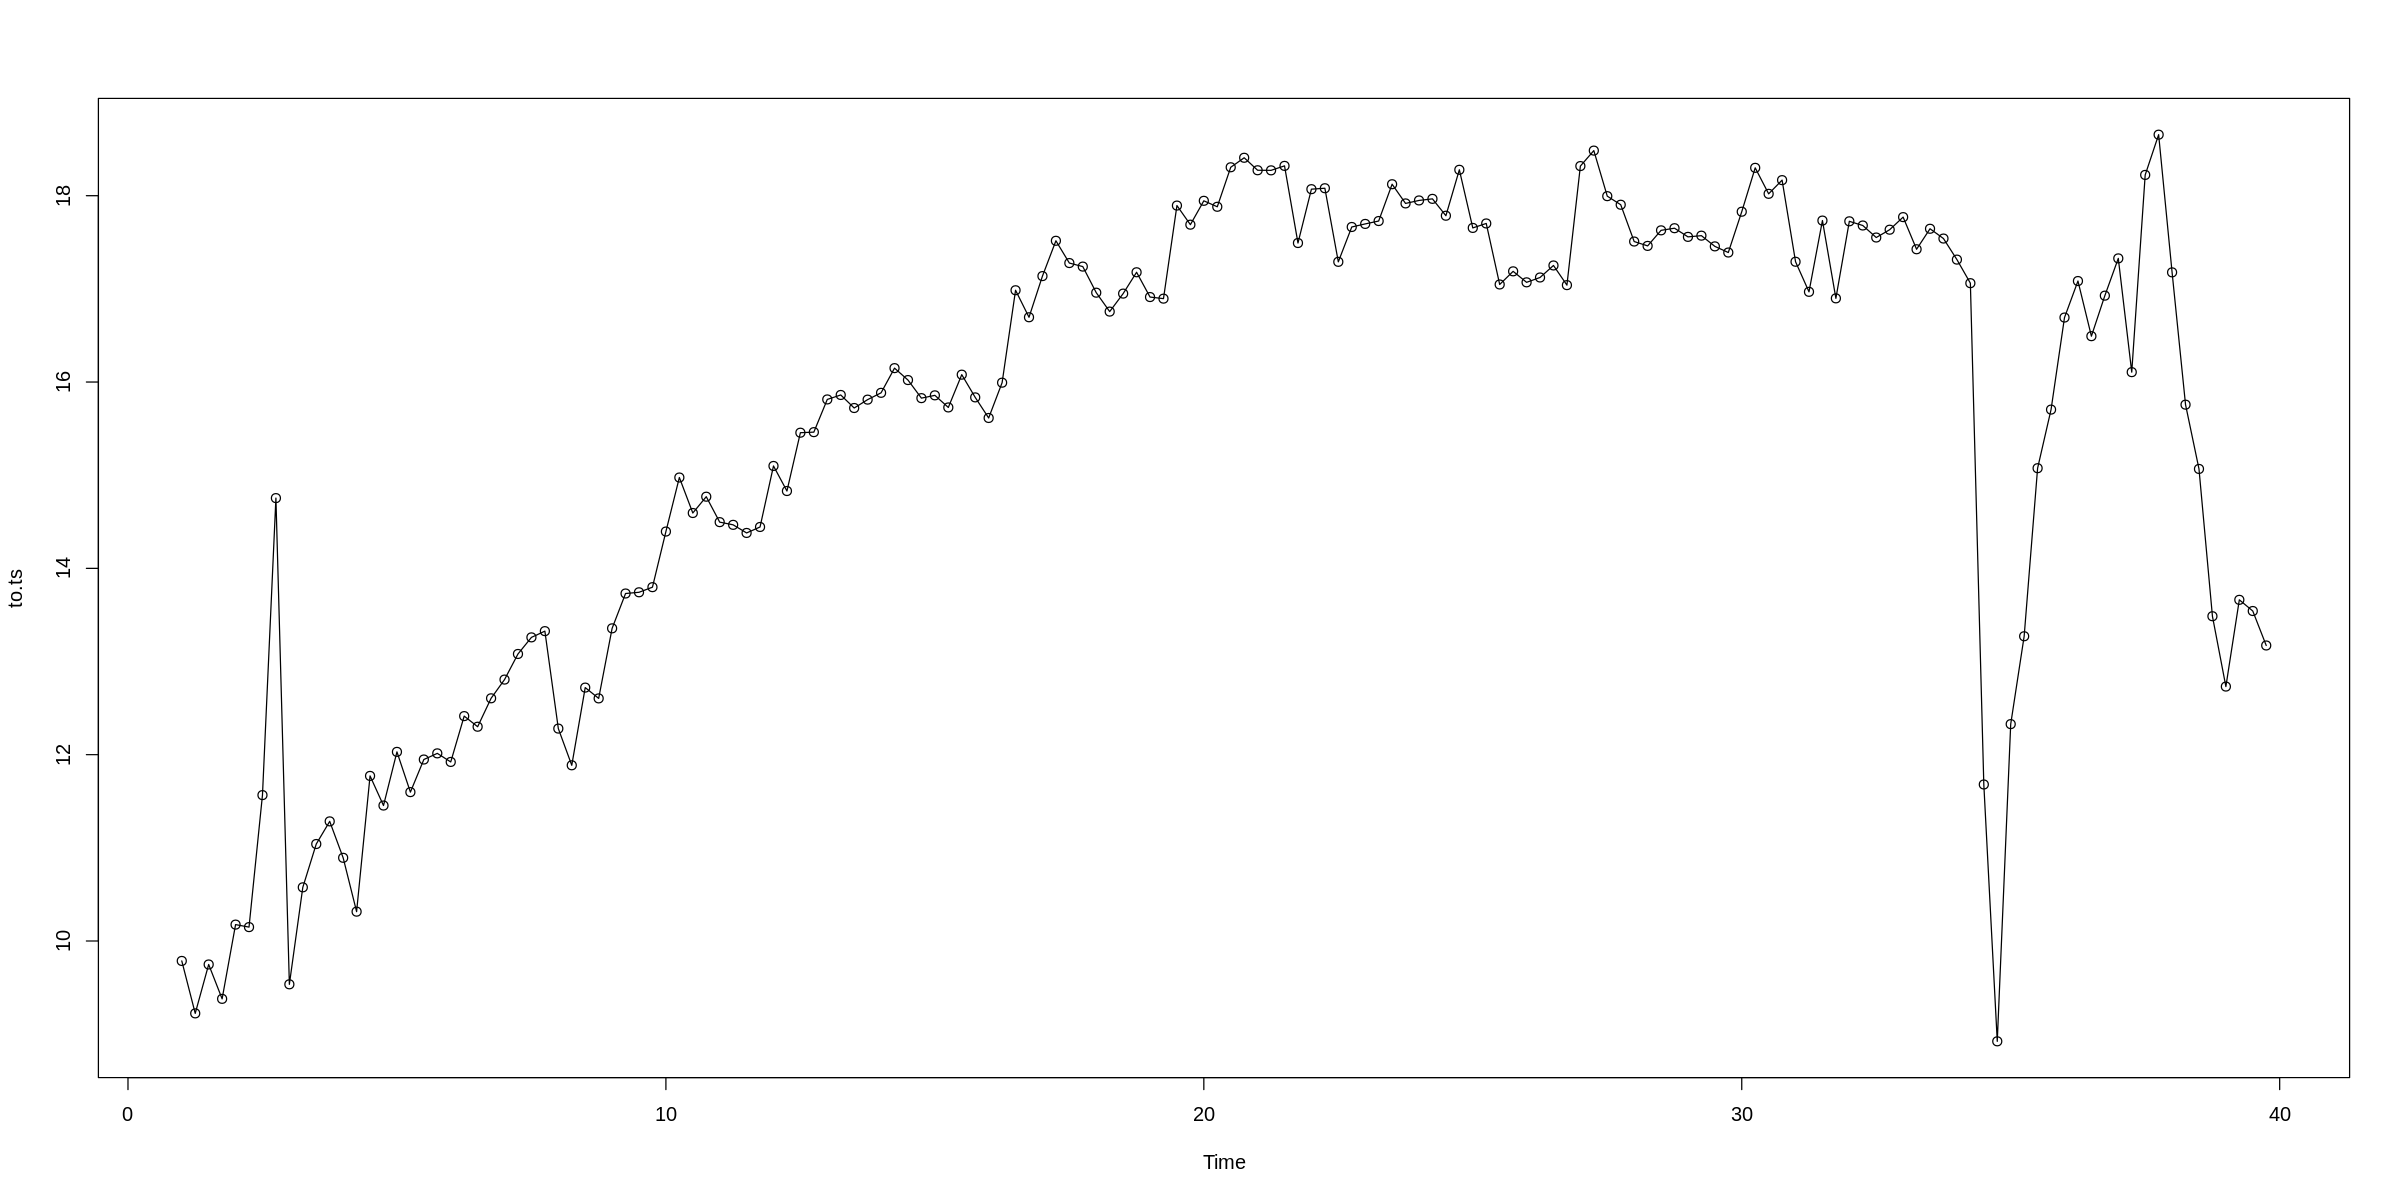

In [11]:
plot(t_to, to, xlab="Time", ylab="Total Vehicle Sales", type='b')
to.ts <- ts(to, frequency = 4)
ts.plot(to.ts, type="o")

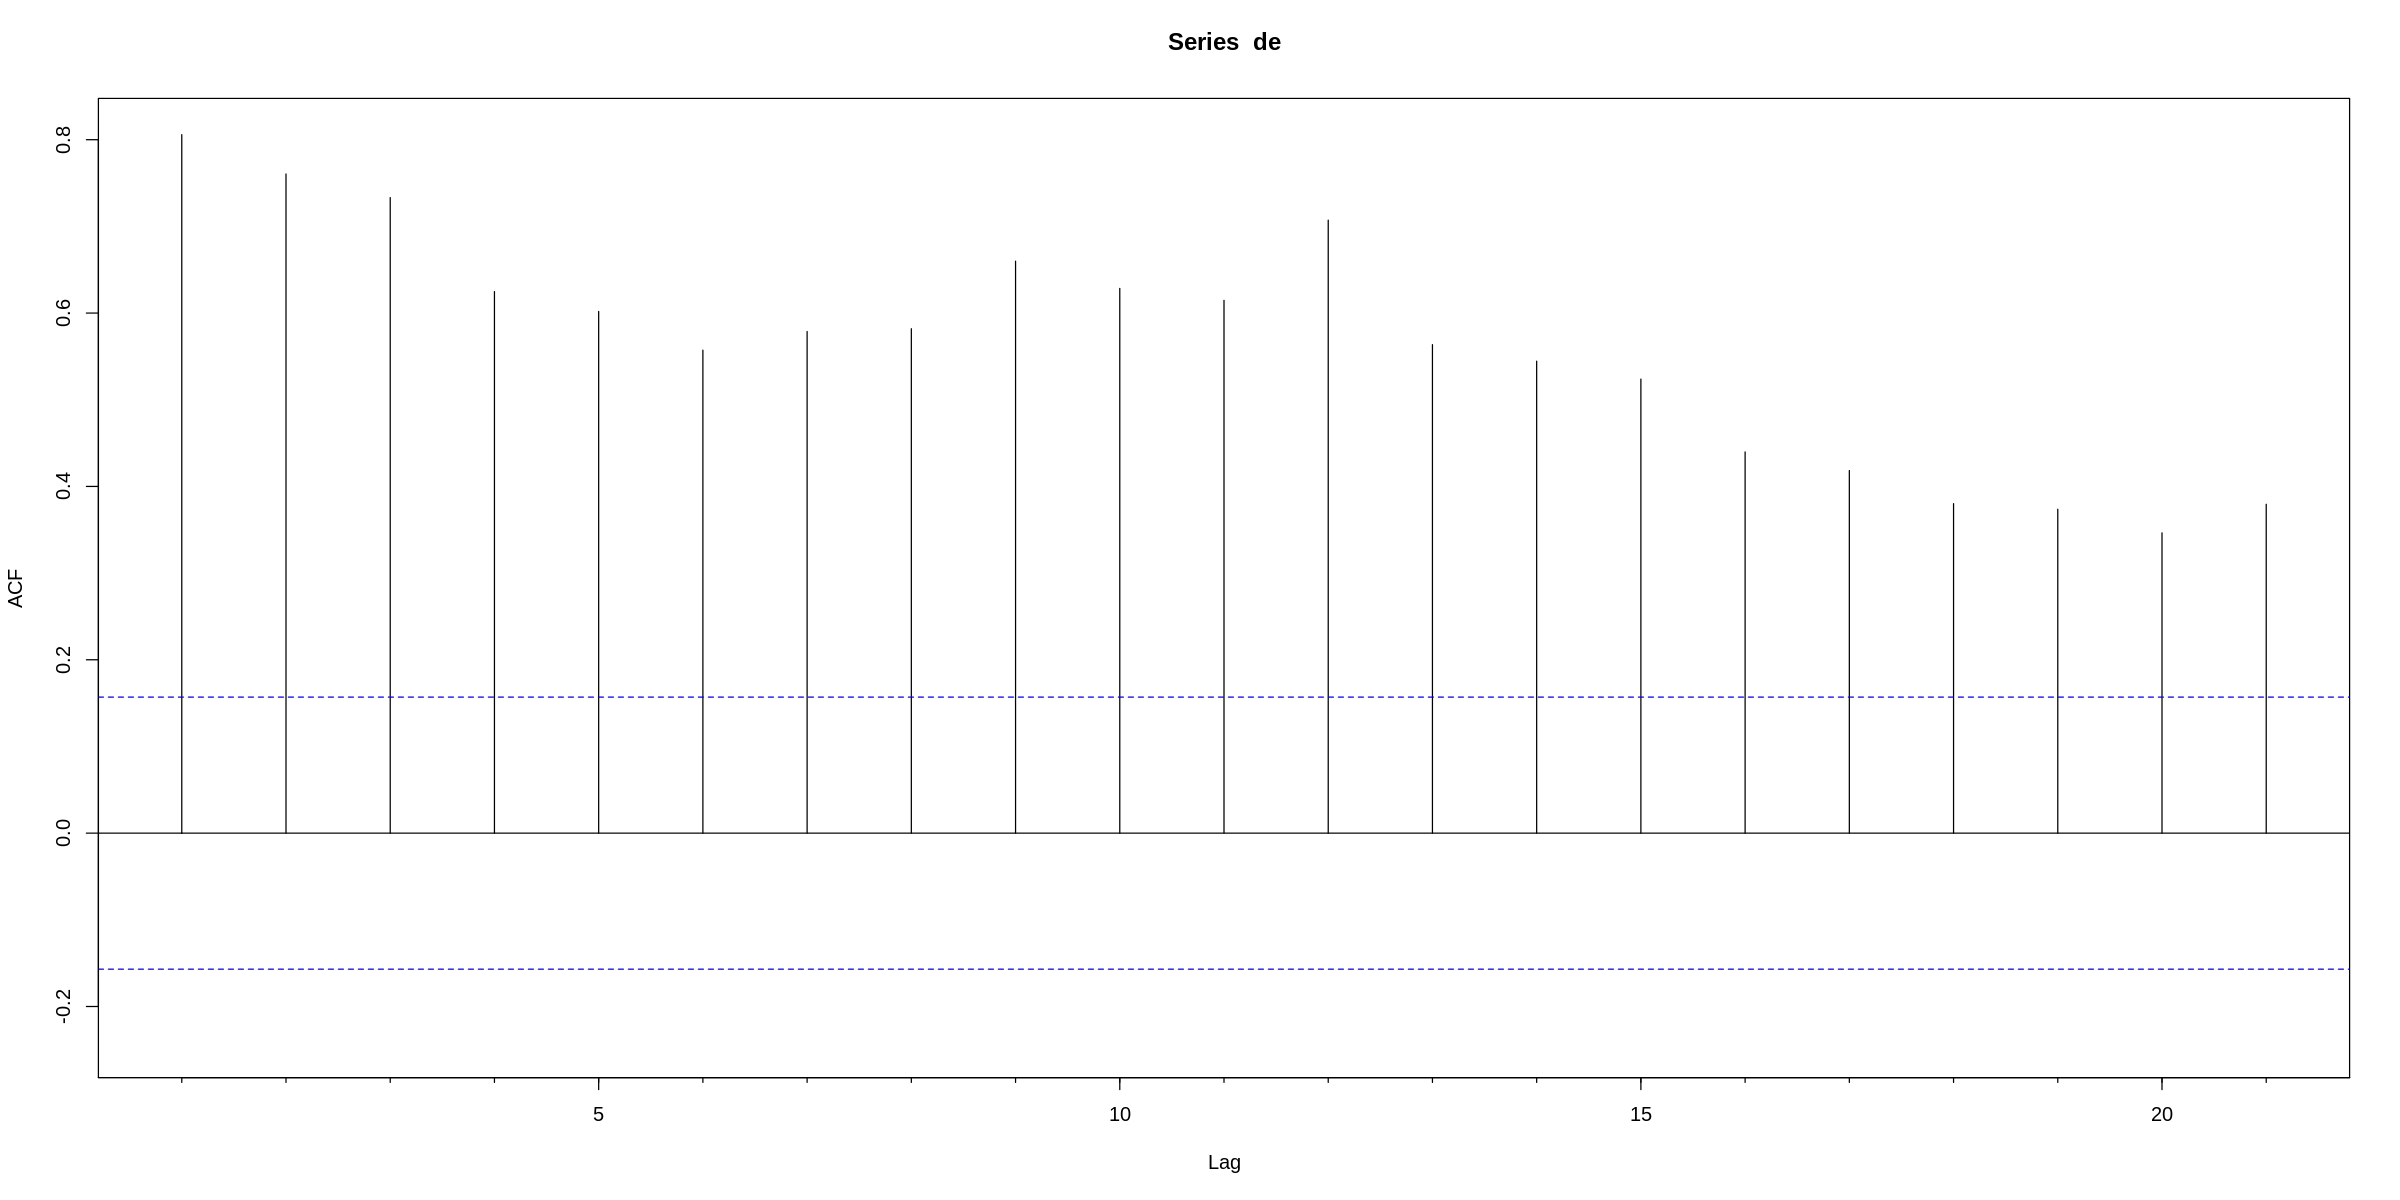

In [ ]:
Acf(de)

#acf

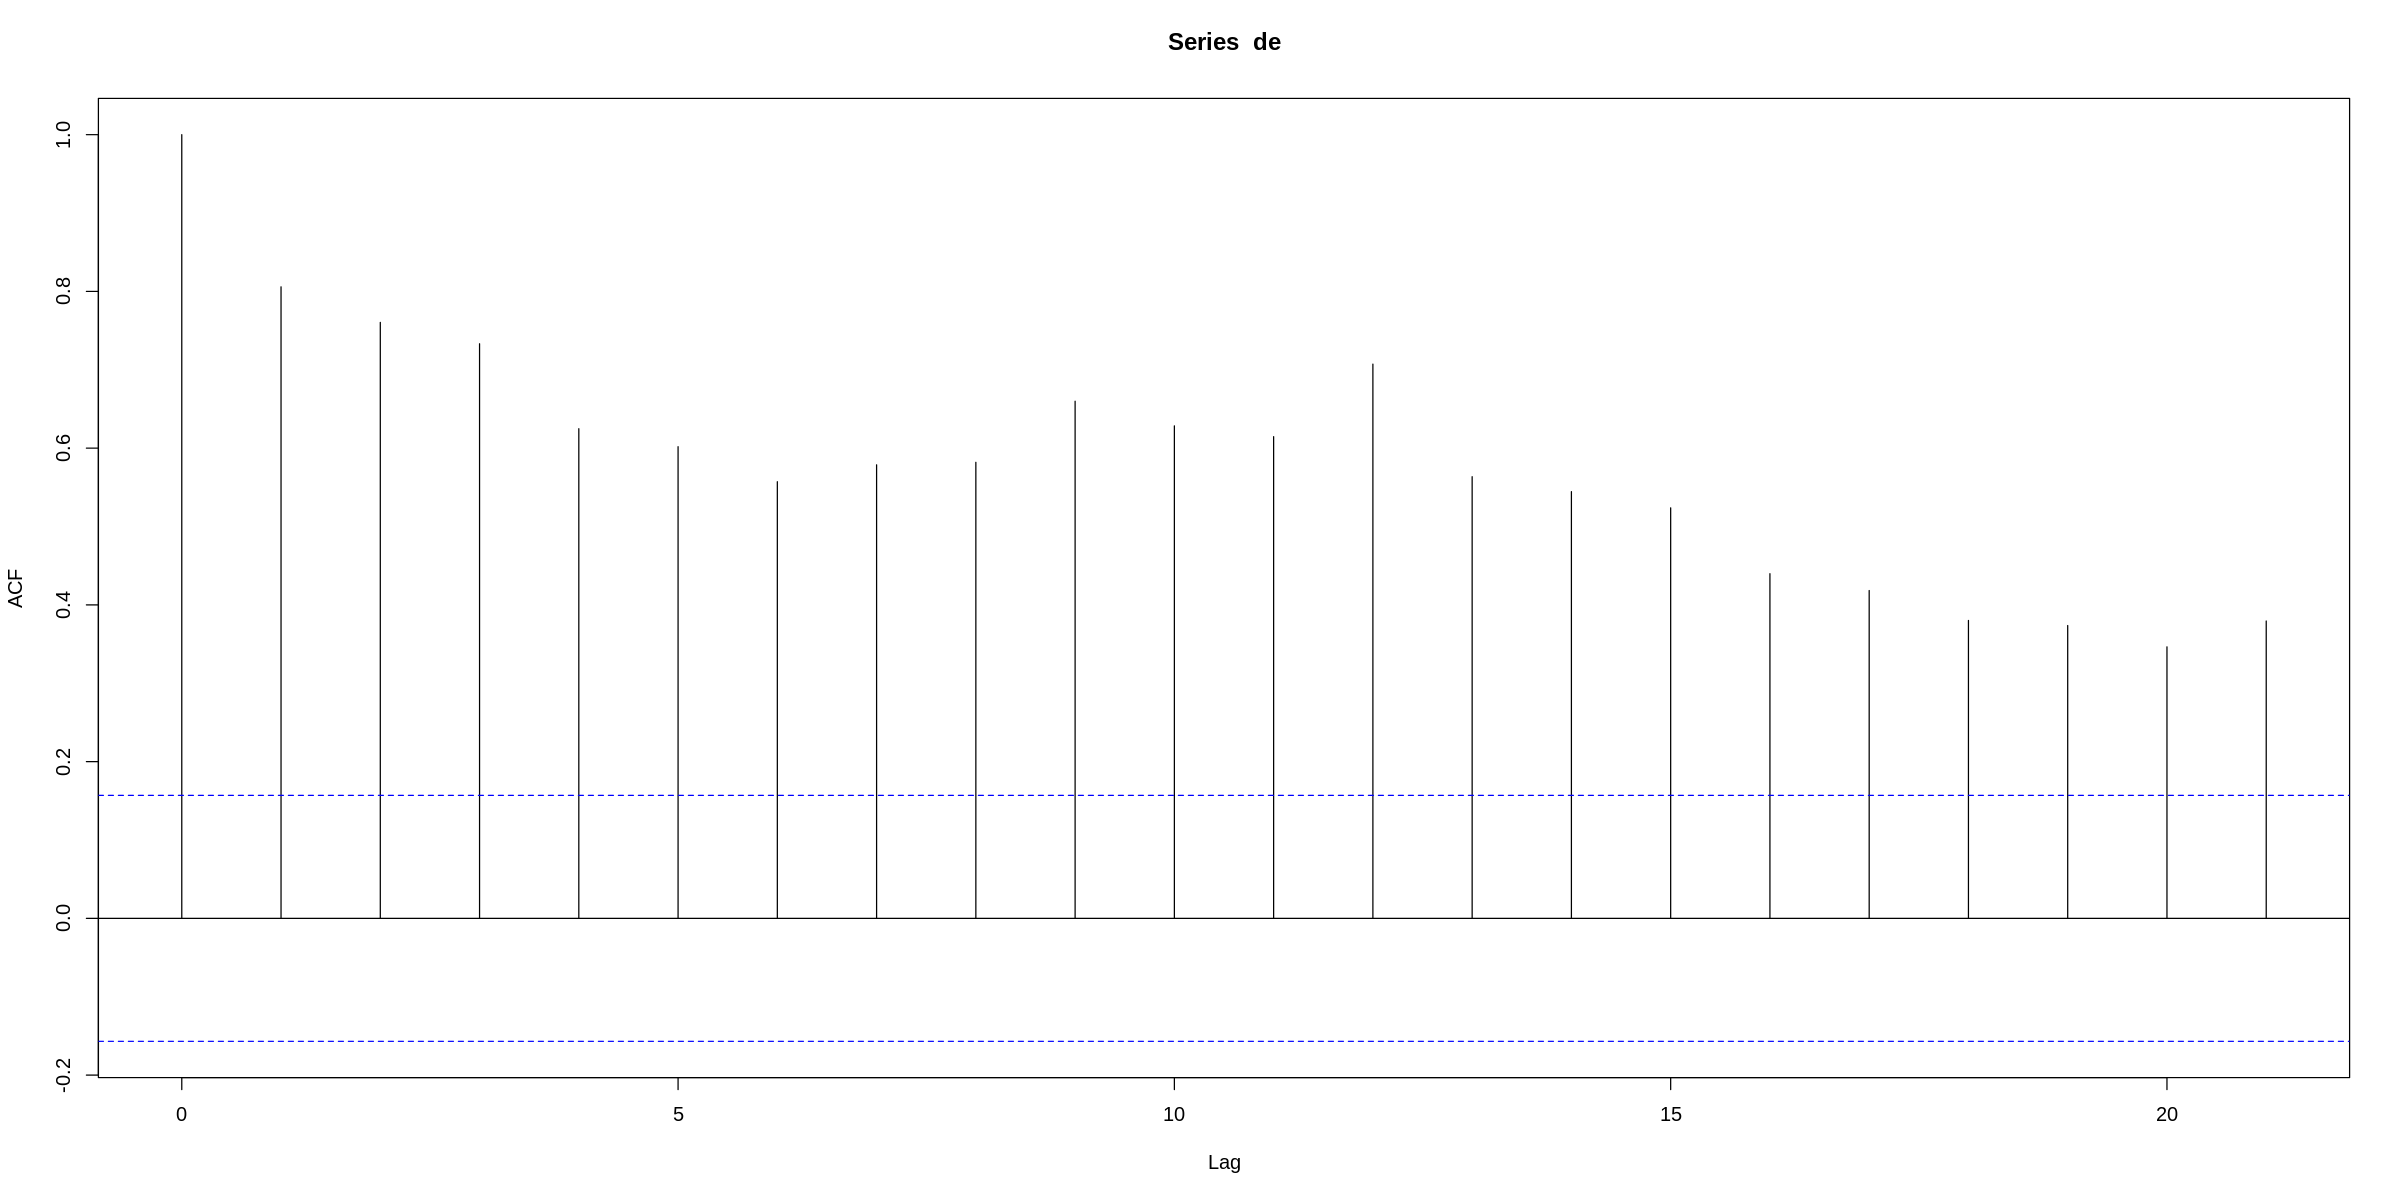

In [12]:
acf(de) ##retai

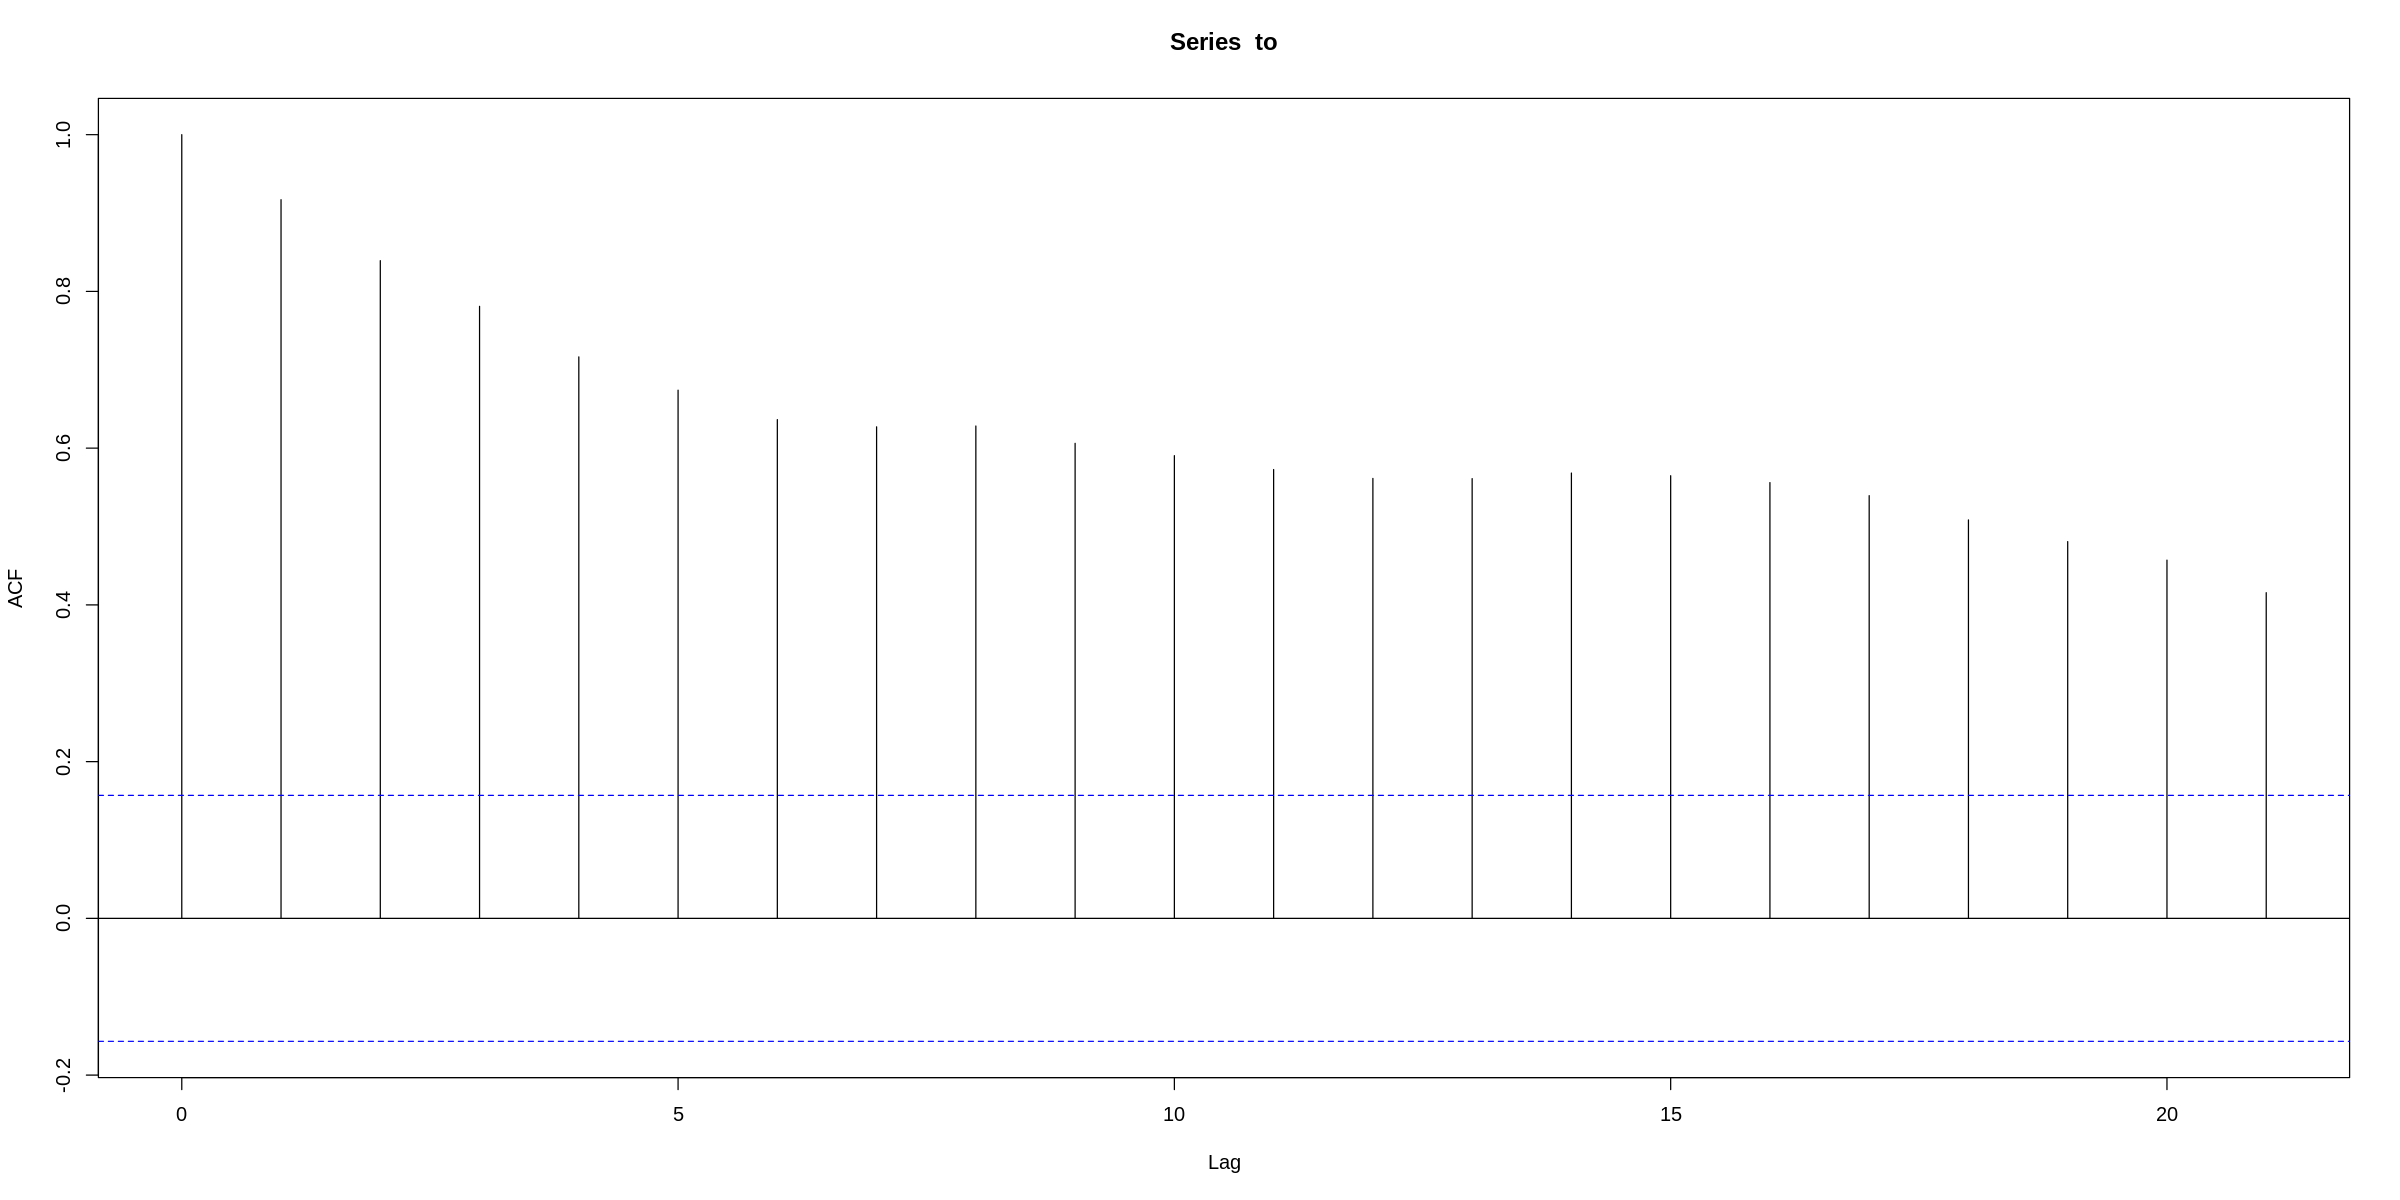

In [13]:
acf(to) ## total

#linear


Call:
lm(formula = de ~ t_de)

Residuals:
     Min       1Q   Median       3Q      Max 
-218.066  -65.470    4.375   69.760  205.832 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  418.865     15.021  27.884  < 2e-16 ***
t_de          -0.799      0.166  -4.814 3.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.36 on 154 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.1251 
F-statistic: 23.17 on 1 and 154 DF,  p-value: 3.51e-06



	Durbin-Watson test

data:  fit_de
DW = 0.40482, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


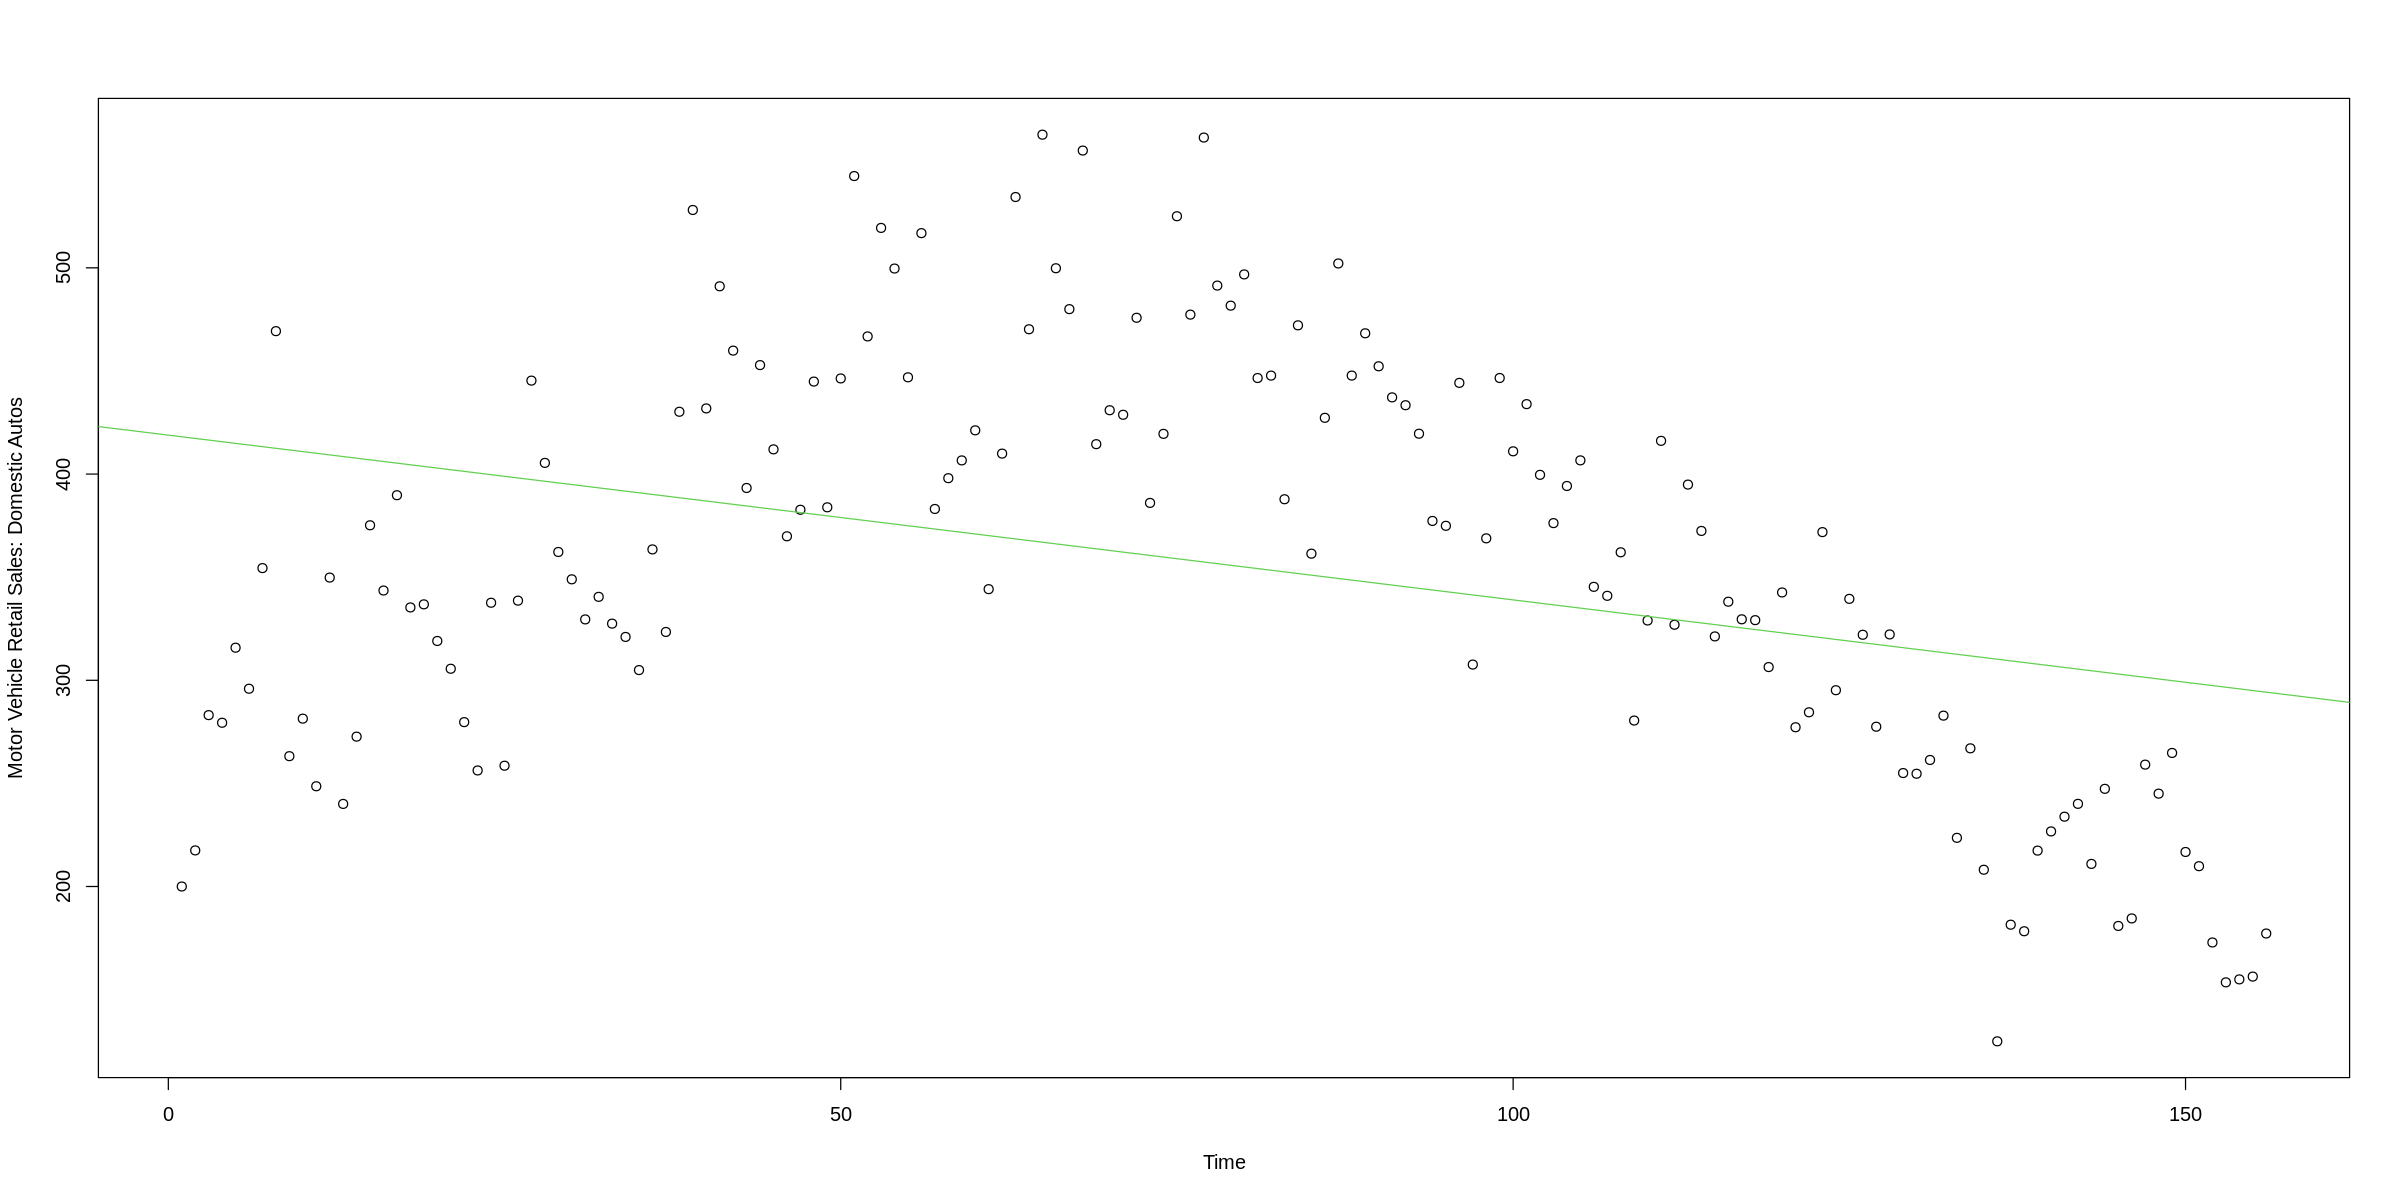

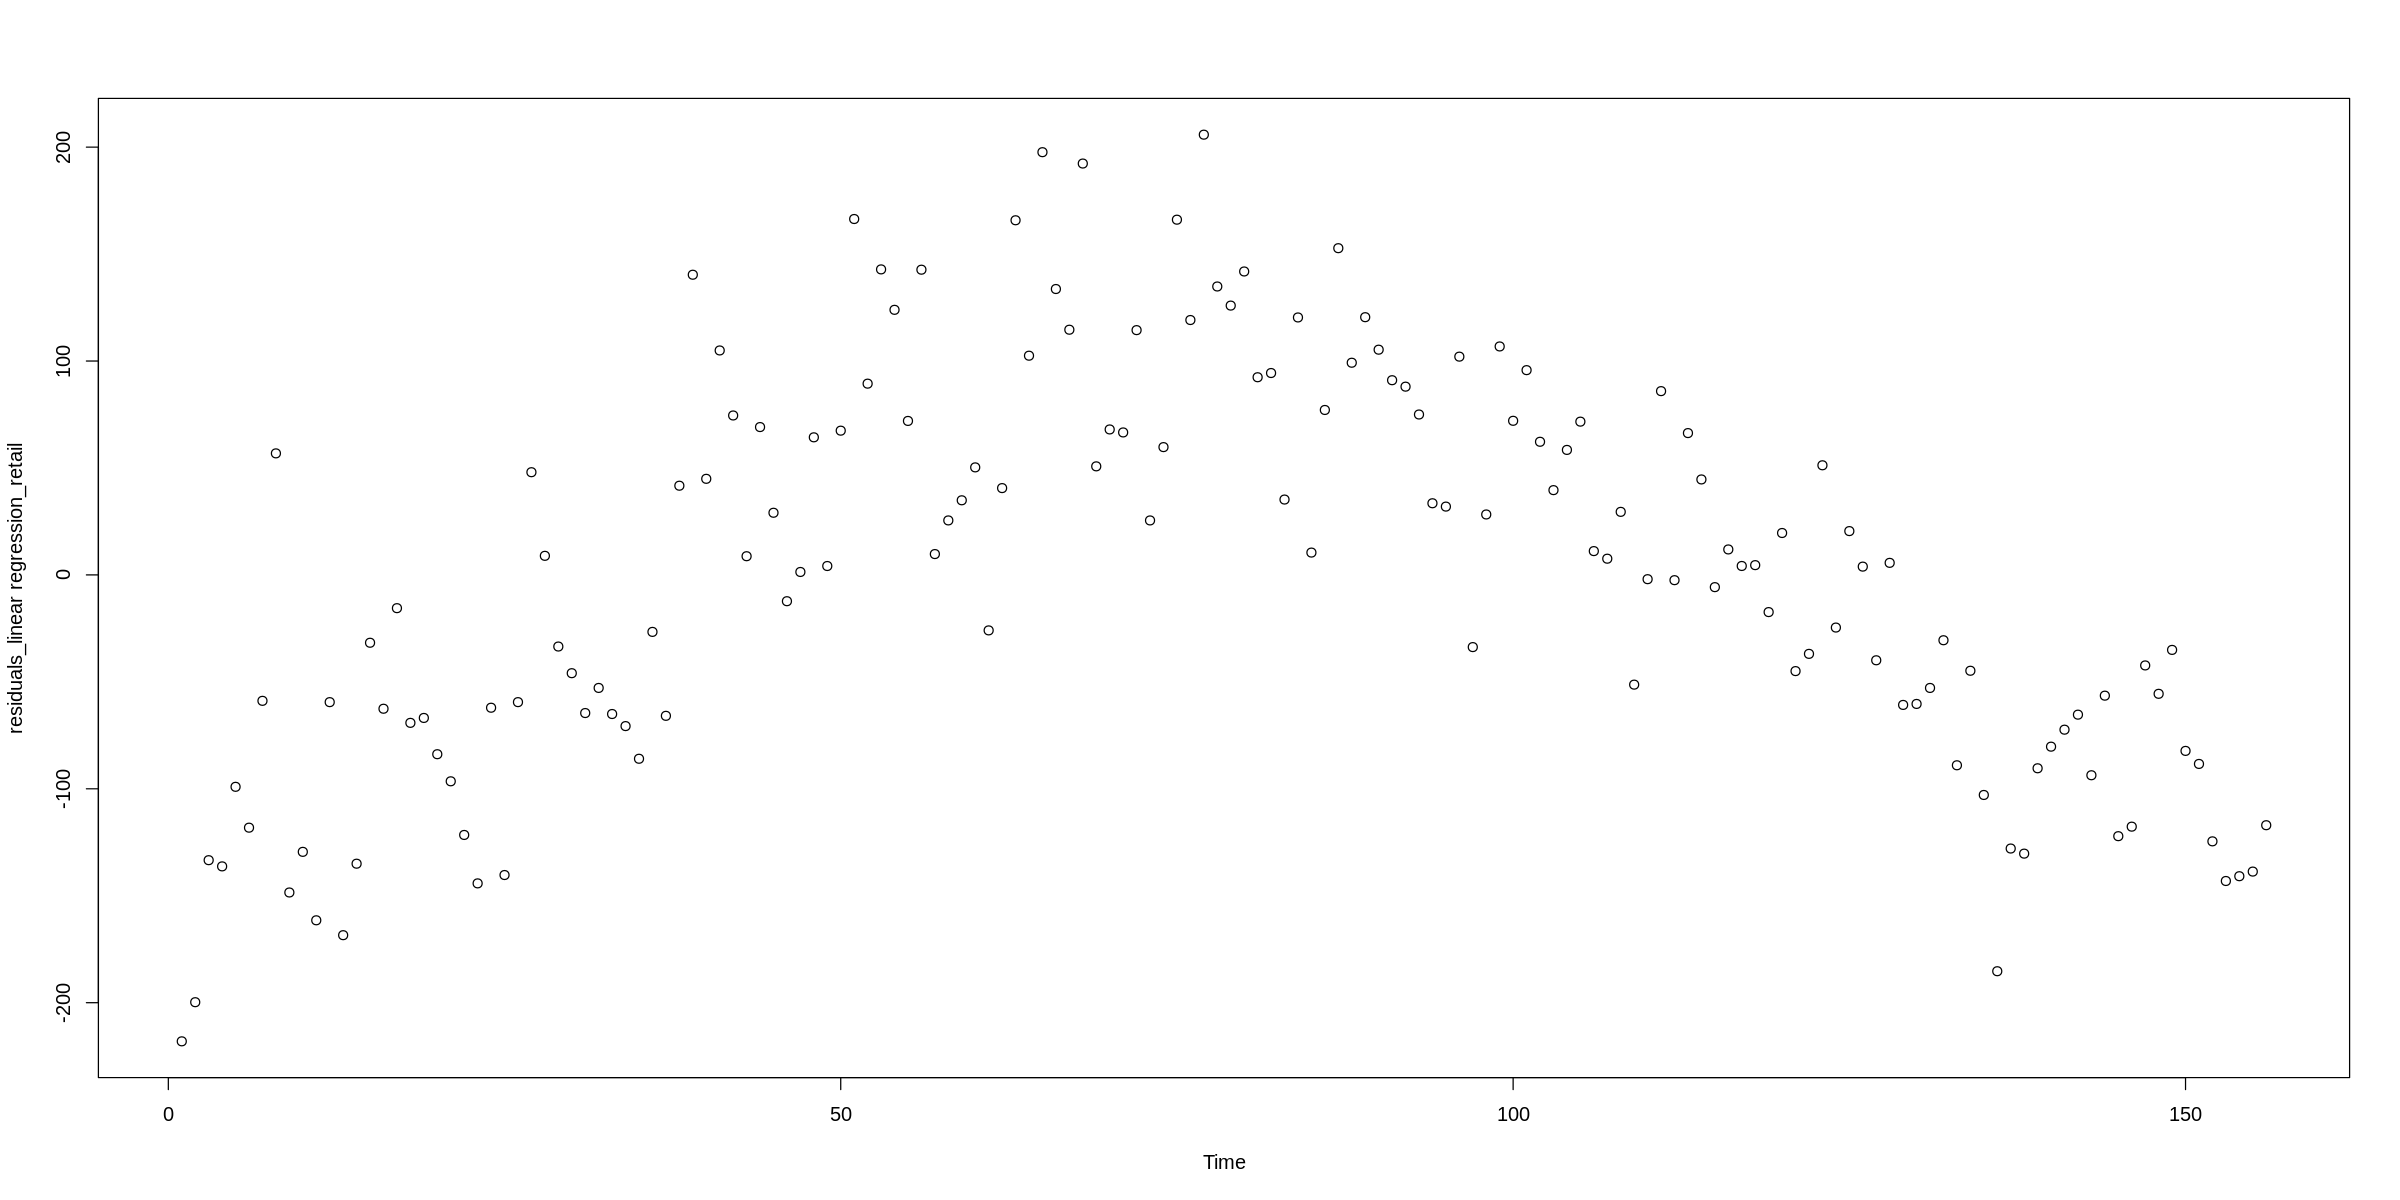

In [14]:
##fit a linear regression model
fit_de <- lm(de~ t_de)
summary(fit_de)

##plot of the model
plot(t_de, de, xlab="Time", ylab="Motor Vehicle Retail Sales: Domestic Autos")
abline(fit_de, col=3)

##check the residuals? are they autocorrelated? Test of DW
dwtest(fit_de)

##check the residuals
resfit_de<- residuals(fit_de)
plot(resfit_de,xlab="Time", ylab="residuals_linear regression_retail" )

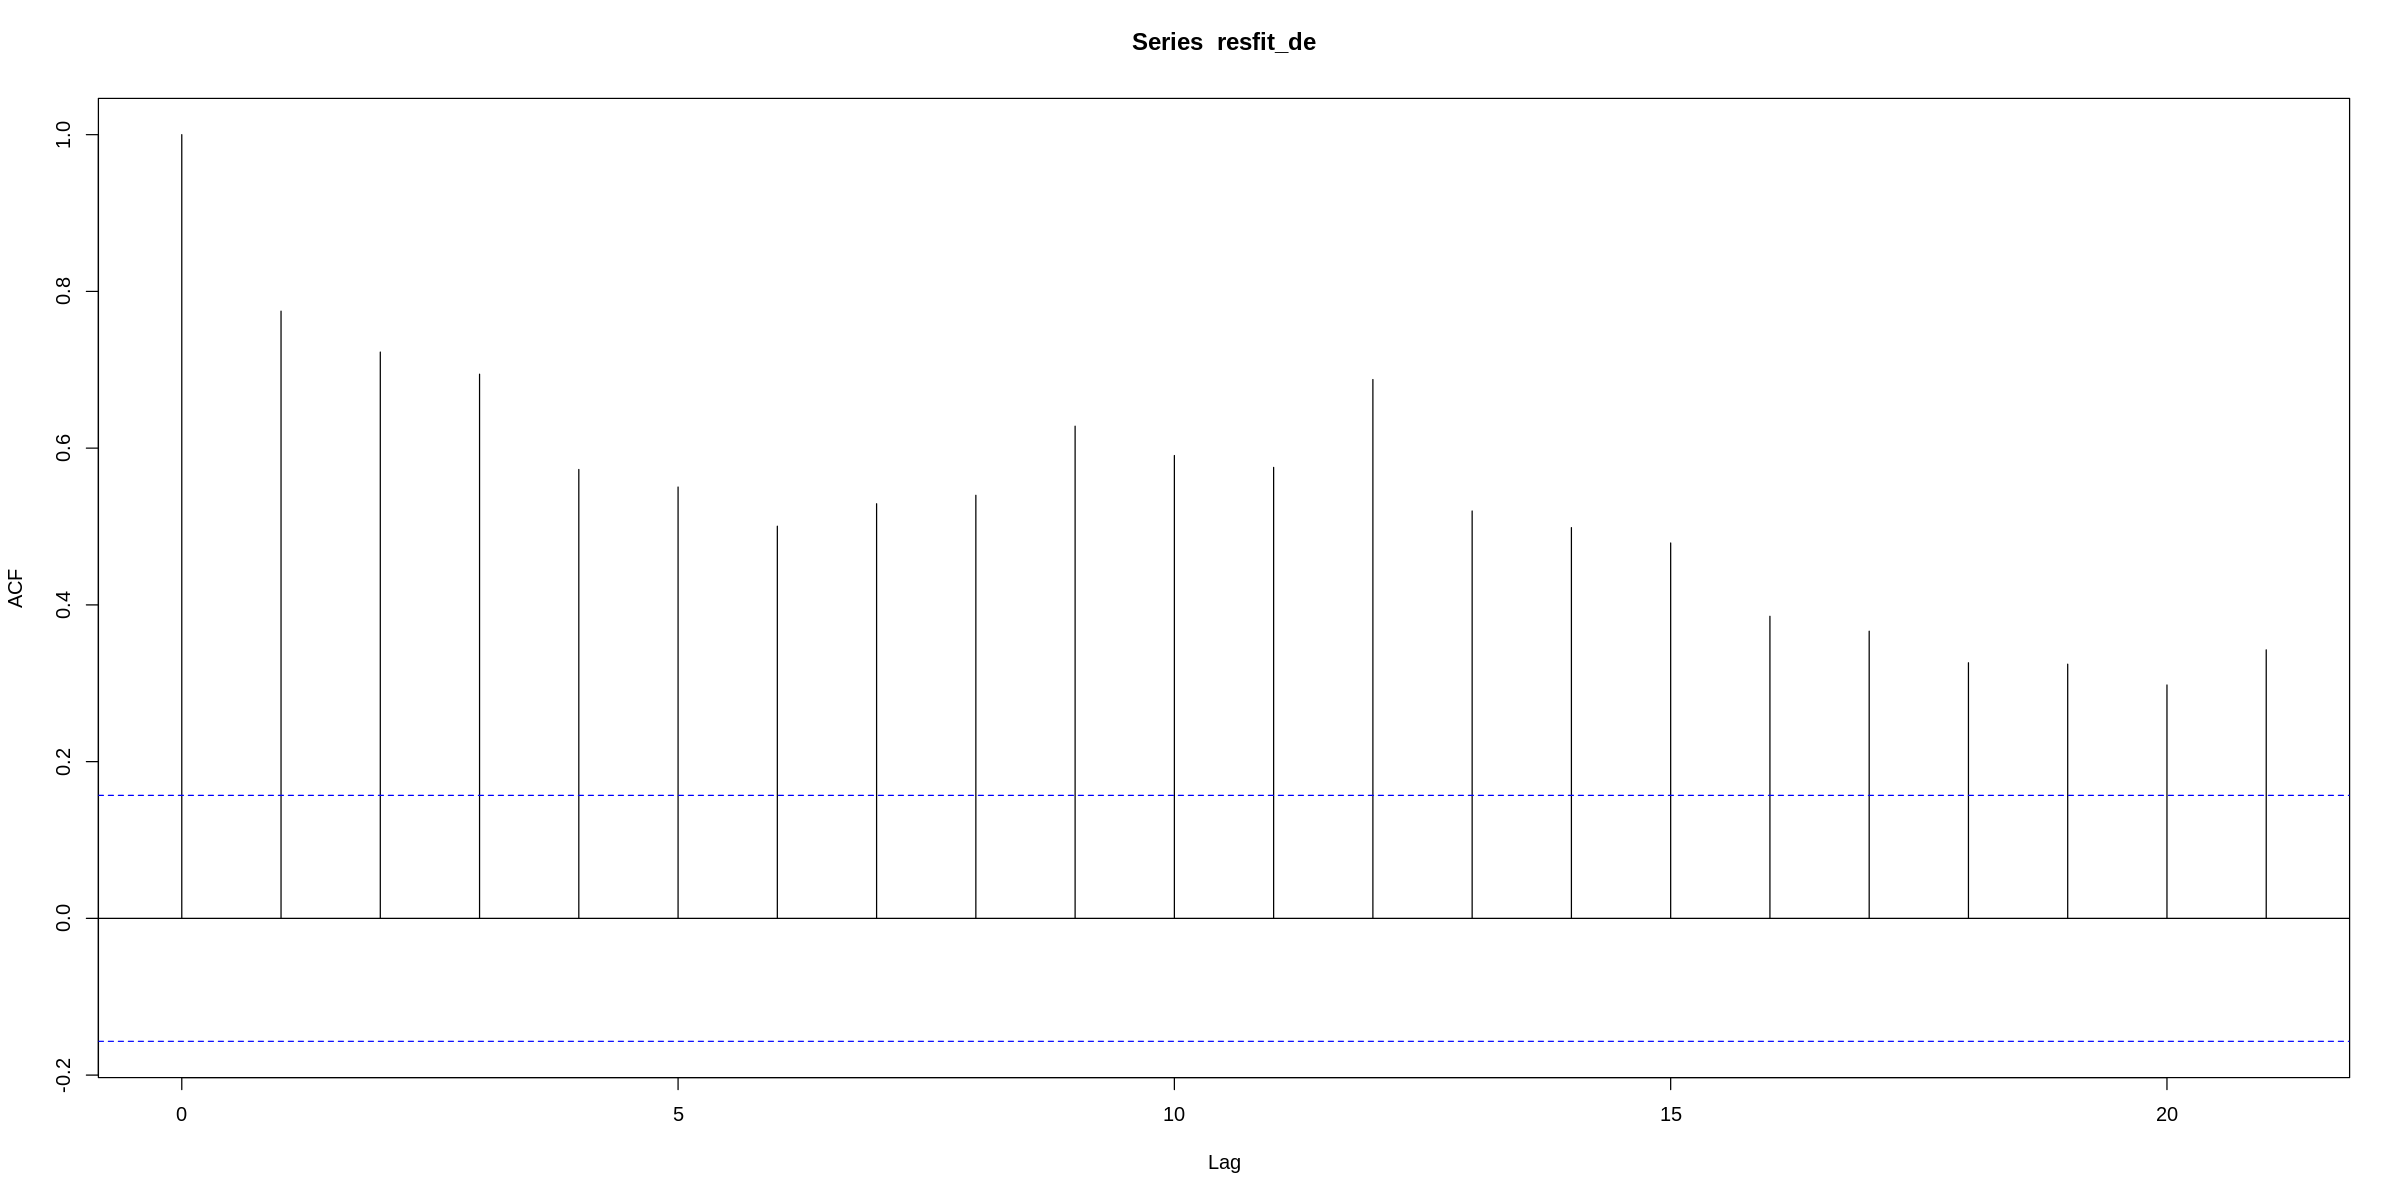

In [15]:
acf(resfit_de)


Call:
lm(formula = to ~ t_to)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5831 -1.1806  0.6199  1.4817  2.8373 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.803463   0.331179  38.660   <2e-16 ***
t_to         0.034578   0.003659   9.449   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.058 on 154 degrees of freedom
Multiple R-squared:  0.367,	Adjusted R-squared:  0.3629 
F-statistic: 89.28 on 1 and 154 DF,  p-value: < 2.2e-16



	Durbin-Watson test

data:  fit_to
DW = 0.2033, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


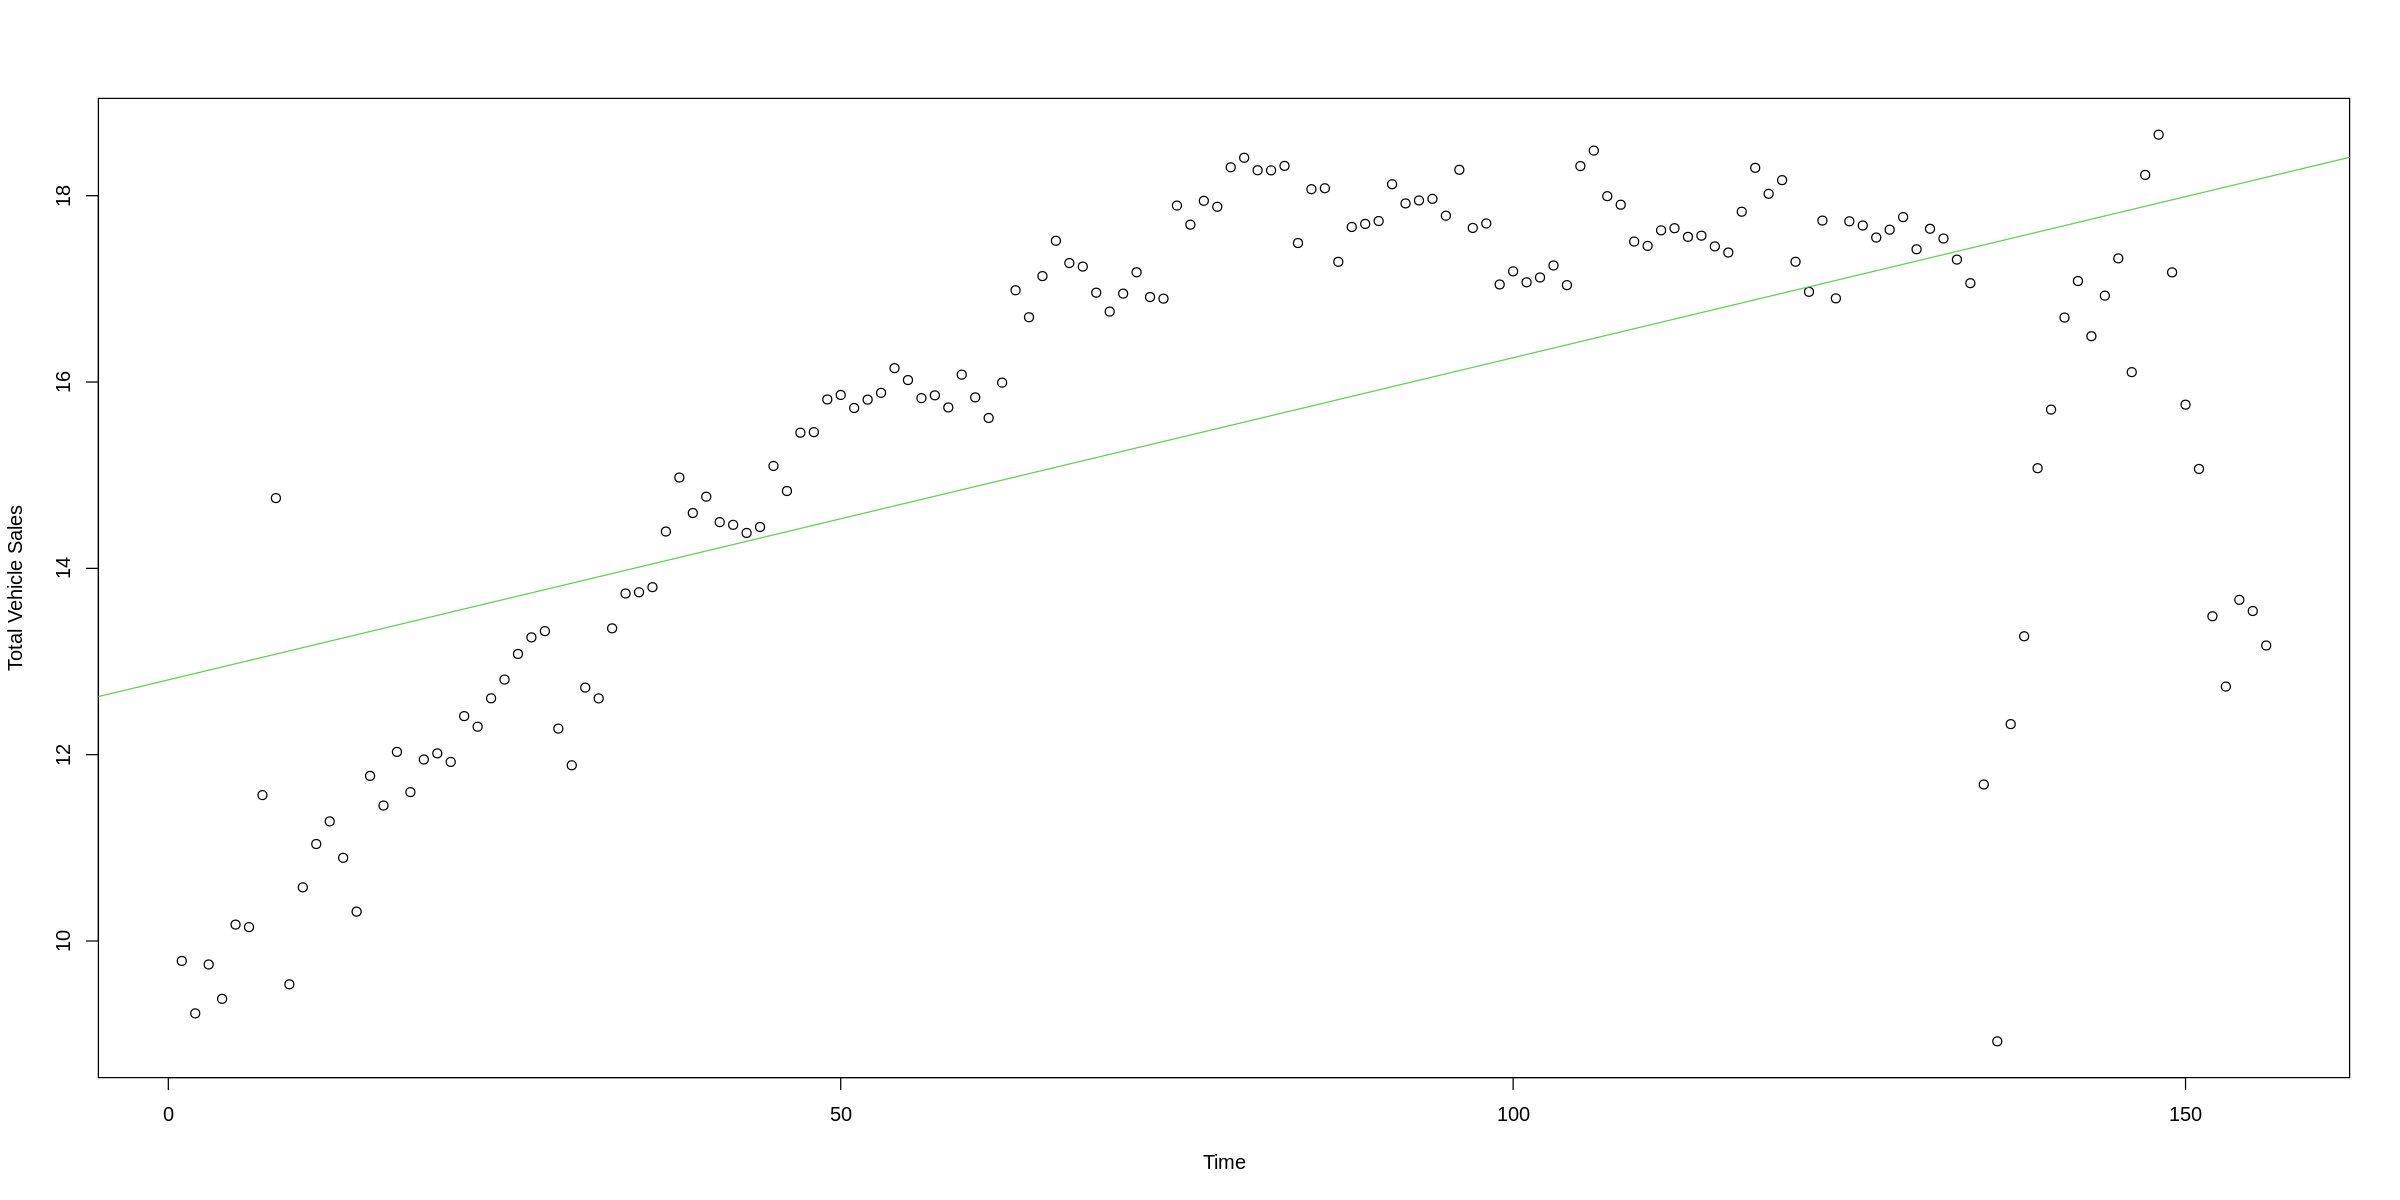

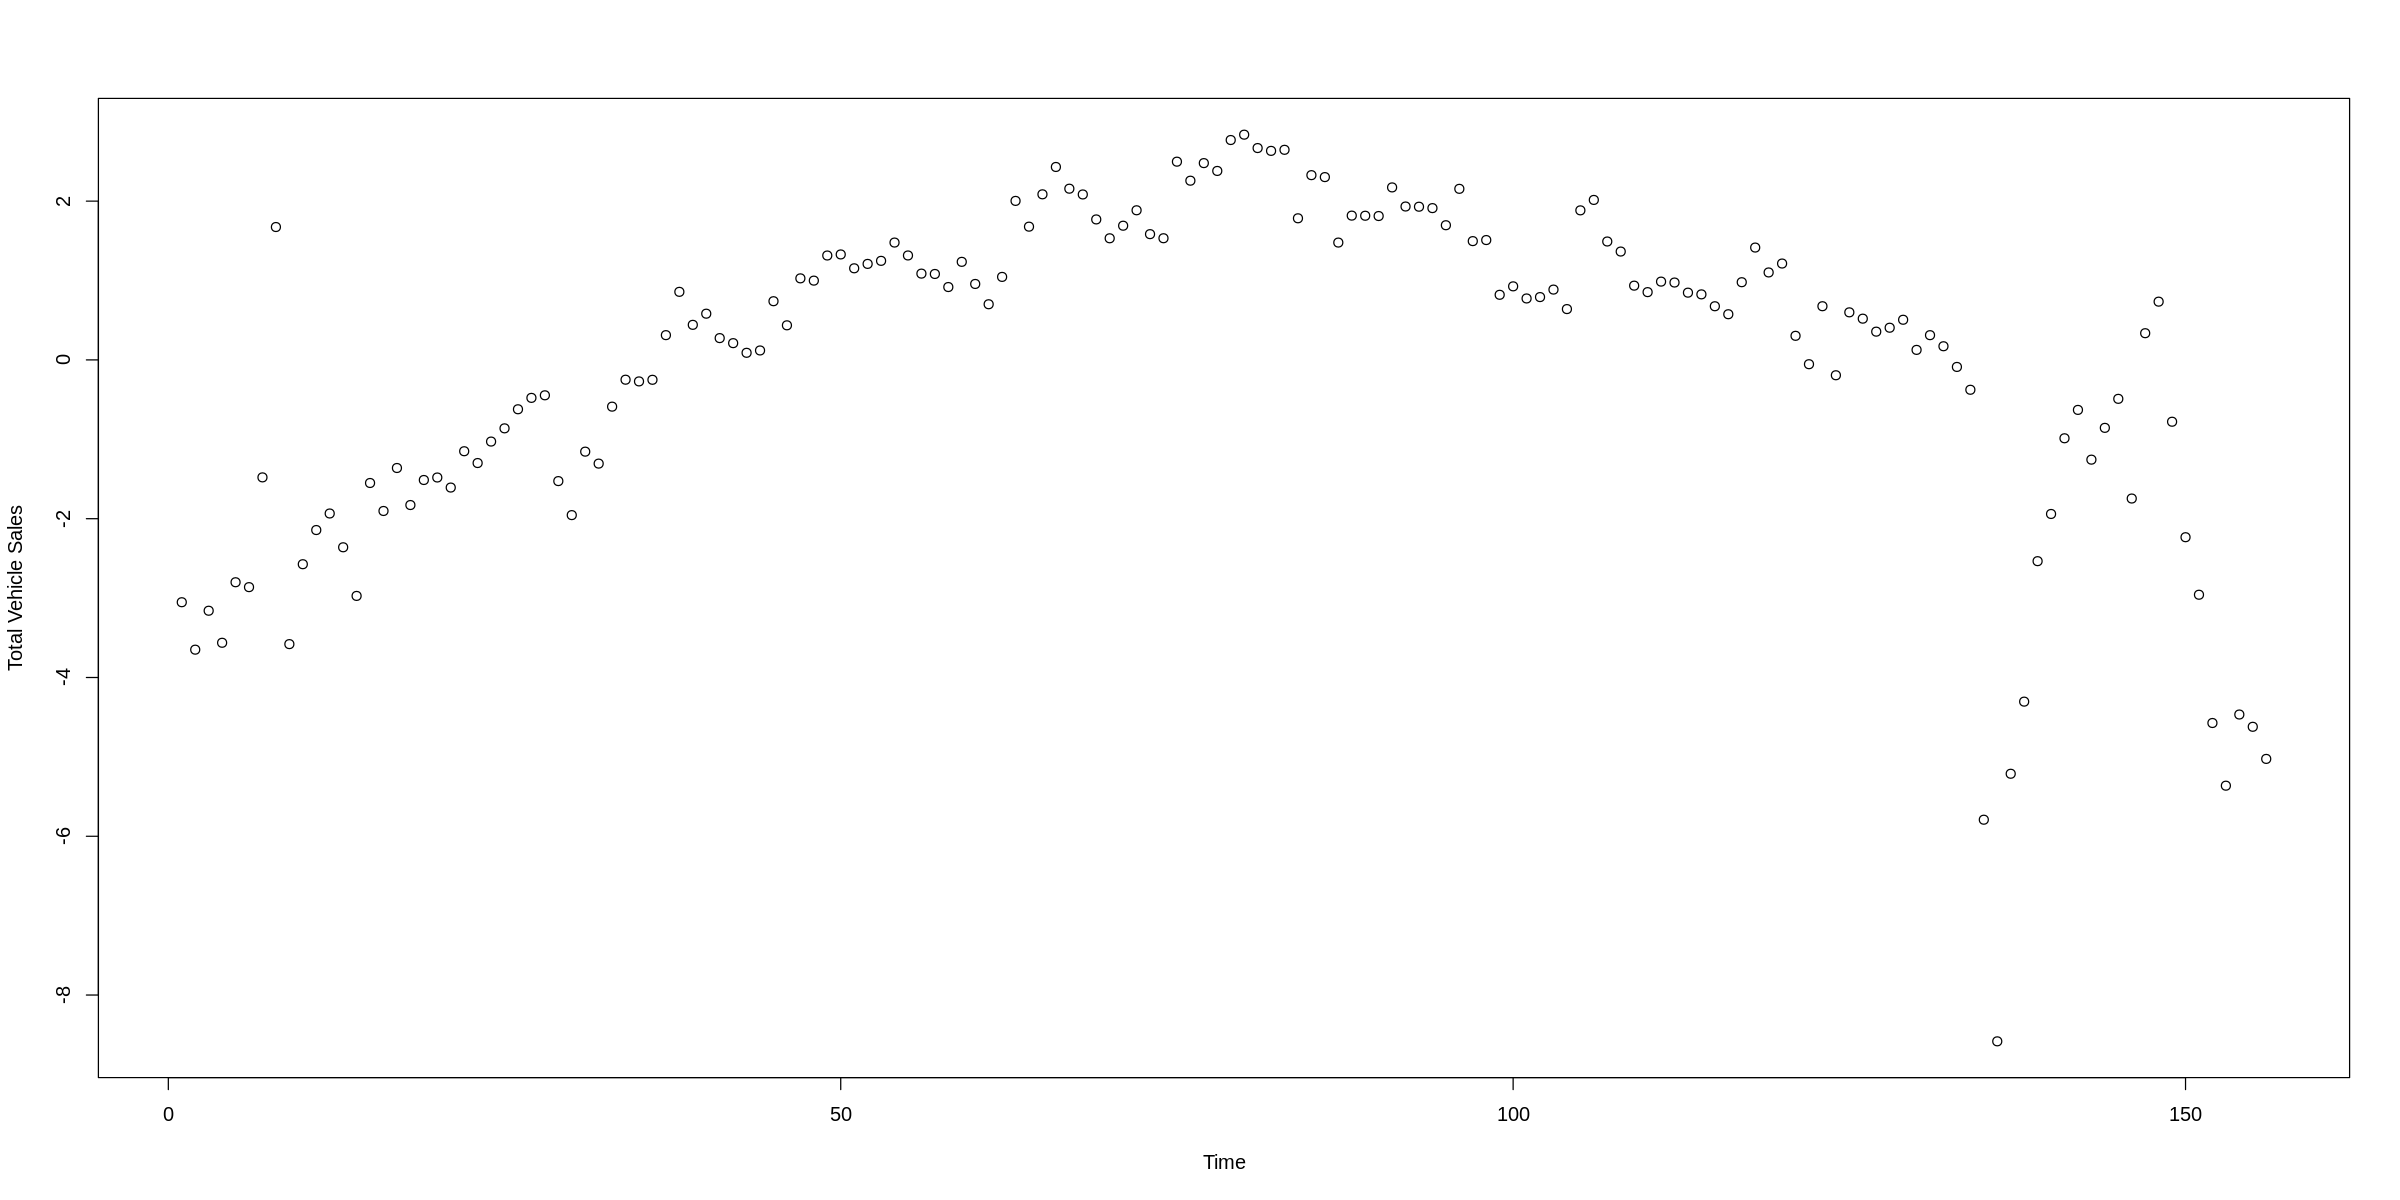

In [16]:
##fit a linear regression model
fit_to <- lm(to~ t_to)
summary(fit_to)

##plot of the model
plot(t_to, to, xlab="Time", ylab="Total Vehicle Sales")
abline(fit_to, col=3)

##check the residuals? are they autocorrelated? Test of DW
dwtest(fit_to)

##check the residuals
resfit_to<- residuals(fit_to)
plot(resfit_to,xlab="Time", ylab="Total Vehicle Sales" )

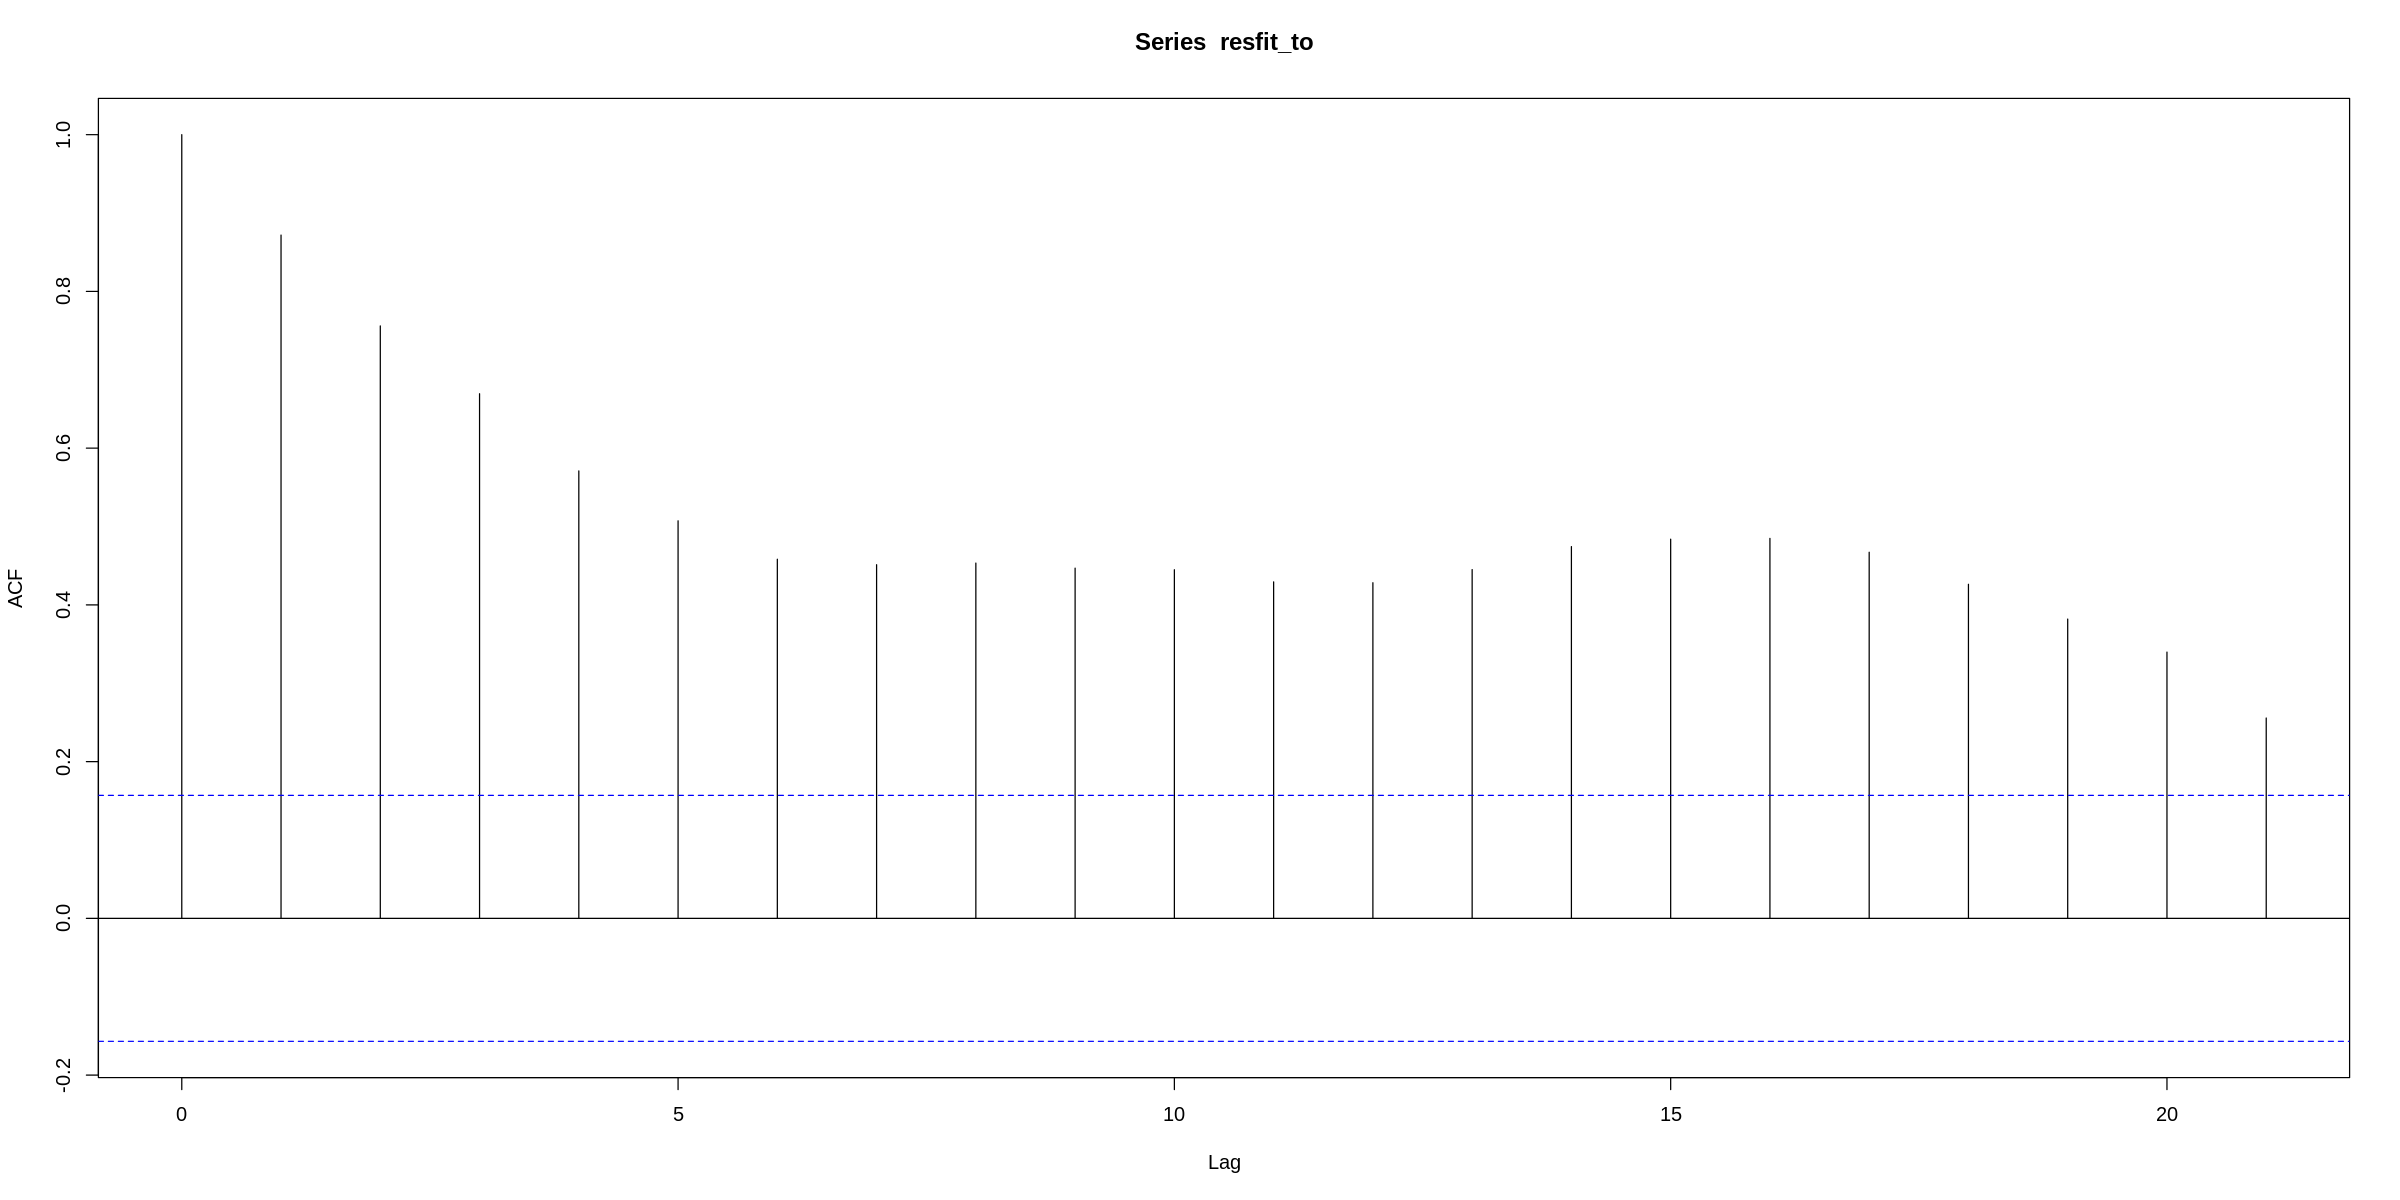

In [17]:
acf(resfit_to)

#tslm


Call:
tslm(formula = de.ts ~ trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-218.066  -65.470    4.375   69.760  205.832 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  418.865     15.021  27.884  < 2e-16 ***
trend         -0.799      0.166  -4.814 3.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.36 on 154 degrees of freedom
Multiple R-squared:  0.1308,	Adjusted R-squared:  0.1251 
F-statistic: 23.17 on 1 and 154 DF,  p-value: 3.51e-06



	Durbin-Watson test

data:  fitts_de
DW = 0.40482, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


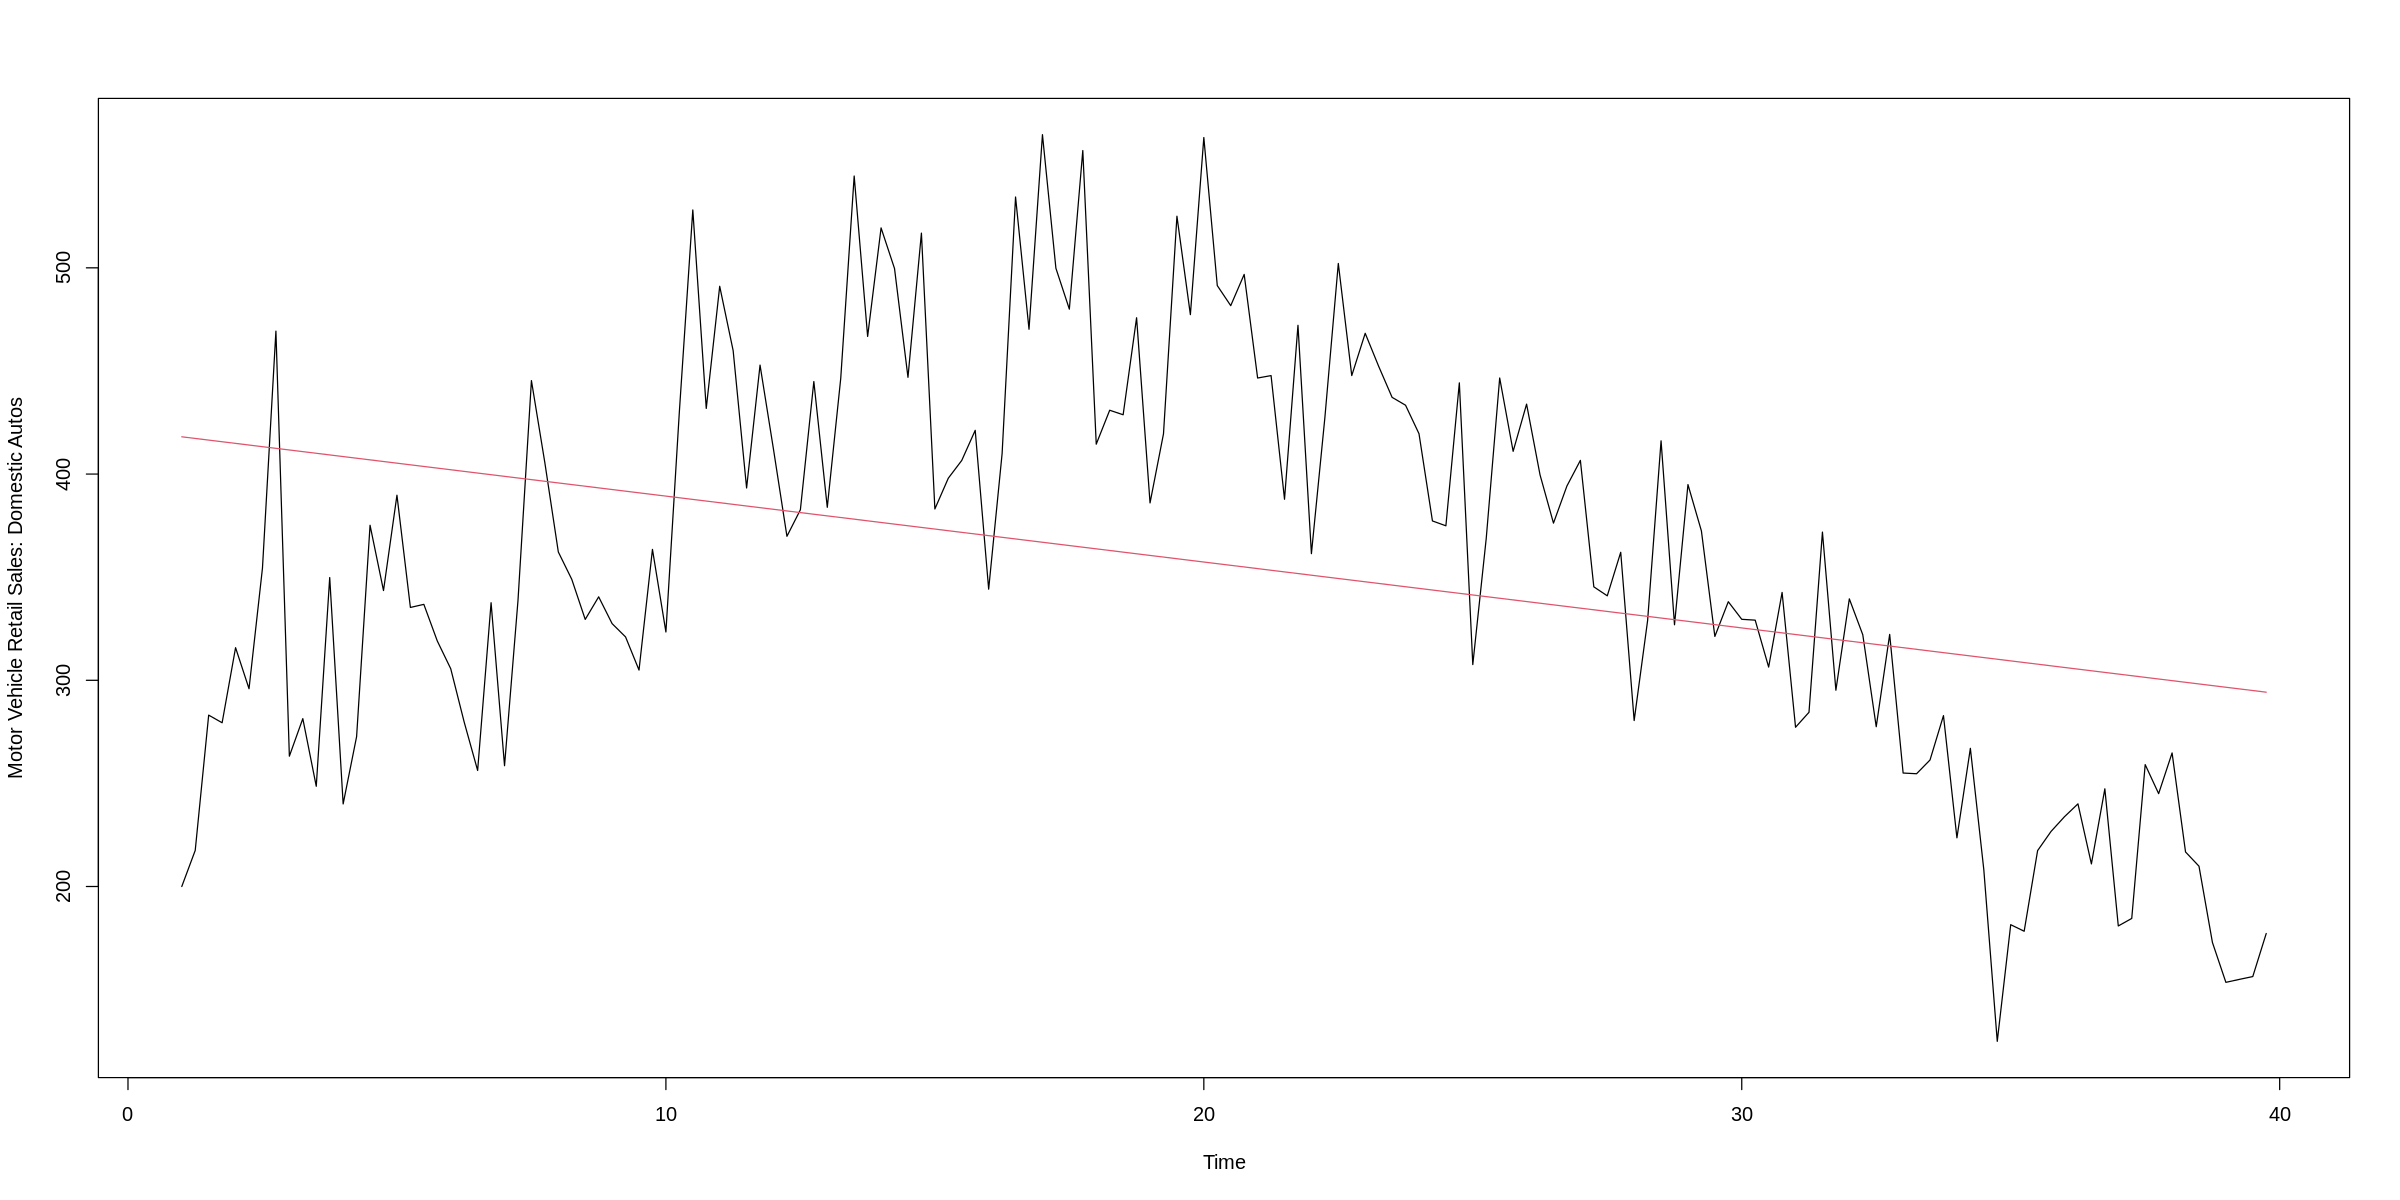

In [18]:
## we fit a linear model with the tslm function
fitts_de<- tslm(de.ts~trend)

###obviously it gives the same results of the first model
summary(fitts_de)

dwtest(fitts_de)

plot(de.ts, ylab="Motor Vehicle Retail Sales: Domestic Autos", xlab="Time")
lines(fitted(fitts_de), col=2)


Call:
tslm(formula = to.ts ~ trend)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5831 -1.1806  0.6199  1.4817  2.8373 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.803463   0.331179  38.660   <2e-16 ***
trend        0.034578   0.003659   9.449   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.058 on 154 degrees of freedom
Multiple R-squared:  0.367,	Adjusted R-squared:  0.3629 
F-statistic: 89.28 on 1 and 154 DF,  p-value: < 2.2e-16



	Durbin-Watson test

data:  fitts_to
DW = 0.2033, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


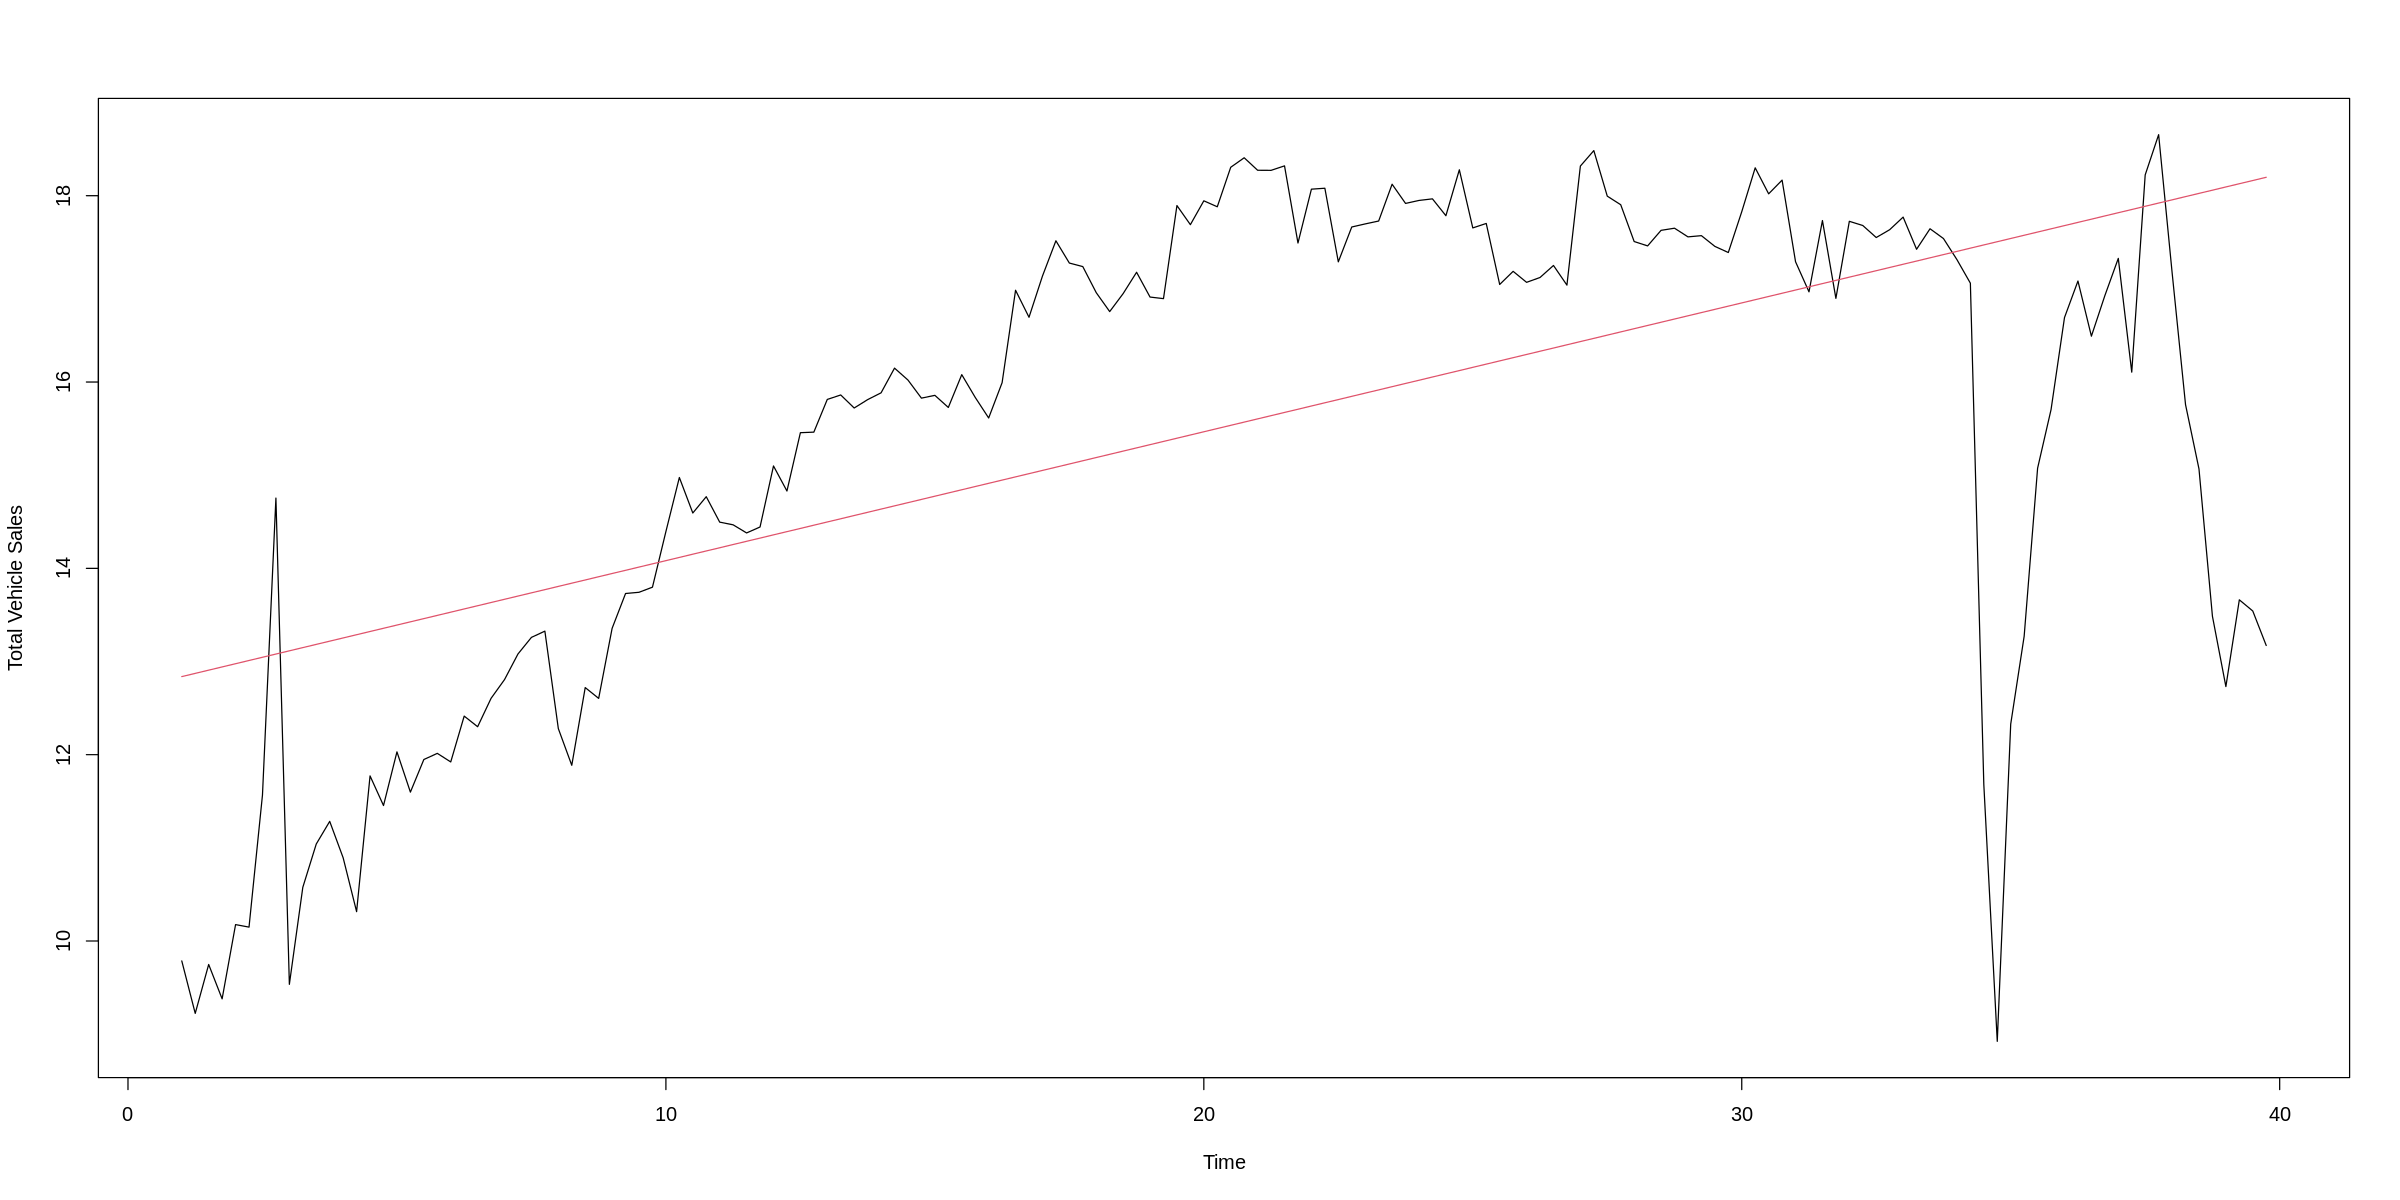

In [19]:
## we fit a linear model with the tslm function
fitts_to<- tslm(to.ts~trend)

###obviously it gives the same results of the first model
summary(fitts_to)

dwtest(fitts_to)

plot(to.ts, ylab="Total Vehicle Sales", xlab="Time")
lines(fitted(fitts_to), col=2)


Call:
tslm(formula = de.ts ~ trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-204.987  -71.826    0.603   72.771  219.419 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 405.7922    19.6846  20.615  < 2e-16 ***
trend        -0.8057     0.1662  -4.849 3.06e-06 ***
season2       3.1572    21.1573   0.149    0.882    
season3      21.1339    21.1592   0.999    0.319    
season4      30.0970    21.1625   1.422    0.157    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 93.43 on 151 degrees of freedom
Multiple R-squared:  0.1465,	Adjusted R-squared:  0.1239 
F-statistic:  6.48 on 4 and 151 DF,  p-value: 7.711e-05



	Durbin-Watson test

data:  fit_se_de
DW = 0.37722, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


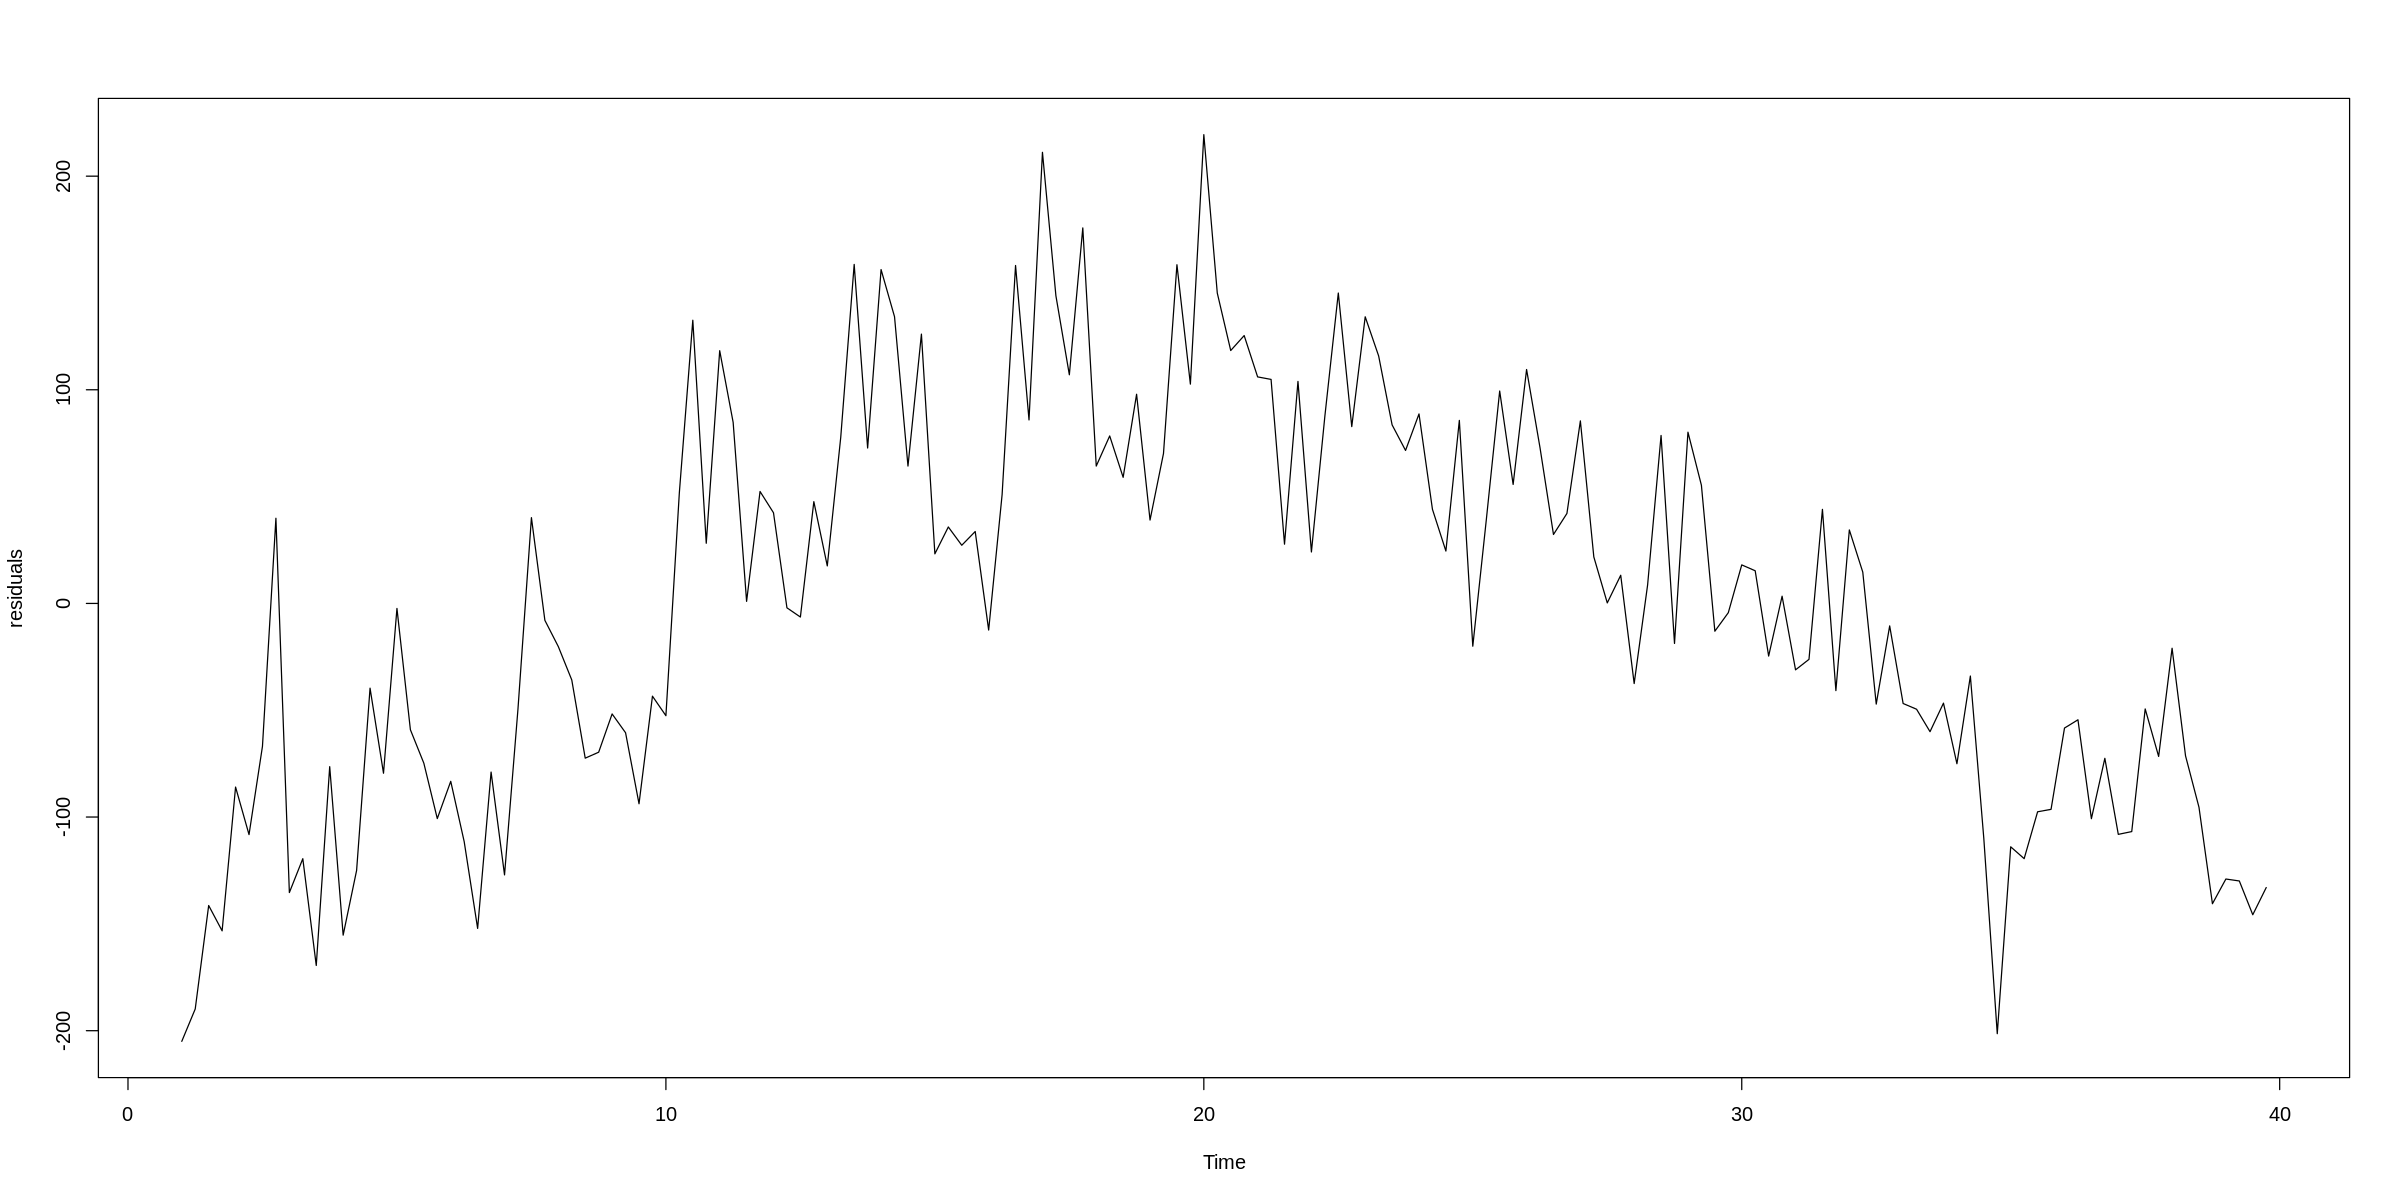

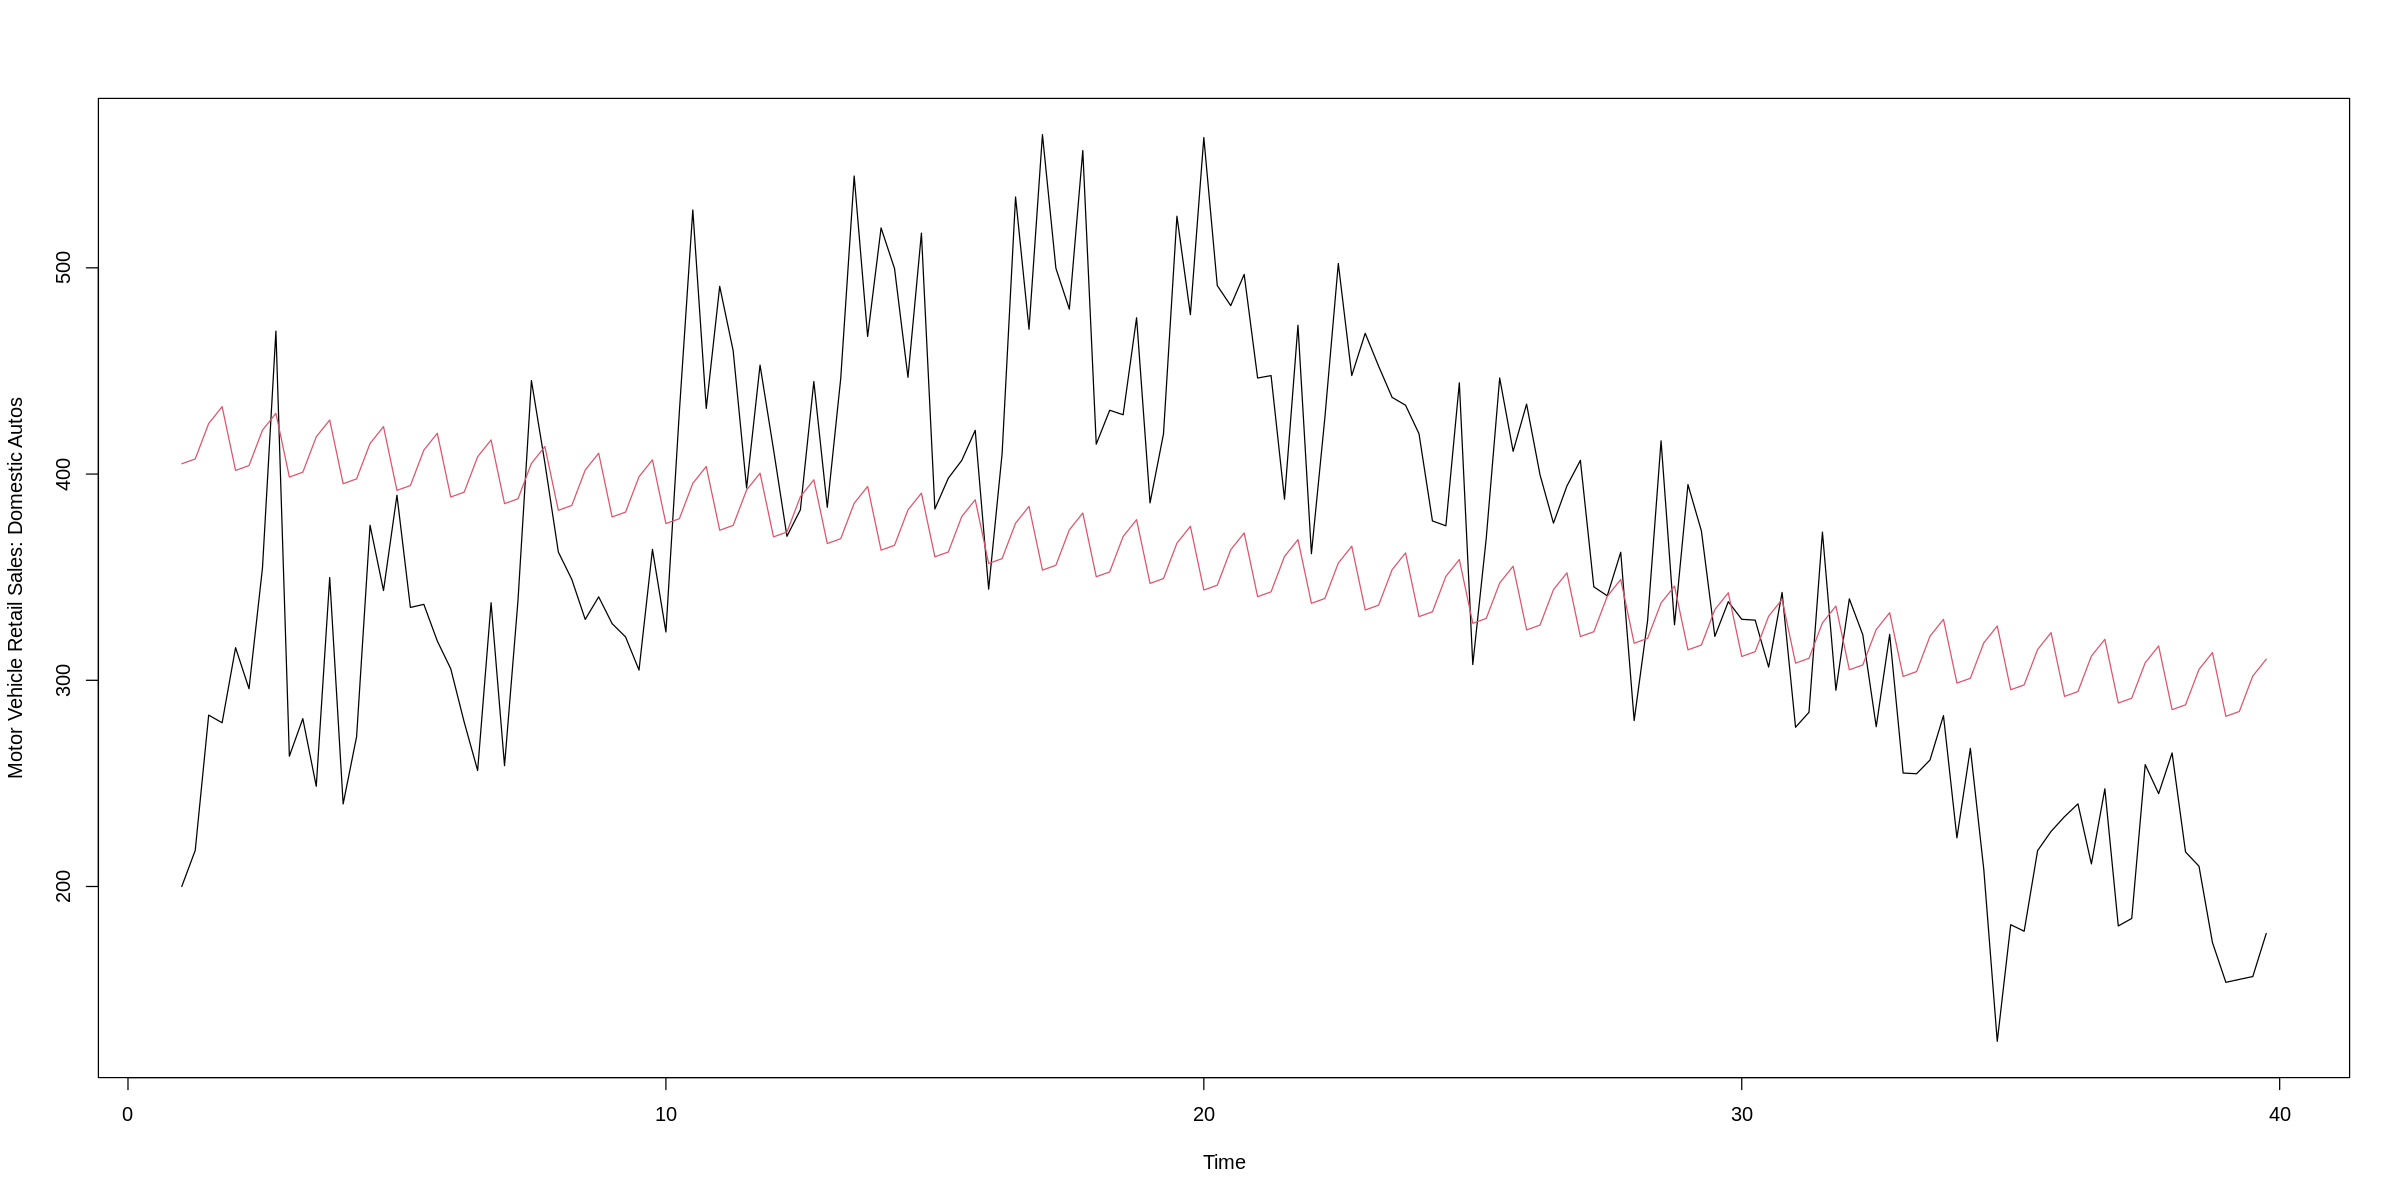

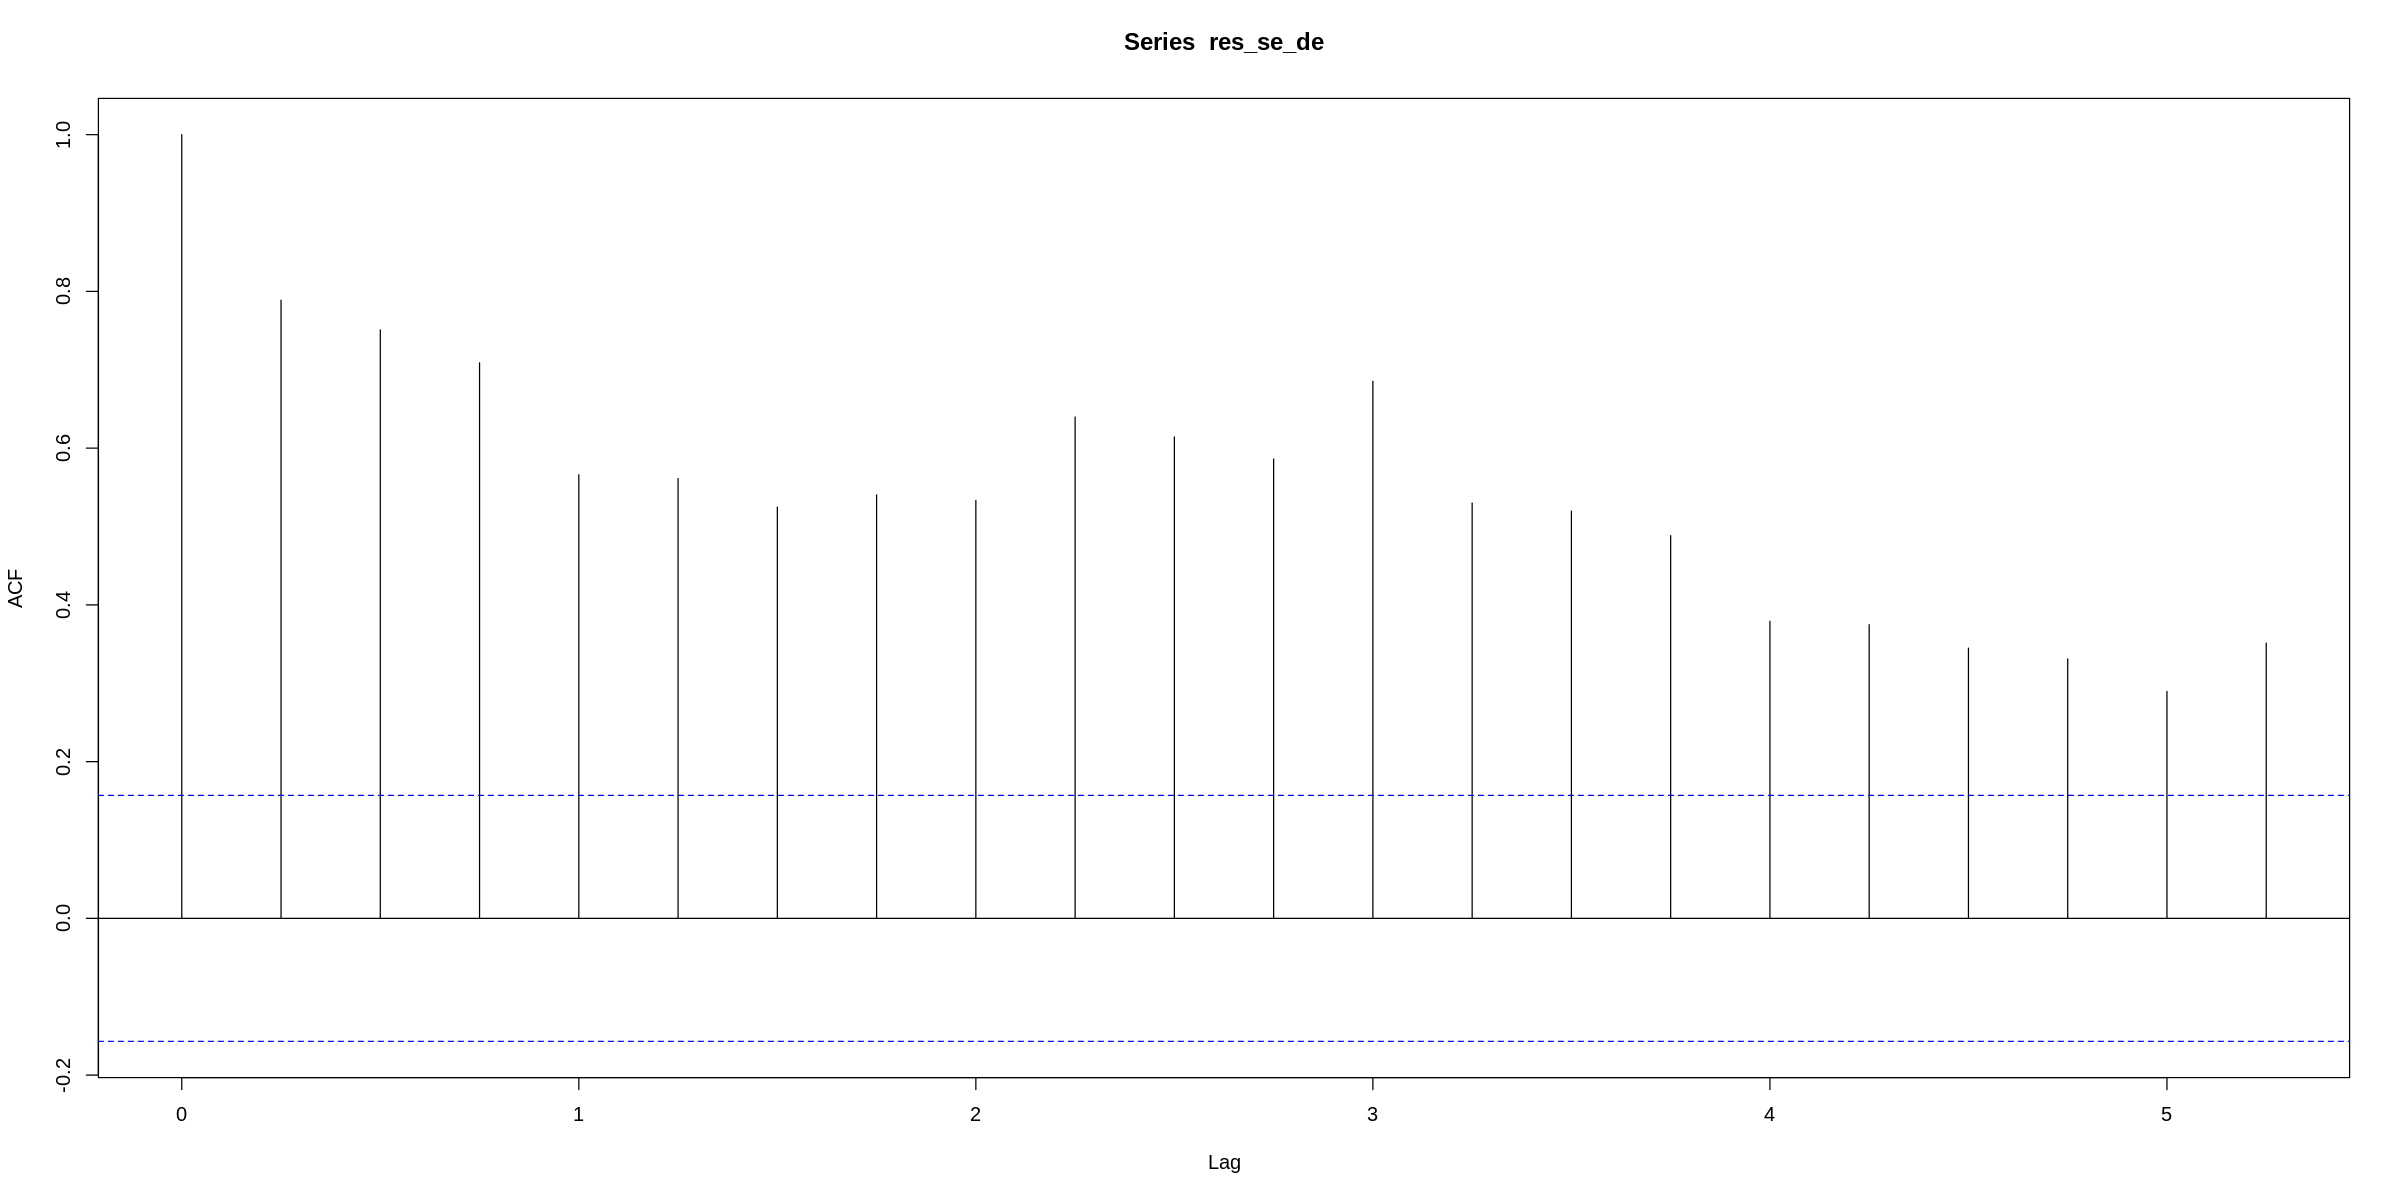

In [20]:
#Model with trend and seasonality
fit_se_de <- tslm(de.ts~ trend+season)
summary(fit_se_de)

#check the residuals
res_se_de <- residuals(fit_se_de)

plot(res_se_de, ylab="residuals")
dwtest(fit_se_de)

###plot of the model
plot(de.ts, ylab="Motor Vehicle Retail Sales: Domestic Autos", xlab="Time")
lines(fitted(fit_se_de), col=2)

acf(res_se_de)


Call:
tslm(formula = to.ts ~ trend + season)

Residuals:
   Min     1Q Median     3Q    Max 
-8.557 -1.221  0.619  1.458  2.863 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.803475   0.437922  29.237   <2e-16 ***
trend        0.034579   0.003696   9.355   <2e-16 ***
season2     -0.020579   0.470684  -0.044    0.965    
season3      0.046381   0.470728   0.099    0.922    
season4     -0.026069   0.470800  -0.055    0.956    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.078 on 151 degrees of freedom
Multiple R-squared:  0.3671,	Adjusted R-squared:  0.3503 
F-statistic:  21.9 on 4 and 151 DF,  p-value: 2.873e-14



	Durbin-Watson test

data:  fit_se_to
DW = 0.20285, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


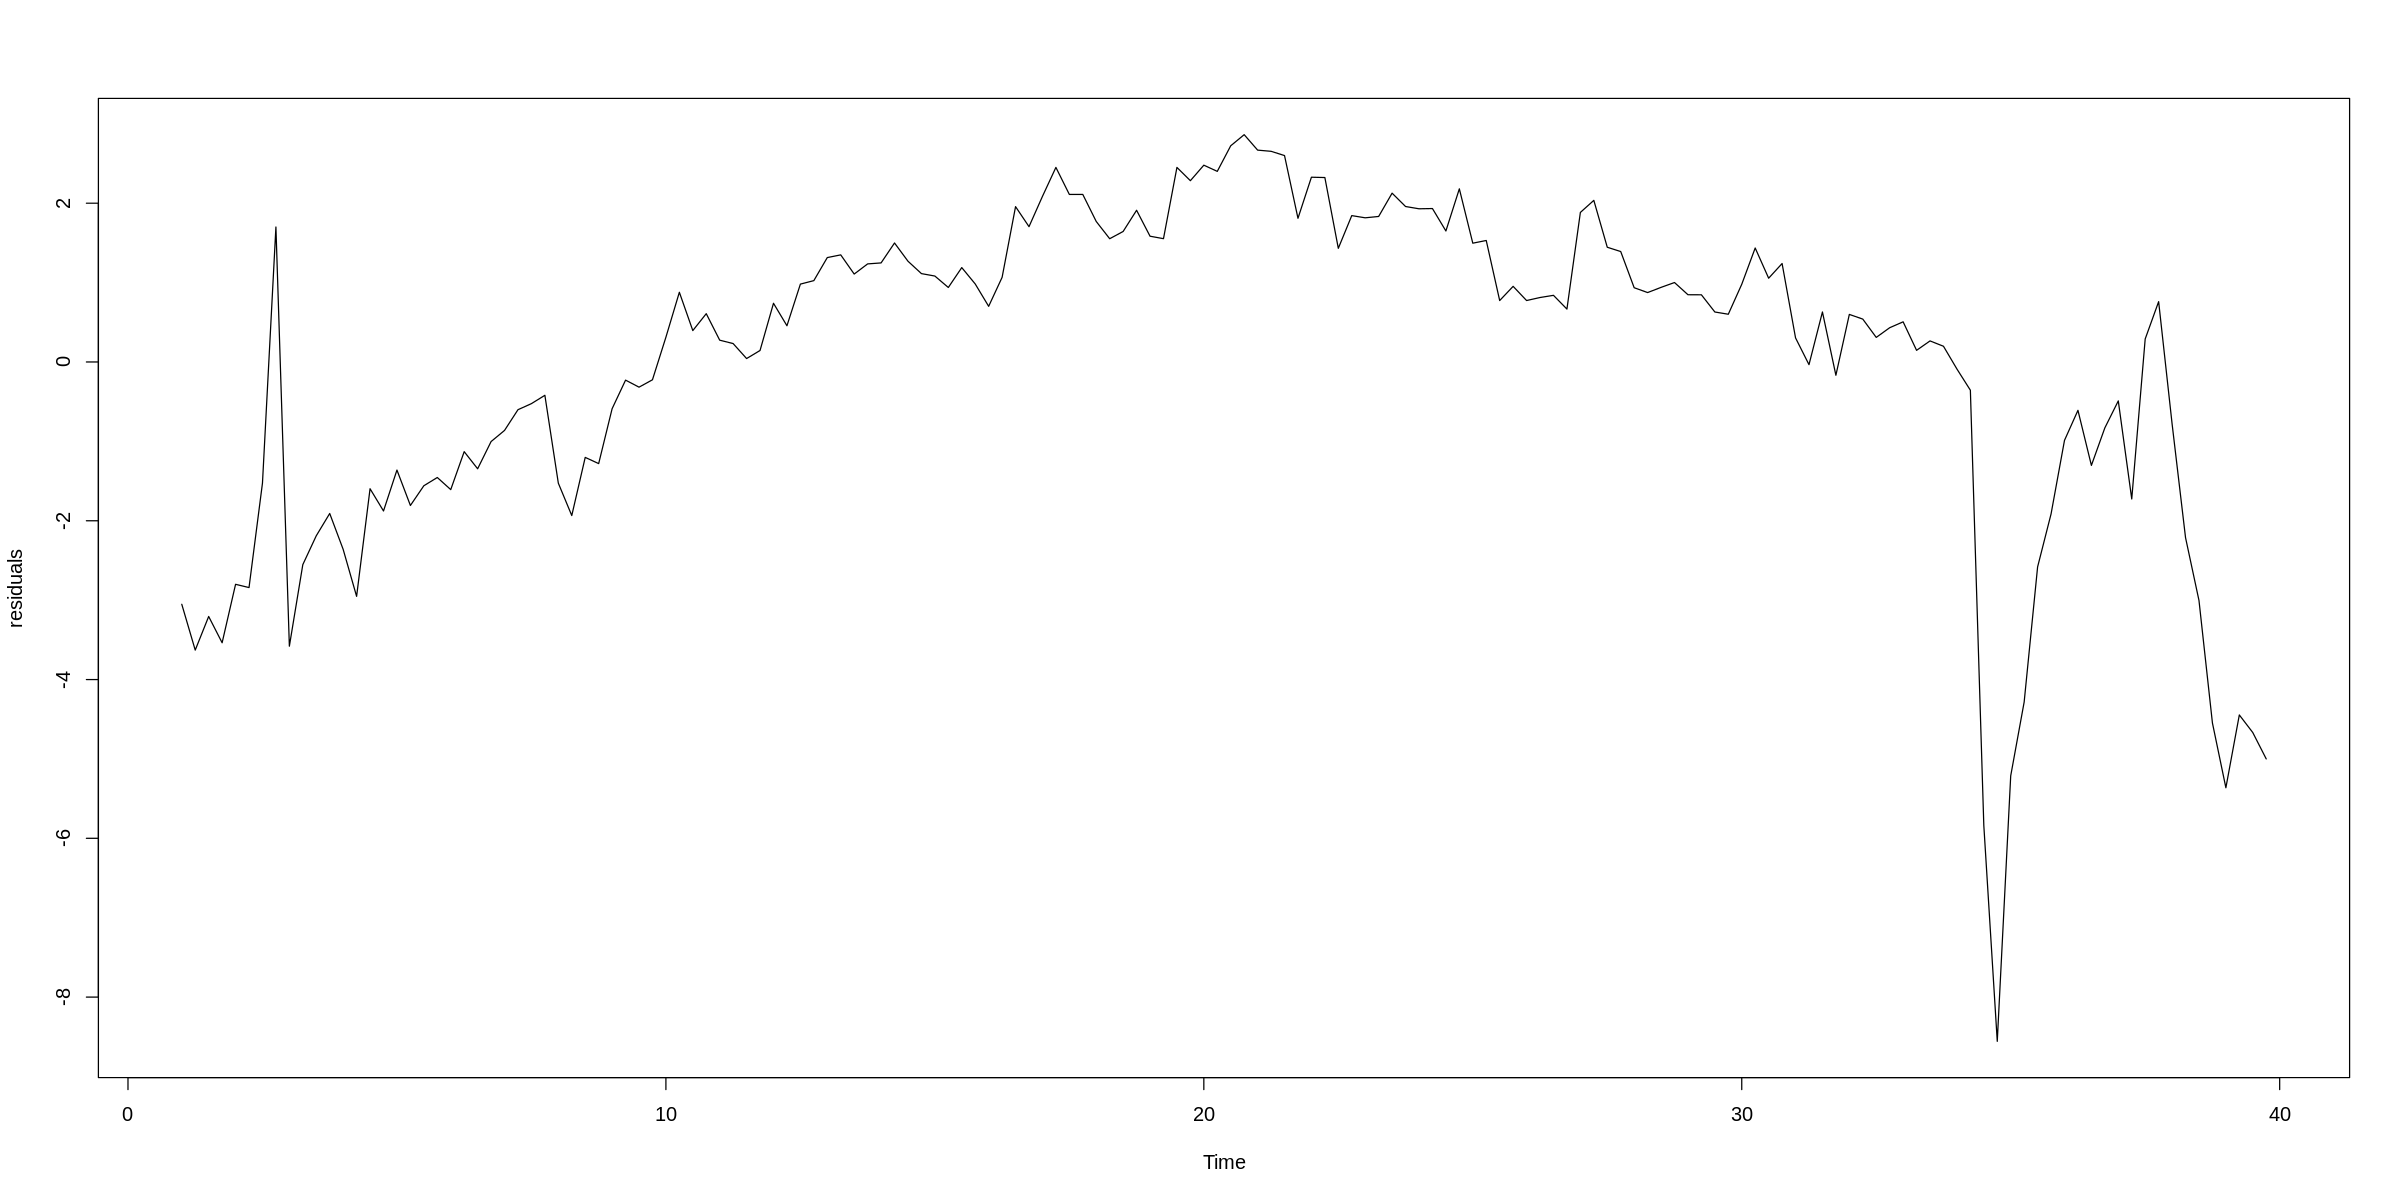

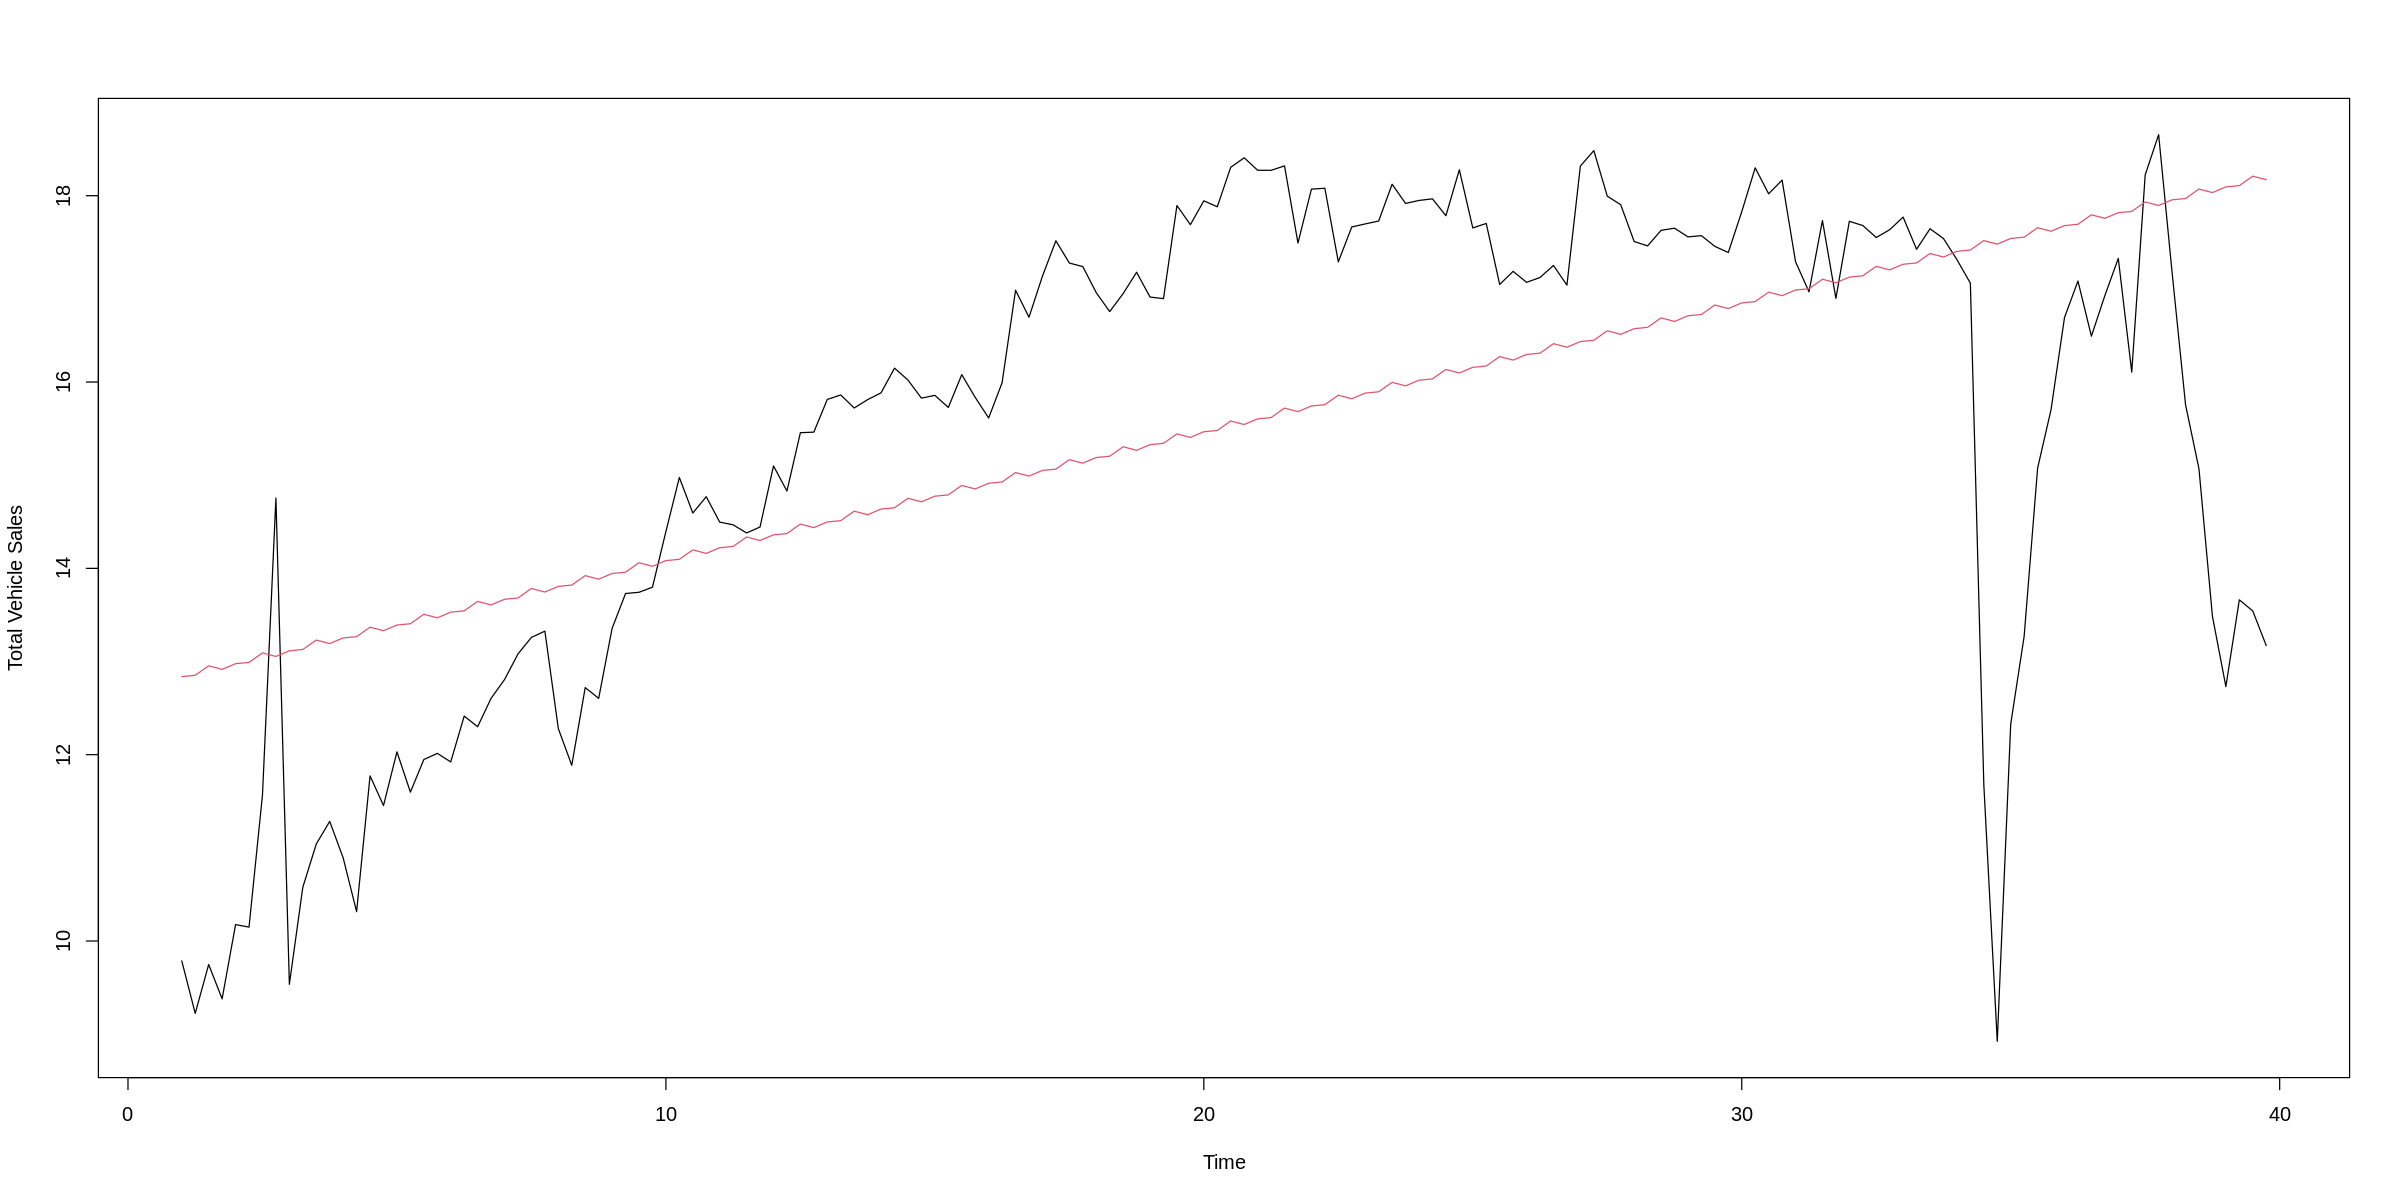

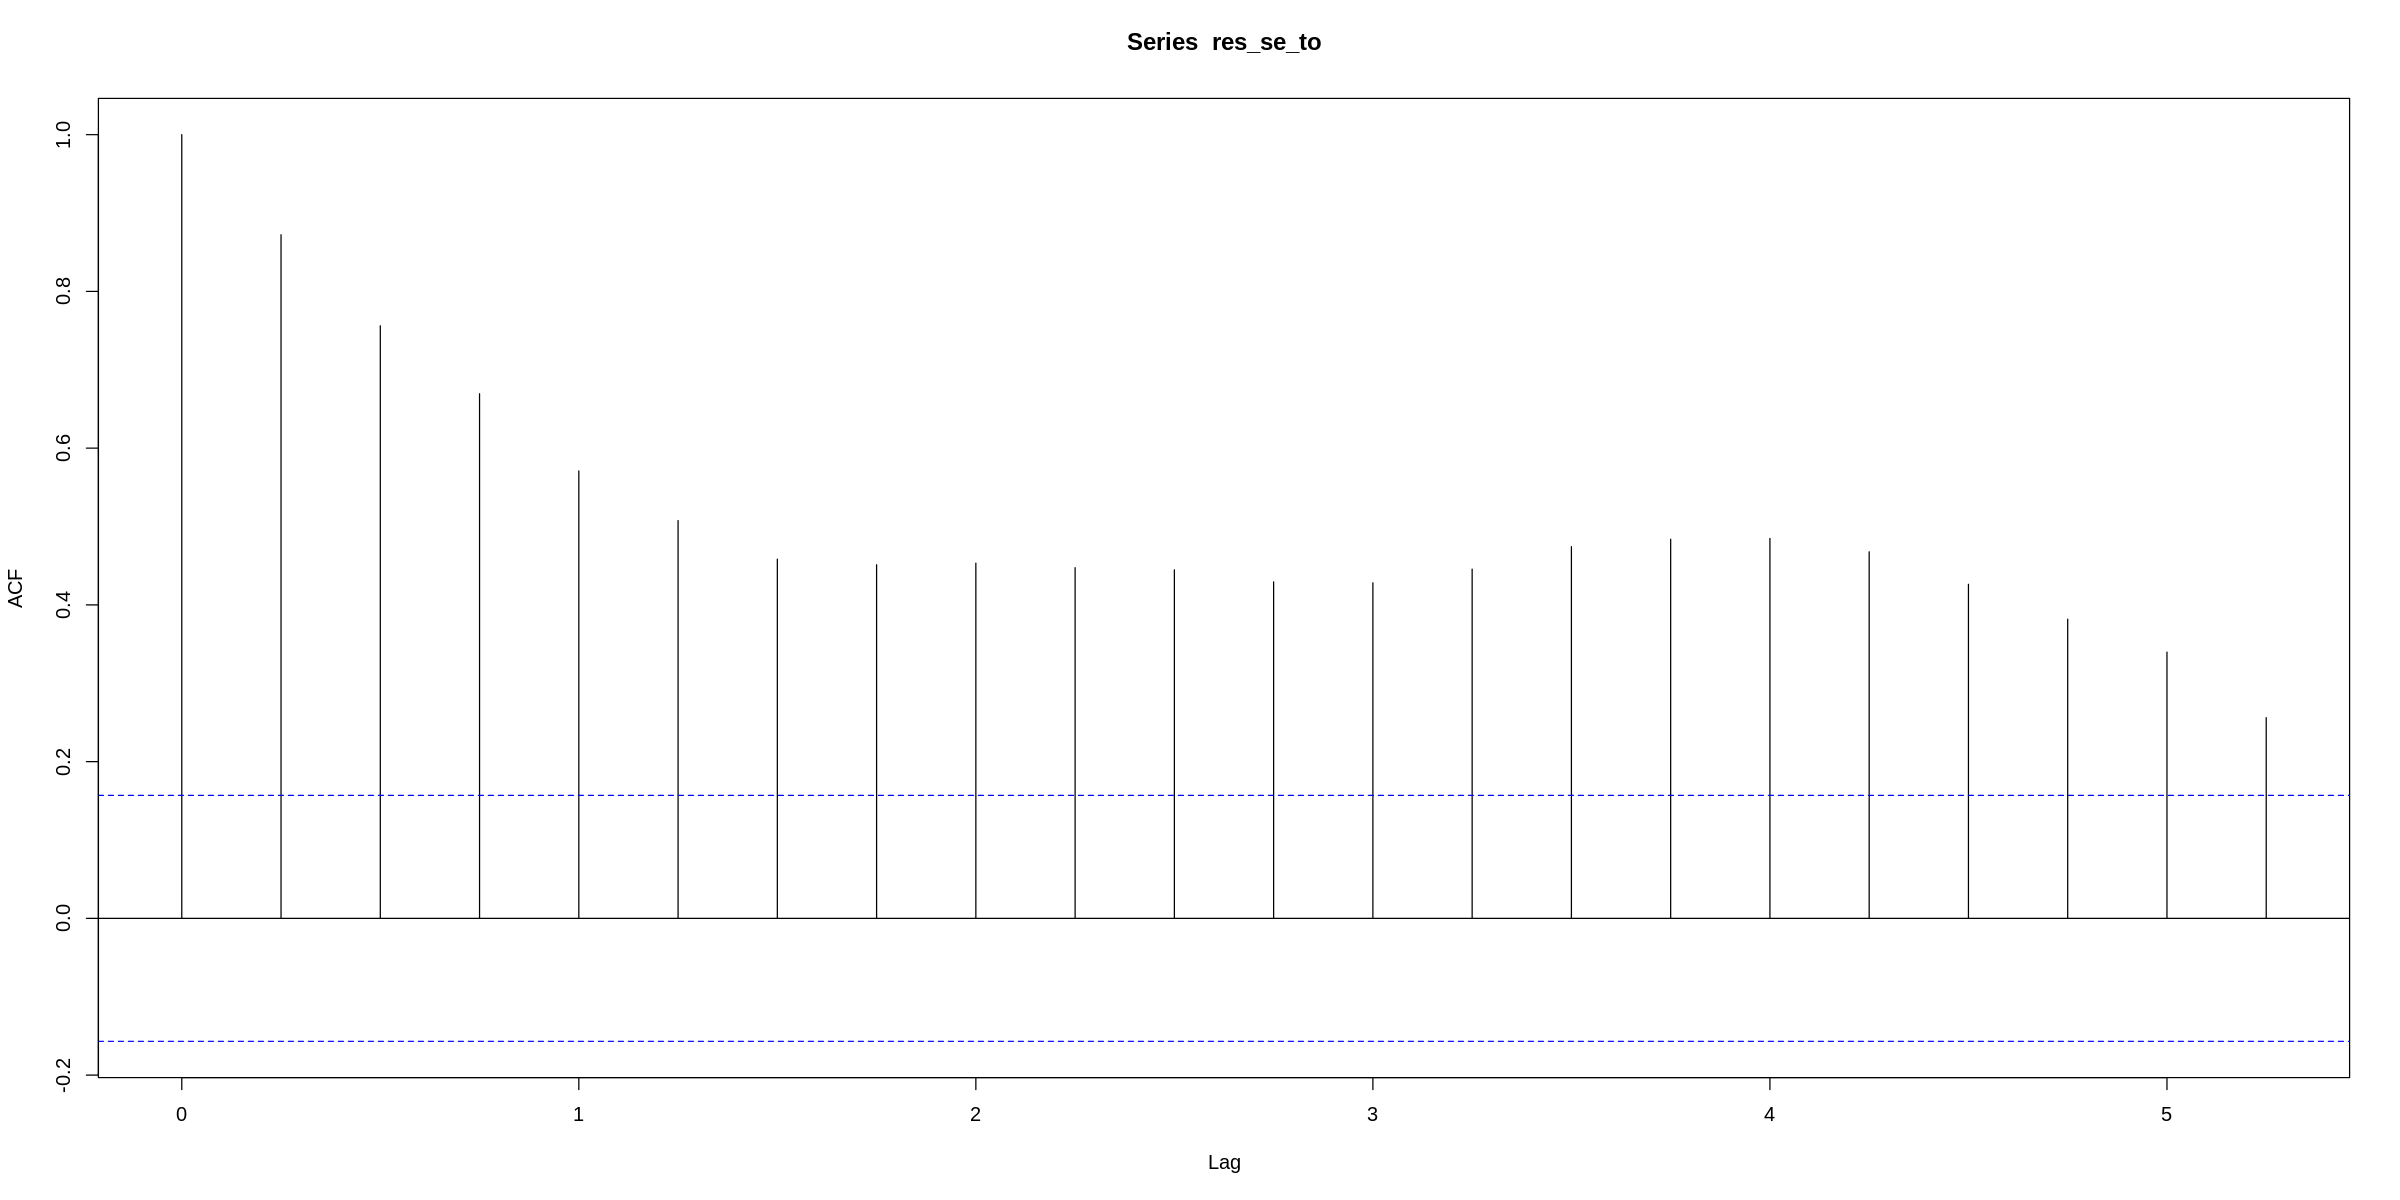

In [21]:
#Model with trend and seasonality
fit_se_to <- tslm(to.ts~ trend+season)
summary(fit_se_to)

#check the residuals
res_se_to <- residuals(fit_se_to)

plot(res_se_to, ylab="residuals")
dwtest(fit_se_to)

###plot of the model
plot(to.ts, ylab="Total Vehicle Sales", xlab="Time")
lines(fitted(fit_se_to), col=2)

acf(res_se_to)

#BM(retail)

In [22]:
NROW(r_de_f)

[1] 156

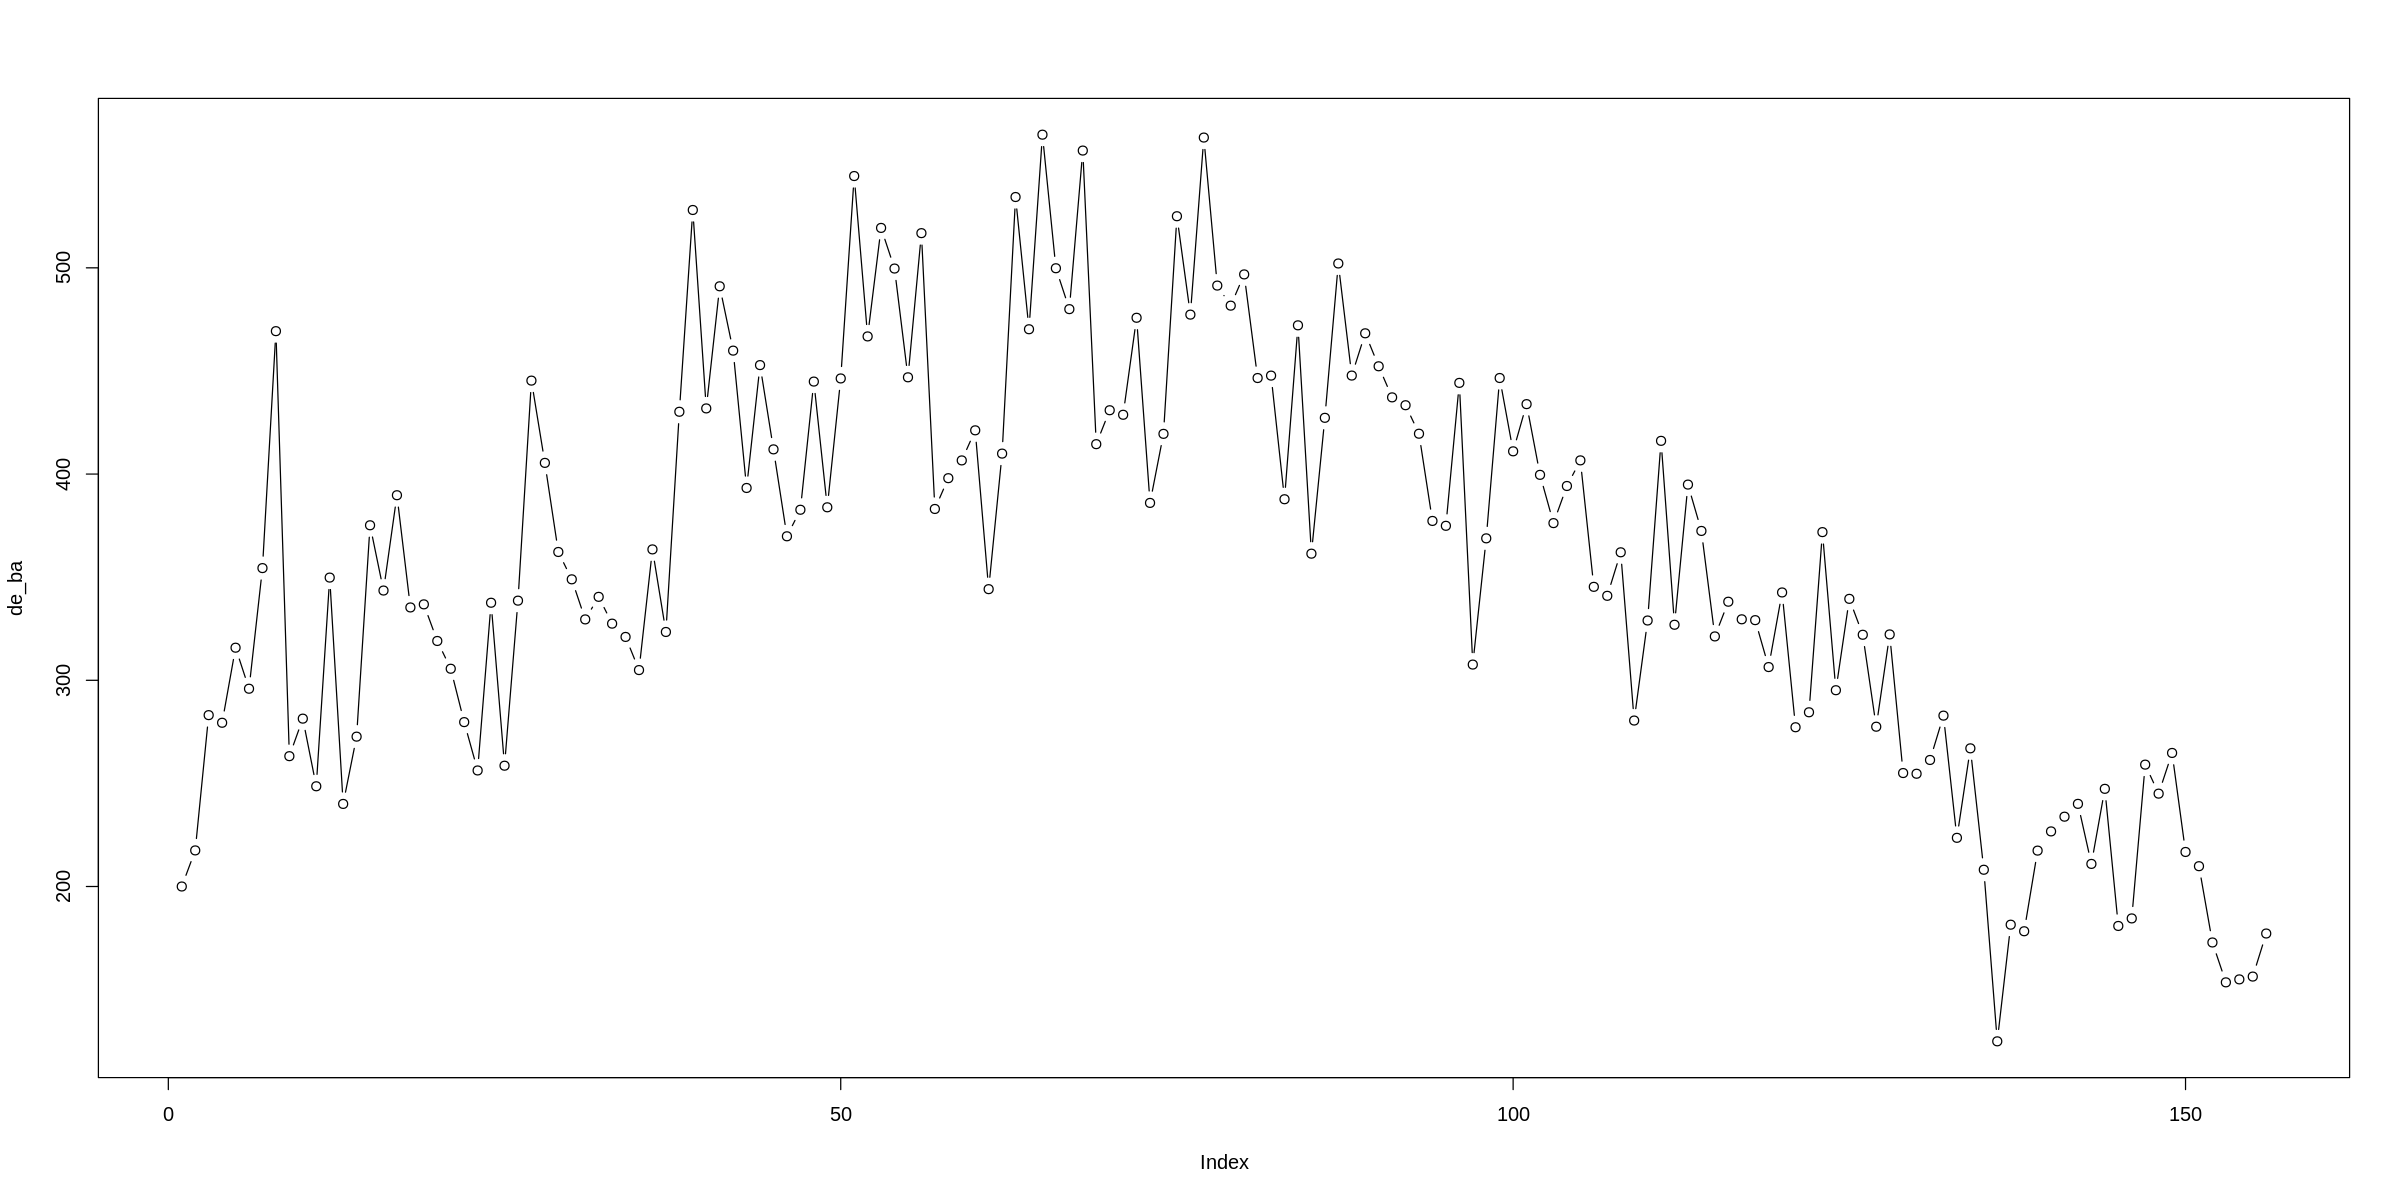

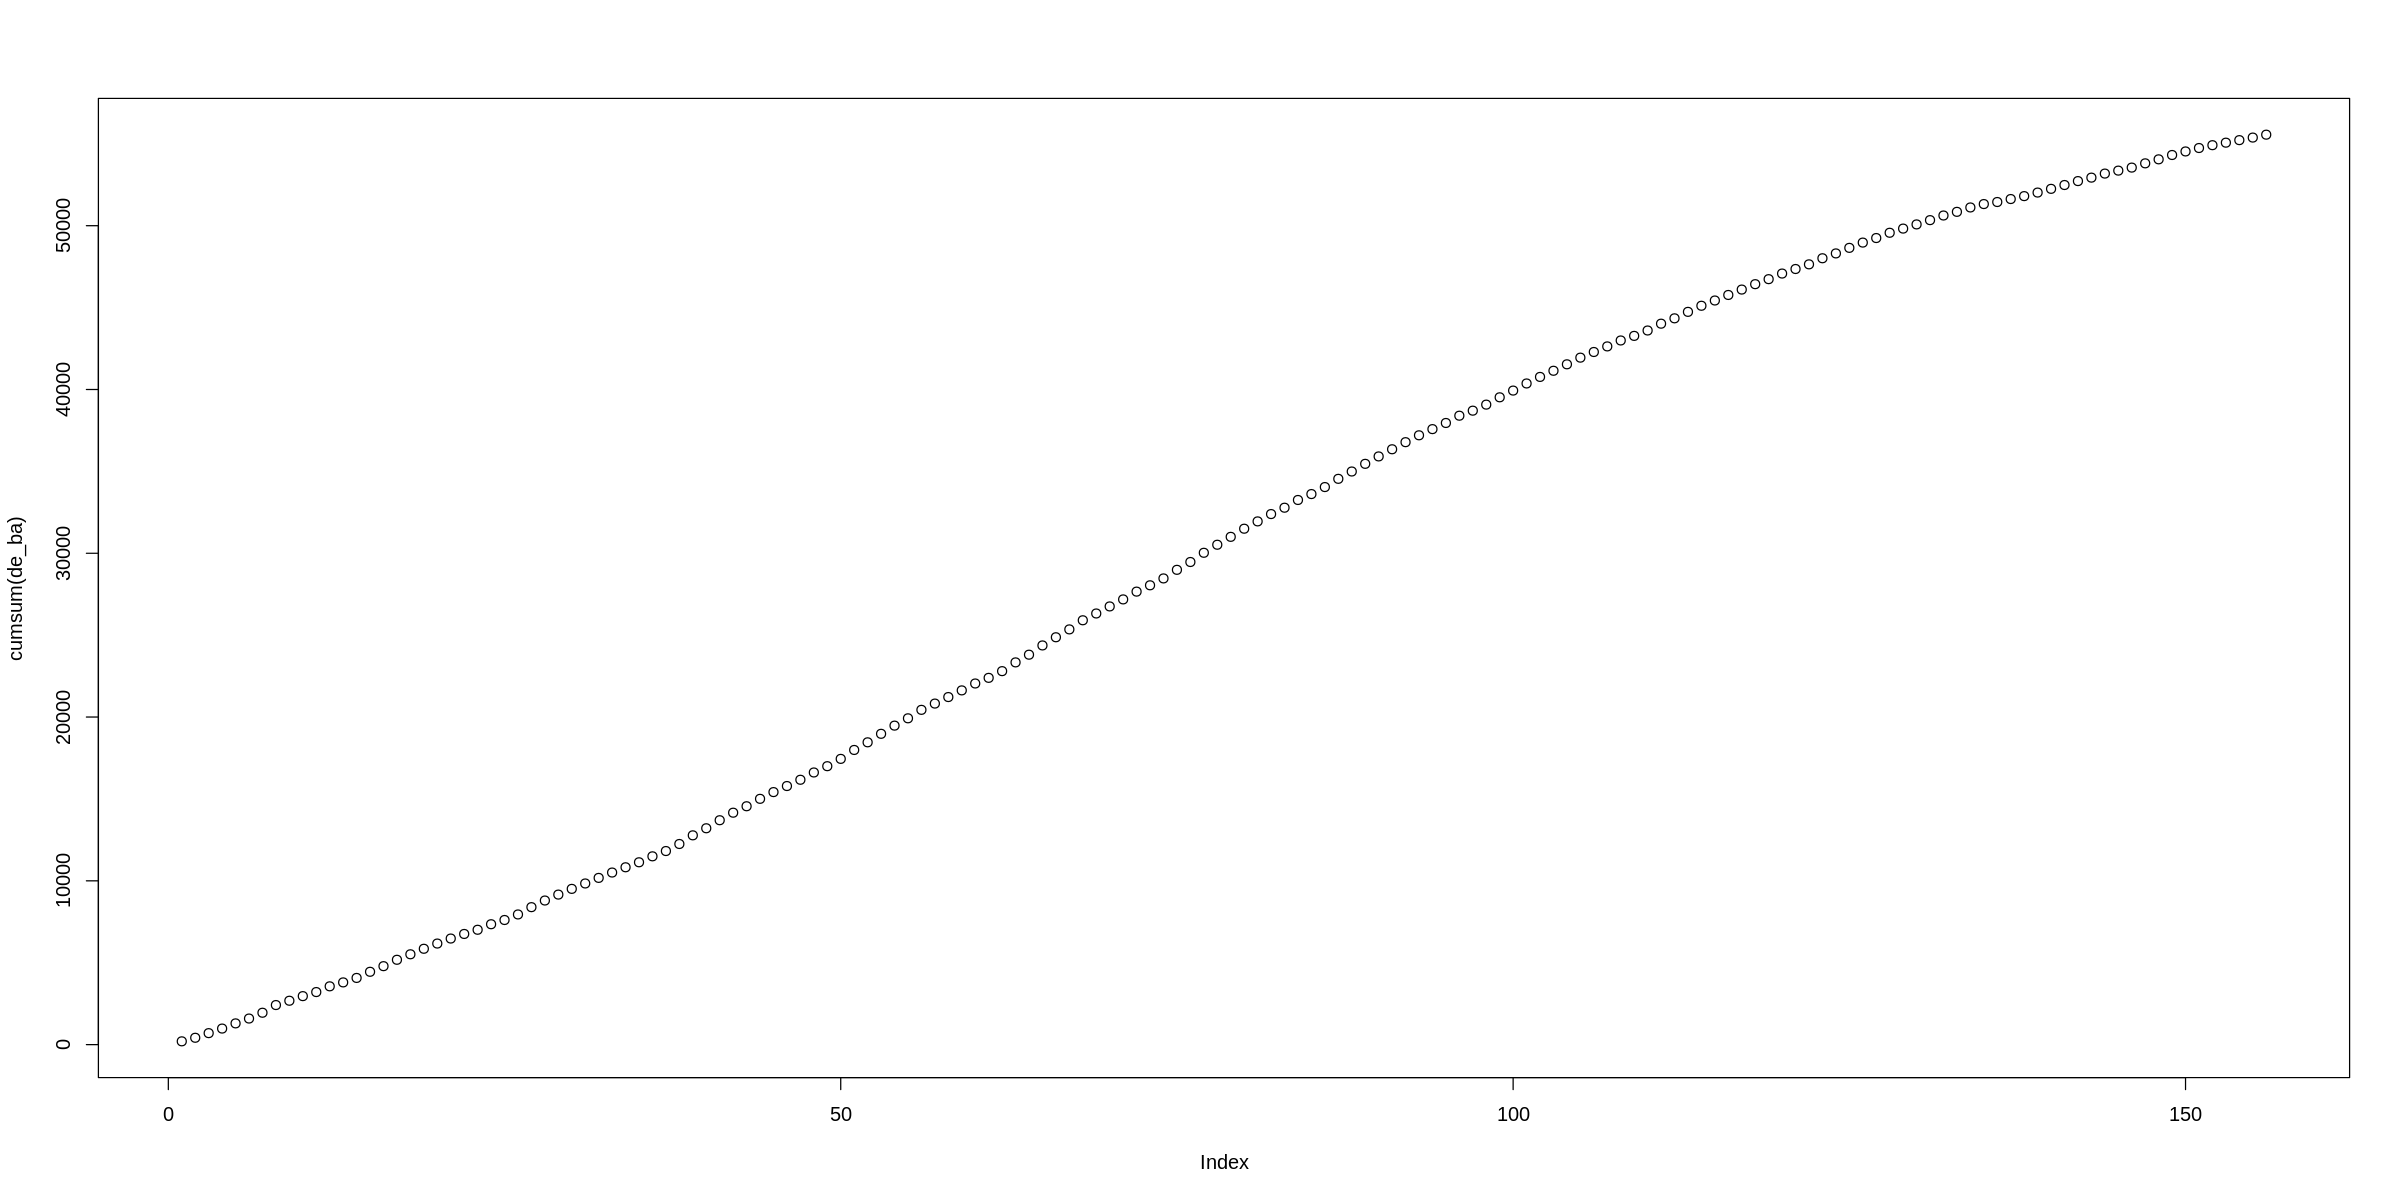

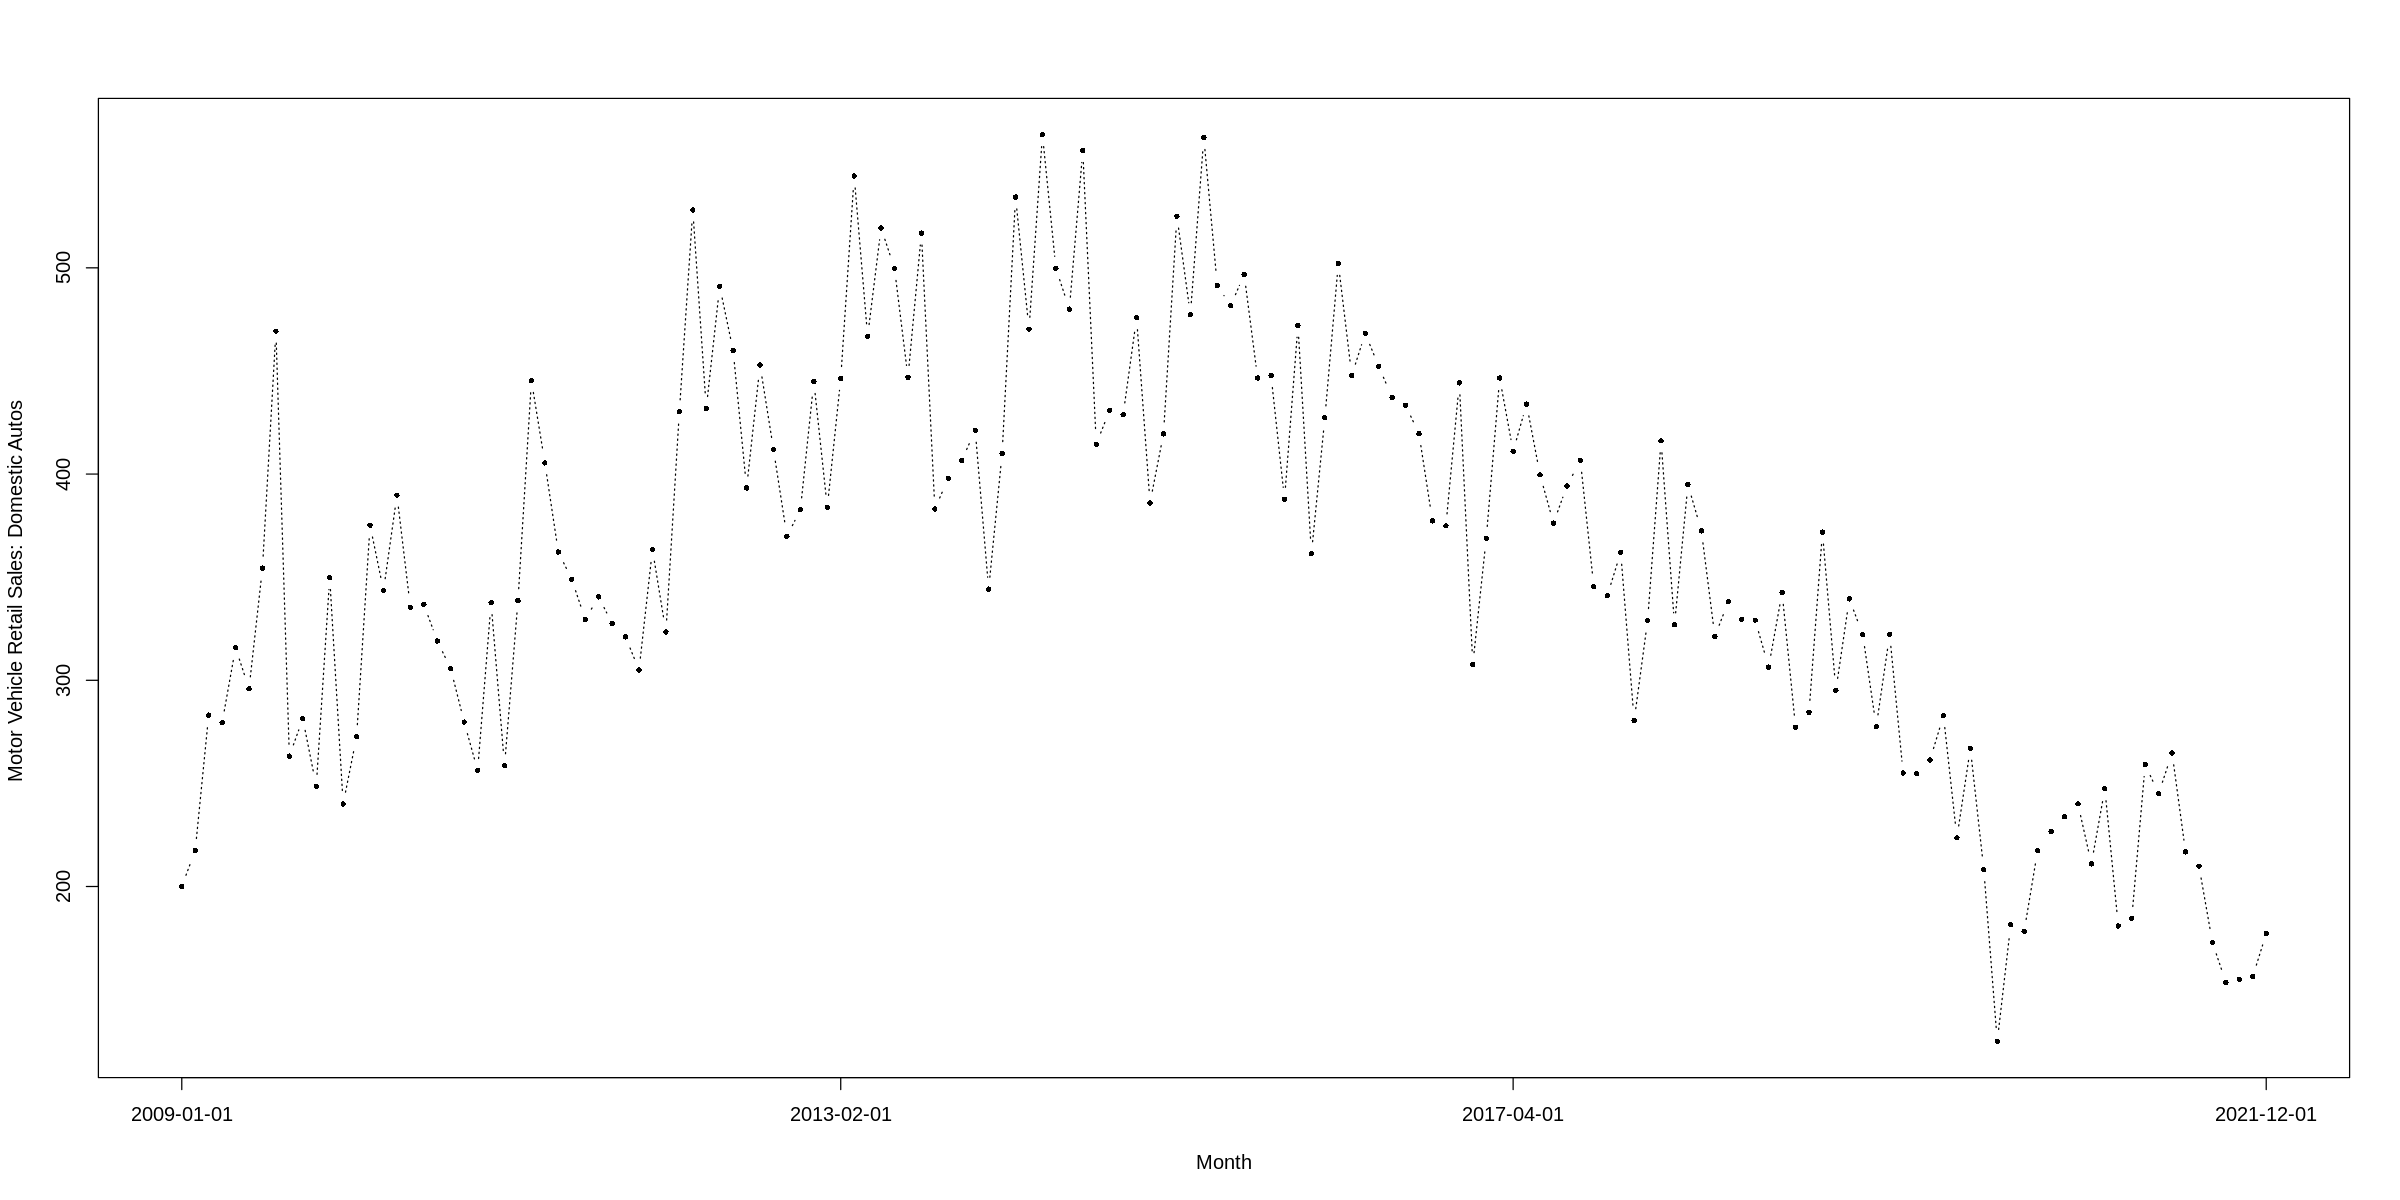

In [23]:
##create the variable cassette
de_ba<- r_de_f$DAUTONSA[1:156]

###some simple plots
plot(de_ba, type="b")
plot(cumsum(de_ba), type="b")

###a better plot of the yearly time series
plot(de_ba, type= "b",xlab="Month", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=r_de_f$DATE[c(1,50,100,156)])

Call: ( Standard Bass Model )

  BM(series = de_ba, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-291.38  -66.19   13.01   18.05   99.53  369.06 

Coefficients:
       Estimate    Std.Error        Lower        Upper   p-value    
m 6.309906e+04 1.155927e+02 6.287250e+04 6.332561e+04 1.40e-253 ***
p 3.922709e-03 1.007563e-05 3.902961e-03 3.942457e-03 3.86e-231 ***
q 2.082580e-02 1.126889e-04 2.060494e-02 2.104667e-02 9.59e-182 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  136.0379  on  153  degrees of freedom
 Multiple R-squared:   0.999984  Residual sum of squares:  2831467


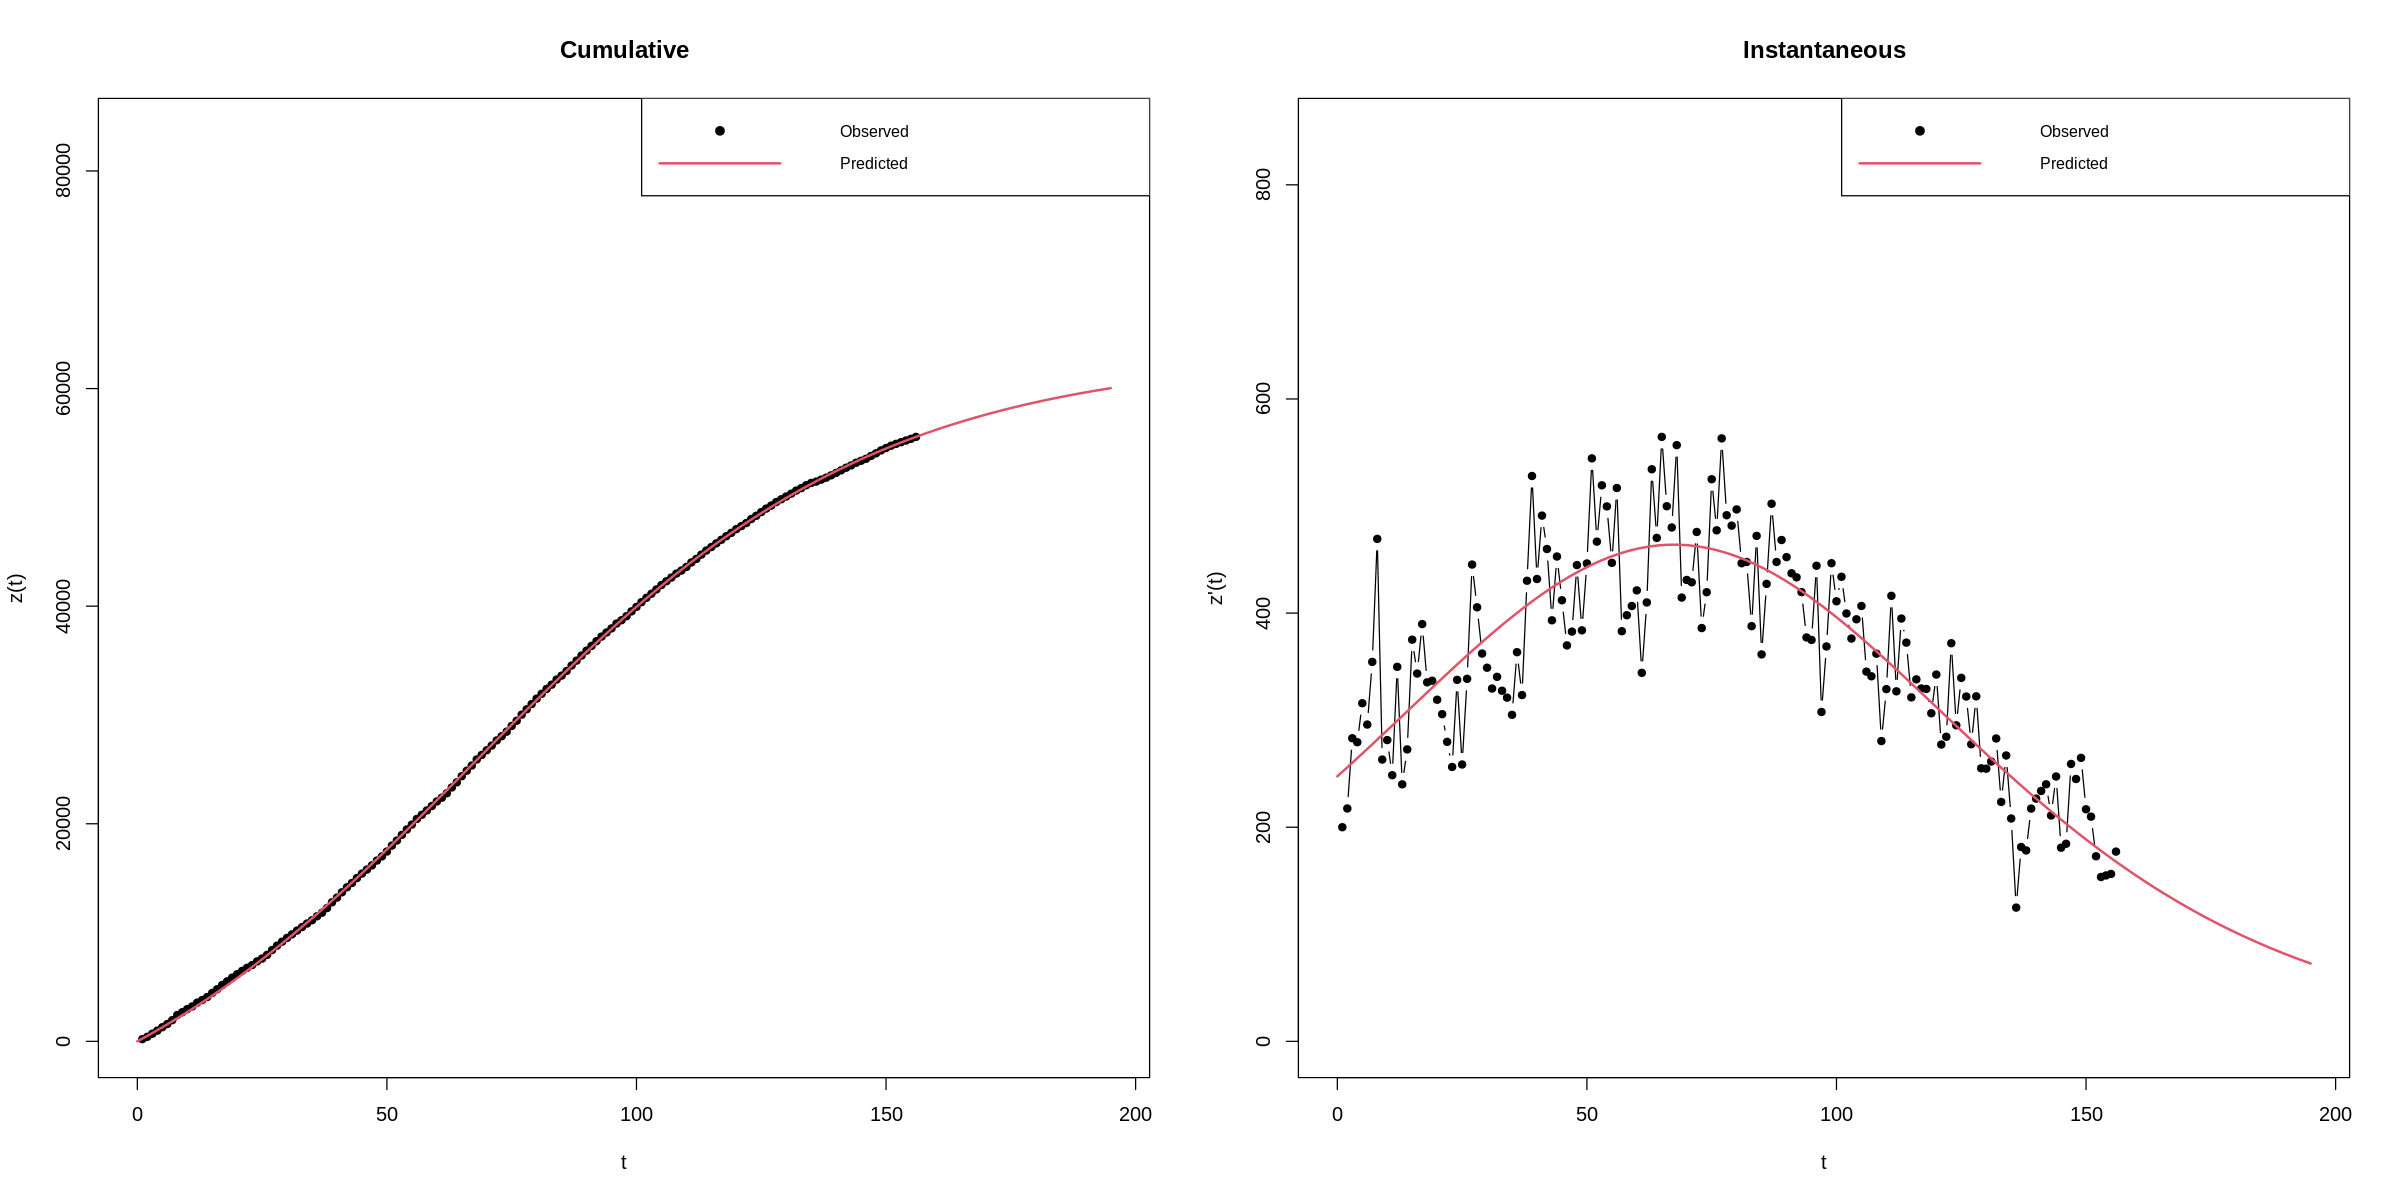

In [24]:
###we estimate a simple Bass Model
bm_de<-BM(de_ba,display = T)
summary(bm_de)

In [25]:
###prediction (out-of-sample)
pred_bm_de<- predict(bm_de, newx=c(1:200))
pred.inst_de<- make.instantaneous(pred_bm_de)

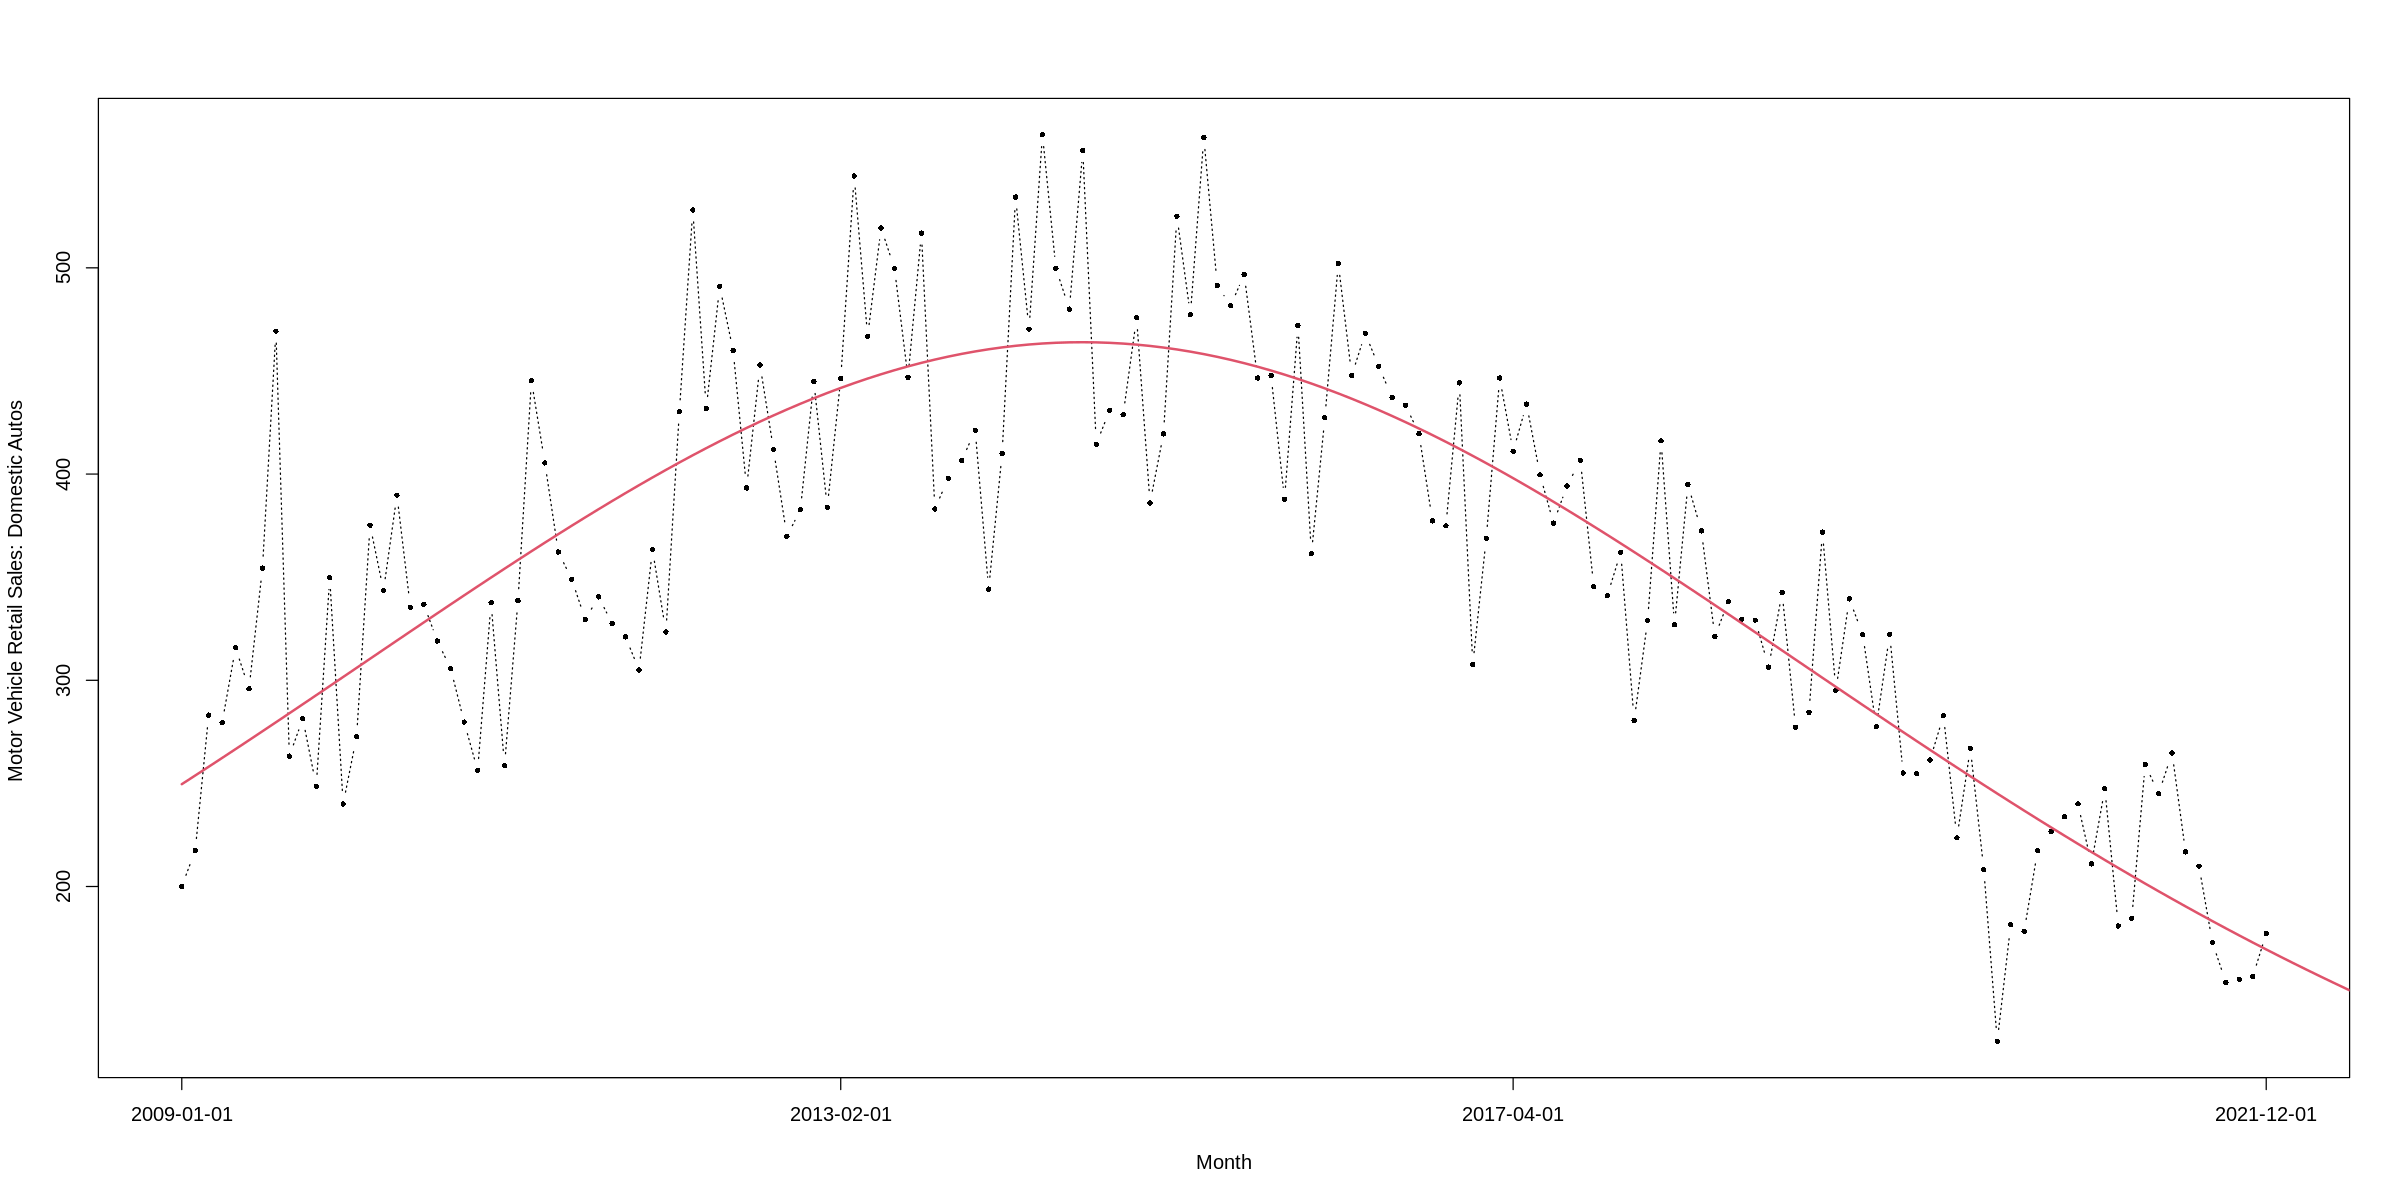

In [26]:
###plot of fitted model
plot(de_ba, type= "b",xlab="Month", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=r_de_f$DATE[c(1,50,100,156)])
lines(pred.inst_de, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = de_ba[1:80], display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-339.637  -78.146   12.165    5.913   98.811  254.849 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 8.729096e+04 6.019668e+03 7.549263e+04 9.908929e+04 1.02e-23 ***
p 3.021775e-03 1.858348e-04 2.657545e-03 3.386004e-03 1.29e-26 ***
q 1.587173e-02 7.220505e-04 1.445653e-02 1.728692e-02 6.42e-35 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  127.2797  on  77  degrees of freedom
 Multiple R-squared:   0.999944  Residual sum of squares:  1247410


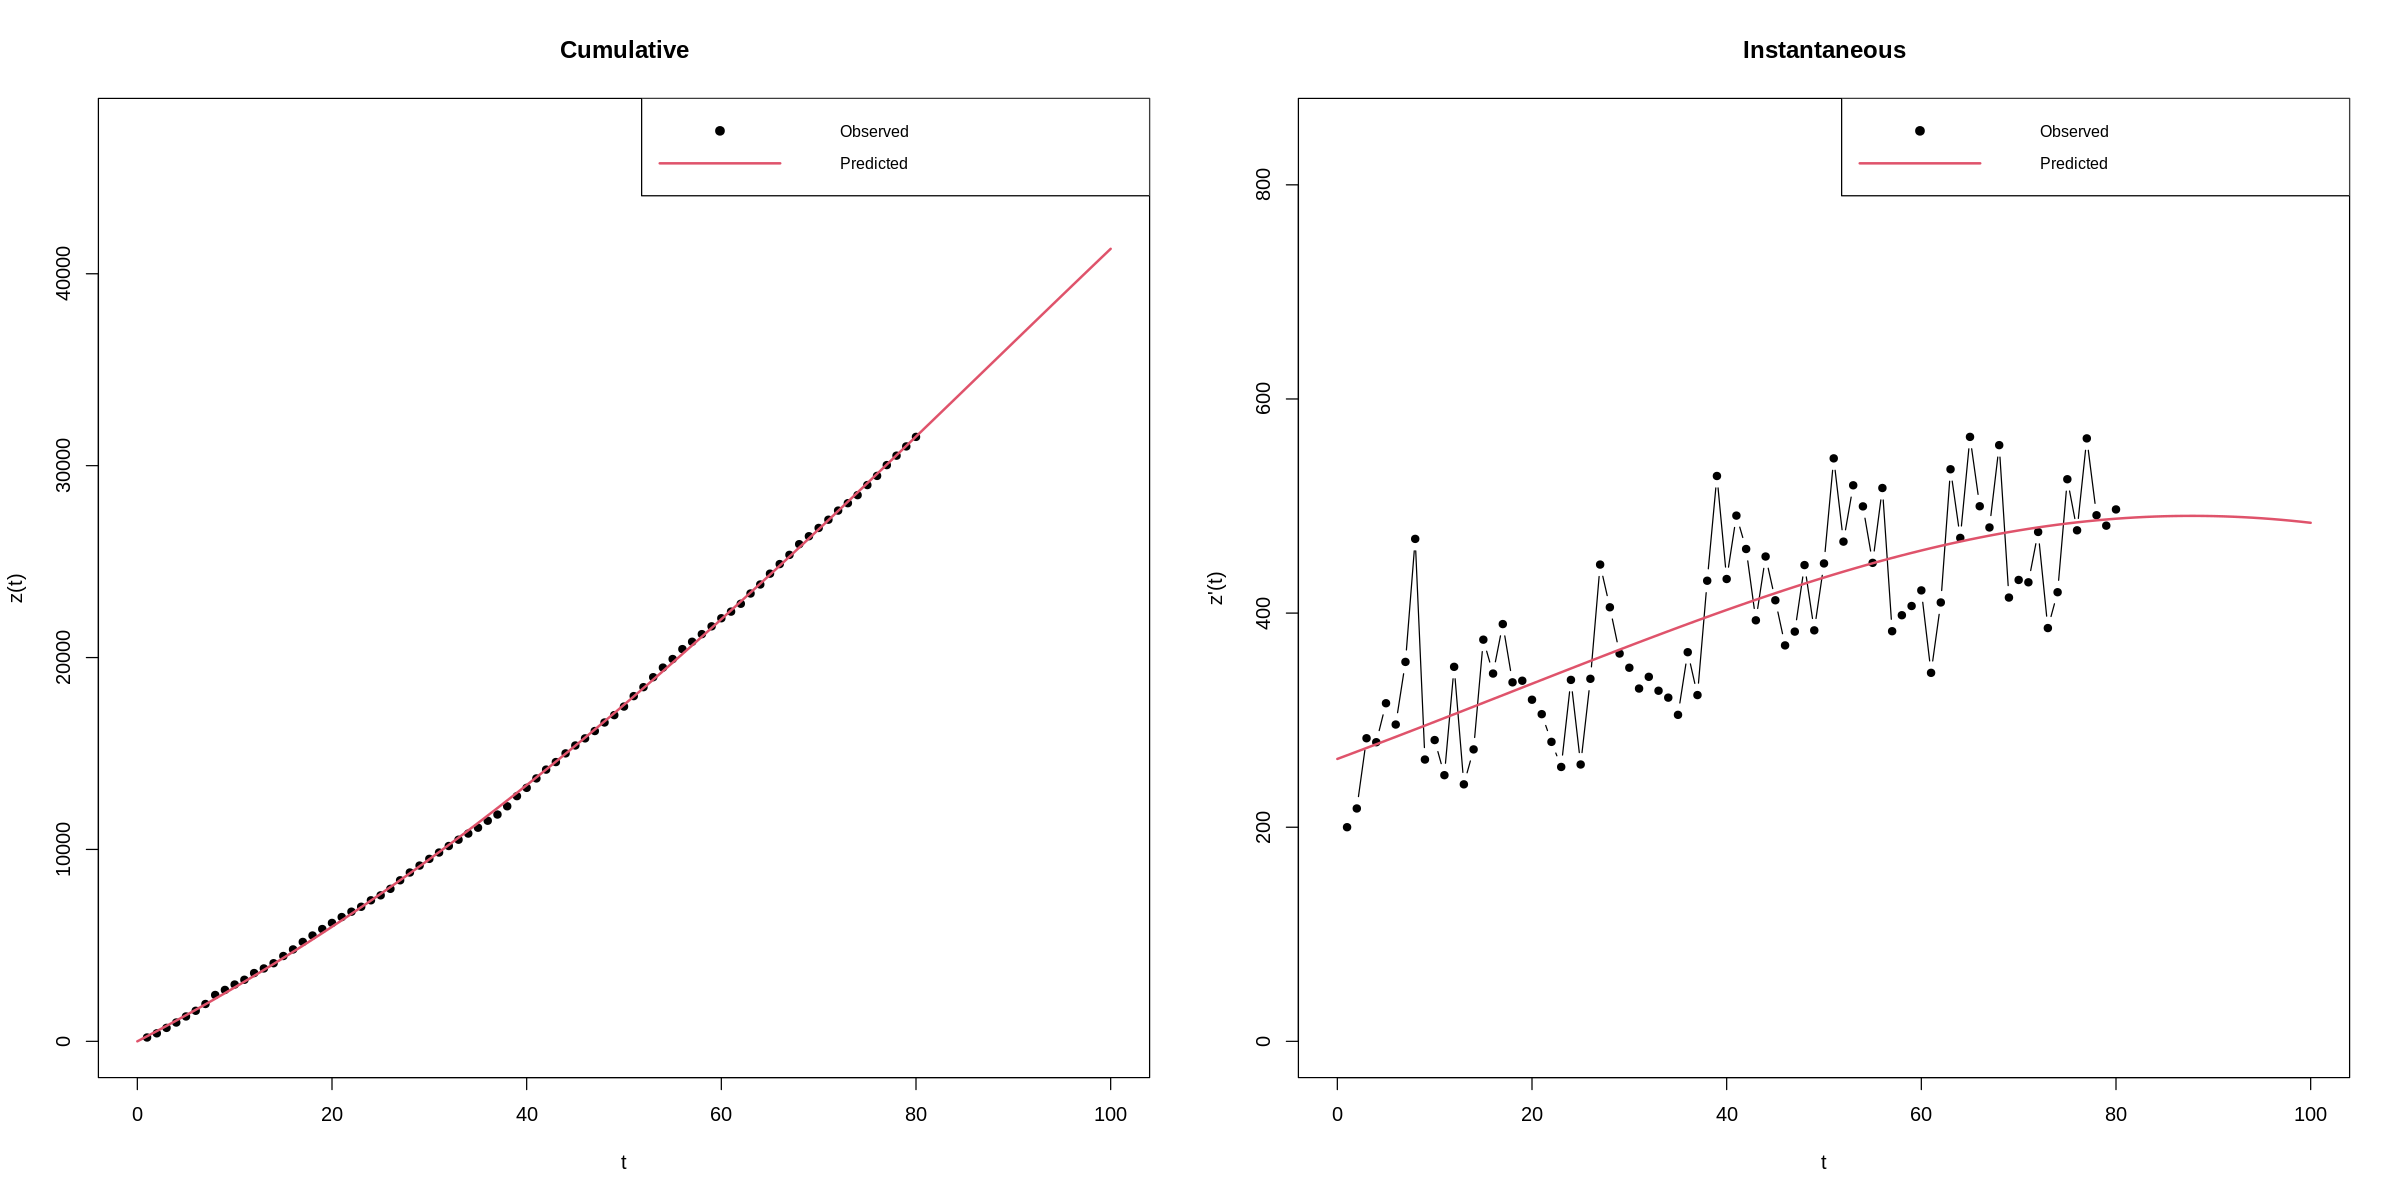

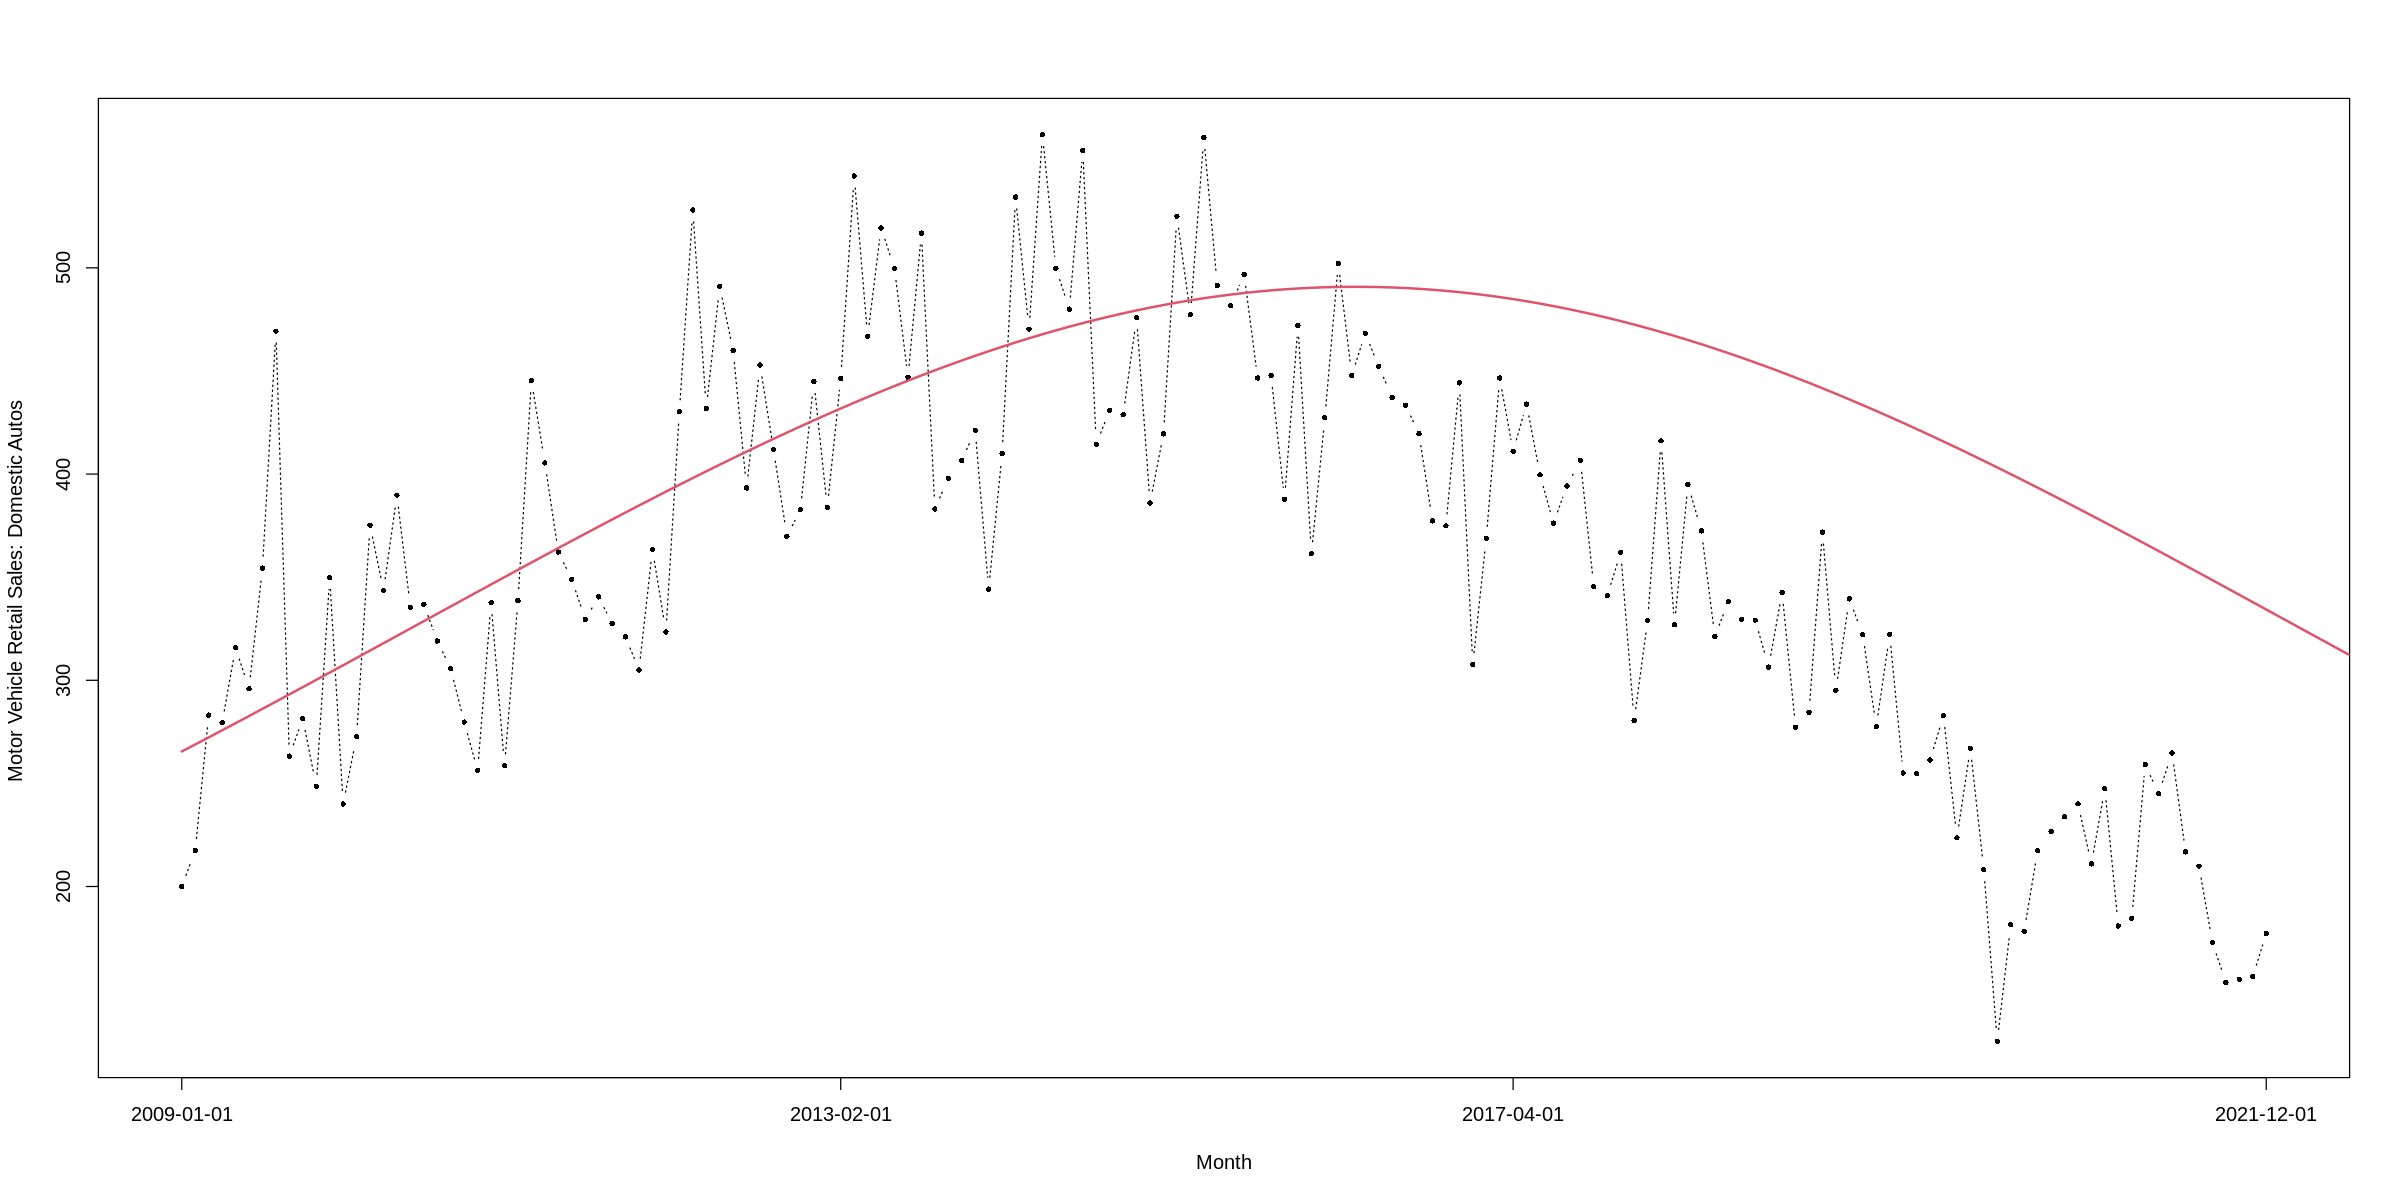

In [27]:
###we estimate the model with 50% of the data

bm_de50<-BM(de_ba[1:80],display = T)
summary(bm_de50)

pred_bm_de50<- predict(bm_de50, newx=c(1:200))
pred.inst_de50<- make.instantaneous(pred_bm_de50)

plot(de_ba, type= "b",xlab="Month", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=r_de_f$DATE[c(1,50,100,156)])
lines(pred.inst_de50, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = de_ba[1:40], display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-154.604  -82.412   -9.817  -12.194   56.449  162.225 

Coefficients:
       Estimate    Std.Error         Lower        Upper p-value    
m 7.927957e+04 8.117966e+04 -7.982965e+04 2.383888e+05   0.335    
p 3.514798e-03 3.537439e-03 -3.418455e-03 1.044805e-02   0.327    
q 1.249811e-02 6.253071e-03  2.423139e-04 2.475390e-02   0.053   .
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  90.61891  on  37  degrees of freedom
 Multiple R-squared:   0.999851  Residual sum of squares:  303836.1


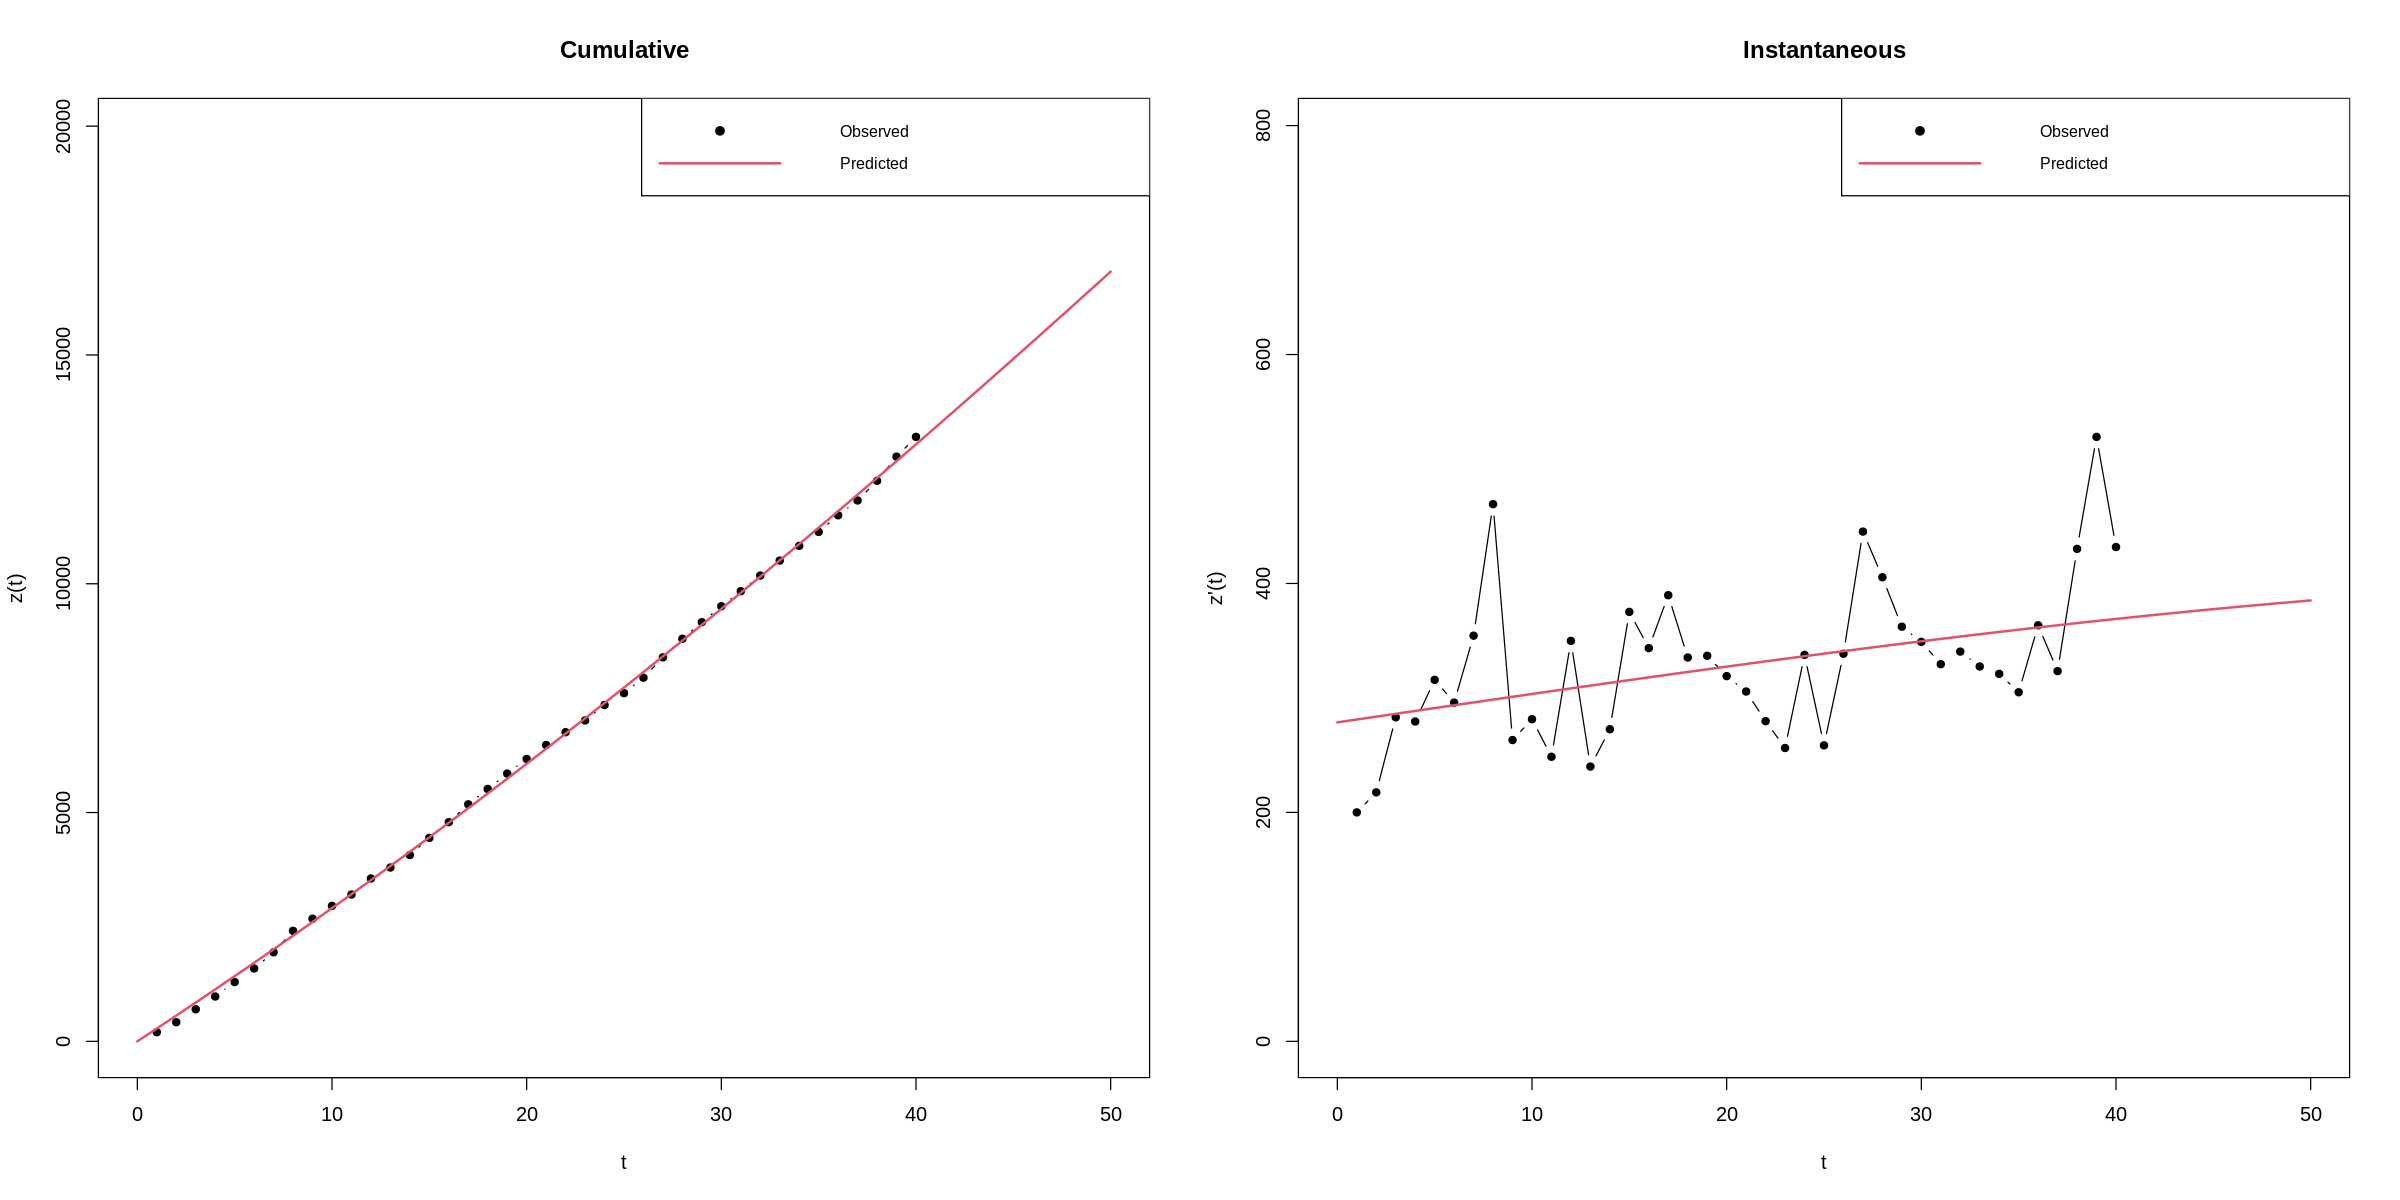

In [28]:
###we estimate the model with 25% of the data
bm_de75<-BM(de_ba[1:40],display = T)
summary(bm_de75)

pred_bm_de75<- predict(bm_de75, newx=c(1:200))
pred.inst_de75<- make.instantaneous(pred_bm_de75)

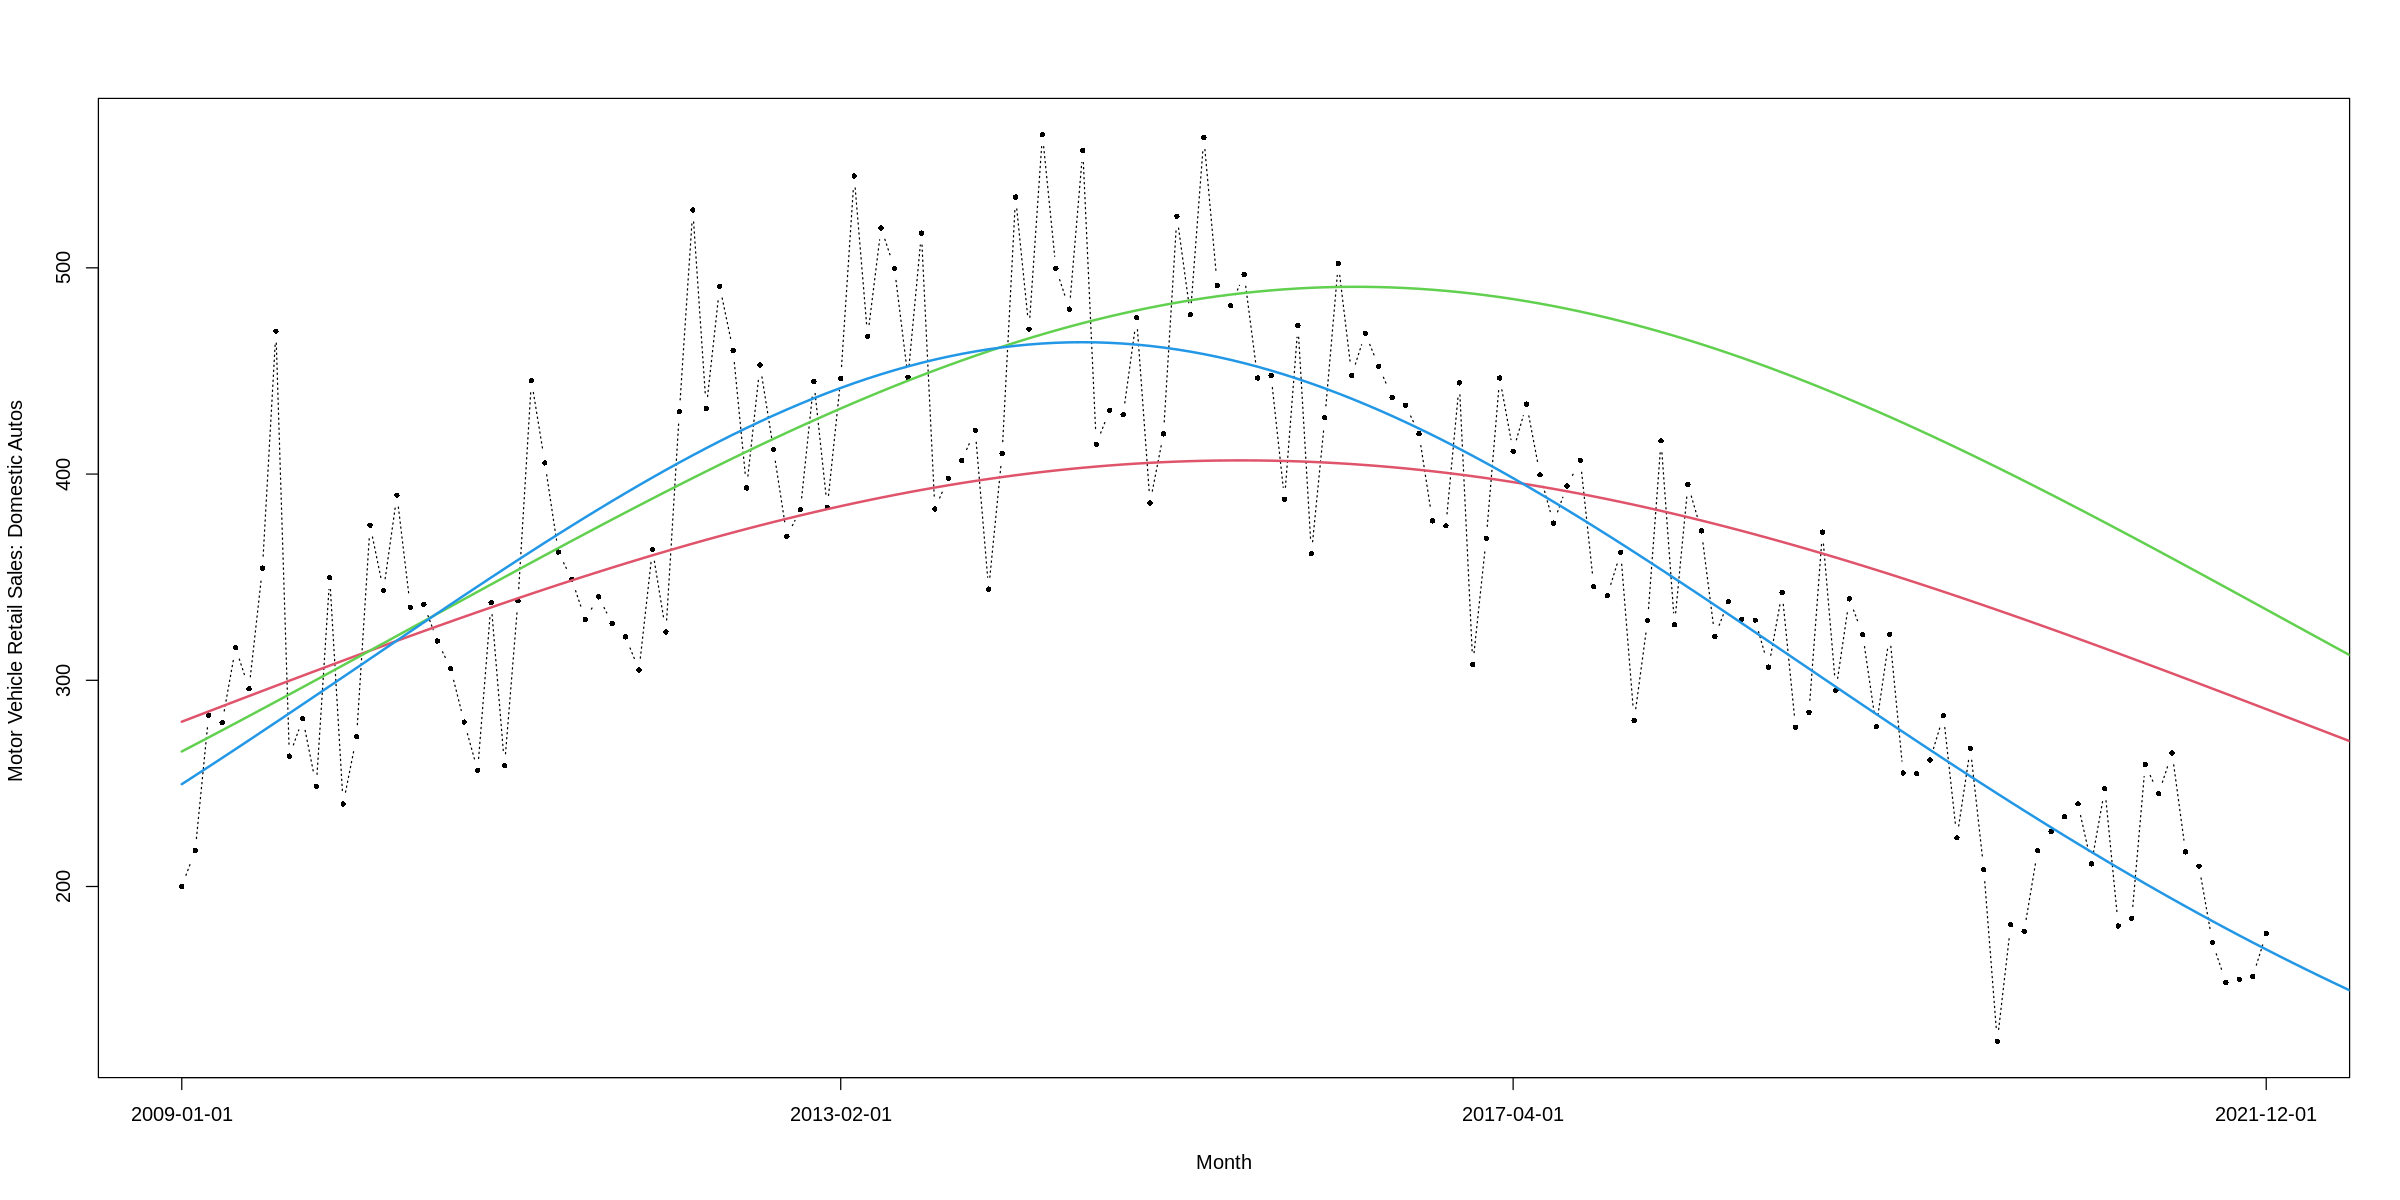

In [29]:
###Comparison between models (instantaneous)
###instantaneous
plot(de_ba, type= "b",xlab="Month", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=r_de_f$DATE[c(1,50,100,156)])
lines(pred.inst_de75, lwd=2, col=2)
lines(pred.inst_de50, lwd=2, col=3)
lines(pred.inst_de, lwd=2, col=4)

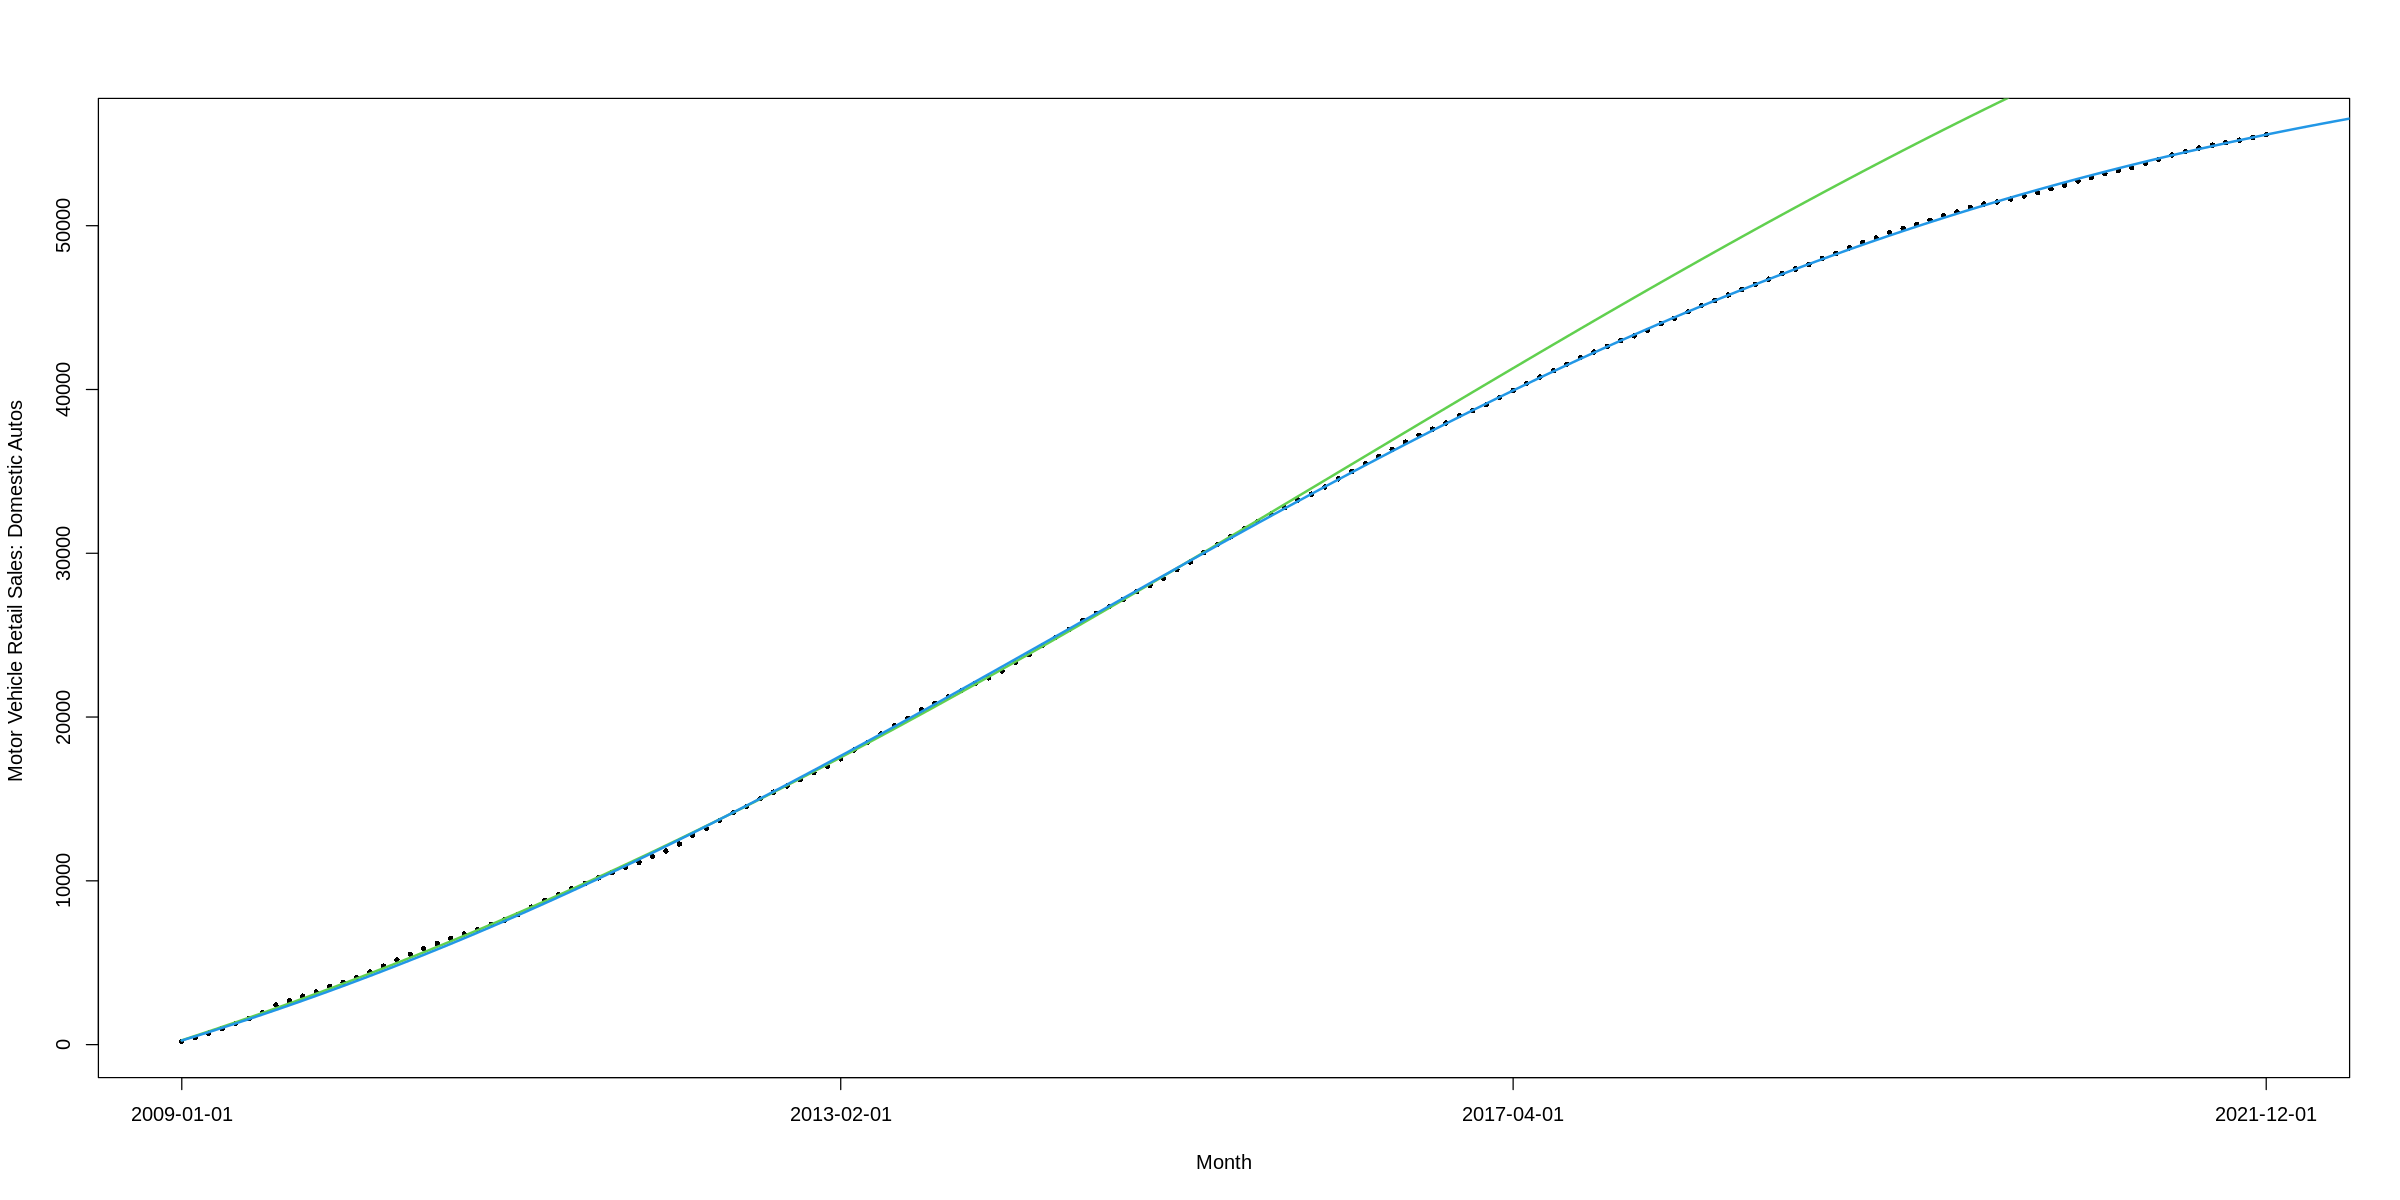

In [30]:
###Comparison between models (cumulative)
plot(cumsum(de_ba), type= "b",xlab="Month", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=r_de_f$DATE[c(1,50,100,156)])
lines(pred_bm_de50, lwd=2, col=3)
lines(pred_bm_de, lwd=2, col=4)

#BM(total)

In [31]:
NROW(s_to_f)

[1] 156

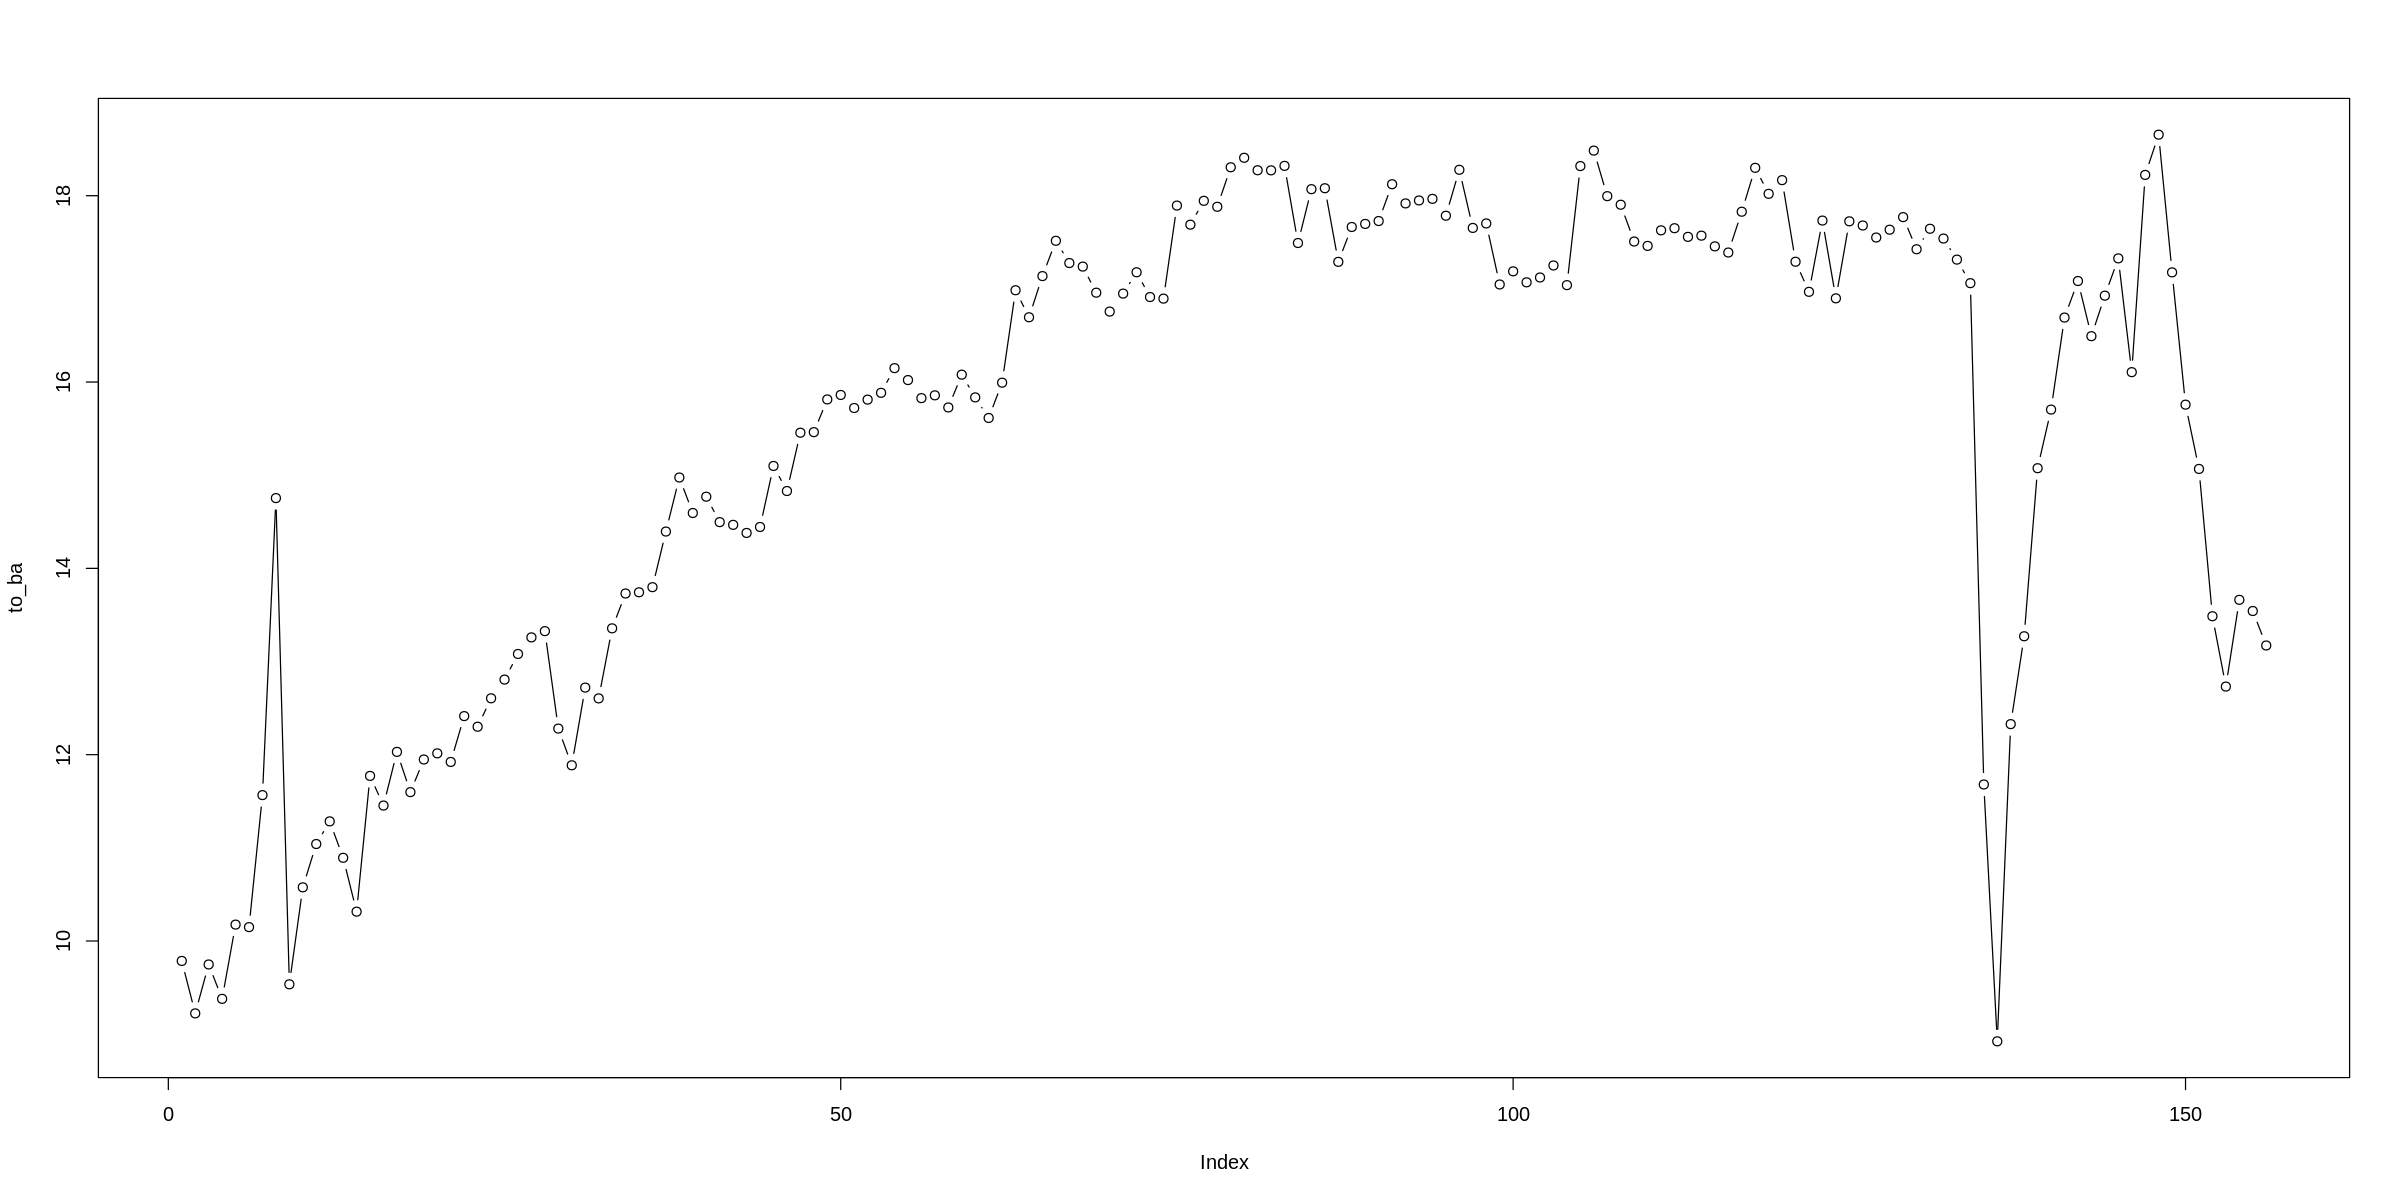

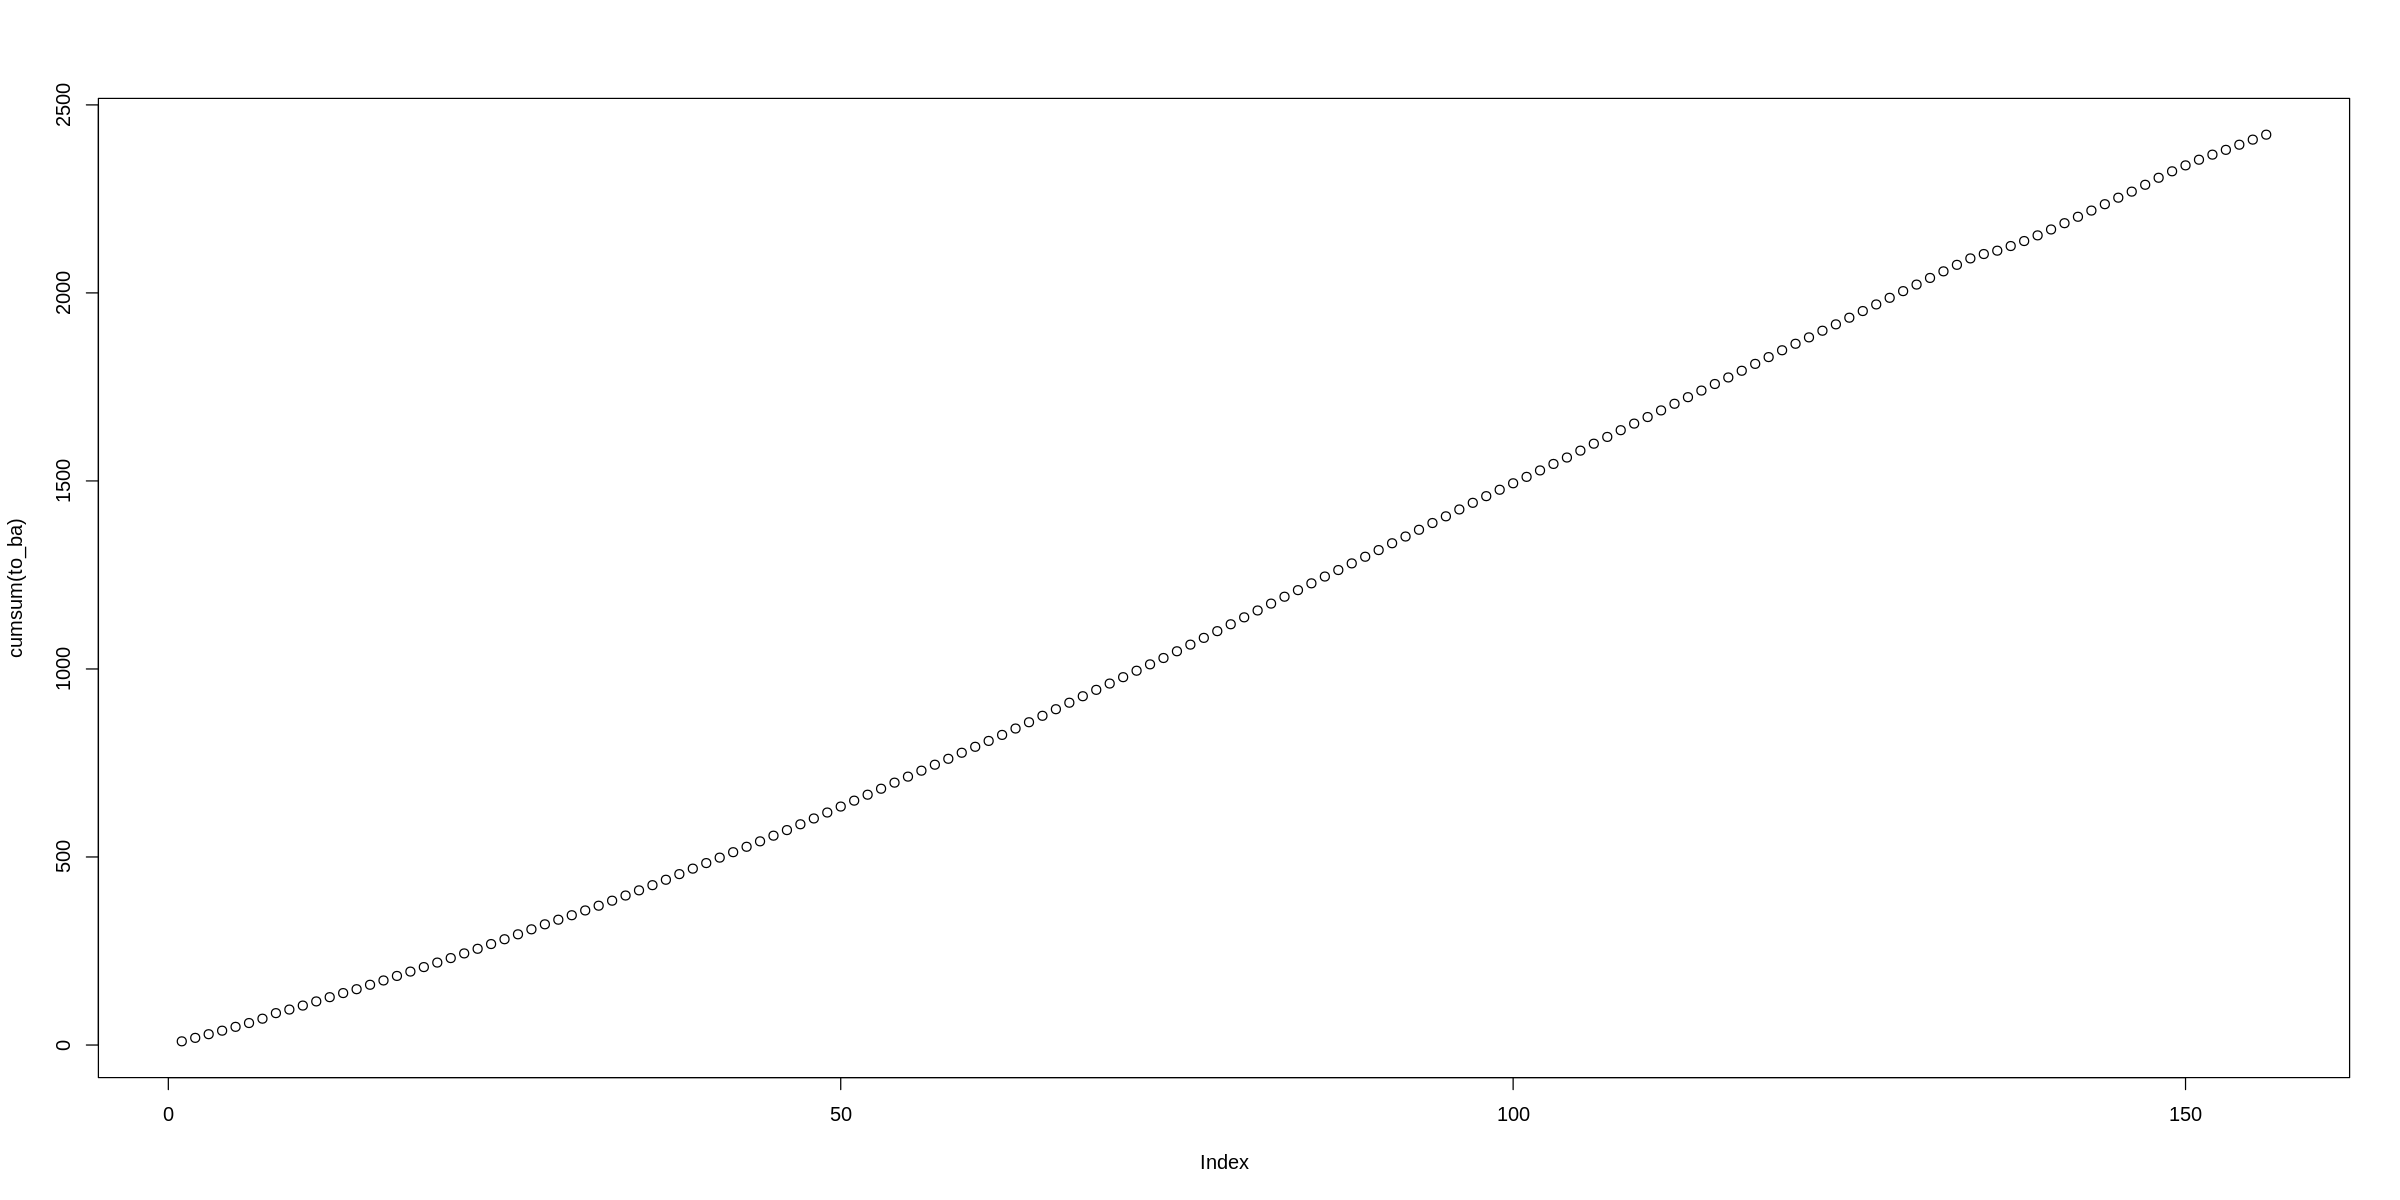

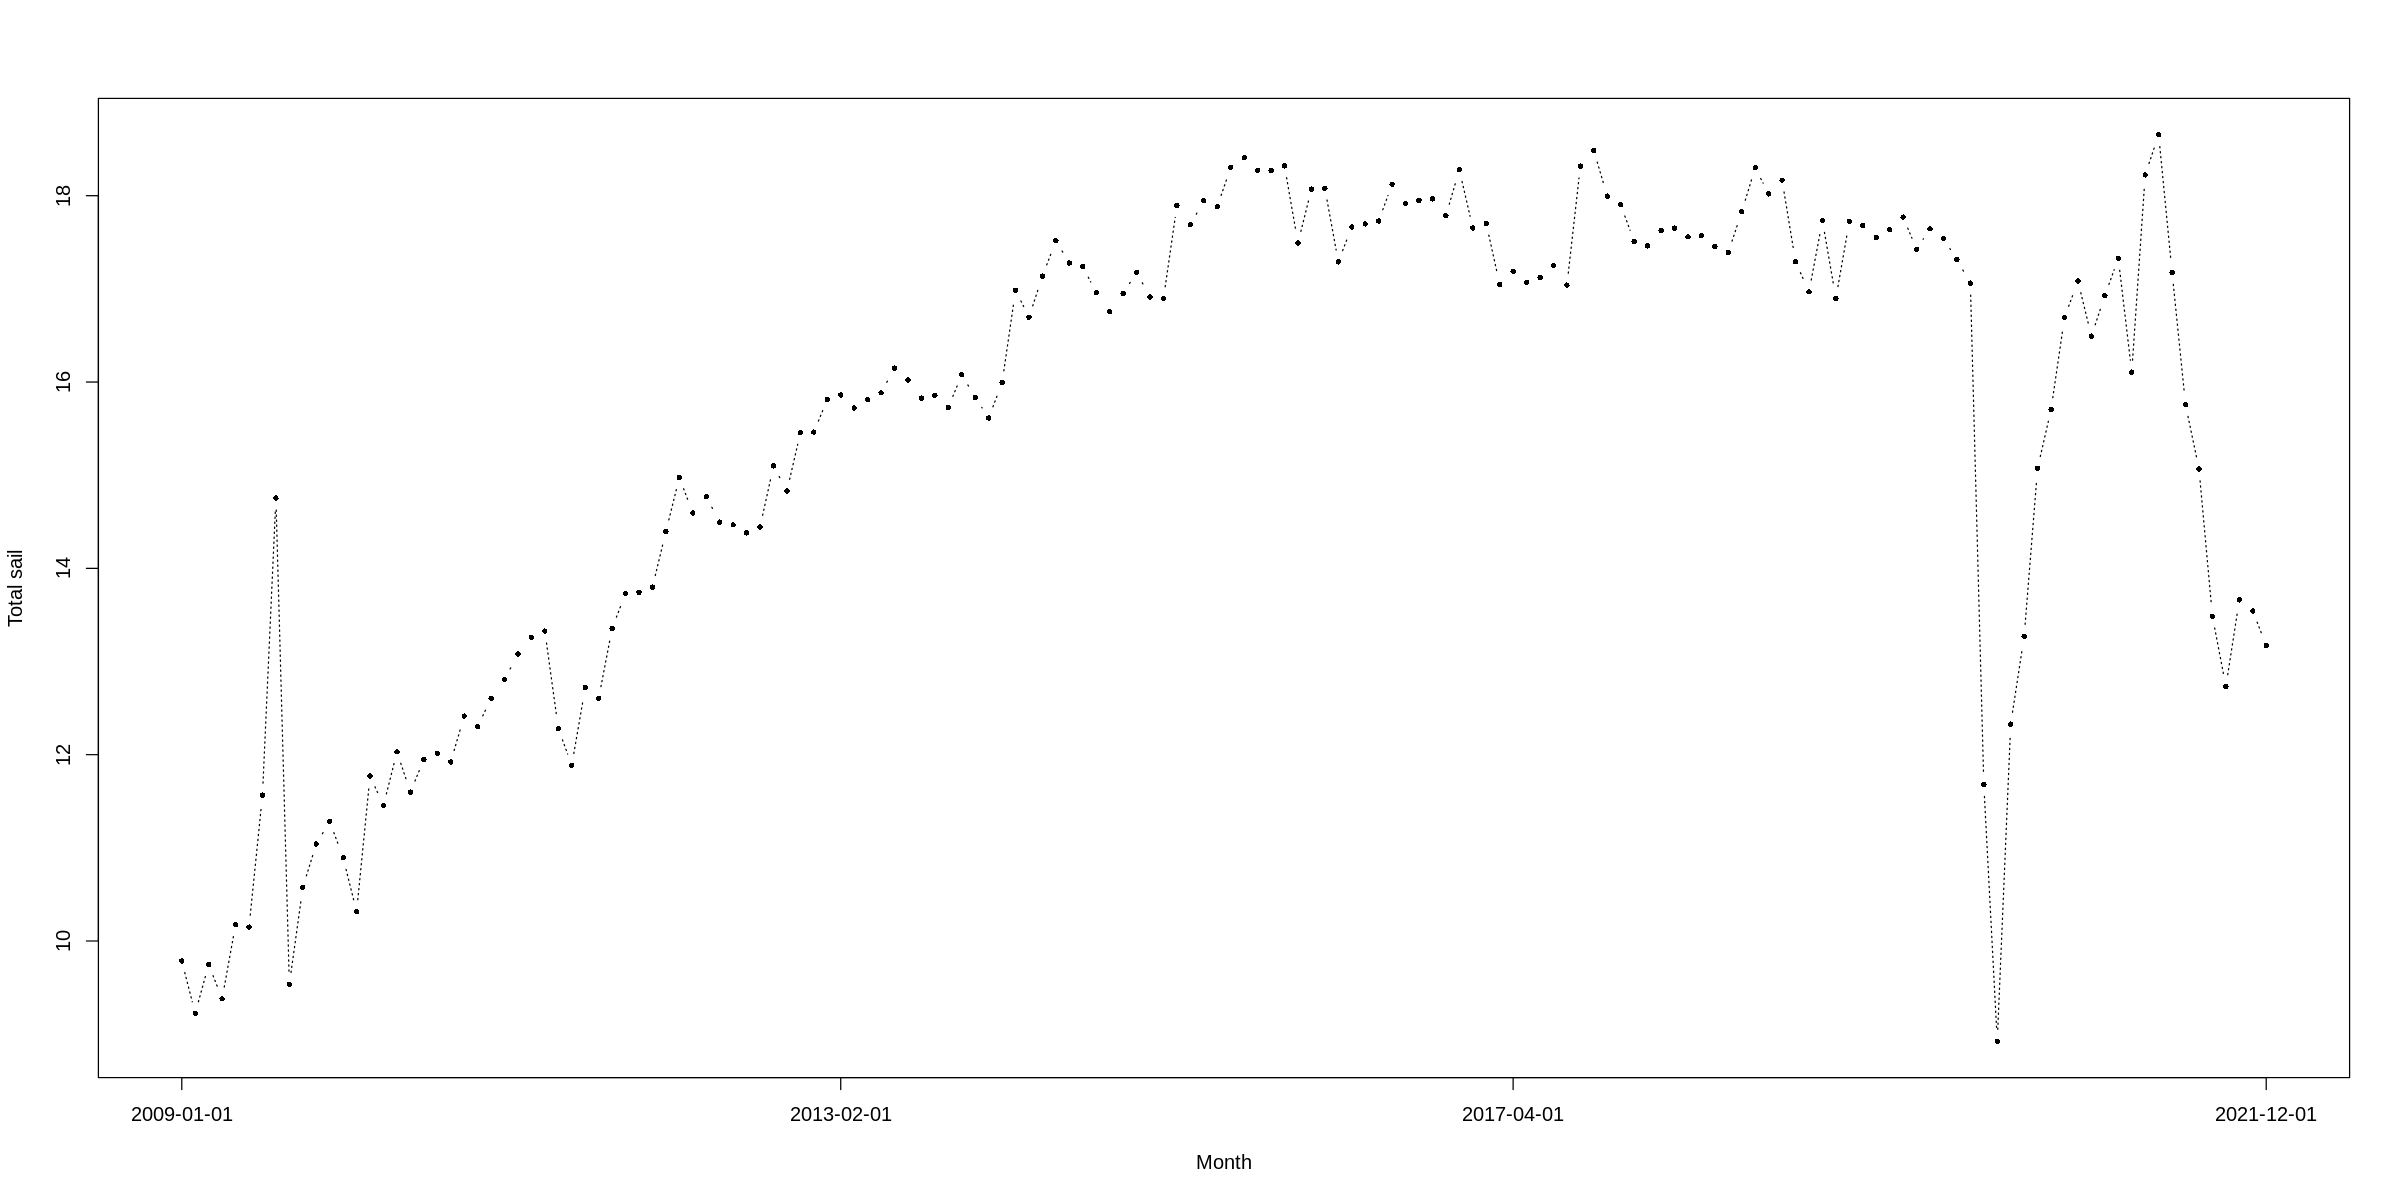

In [32]:
##create the variable cassette
to_ba<- s_to_f$TOTALSA[1:156]

###some simple plots
plot(to_ba, type="b")
plot(cumsum(to_ba), type="b")

###a better plot of the yearly time series
plot(to_ba, type= "b",xlab="Month", ylab="Total sail",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=s_to_f$DATE[c(1,50,100,156)])

Call: ( Standard Bass Model )

  BM(series = to_ba, display = T)

Residuals:
      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-10.97802  -1.65157  -0.03197  -0.07658   1.39959   8.20903 

Coefficients:
       Estimate    Std.Error        Lower        Upper   p-value    
m 3.549980e+03 1.112515e+01 3.528175e+03 3.571785e+03 6.14e-218 ***
p 2.761177e-03 4.999839e-06 2.751377e-03 2.770976e-03 2.37e-254 ***
q 1.422622e-02 6.699264e-05 1.409492e-02 1.435753e-02 6.10e-191 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  3.214532  on  153  degrees of freedom
 Multiple R-squared:   0.999994  Residual sum of squares:  1580.982


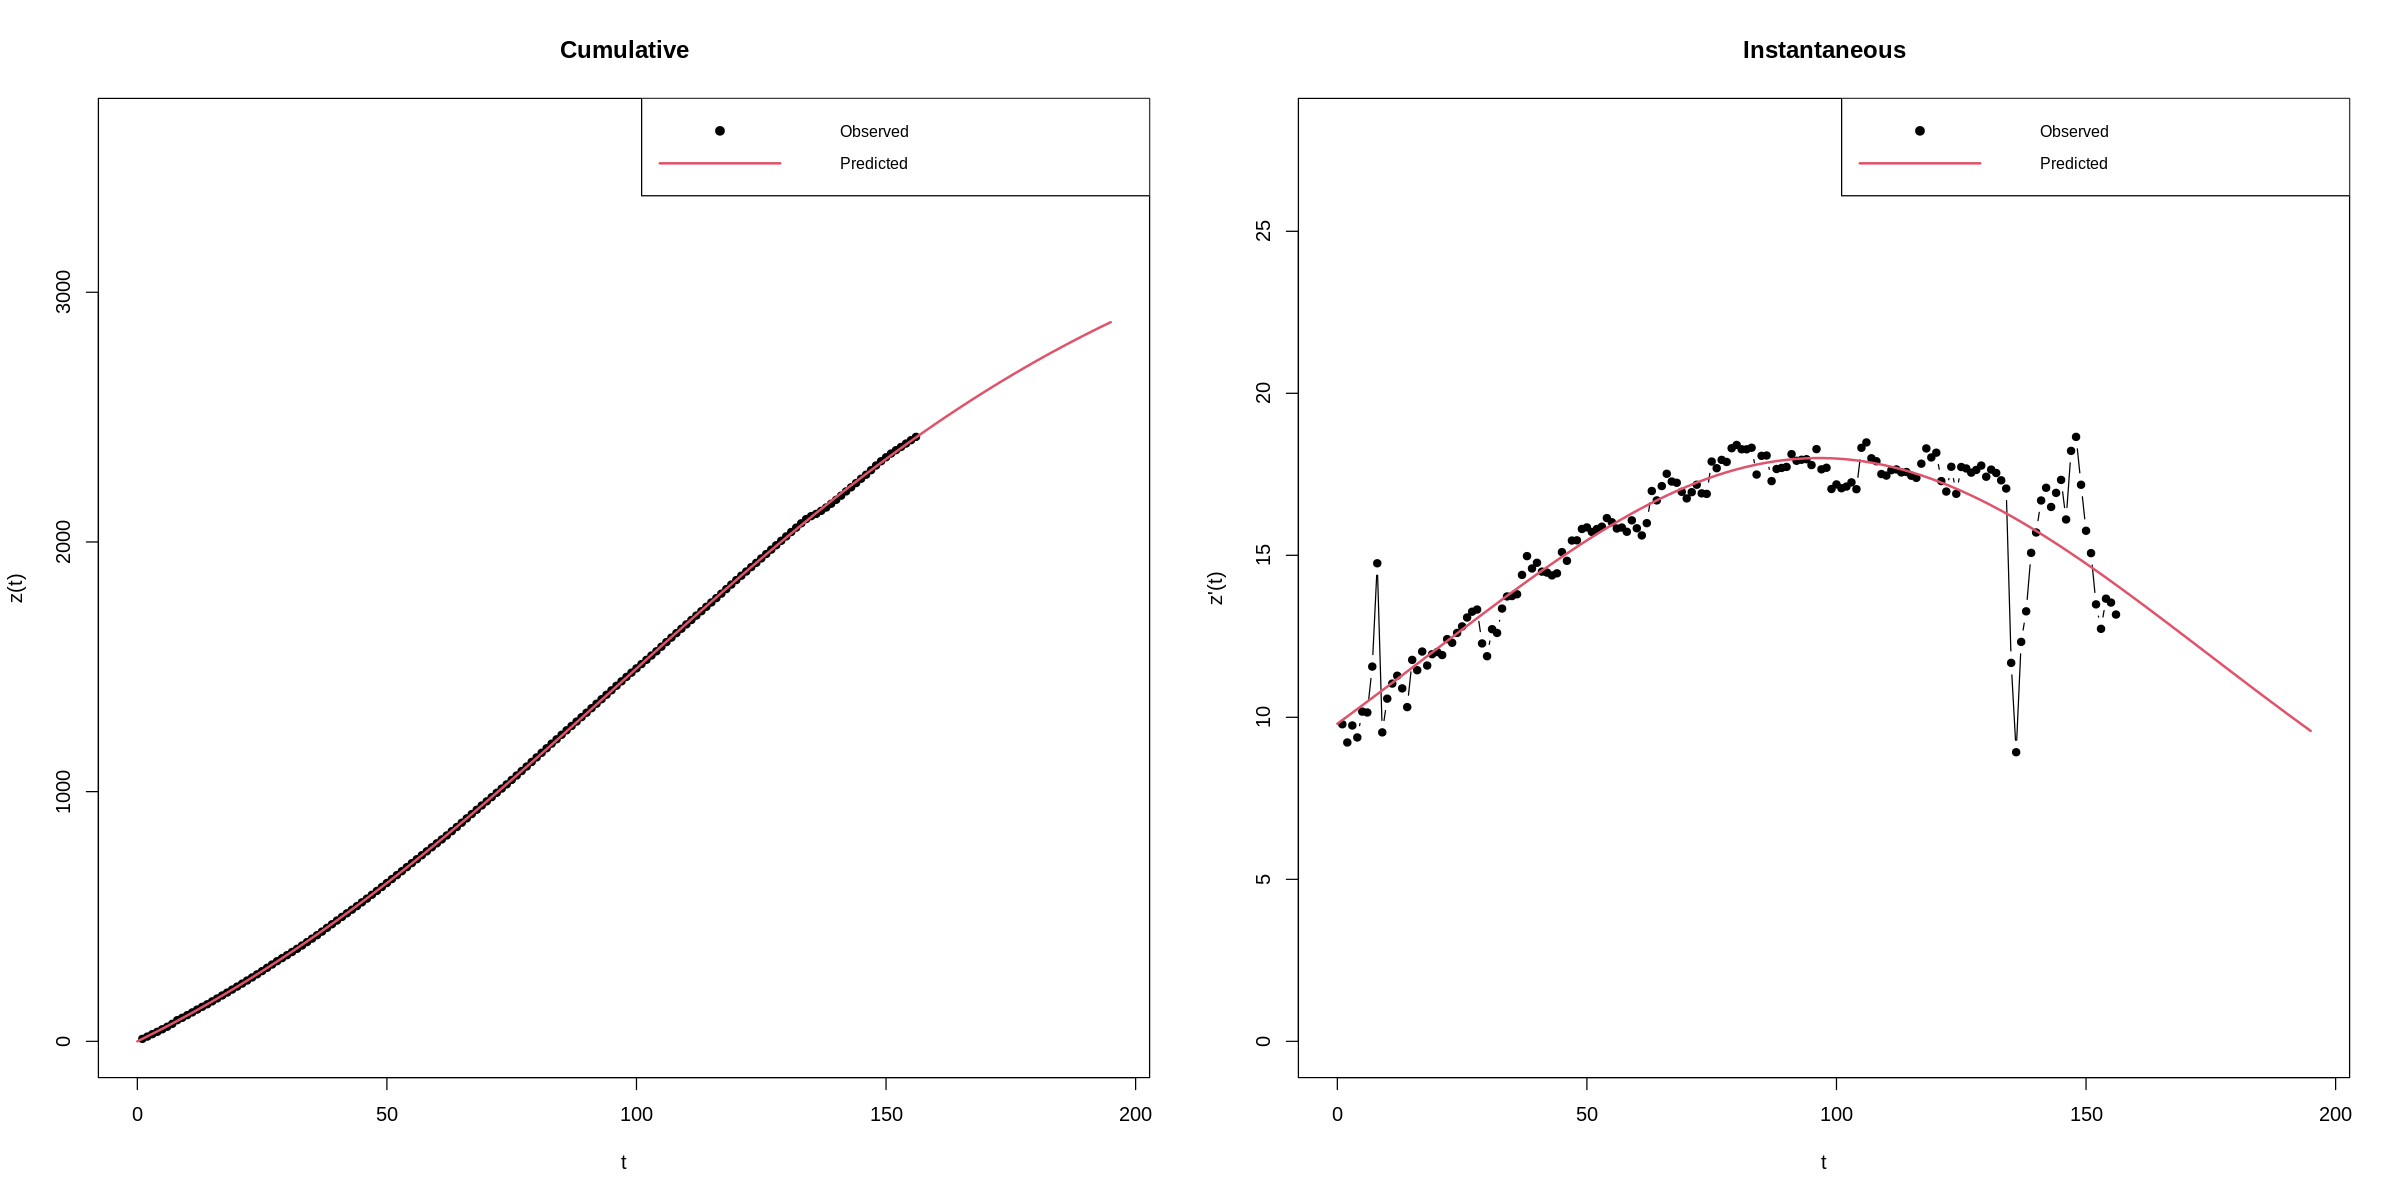

In [33]:
###we estimate a simple Bass Model
bm_to<-BM(to_ba,display = T)
summary(bm_to)

In [34]:
###prediction (out-of-sample)
pred_bm_to<- predict(bm_to, newx=c(1:300))
pred.inst_to<- make.instantaneous(pred_bm_to)

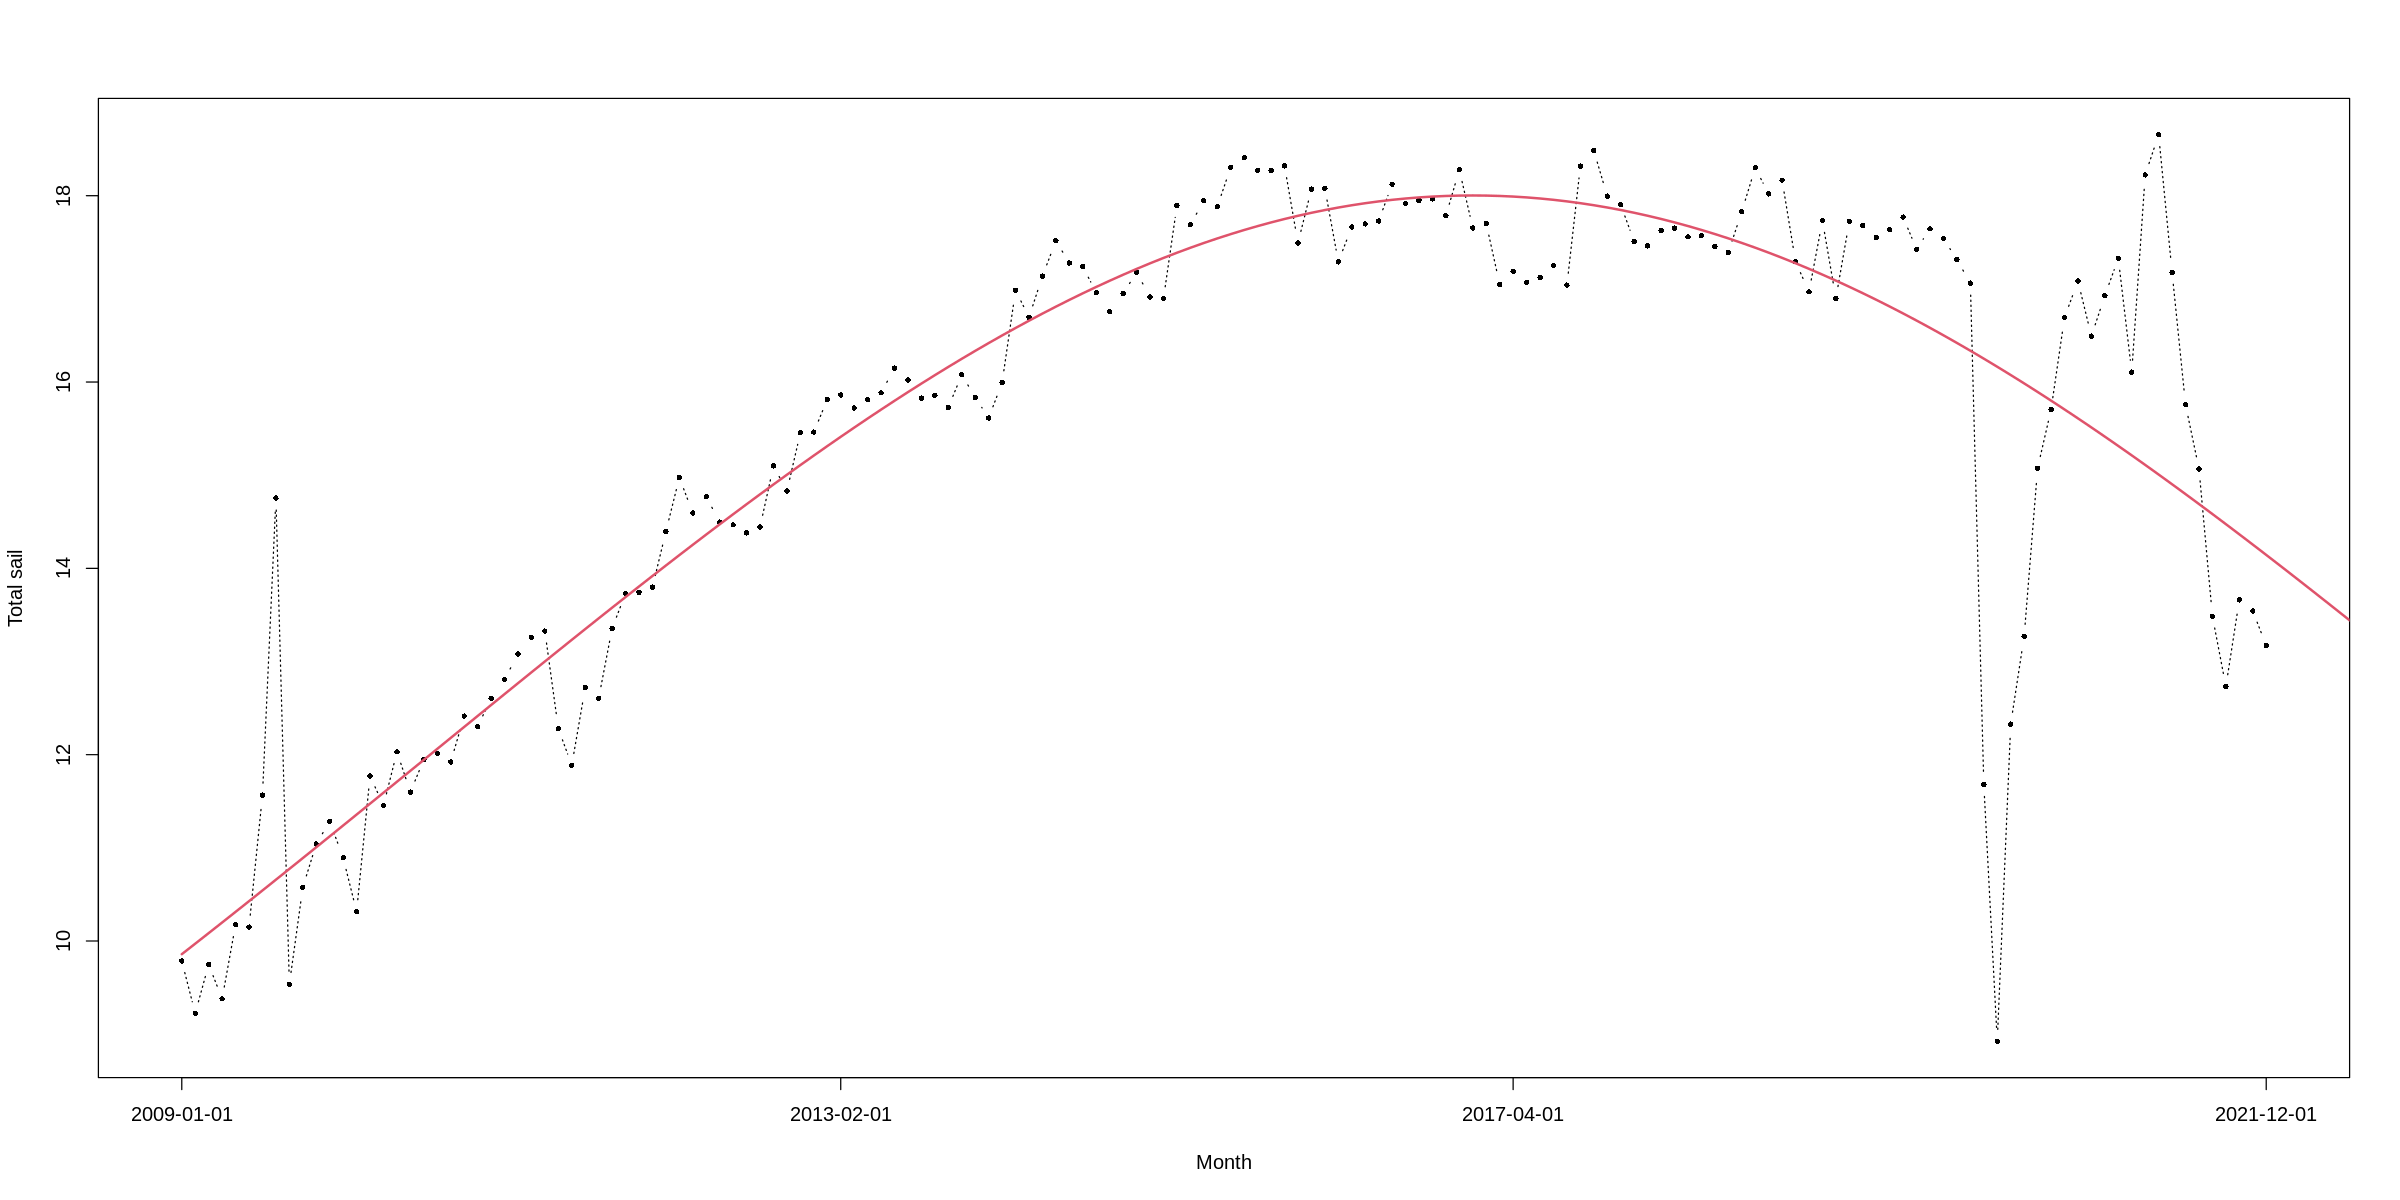

In [35]:
###plot of fitted model
plot(to_ba, type= "b",xlab="Month", ylab="Total sail",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=s_to_f$DATE[c(1,50,100,156)])
lines(pred.inst_to, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = to_ba[1:80], display = T)

Residuals:
      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.336644 -0.802667  0.163290 -0.005647  0.731923  2.809679 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 3.686804e+03 8.816726e+01 3.513999e+03 3.859608e+03 1.08e-54 ***
p 2.657104e-03 5.862760e-05 2.542196e-03 2.772012e-03 2.78e-57 ***
q 1.401166e-02 1.919988e-04 1.363535e-02 1.438797e-02 7.66e-73 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  1.131669  on  77  degrees of freedom
 Multiple R-squared:   0.999997  Residual sum of squares:  98.61202


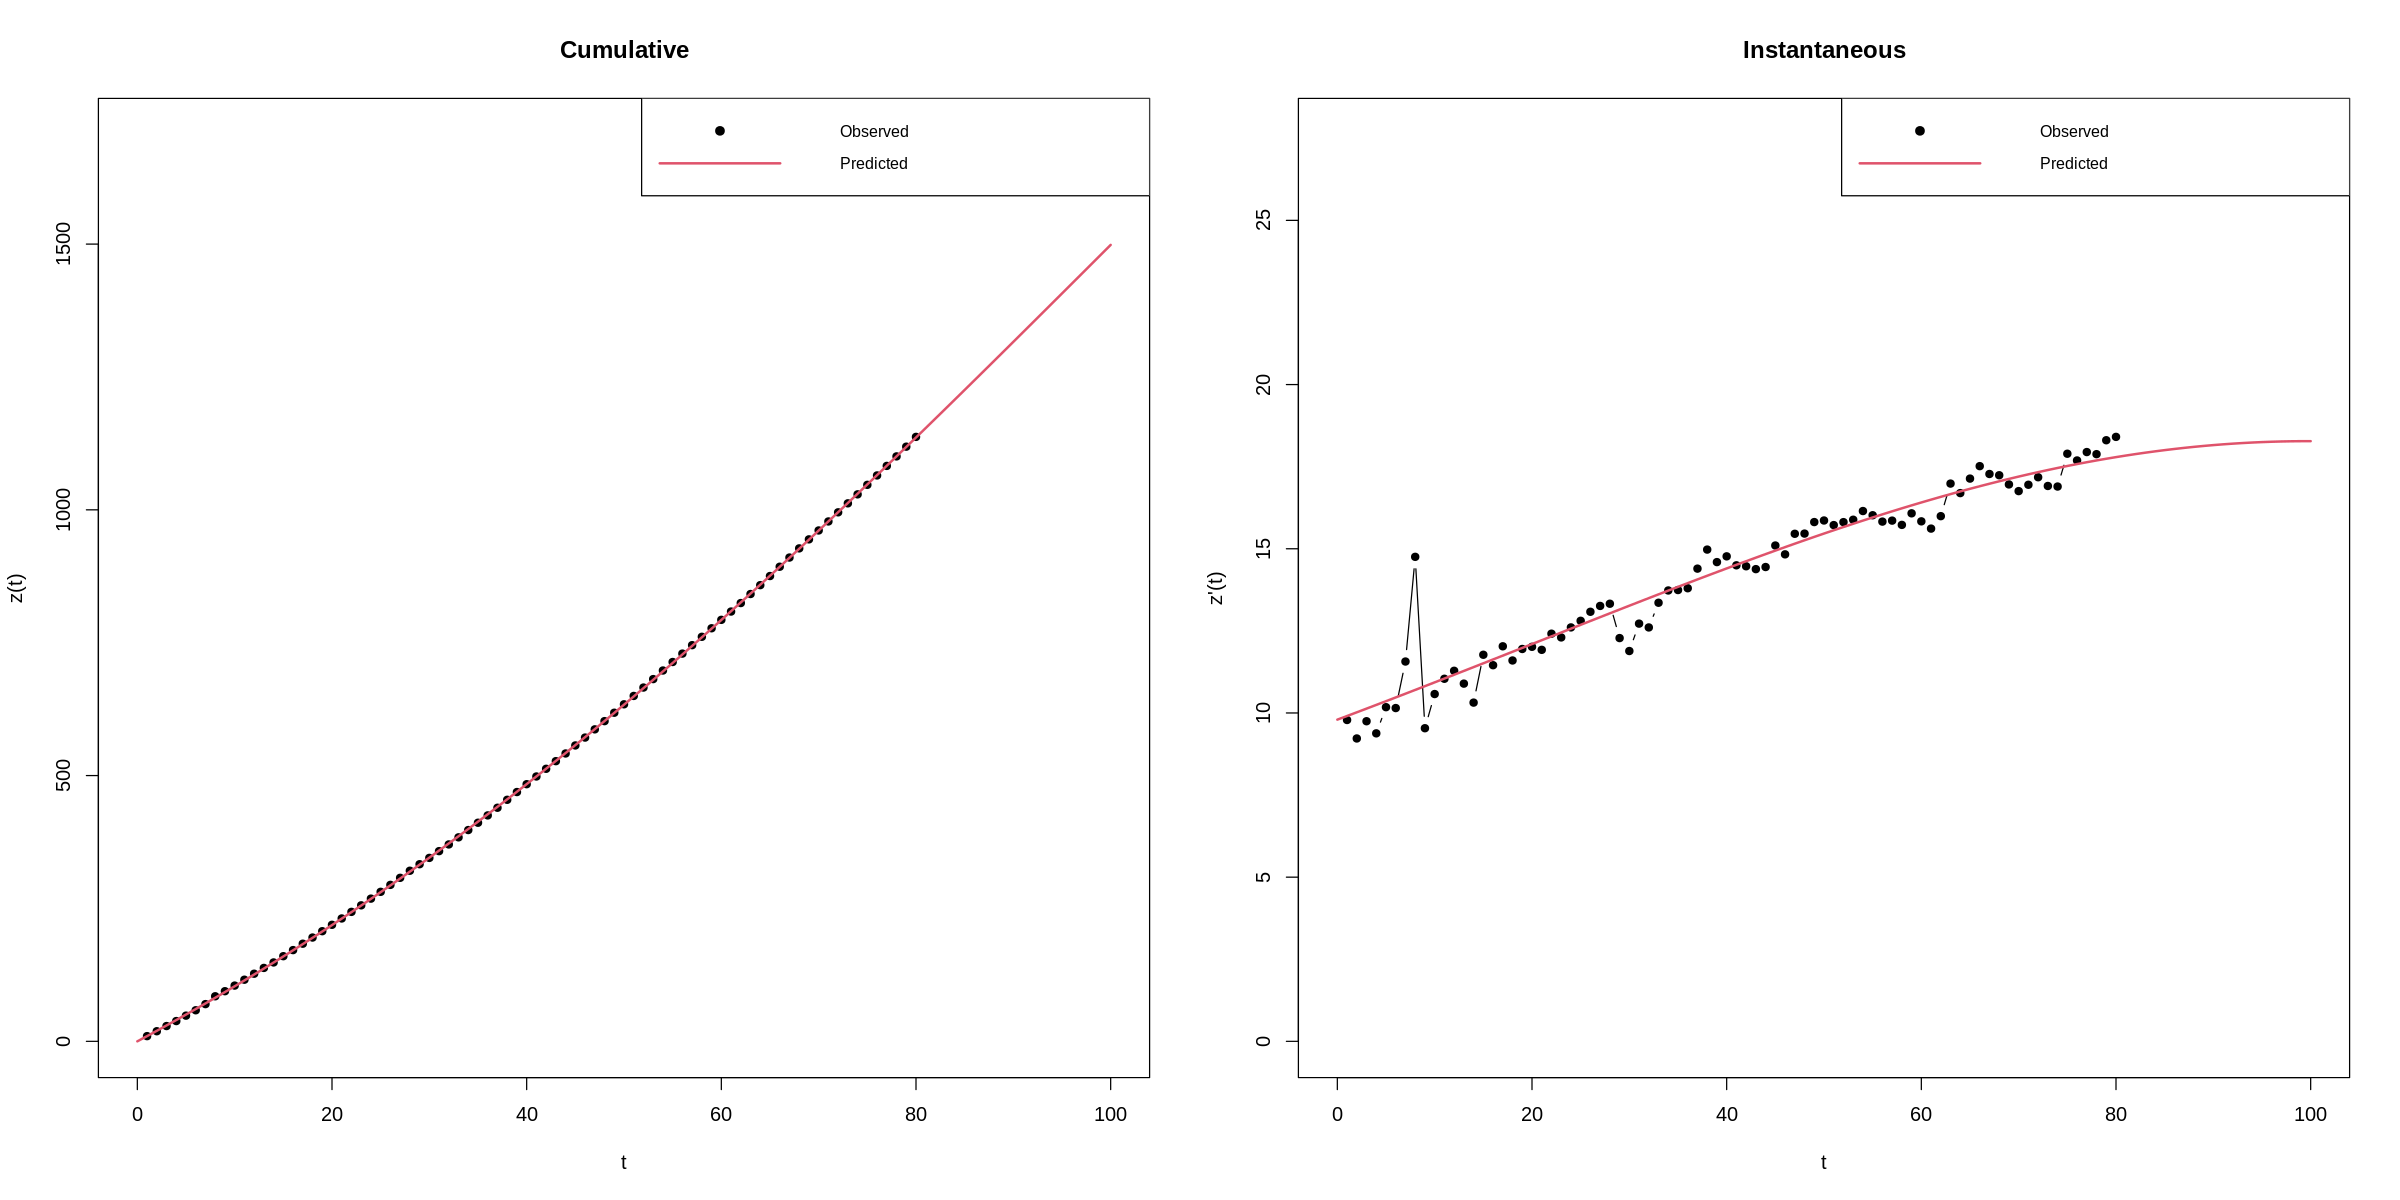

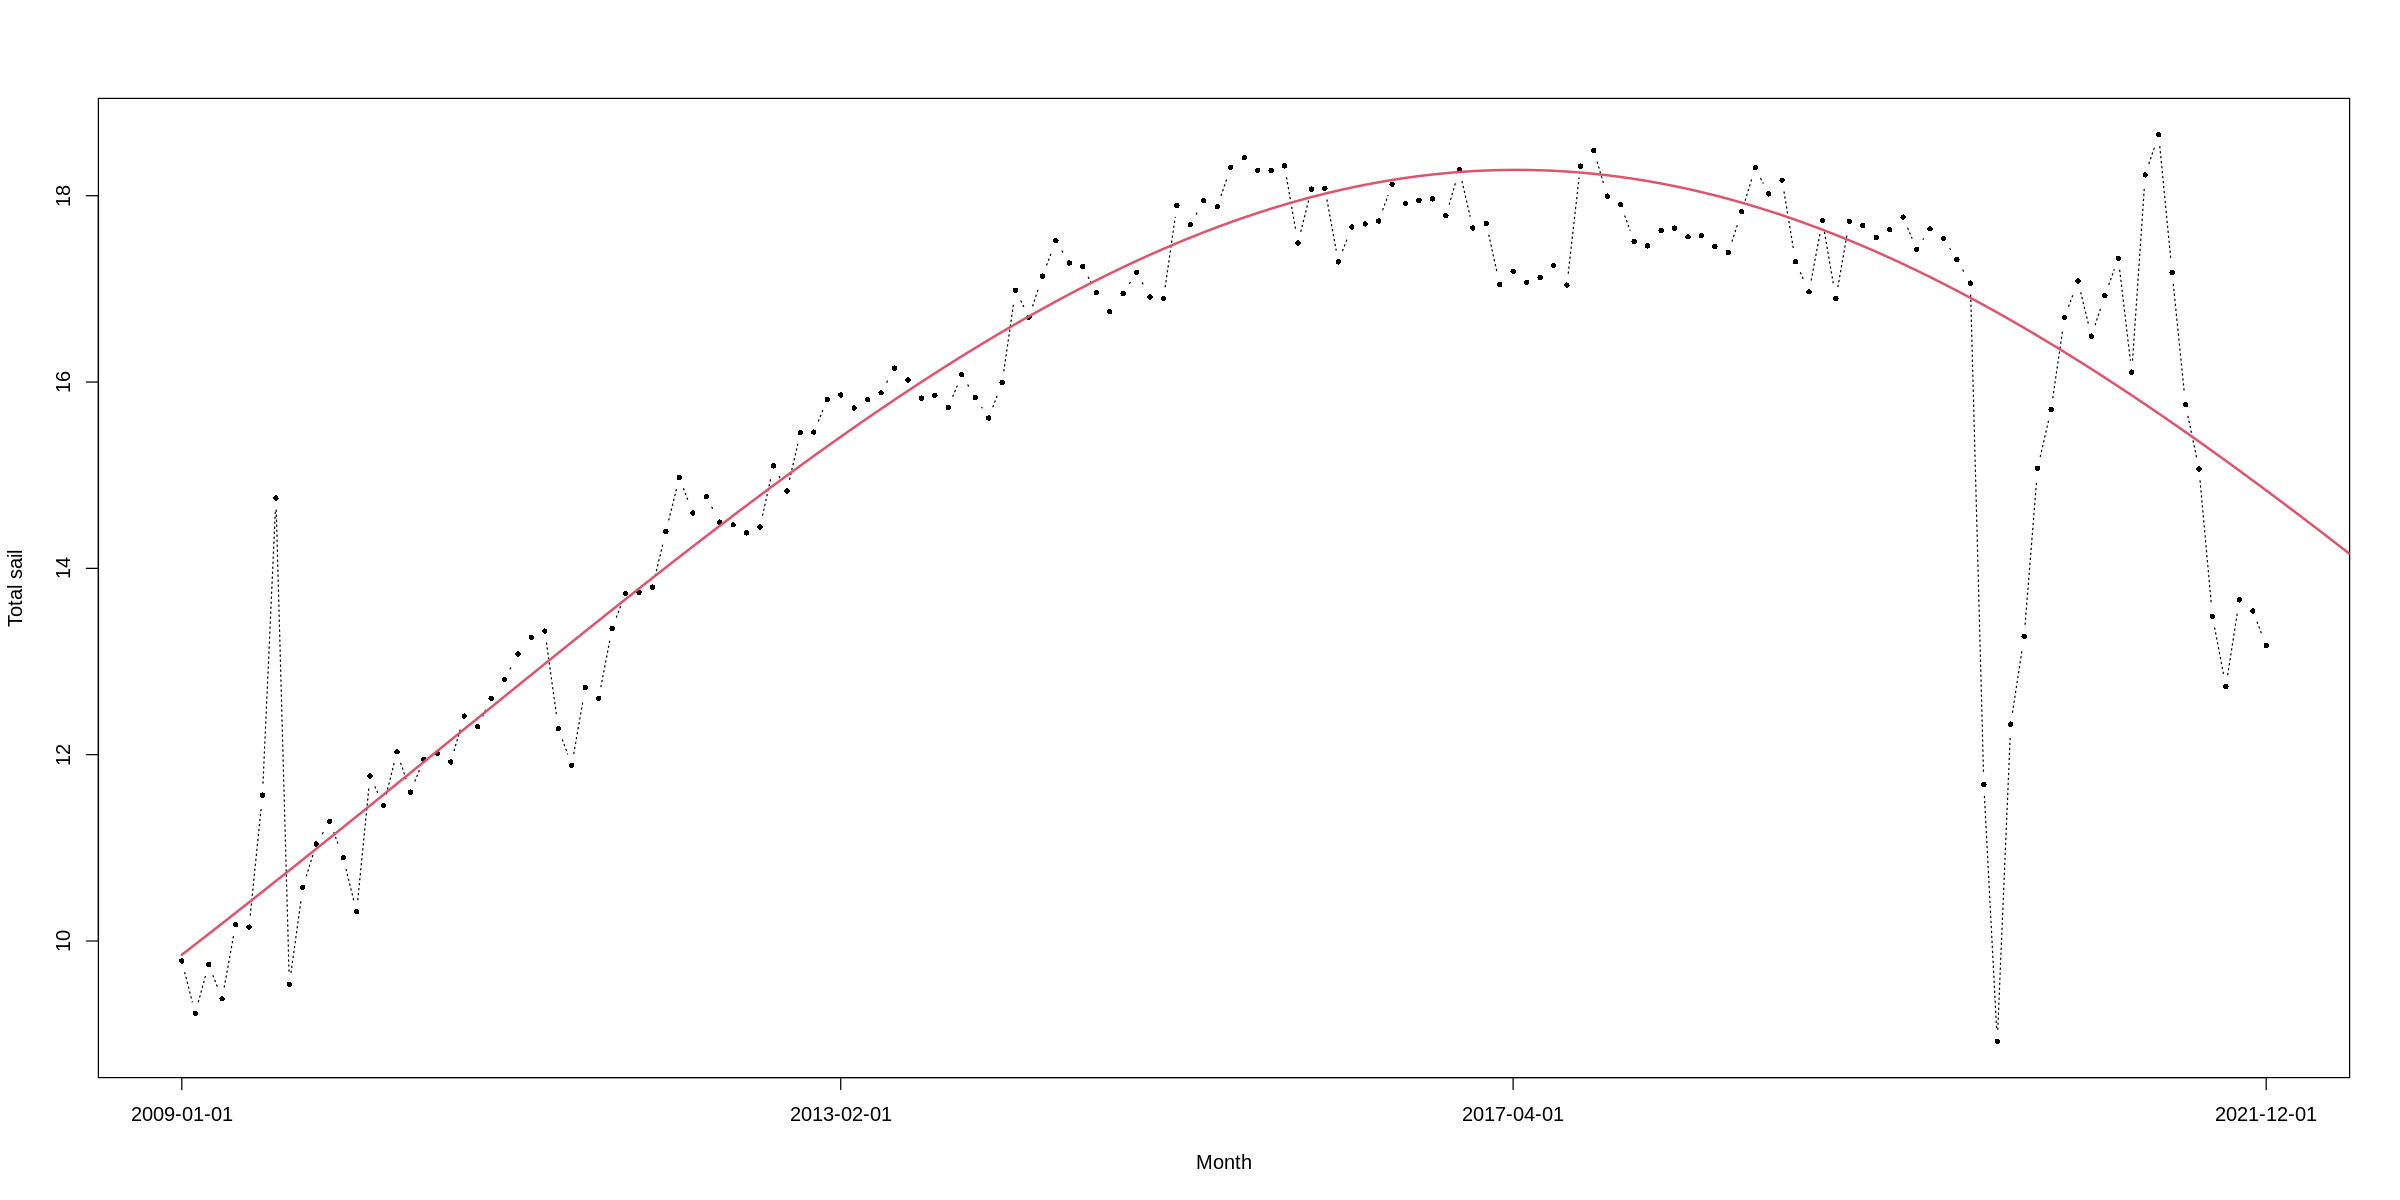

In [36]:
###we estimate the model with 50% of the data

bm_to50<-BM(to_ba[1:80],display = T)
summary(bm_to50)

pred_bm_to50<- predict(bm_to50, newx=c(1:200))
pred.inst_to50<- make.instantaneous(pred_bm_to50)

plot(to_ba, type= "b",xlab="Month", ylab="Total sail",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=s_to_f$DATE[c(1,50,100,156)])
lines(pred.inst_to50, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = to_ba[1:40], display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.71895 -0.99112 -0.03385 -0.12951  0.76286  2.34145 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 3.609397e+03 1.650578e+03 3.743242e+02 6.844470e+03 3.52e-02   *
p 2.735800e-03 1.233770e-03 3.176557e-04 5.153944e-03 3.28e-02   *
q 1.352896e-02 2.193202e-03 9.230363e-03 1.782756e-02 3.71e-07 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  1.193099  on  37  degrees of freedom
 Multiple R-squared:   0.999981  Residual sum of squares:  52.66895


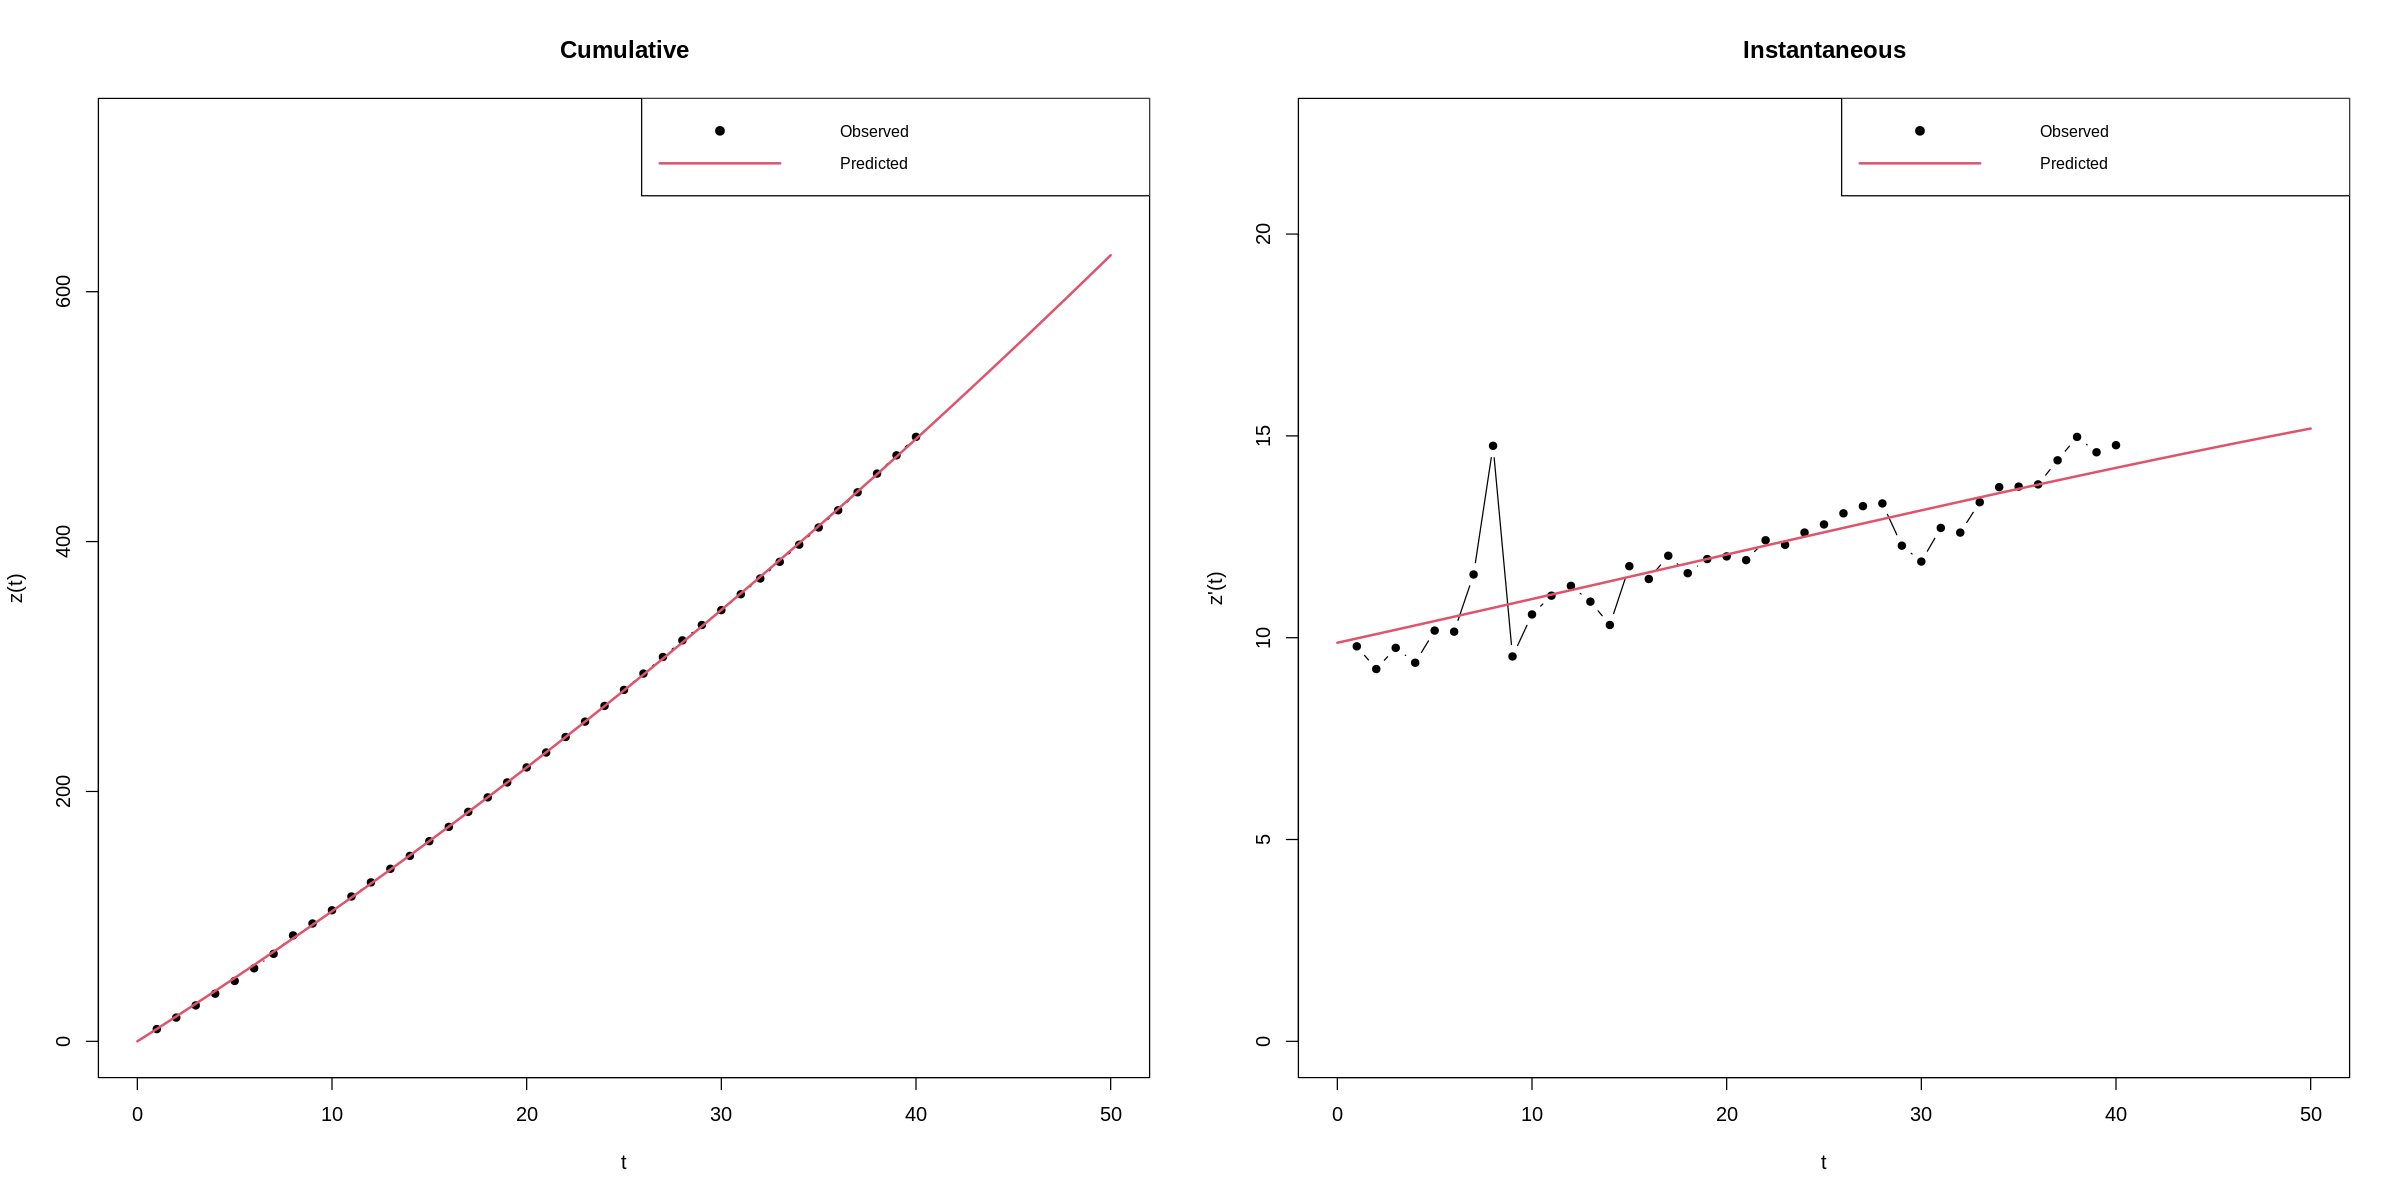

In [37]:
###we estimate the model with 25% of the data
bm_to75<-BM(to_ba[1:40],display = T)
summary(bm_to75)

pred_bm_to75<- predict(bm_to75, newx=c(1:200))
pred.inst_to75<- make.instantaneous(pred_bm_to75)

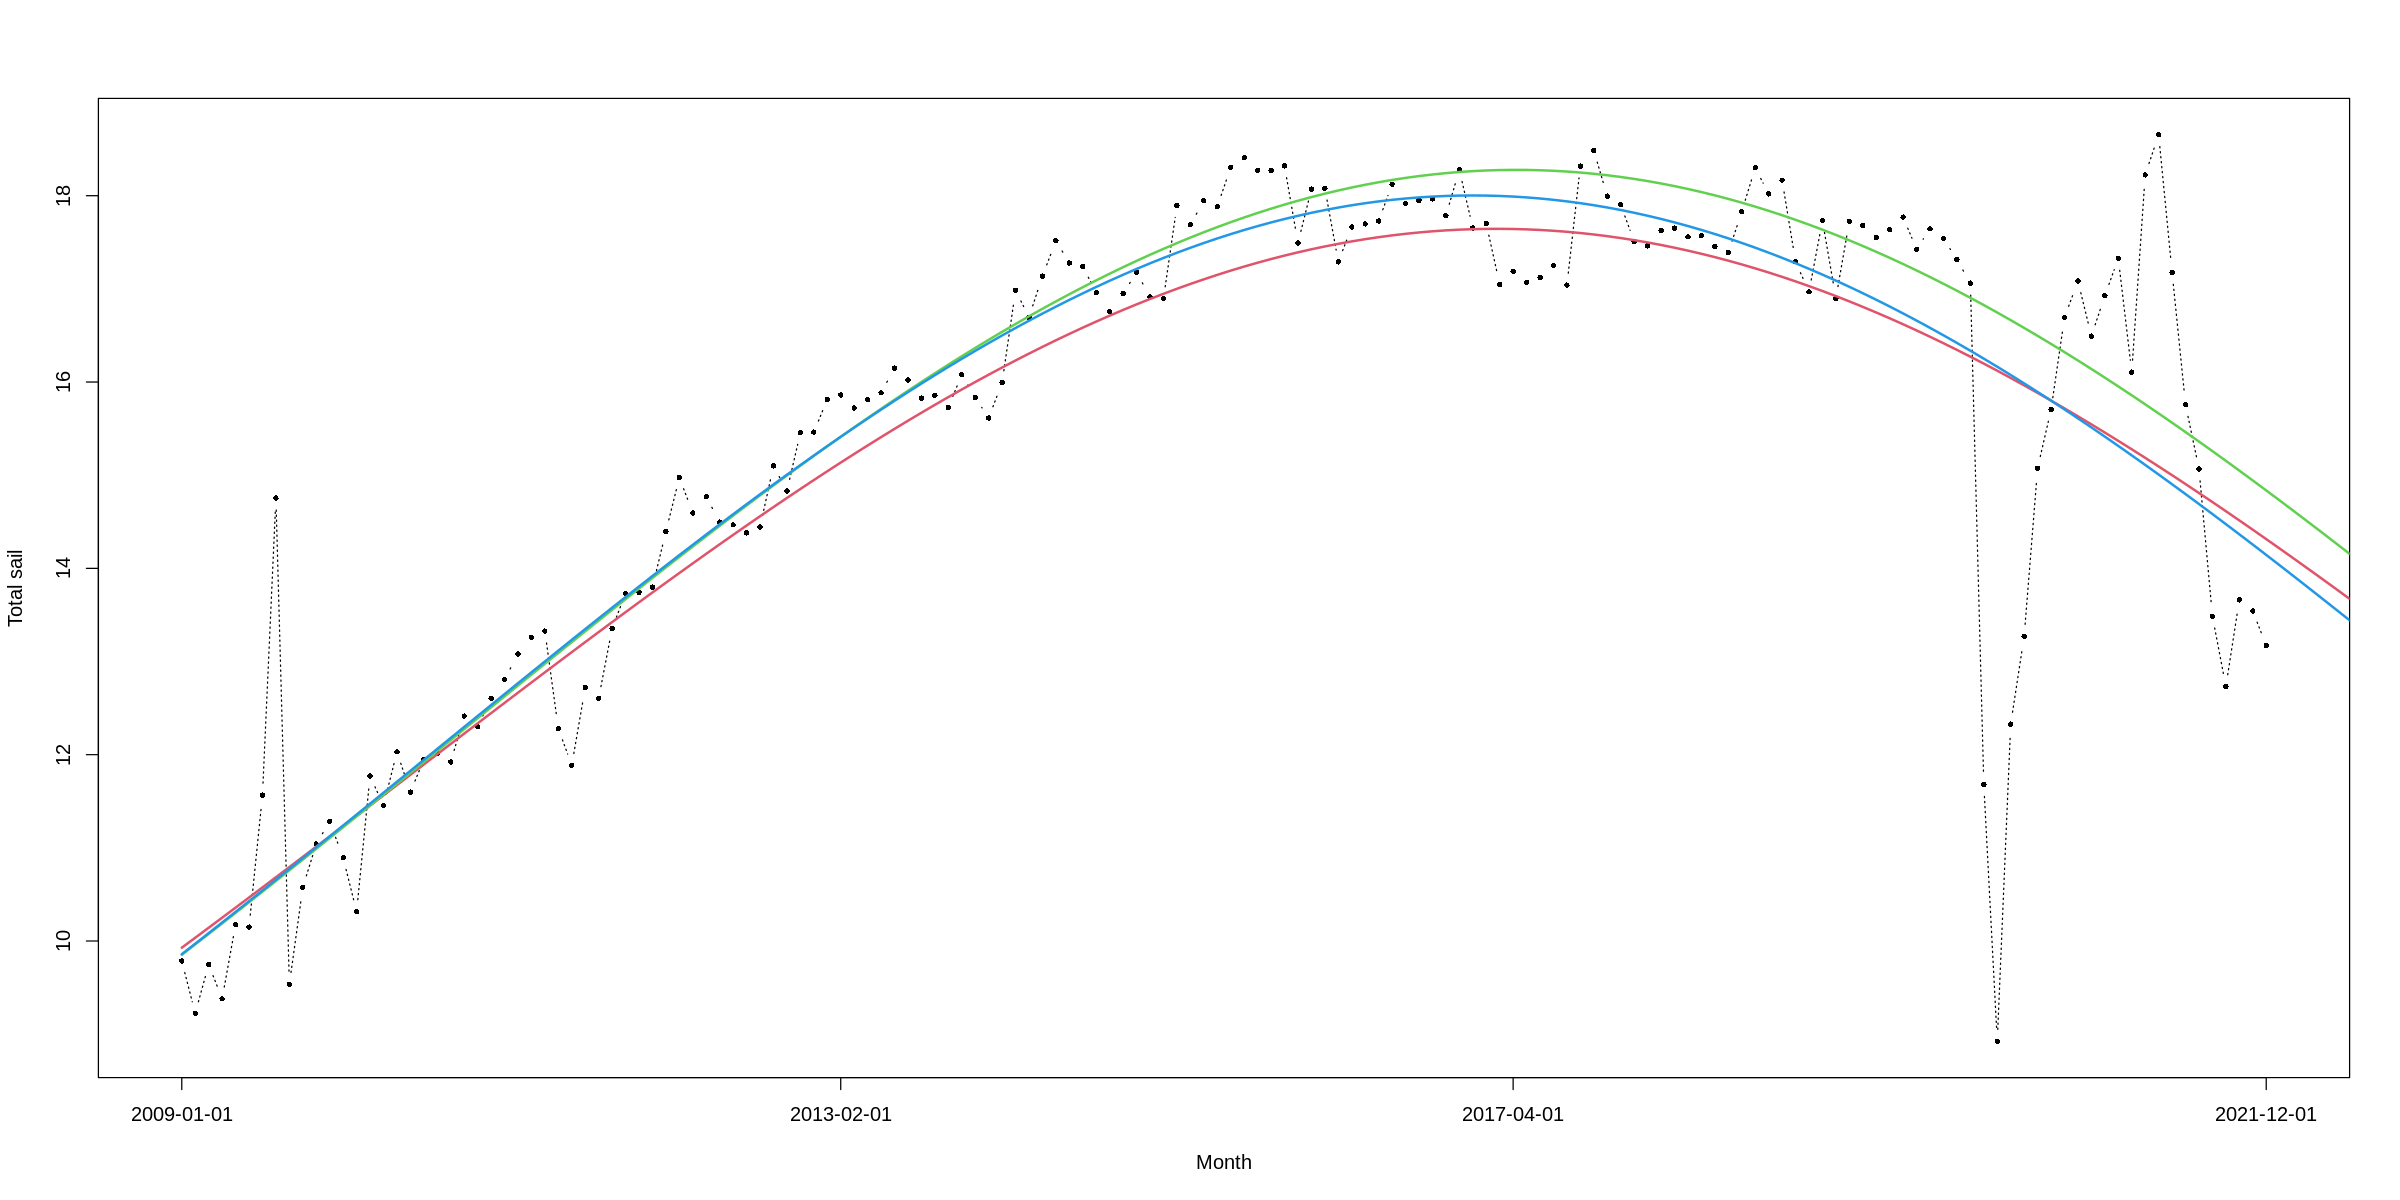

In [38]:
###Comparison between models (instantaneous)
###instantaneous
plot(to_ba, type= "b",xlab="Month", ylab="Total sail",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=s_to_f$DATE[c(1,50,100,156)])
lines(pred.inst_to75, lwd=2, col=2)
lines(pred.inst_to50, lwd=2, col=3)
lines(pred.inst_to, lwd=2, col=4)

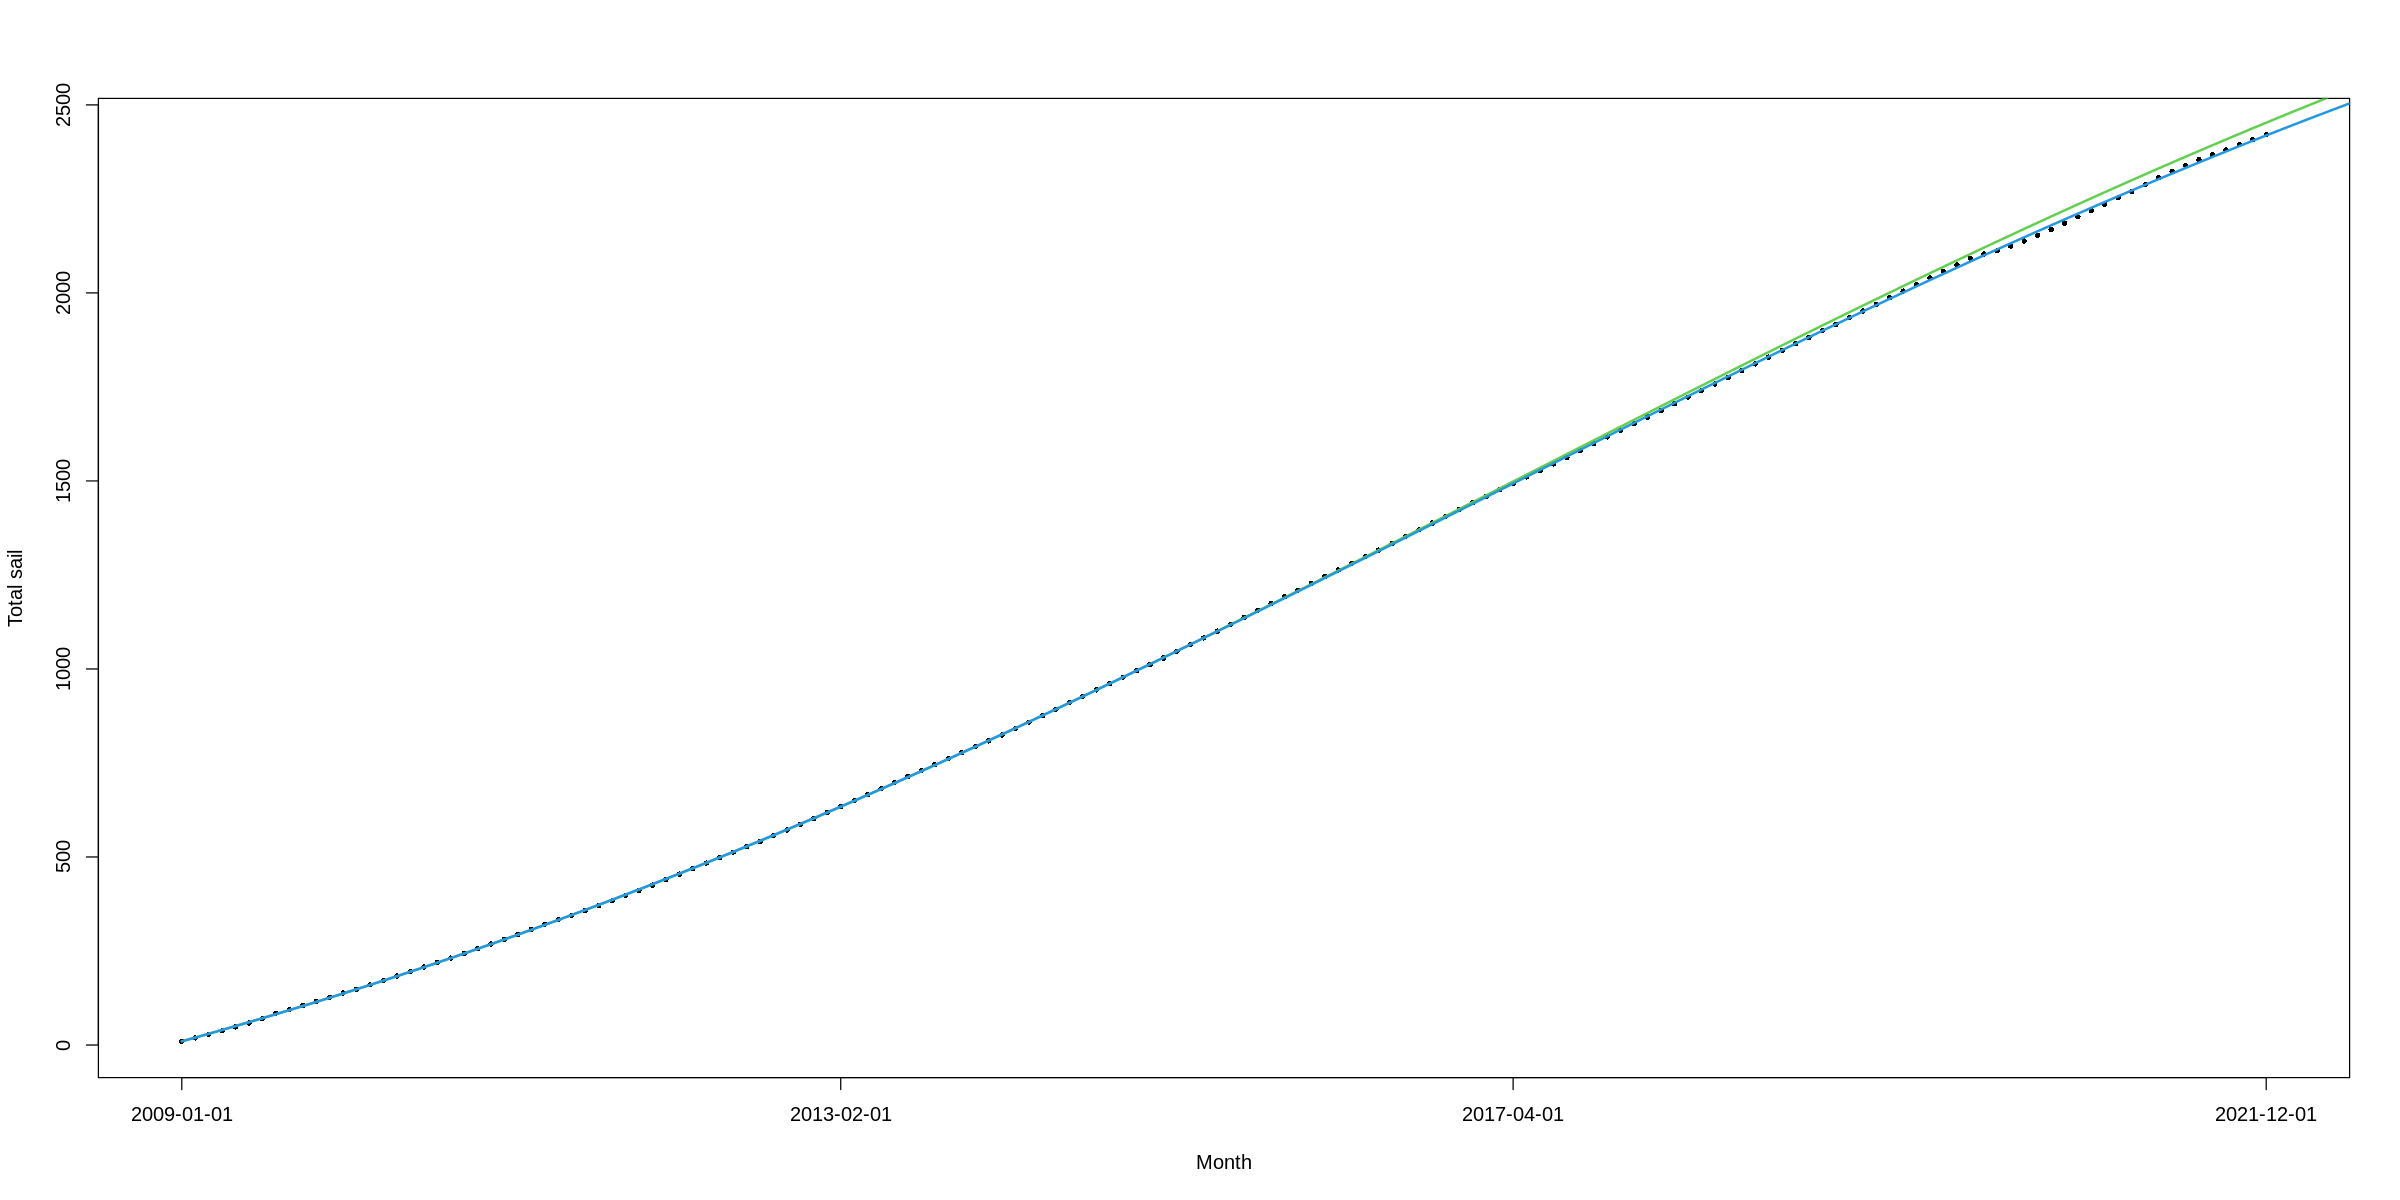

In [39]:
###Comparison between models (cumulative)
plot(cumsum(to_ba), type= "b",xlab="Month", ylab="Total sail",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,50,100,156), labels=s_to_f$DATE[c(1,50,100,156)])
lines(pred_bm_to50, lwd=2, col=3)
lines(pred_bm_to, lwd=2, col=4)

#BM(sale(2000-2009))

In [ ]:
s_0_9 <-sail_total %>% filter(year>='2000'&year<='2009')

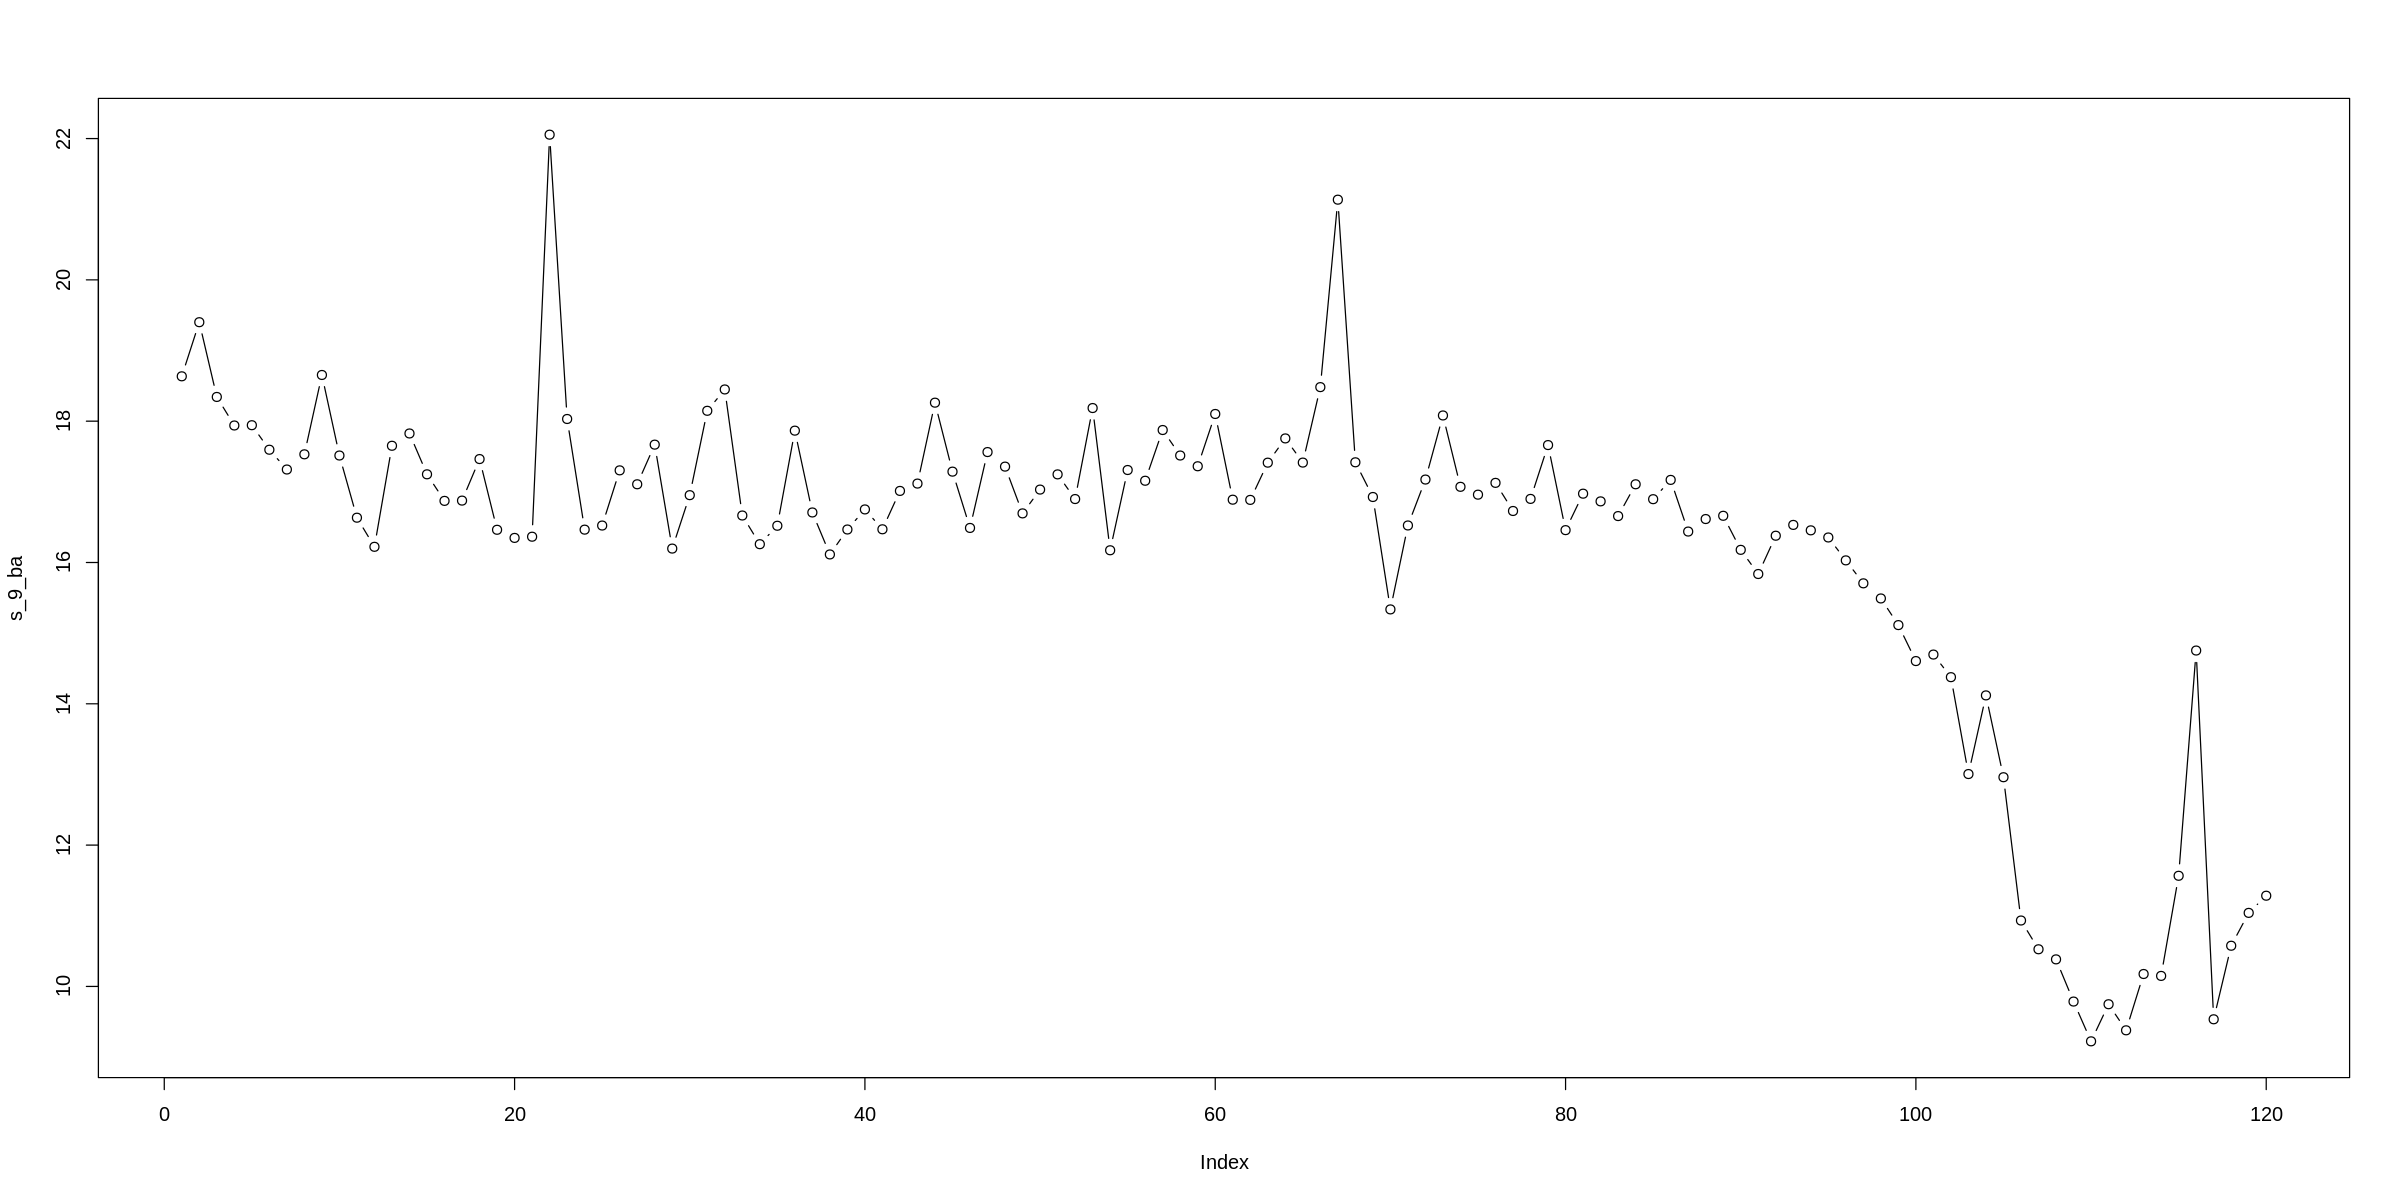

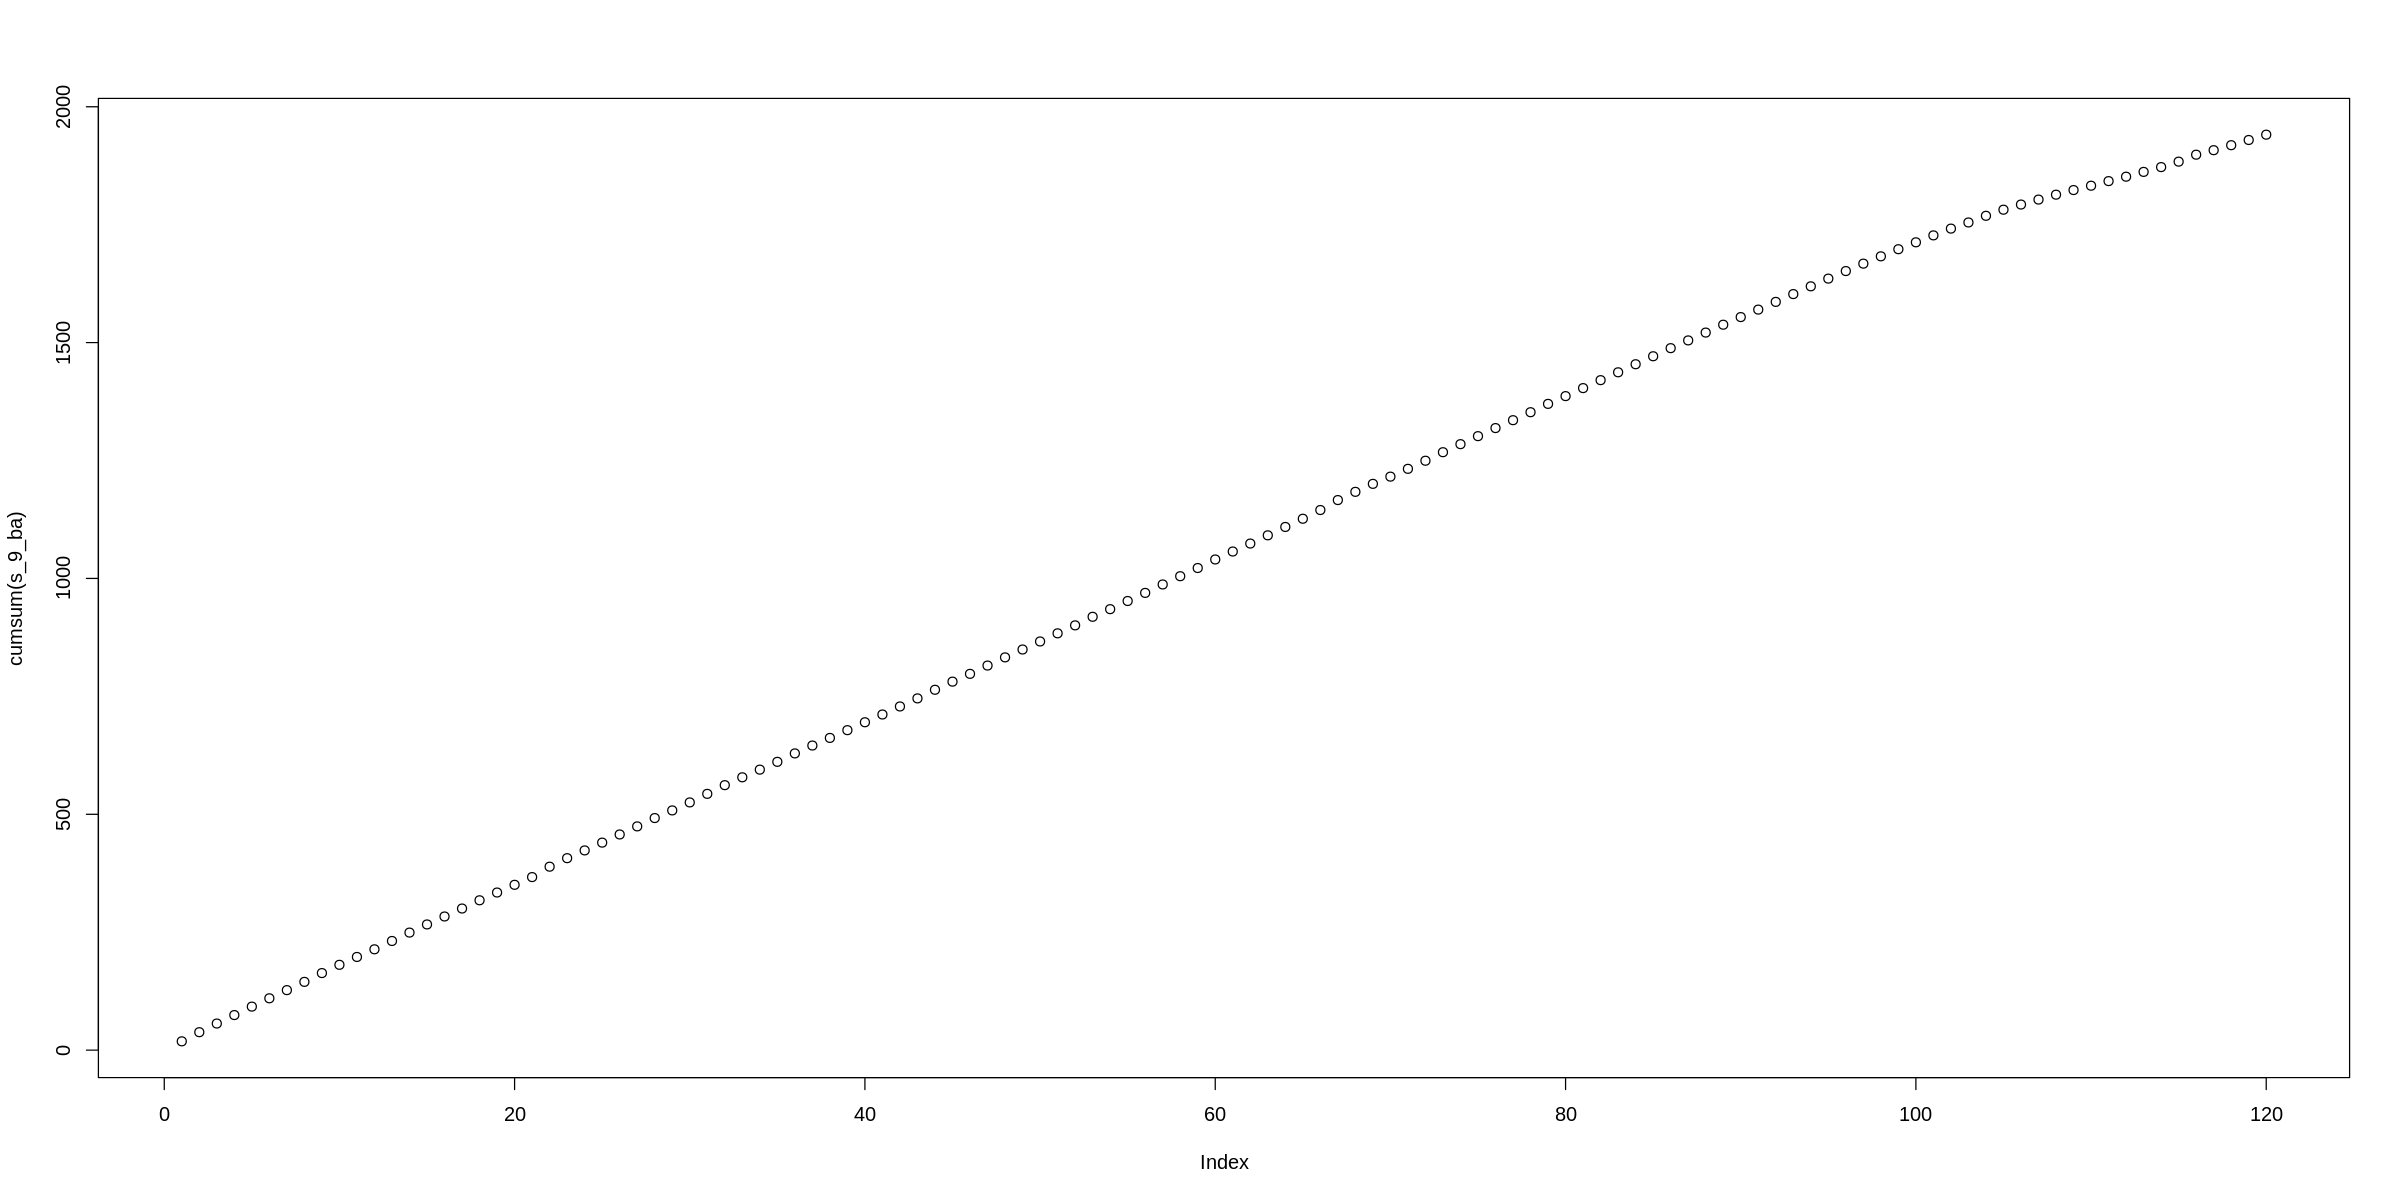

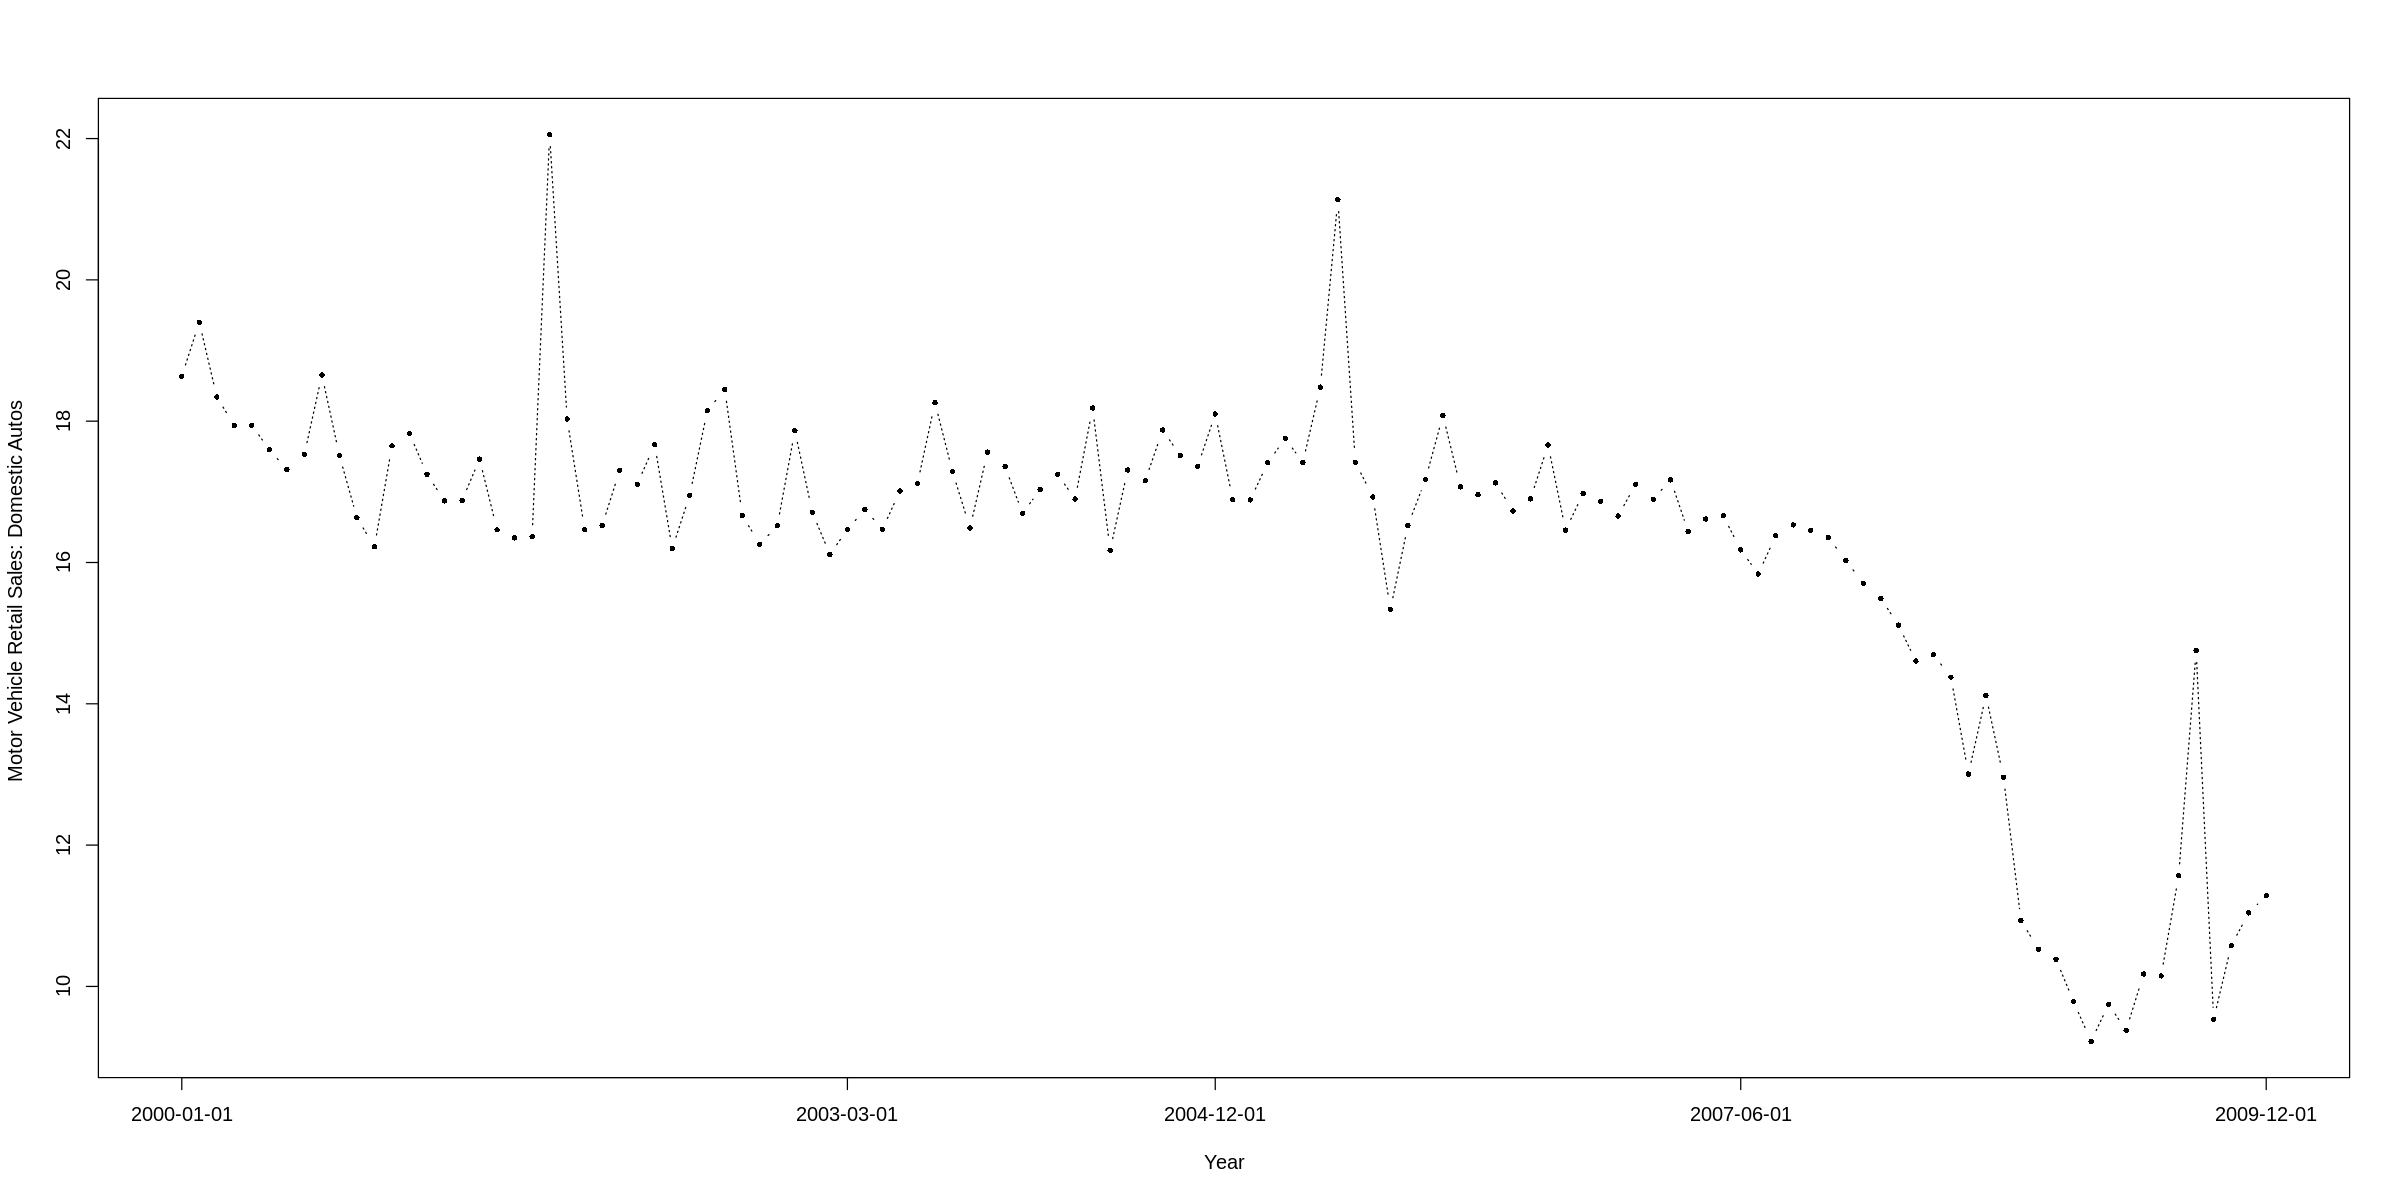

In [ ]:
##create the variable cassette
s_9_ba<- s_0_9$TOTALSA[1:120]

###some simple plots
plot(s_9_ba, type="b")
plot(cumsum(s_9_ba), type="b")

###a better plot of the yearly time series
plot(s_9_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_0_9$DATE[c(1,39,60,90,120)])

Call: ( Standard Bass Model )

  BM(series = s_9_ba, display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-23.323  -6.707   2.586   1.294   9.786  18.703 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 3.051464e+03 6.904664e+01 2.916135e+03 3.186793e+03 7.63e-75 ***
p 5.427731e-03 8.776043e-05 5.255724e-03 5.599739e-03 3.25e-91 ***
q 9.423648e-03 5.030042e-04 8.437778e-03 1.040952e-02 5.11e-37 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  10.47013  on  117  degrees of freedom
 Multiple R-squared:   0.999922  Residual sum of squares:  12825.97


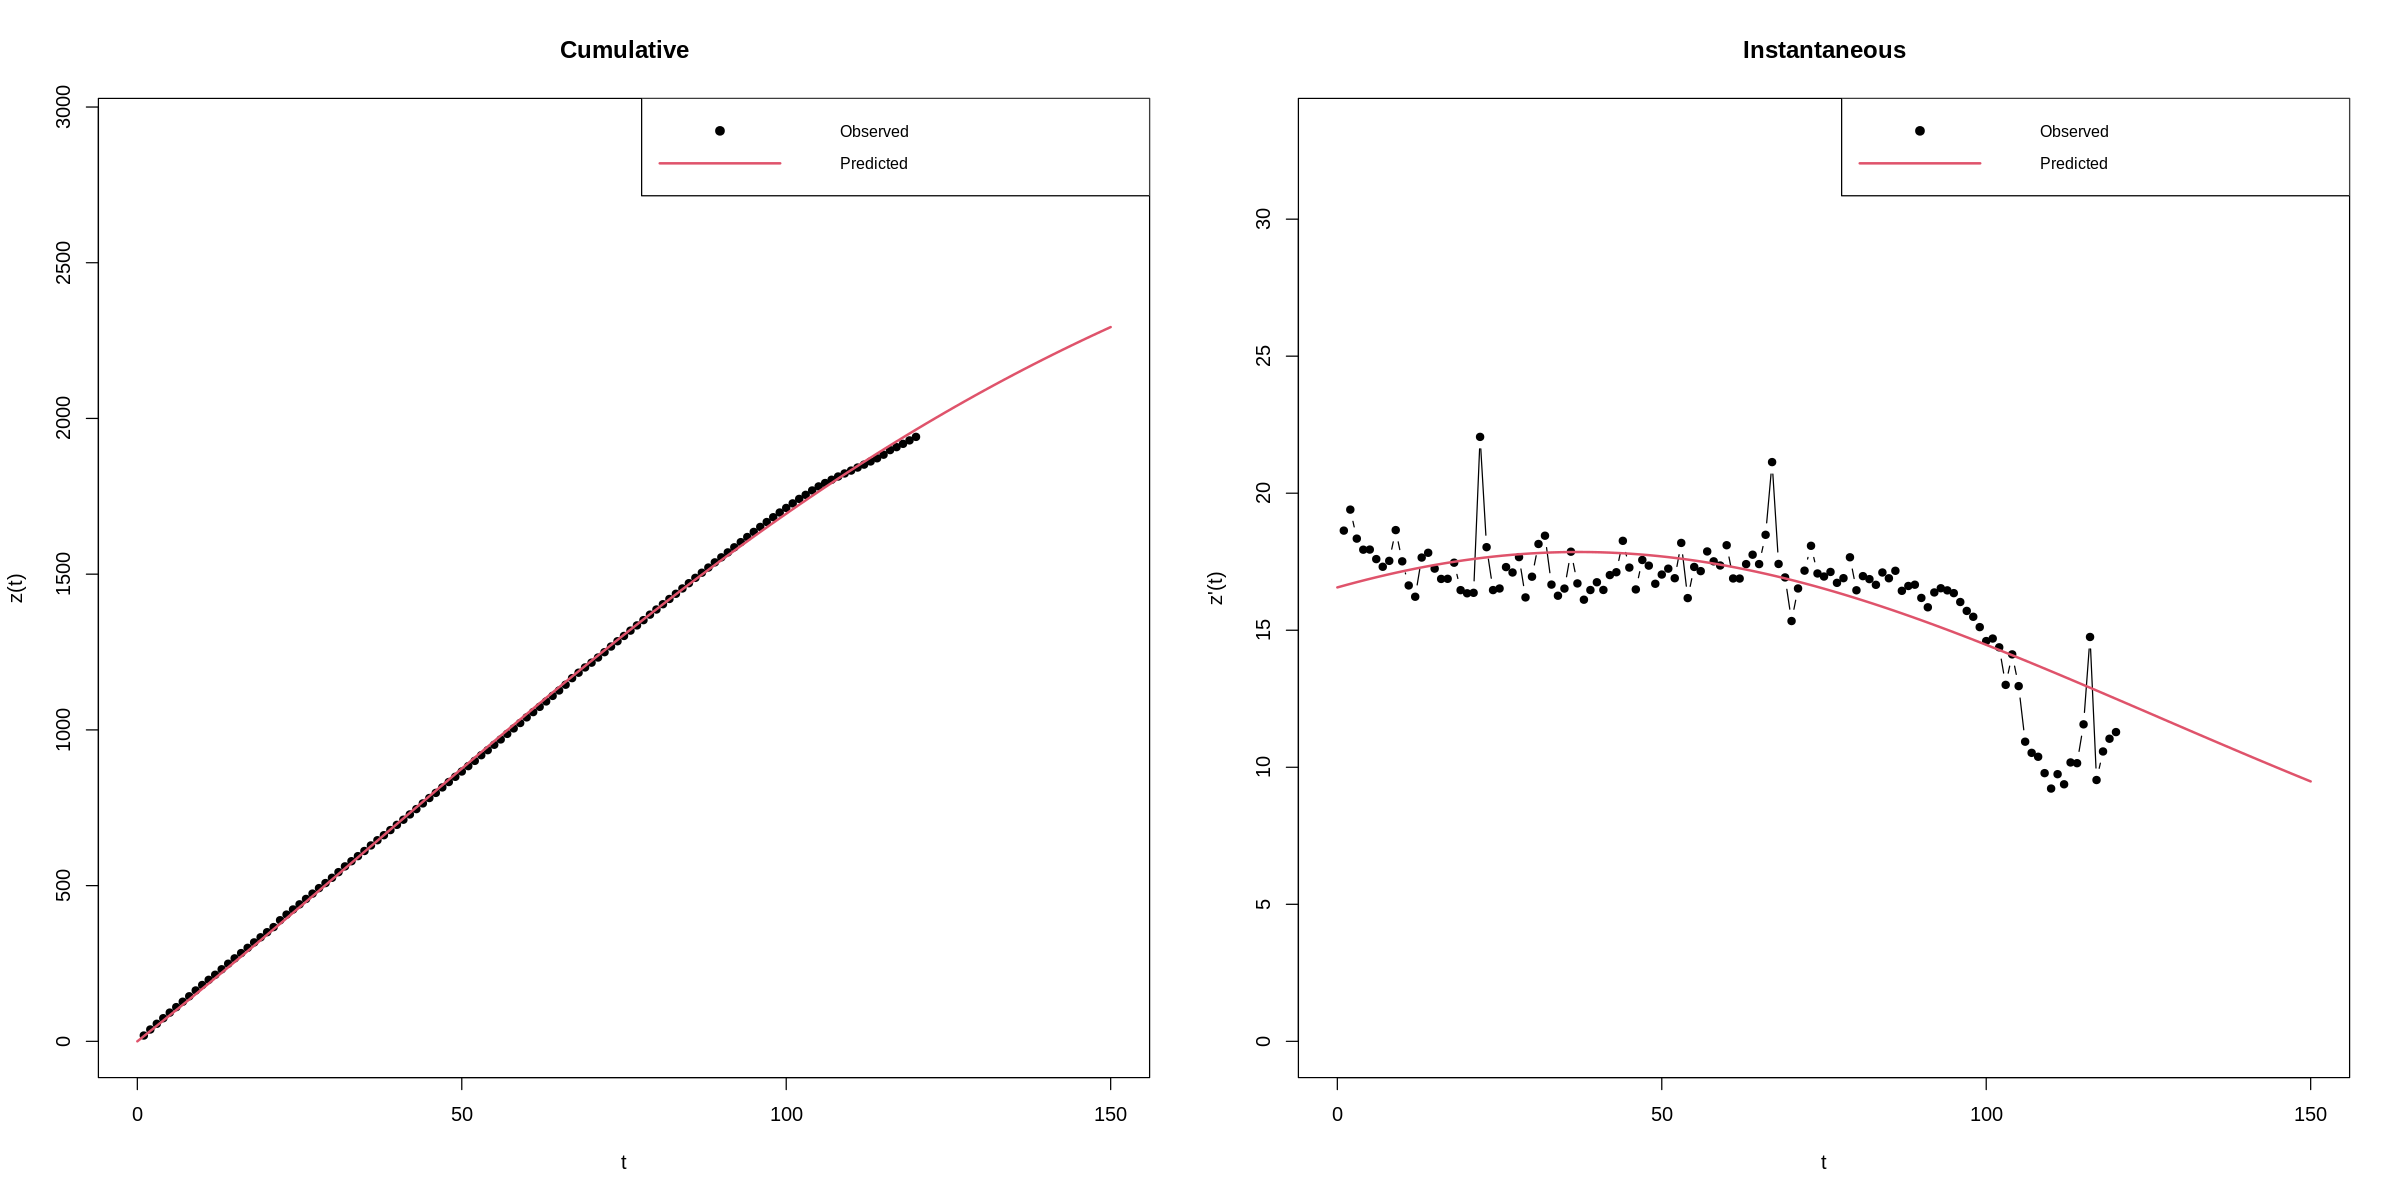

In [ ]:
###we estimate a simple Bass Model
bm_s9<-BM(s_9_ba,display = T)
summary(bm_s9)

In [ ]:
###prediction (out-of-sample)
pred_bm_s9<- predict(bm_s9, newx=c(1:300))
pred.inst_s9<- make.instantaneous(pred_bm_s9)

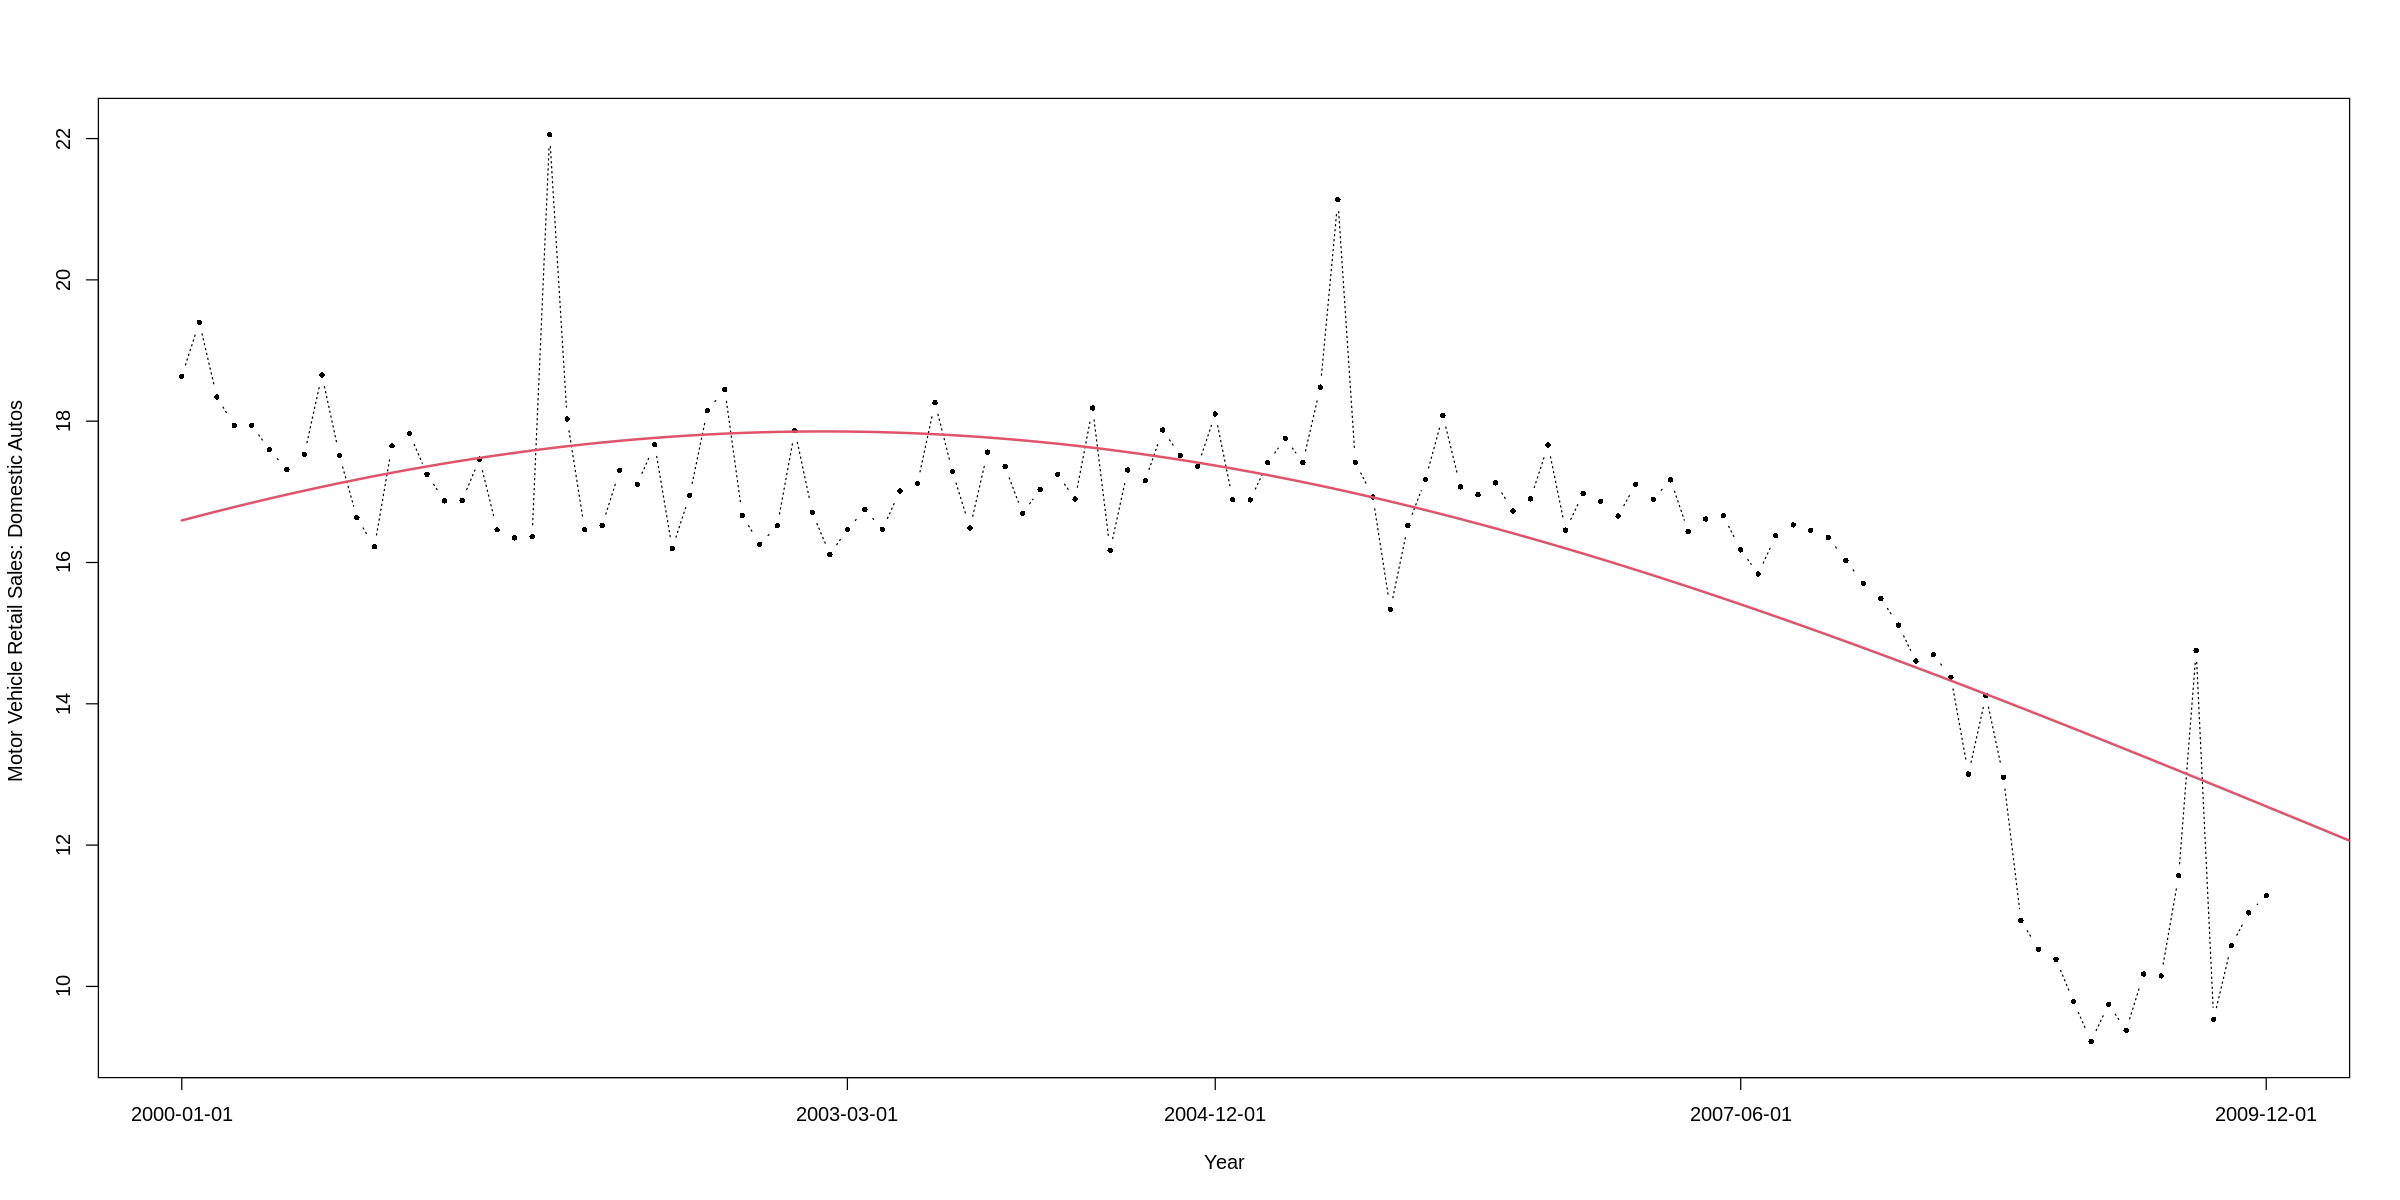

In [ ]:
###plot of fitted model
plot(s_9_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_0_9$DATE[c(1,39,60,90,120)])
lines(pred.inst_s9, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = s_9_ba[1:60], display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0966 -0.8398  0.5304  0.5141  1.8370  4.7651 

Coefficients:
       Estimate    Std.Error         Lower        Upper p-value  
m 1.152879e+04 2.743359e+04 -4.224006e+04 6.529765e+04   0.676  
p 1.543814e-03 3.736038e-03 -5.778686e-03 8.866315e-03   0.681  
q 5.421499e-04 4.188736e-03 -7.667622e-03 8.751922e-03   0.897  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  2.084735  on  57  degrees of freedom
 Multiple R-squared:   0.999988  Residual sum of squares:  247.7288


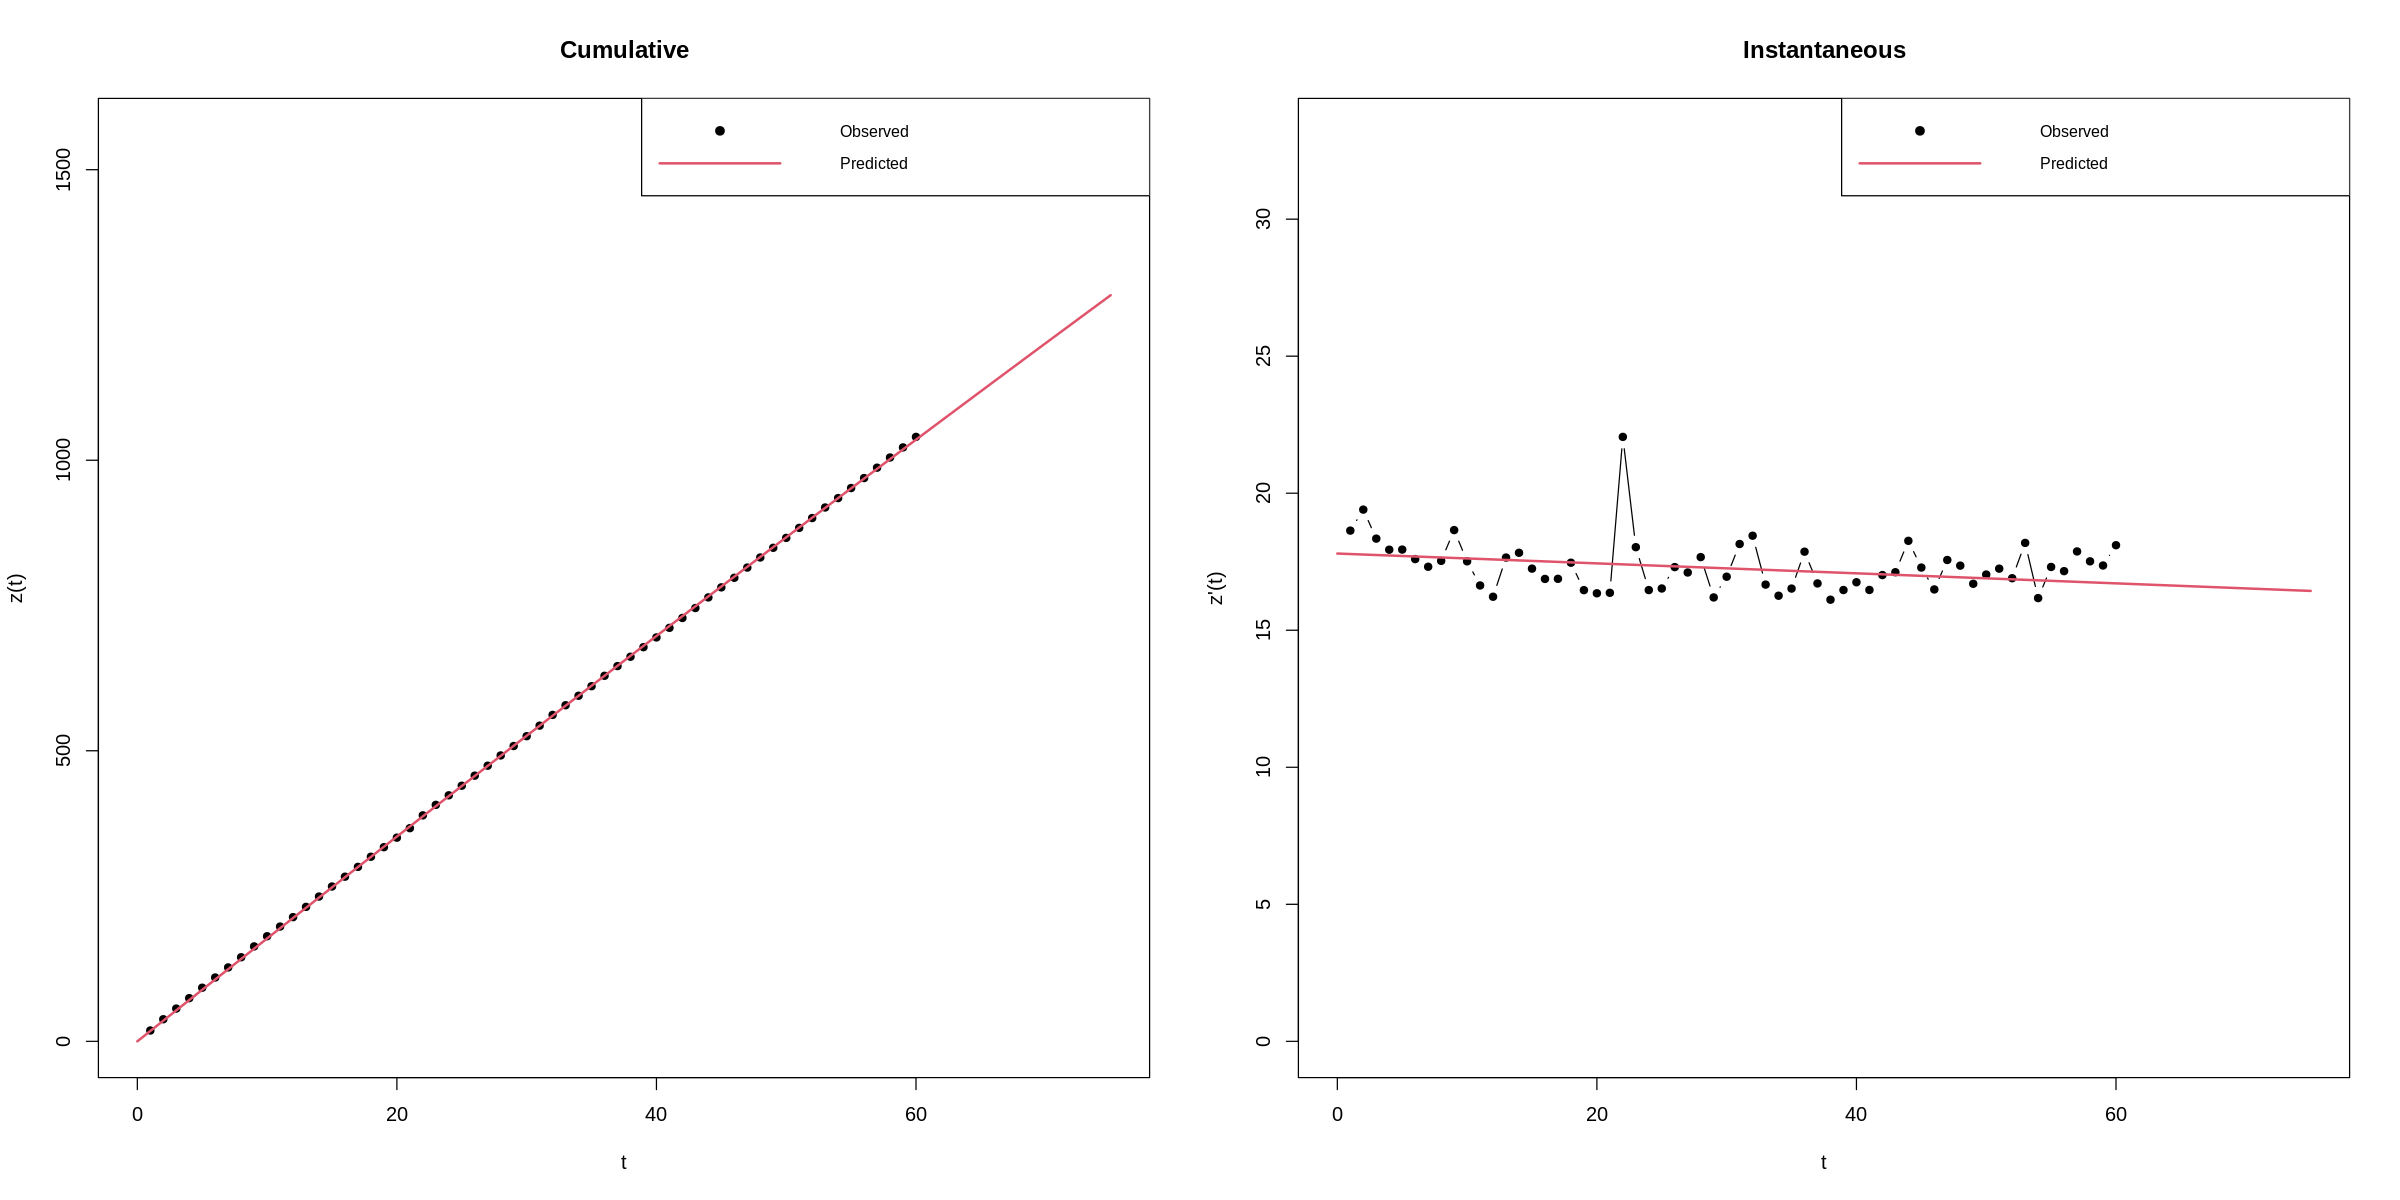

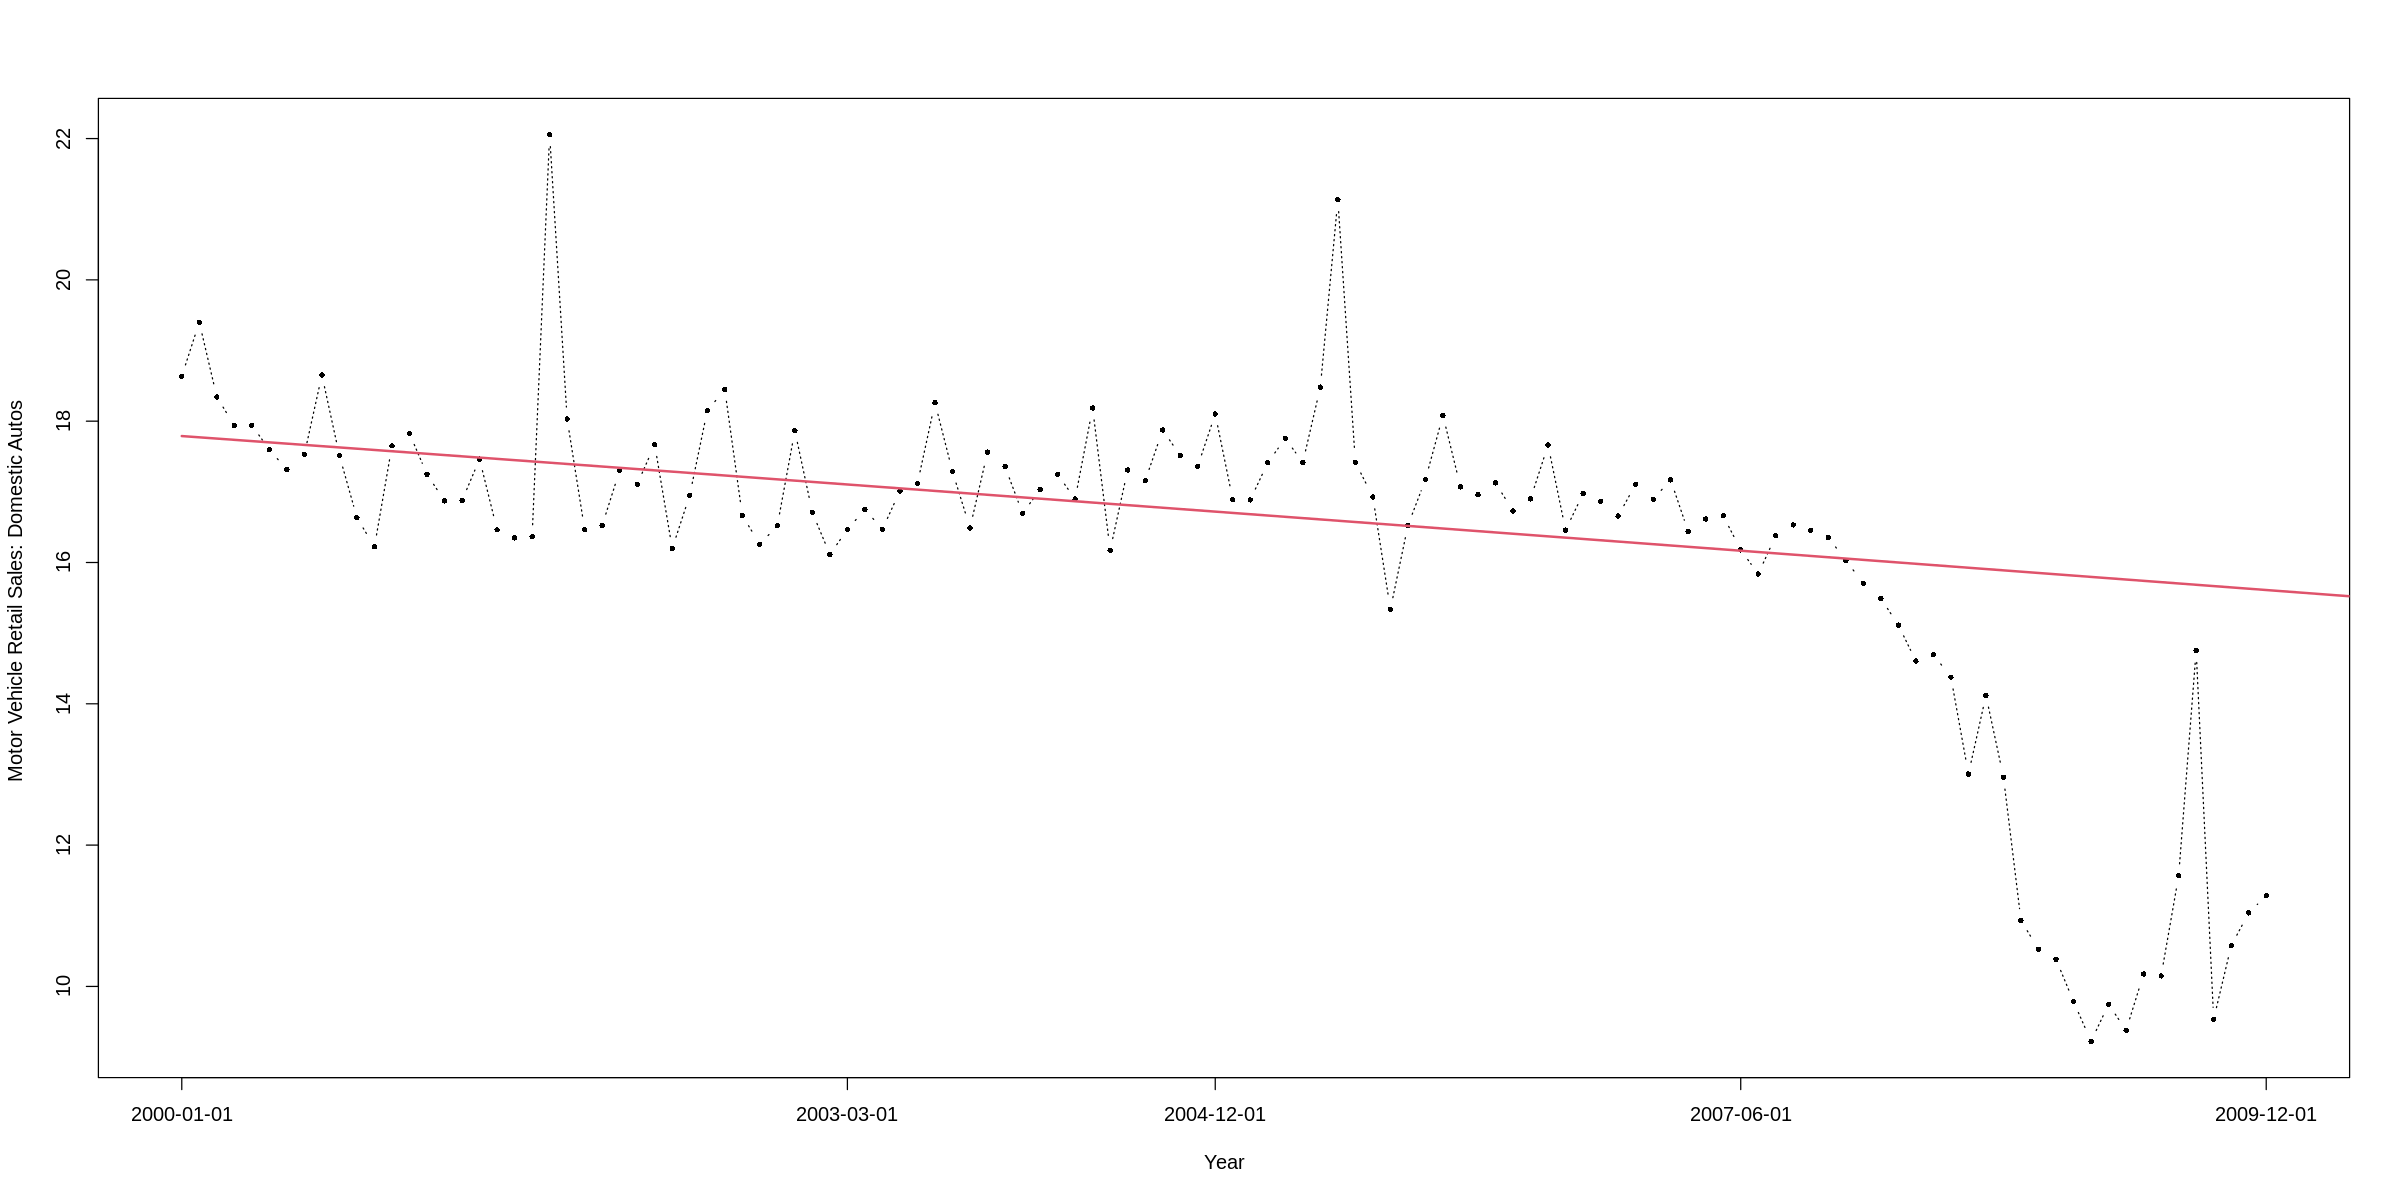

In [ ]:
###we estimate the model with 50% of the data

bm_s950<-BM(s_9_ba[1:60],display = T)
summary(bm_s950)

pred_bm_s950<- predict(bm_s950, newx=c(1:150))
pred.inst_s950<- make.instantaneous(pred_bm_s950)

plot(s_9_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_0_9$DATE[c(1,39,60,90,120)])
lines(pred.inst_s950, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = s_9_ba[1:30], display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.1668 -0.4738  0.6914  0.3502  1.5187  2.2329 

Coefficients:
       Estimate    Std.Error         Lower        Upper p-value  
m 6.952393e+03 6.679146e+04 -1.239565e+05 1.378612e+05   0.918  
p 2.605312e-03 2.549041e-02 -4.735498e-02 5.256561e-02   0.919  
q 2.288141e-04 2.757620e-02 -5.381954e-02 5.427717e-02   0.993  
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  1.745177  on  27  degrees of freedom
 Multiple R-squared:   0.999969  Residual sum of squares:  82.23238


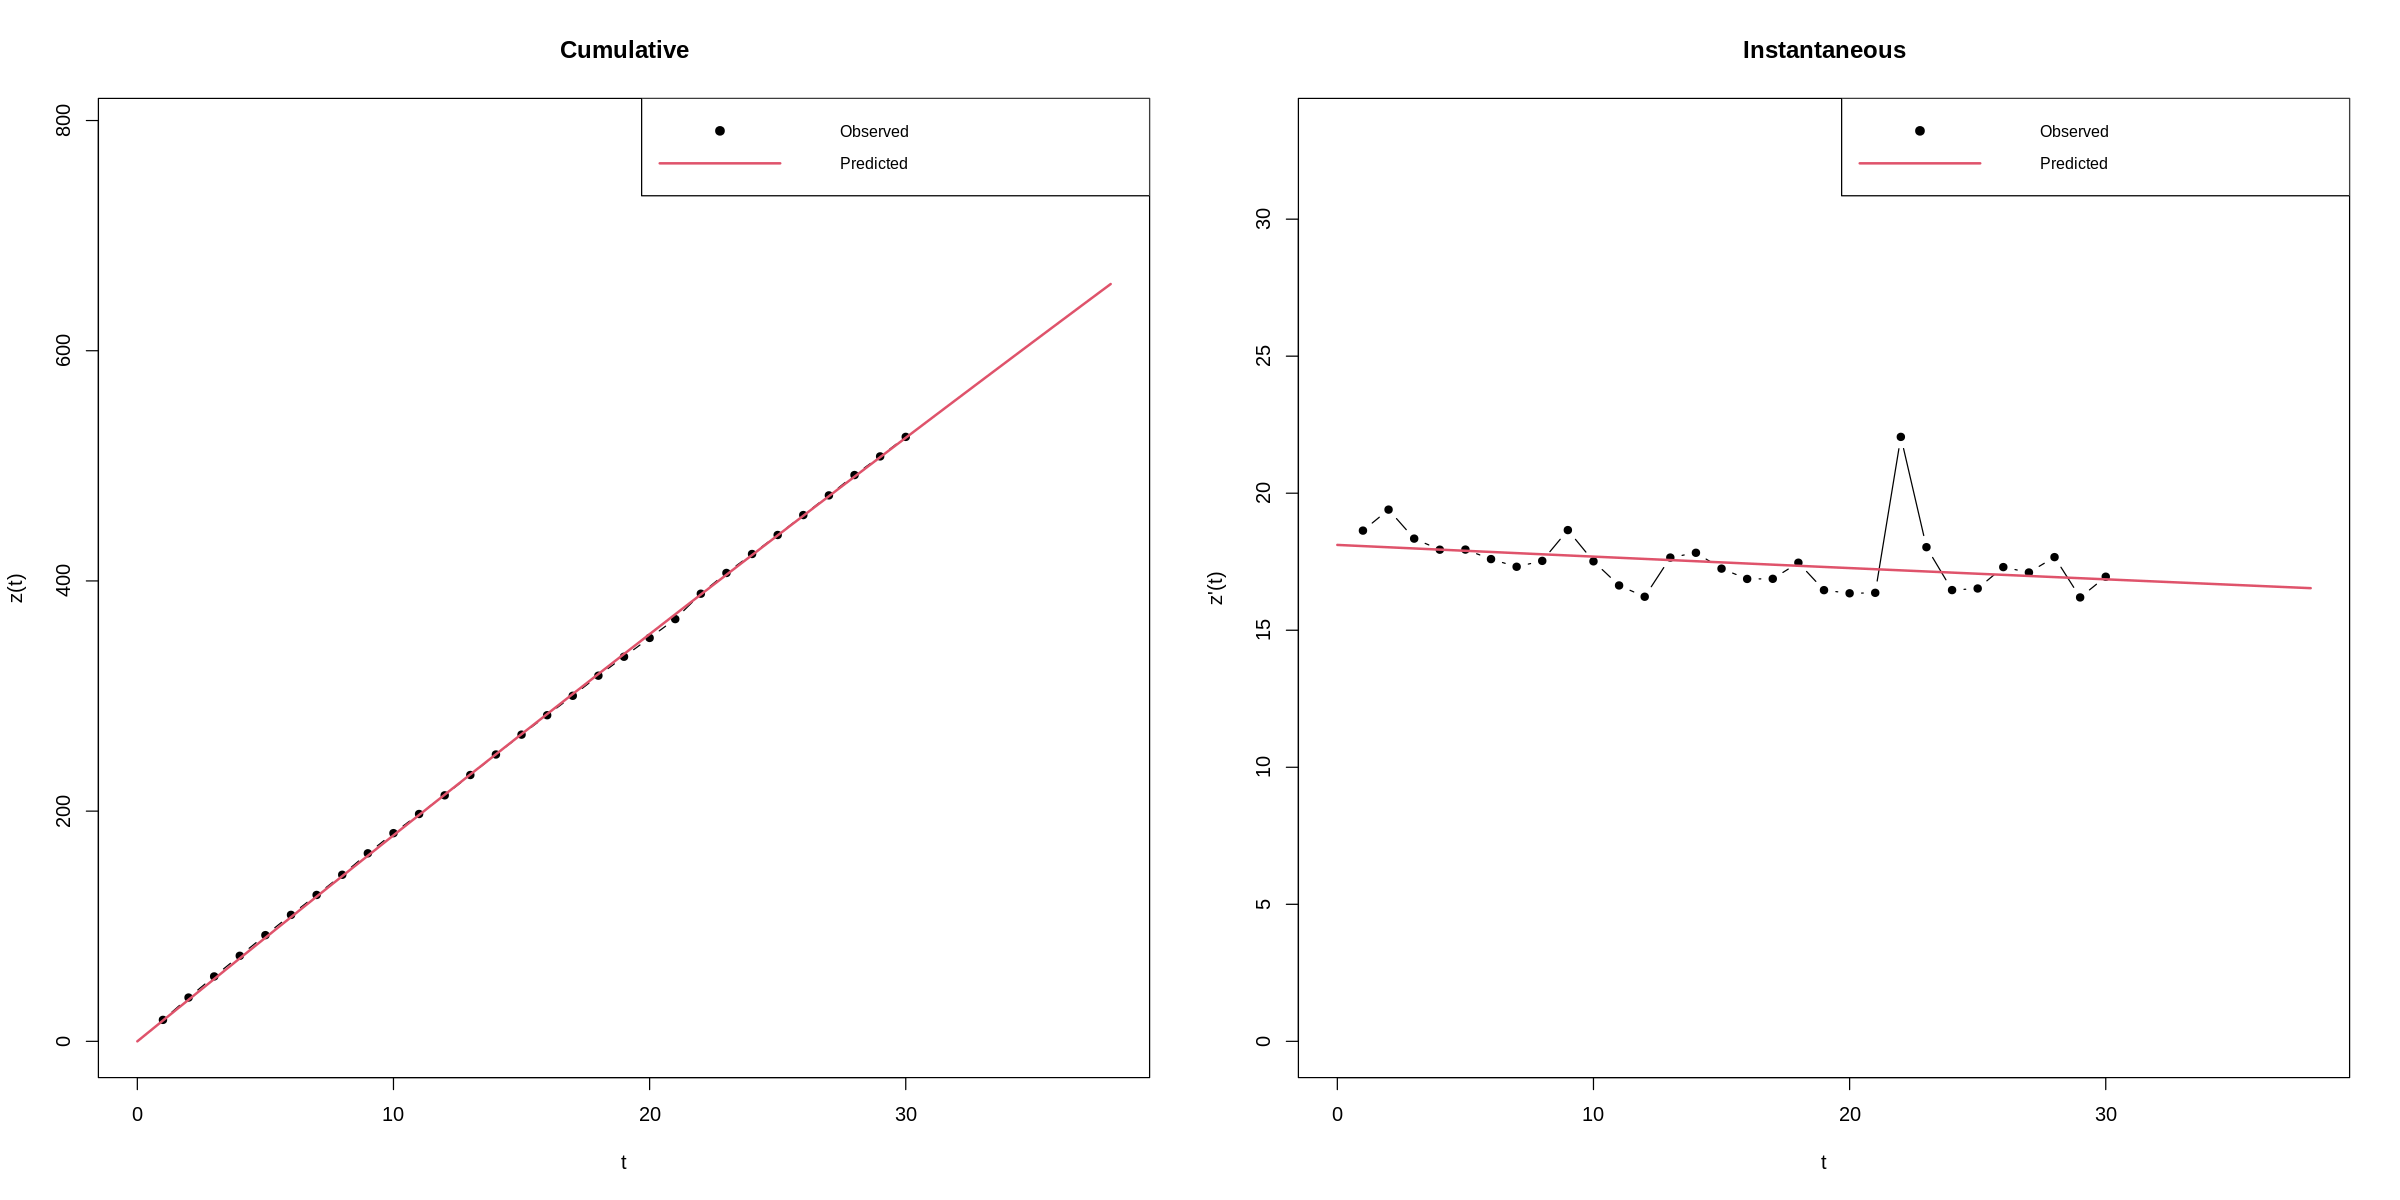

In [ ]:
###we estimate the model with 25% of the data
bm_s975<-BM(s_9_ba[1:30],display = T)
summary(bm_s975)

pred_bm_s975<- predict(bm_s975, newx=c(1:150))
pred.inst_s975<- make.instantaneous(pred_bm_s975)

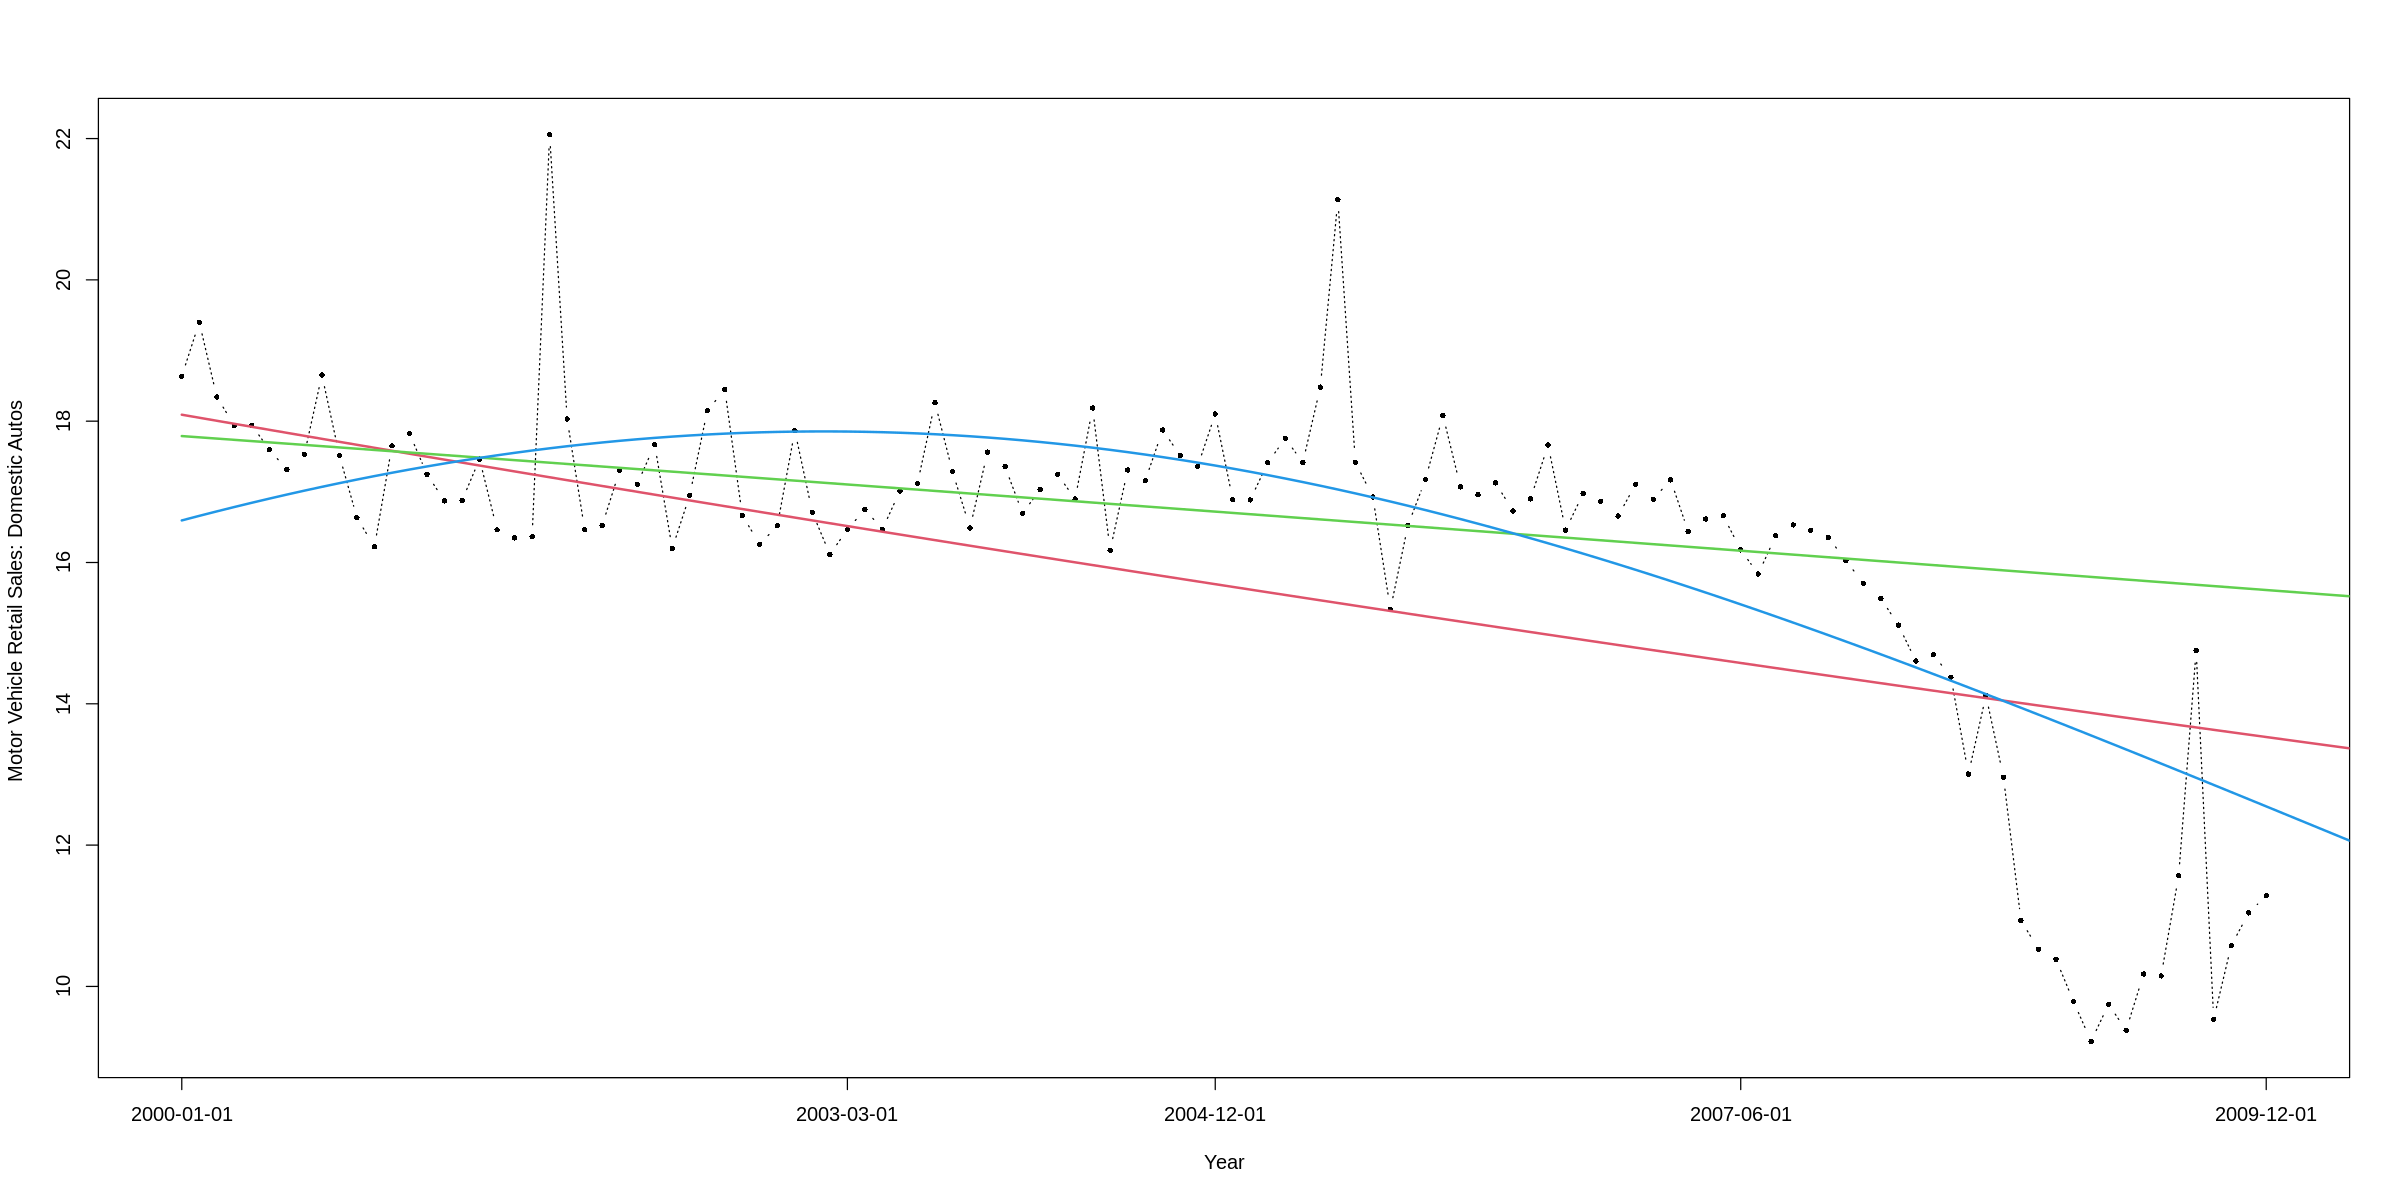

In [ ]:
###Comparison between models (instantaneous)
###instantaneous
plot(s_9_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_0_9$DATE[c(1,39,60,90,120)])
lines(pred.inst_s975, lwd=2, col=2)
lines(pred.inst_s950, lwd=2, col=3)
lines(pred.inst_s9, lwd=2, col=4)

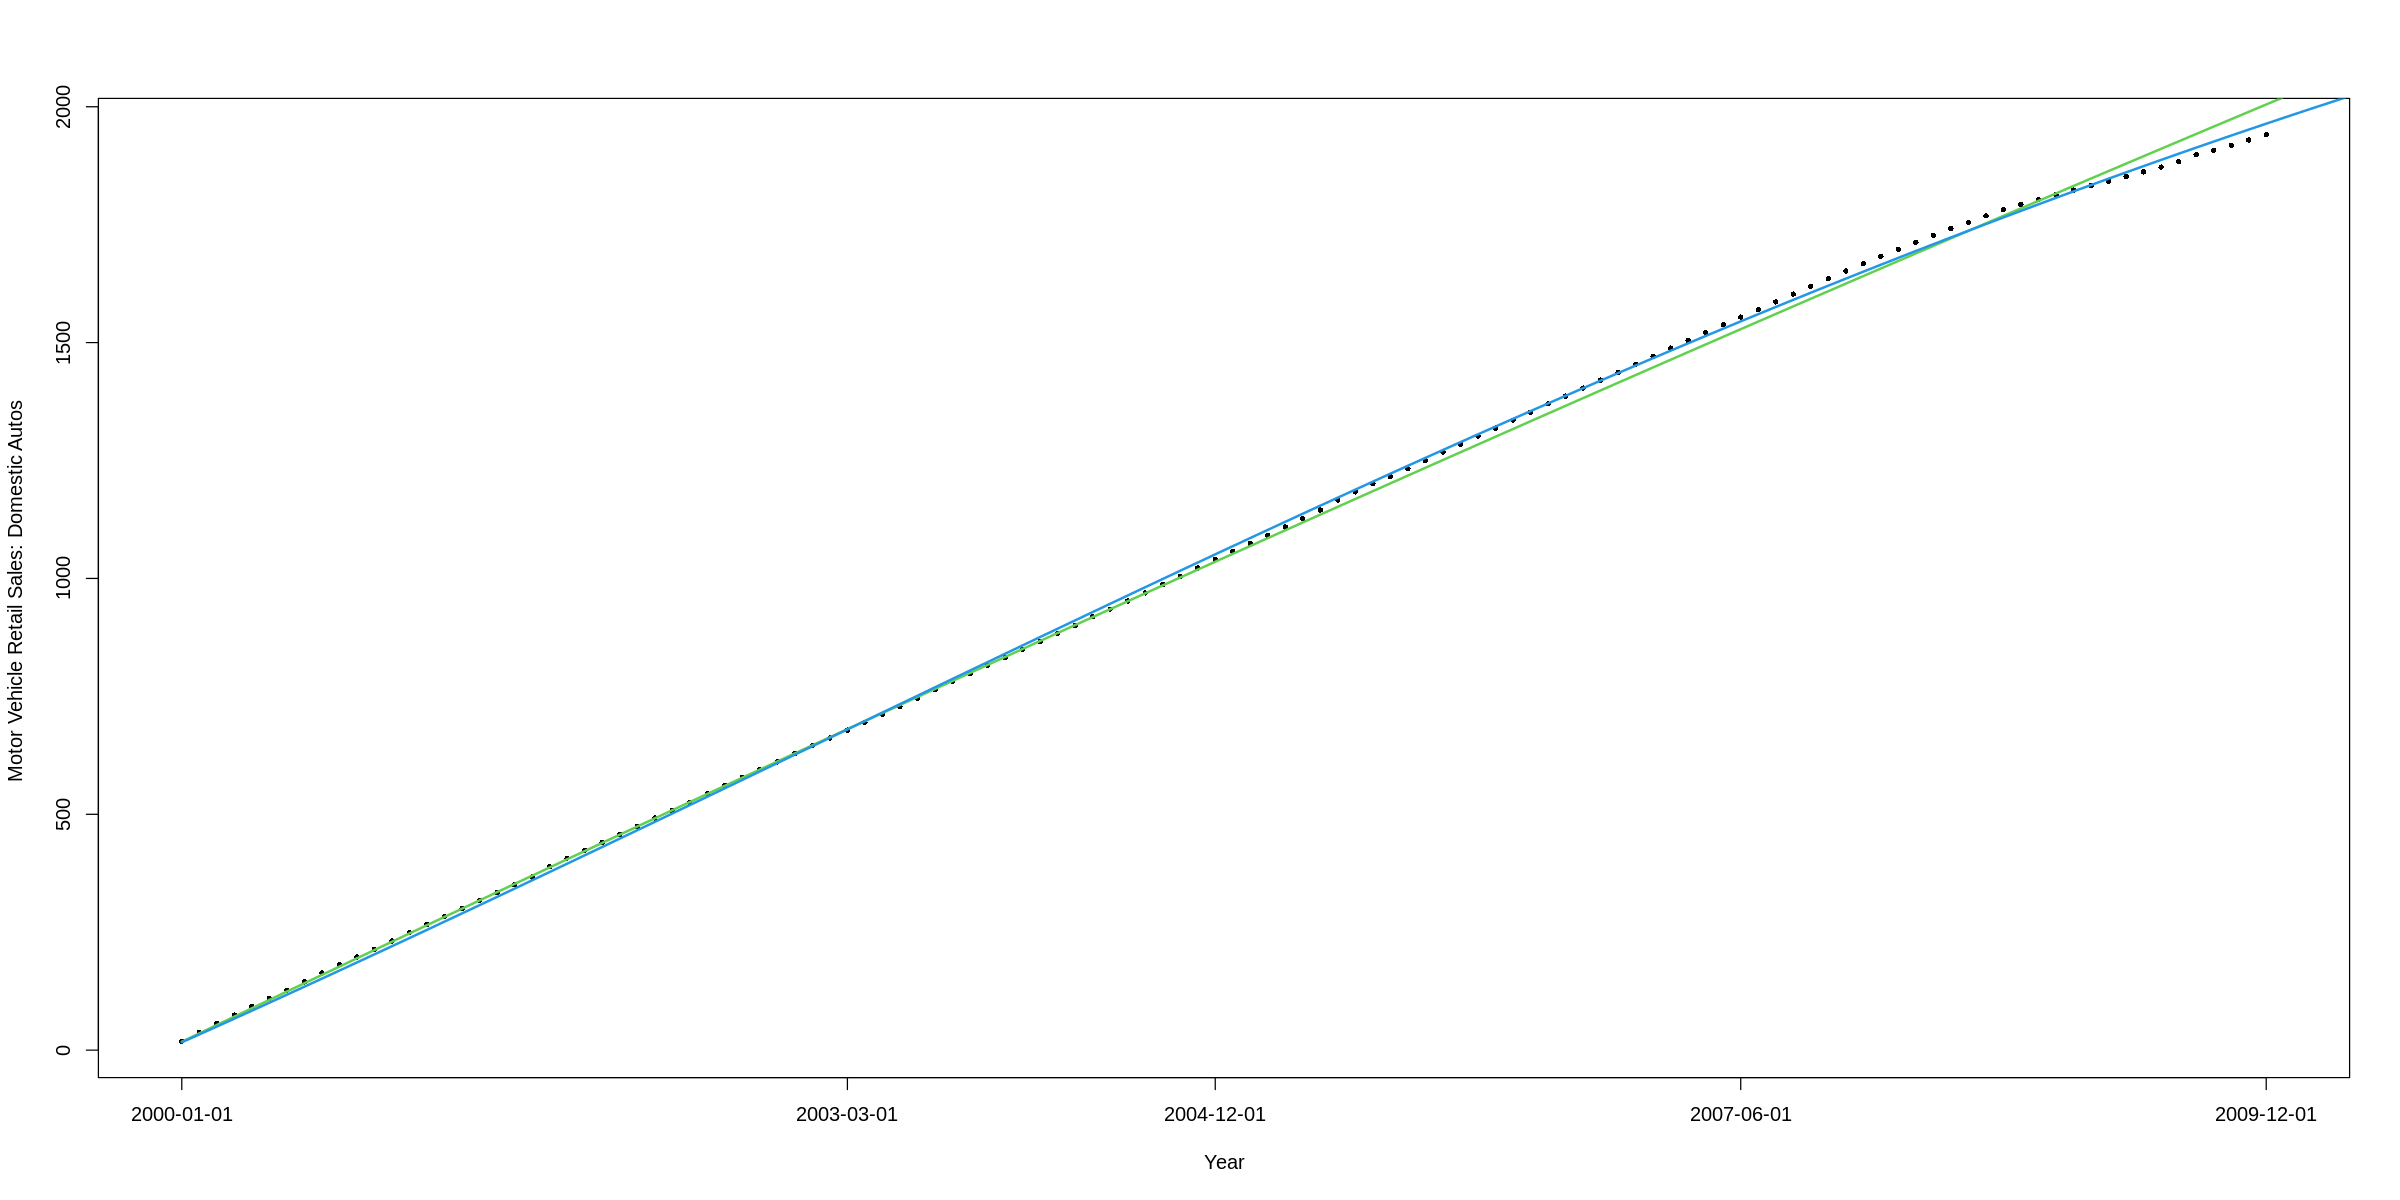

In [ ]:
###Comparison between models (cumulative)
plot(cumsum(s_9_ba), type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_0_9$DATE[c(1,39,60,90,120)])
lines(pred_bm_s950, lwd=2, col=3)
lines(pred_bm_s9, lwd=2, col=4)

#BM(sale(2009-2021))

In [ ]:
s_21 <-sail_total %>% filter(year>='2009'&year<='2021')

In [ ]:
NROW(s_21)

[1] 156

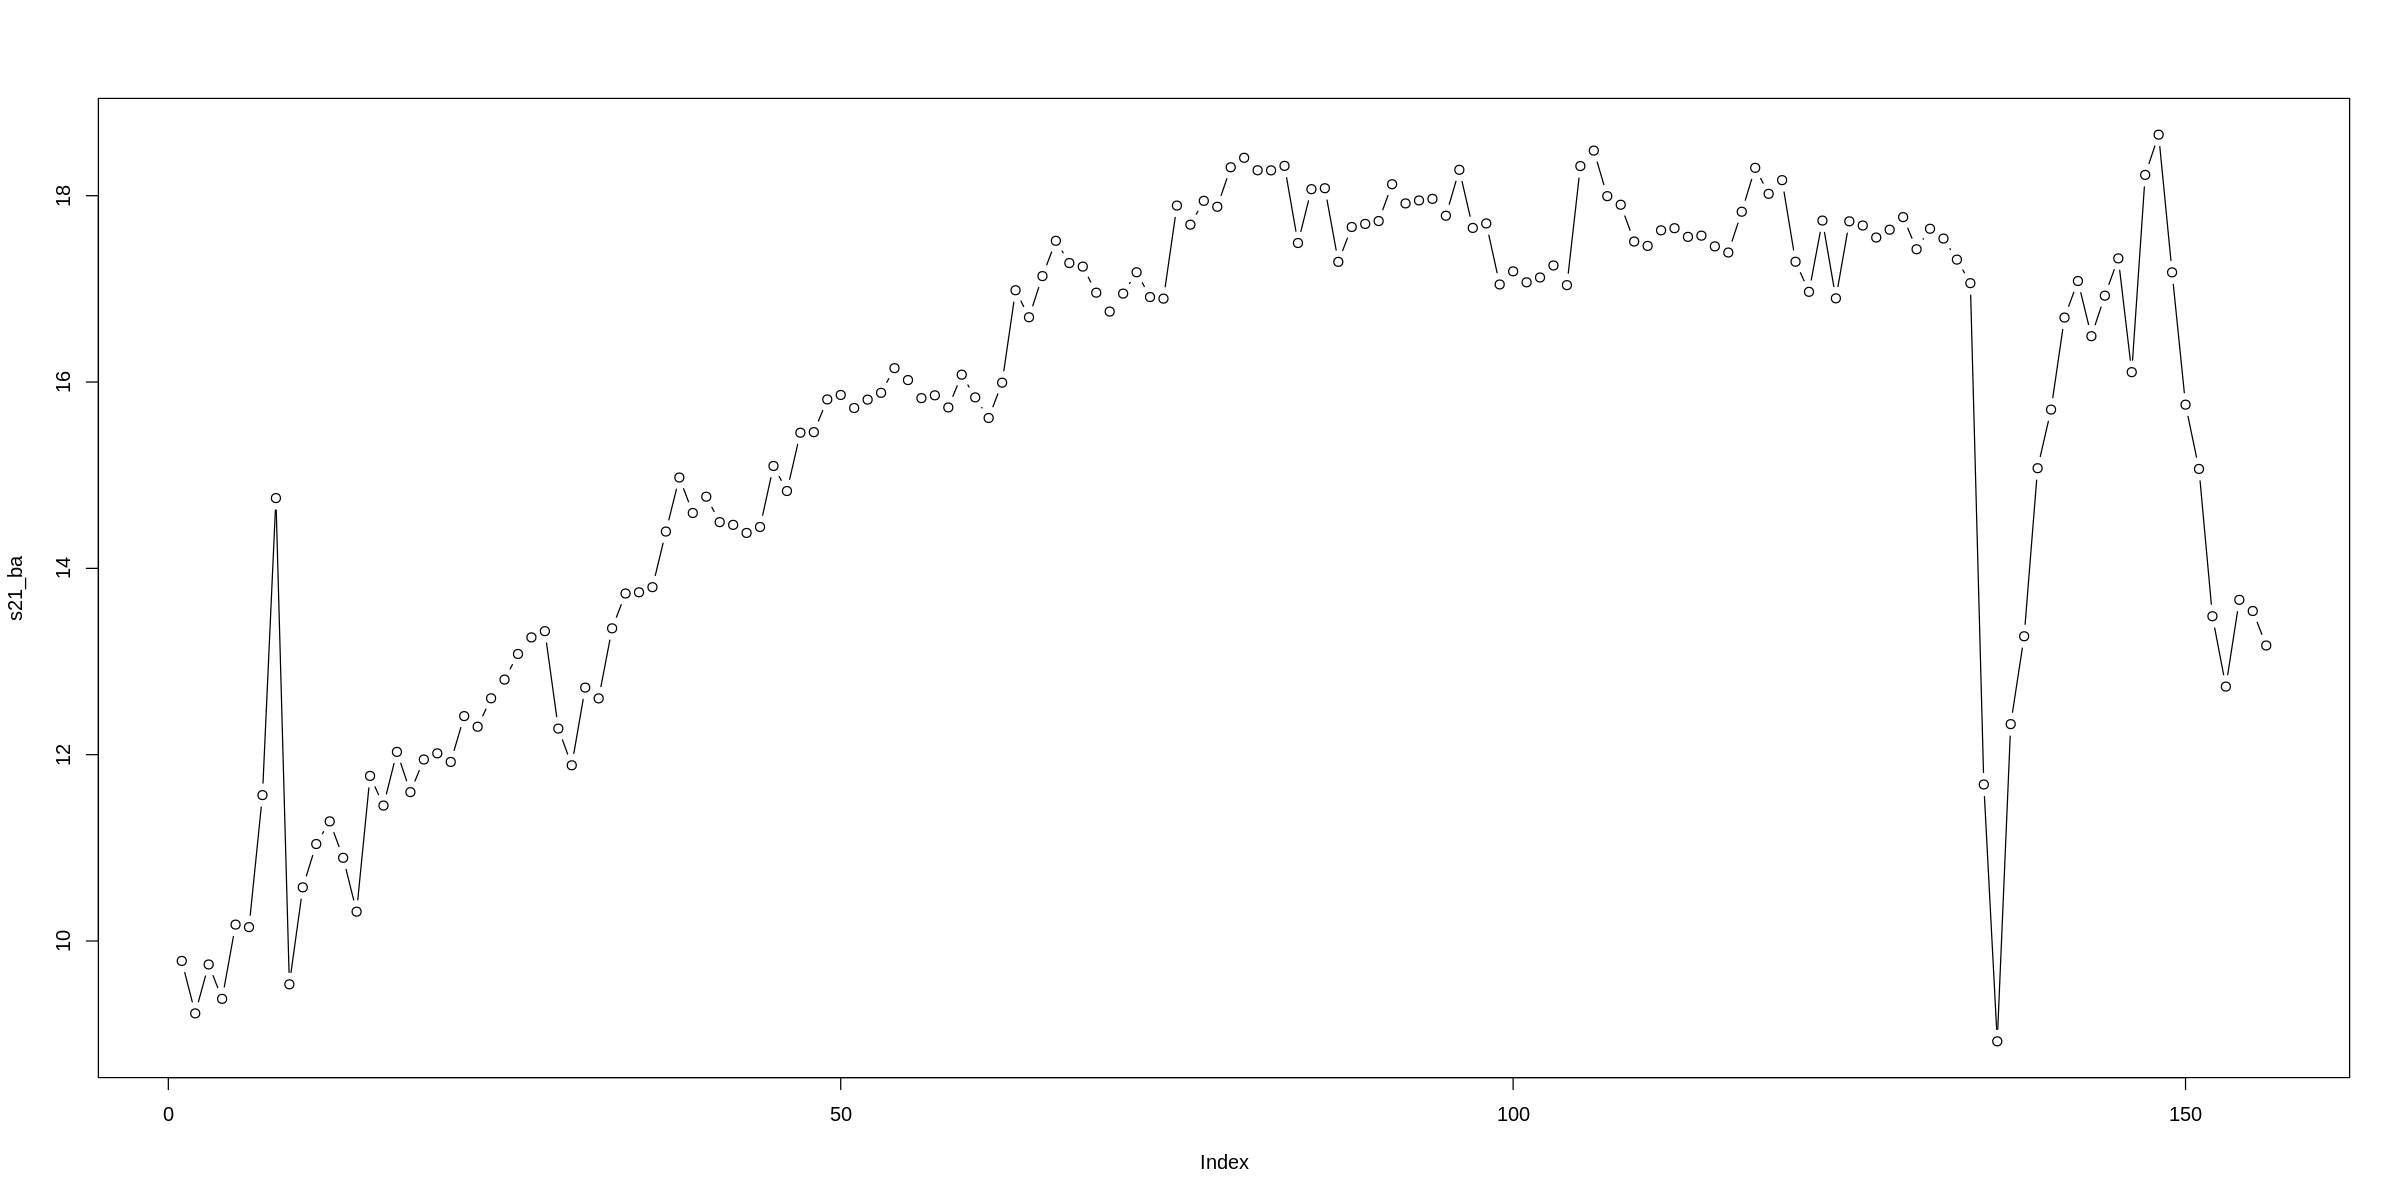

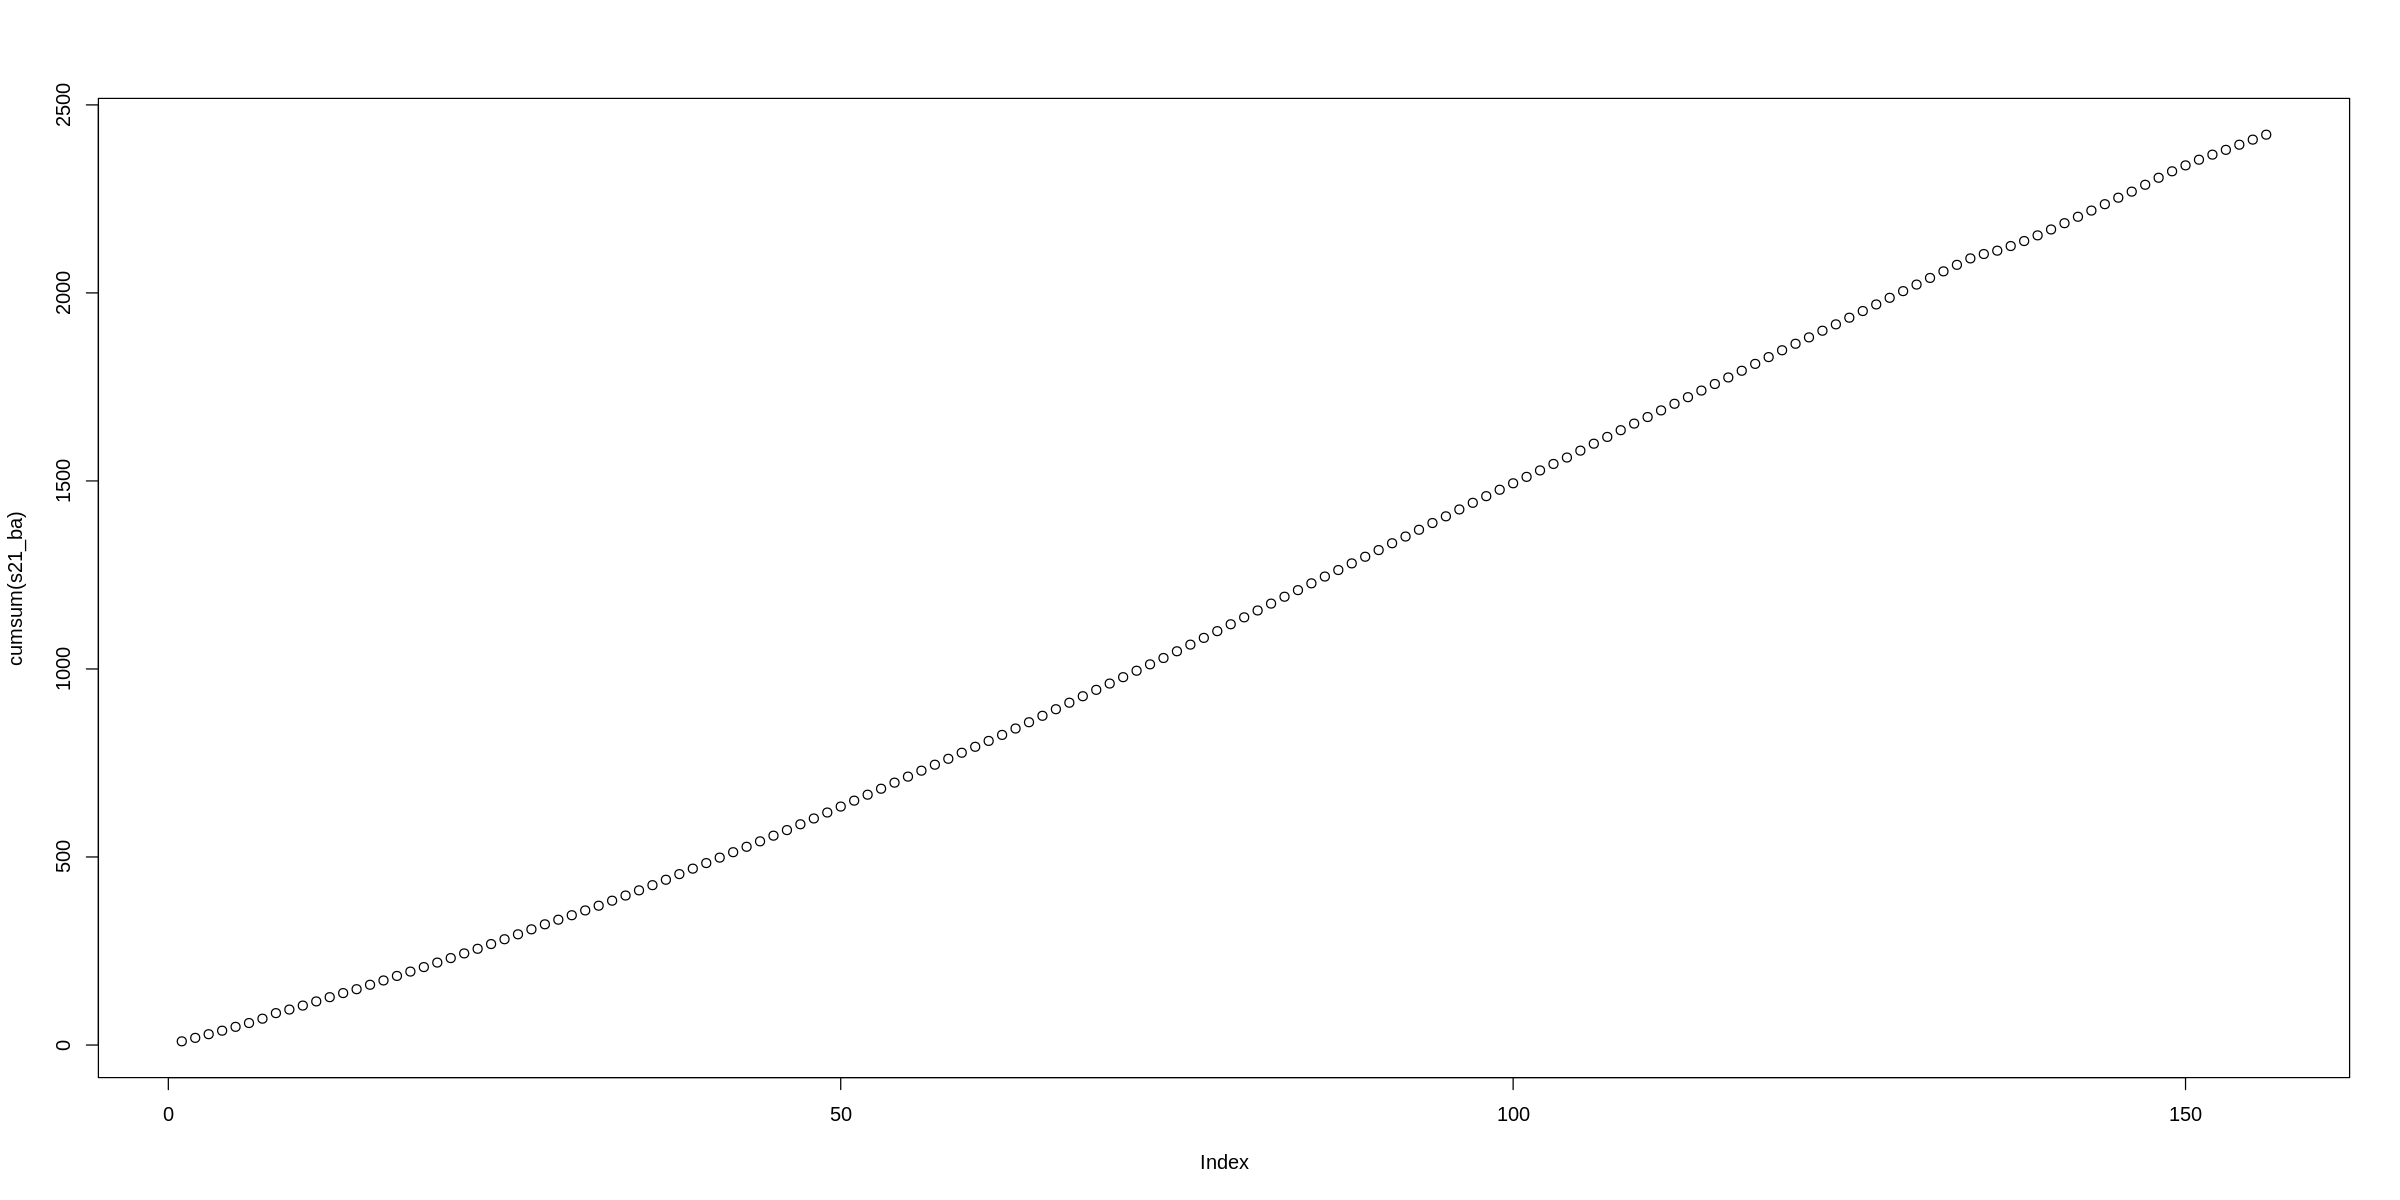

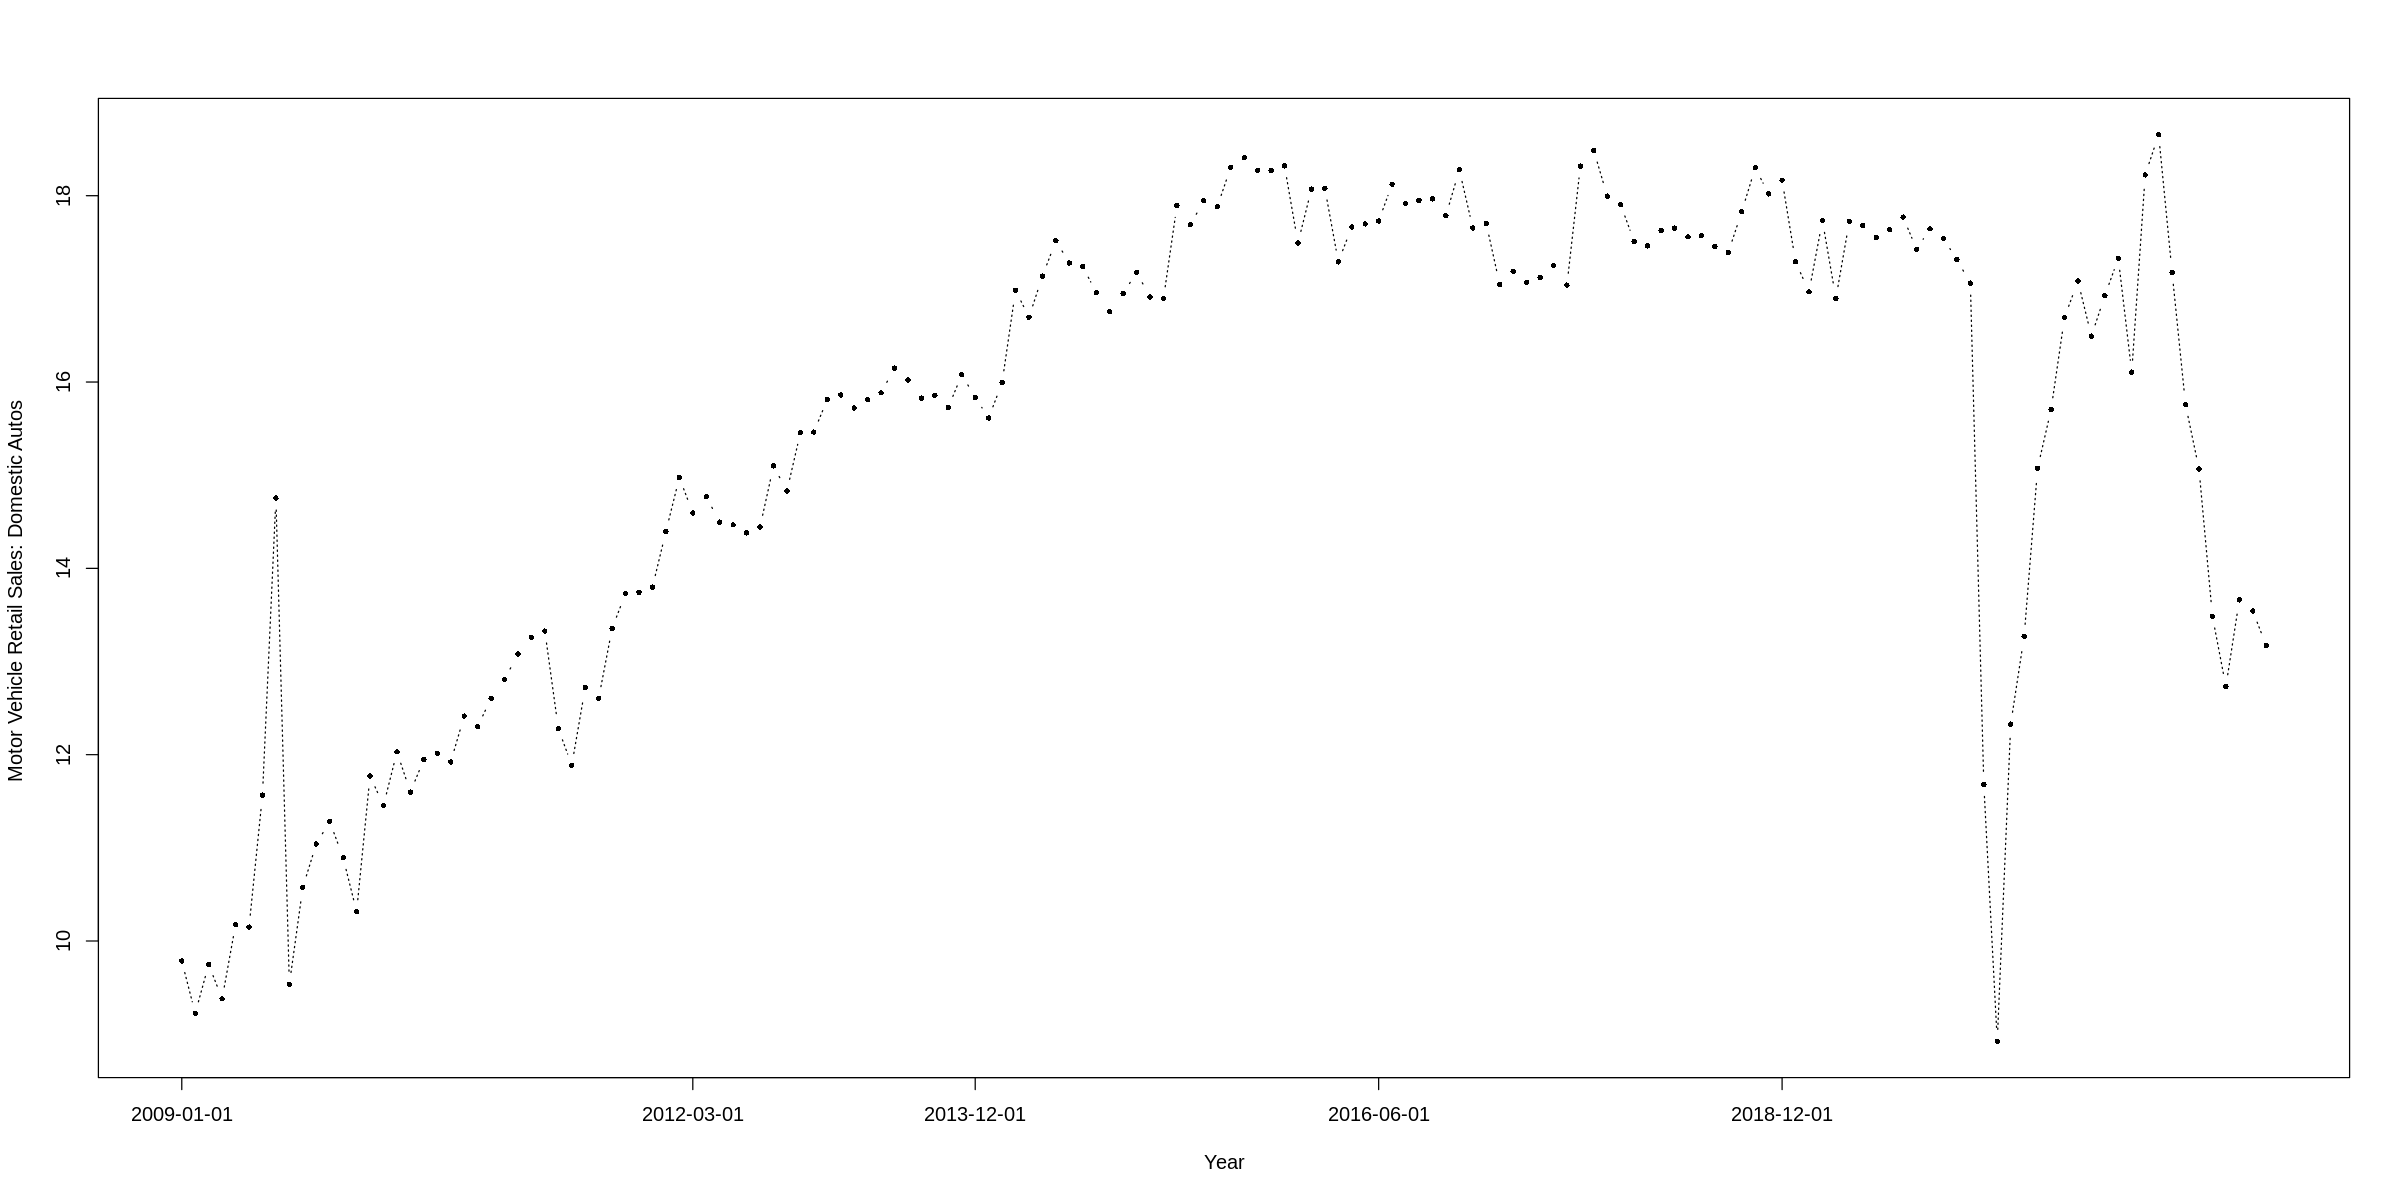

In [ ]:
##create the variable cassette
s21_ba<- s_21$TOTALSA[1:156]

###some simple plots
plot(s21_ba, type="b")
plot(cumsum(s21_ba), type="b")

###a better plot of the yearly time series
plot(s21_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_21$DATE[c(1,39,60,90,120)])

Call: ( Standard Bass Model )

  BM(series = s21_ba, display = T)

Residuals:
      Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-10.97802  -1.65157  -0.03197  -0.07658   1.39959   8.20903 

Coefficients:
       Estimate    Std.Error        Lower        Upper   p-value    
m 3.549980e+03 1.112515e+01 3.528175e+03 3.571785e+03 6.14e-218 ***
p 2.761177e-03 4.999839e-06 2.751377e-03 2.770976e-03 2.37e-254 ***
q 1.422622e-02 6.699264e-05 1.409492e-02 1.435753e-02 6.10e-191 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  3.214532  on  153  degrees of freedom
 Multiple R-squared:   0.999994  Residual sum of squares:  1580.982


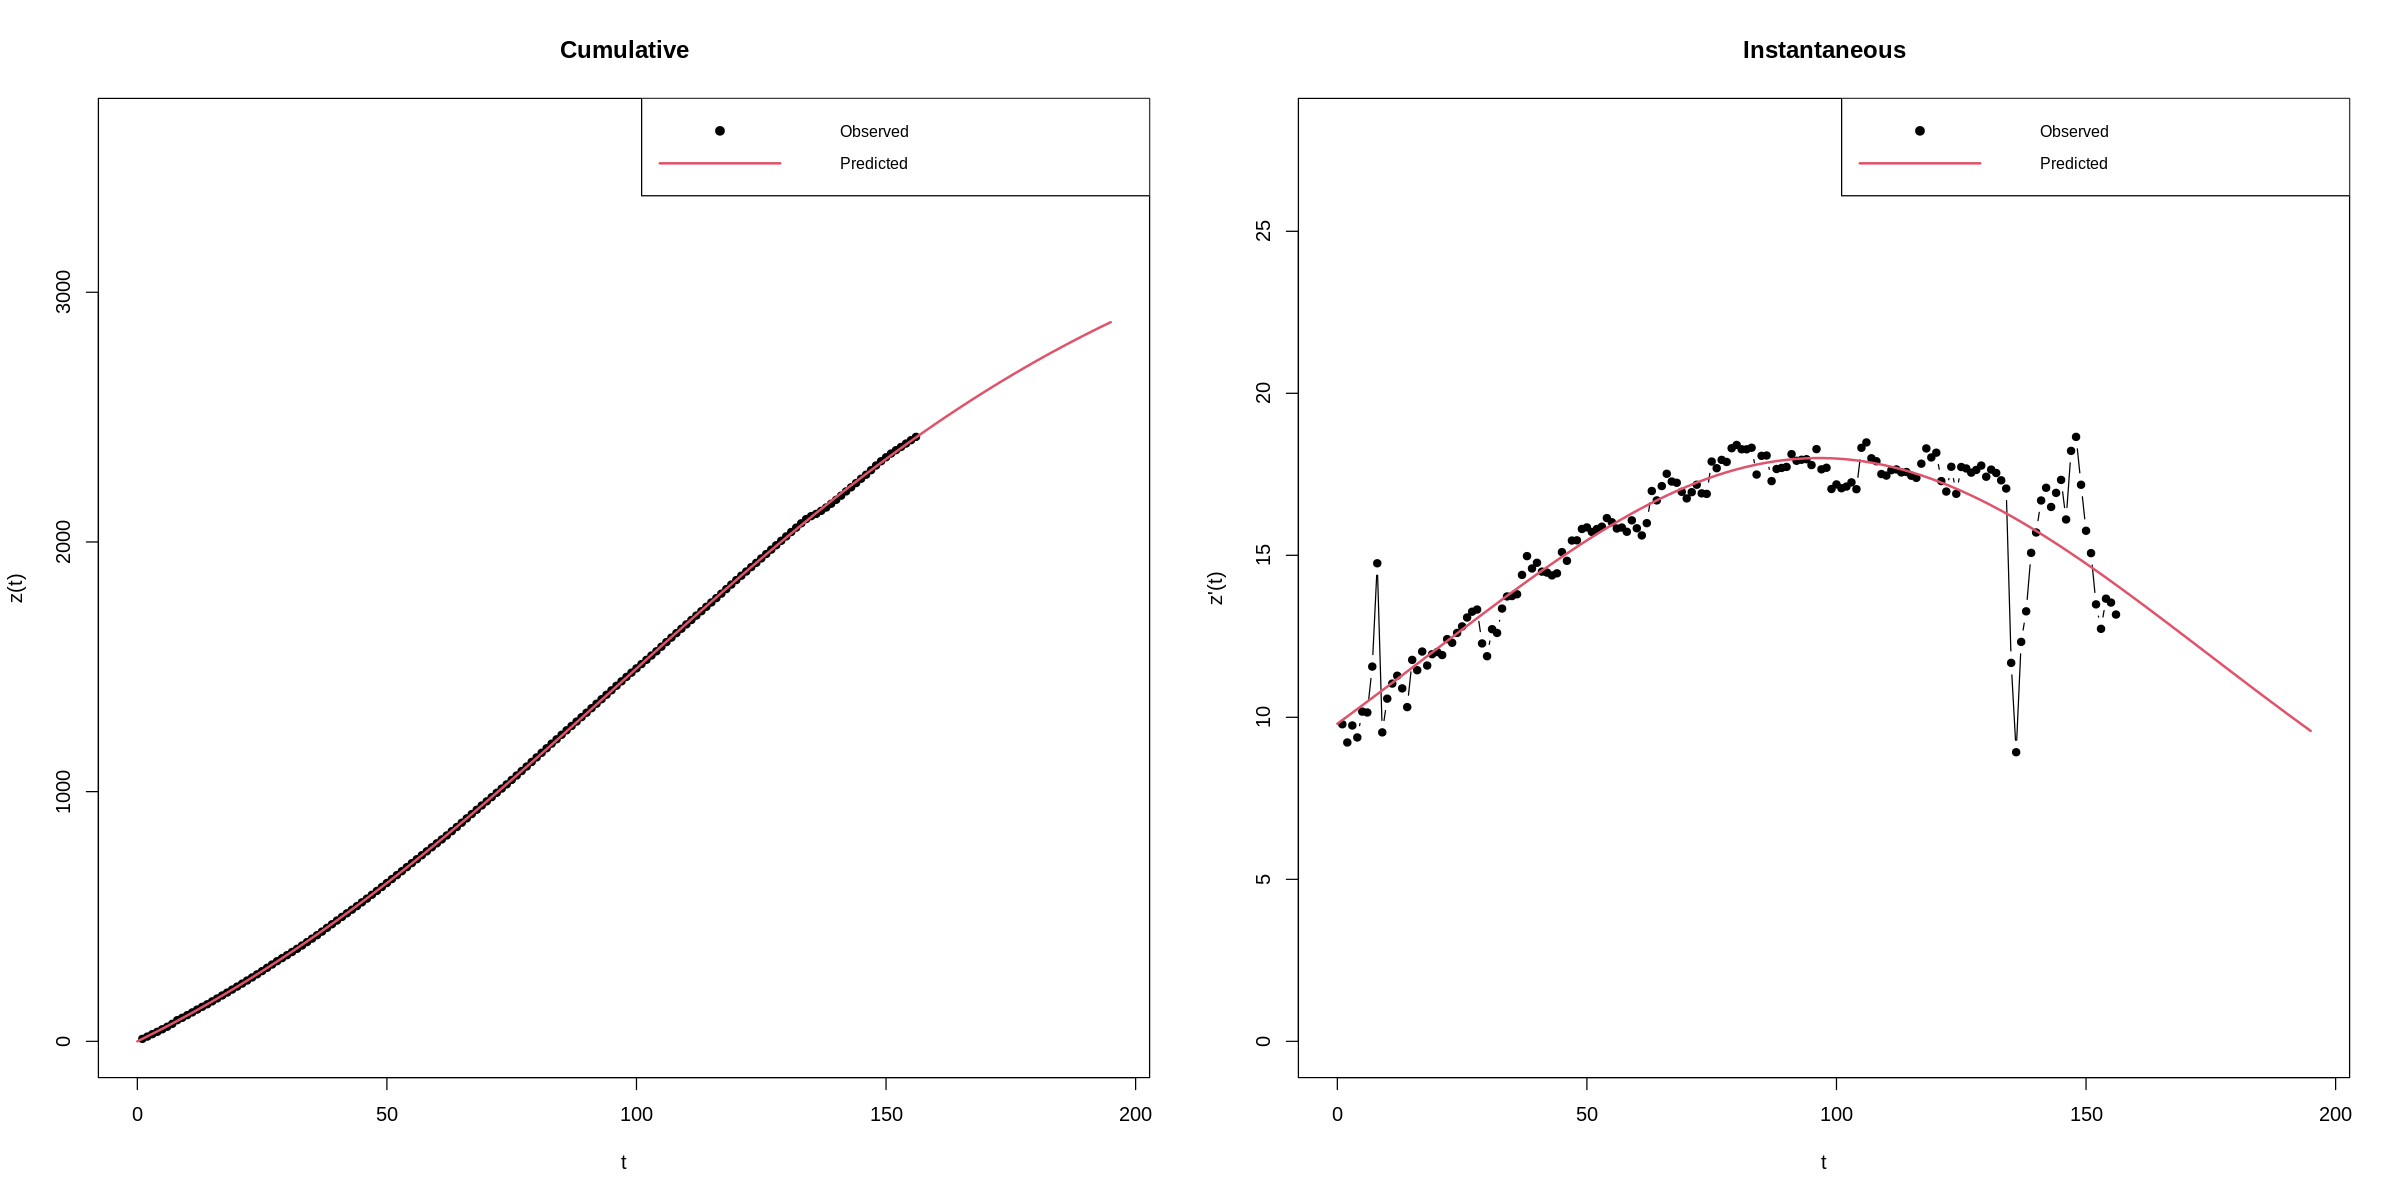

In [ ]:
###we estimate a simple Bass Model
bm_s21<-BM(s21_ba,display = T)
summary(bm_s21)

In [ ]:
###prediction (out-of-sample)
pred_bm_s21<- predict(bm_s21, newx=c(1:200))
pred.inst_s21<- make.instantaneous(pred_bm_s21)

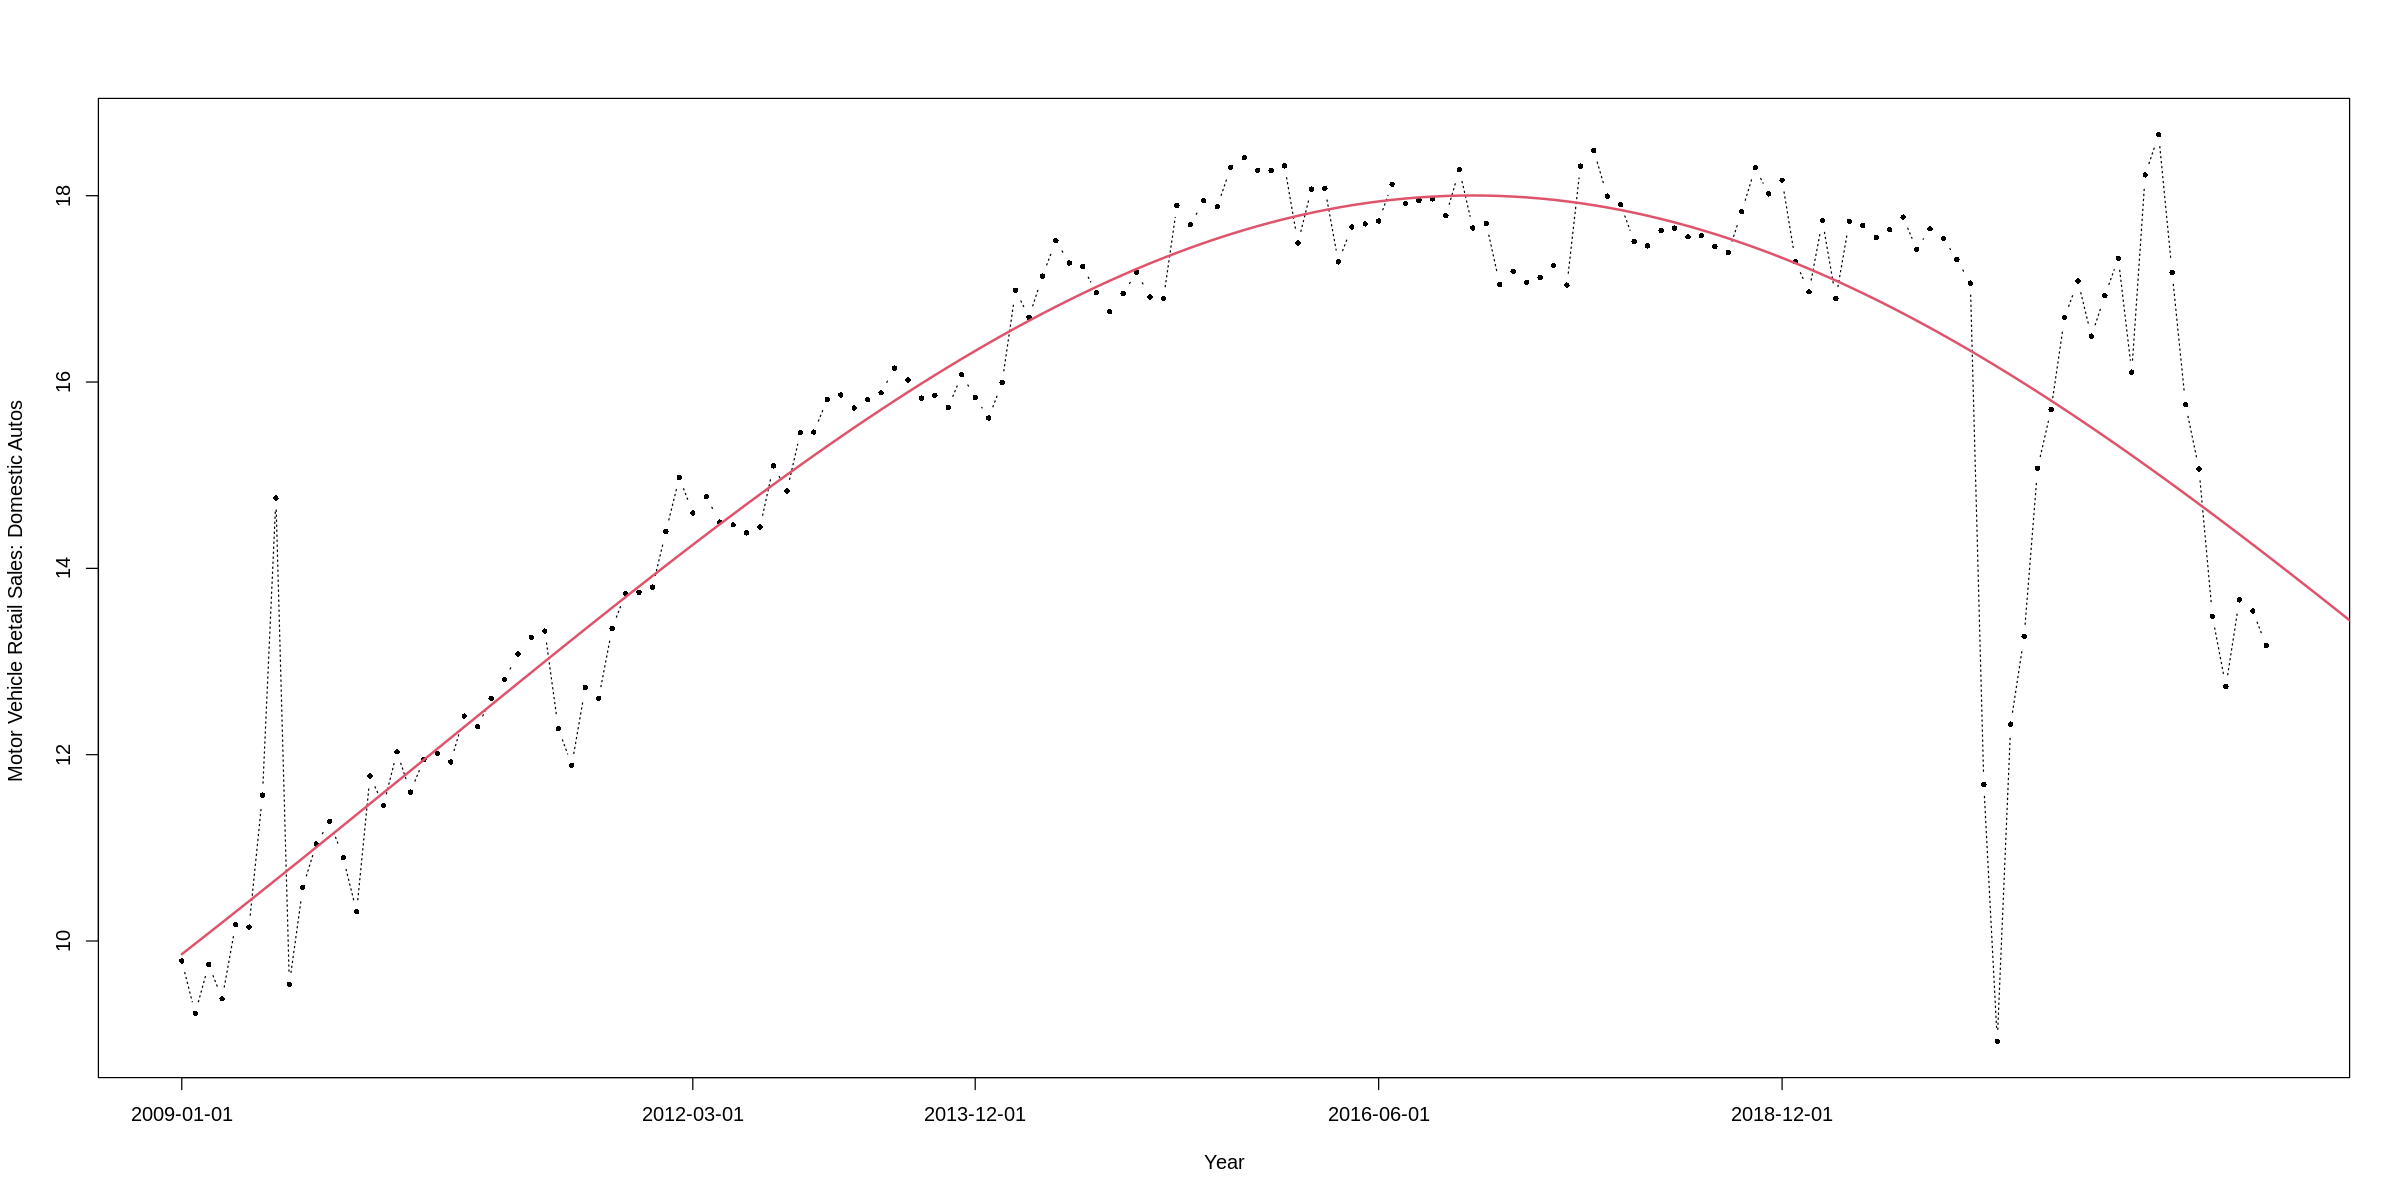

In [ ]:
###plot of fitted model
plot(s21_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_21$DATE[c(1,39,60,90,120)])
lines(pred.inst_s21, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = s21_ba[1:85], display = T)

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.43452 -0.79118  0.13169 -0.02527  0.80925  2.69031 

Coefficients:
       Estimate    Std.Error        Lower        Upper  p-value    
m 3.826692e+03 7.553320e+01 3.678650e+03 3.974734e+03 1.18e-63 ***
p 2.565342e-03 4.634452e-05 2.474508e-03 2.656175e-03 1.02e-66 ***
q 1.375124e-02 1.594399e-04 1.343874e-02 1.406374e-02 3.06e-82 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  1.137708  on  82  degrees of freedom
 Multiple R-squared:   0.999997  Residual sum of squares:  106.1392


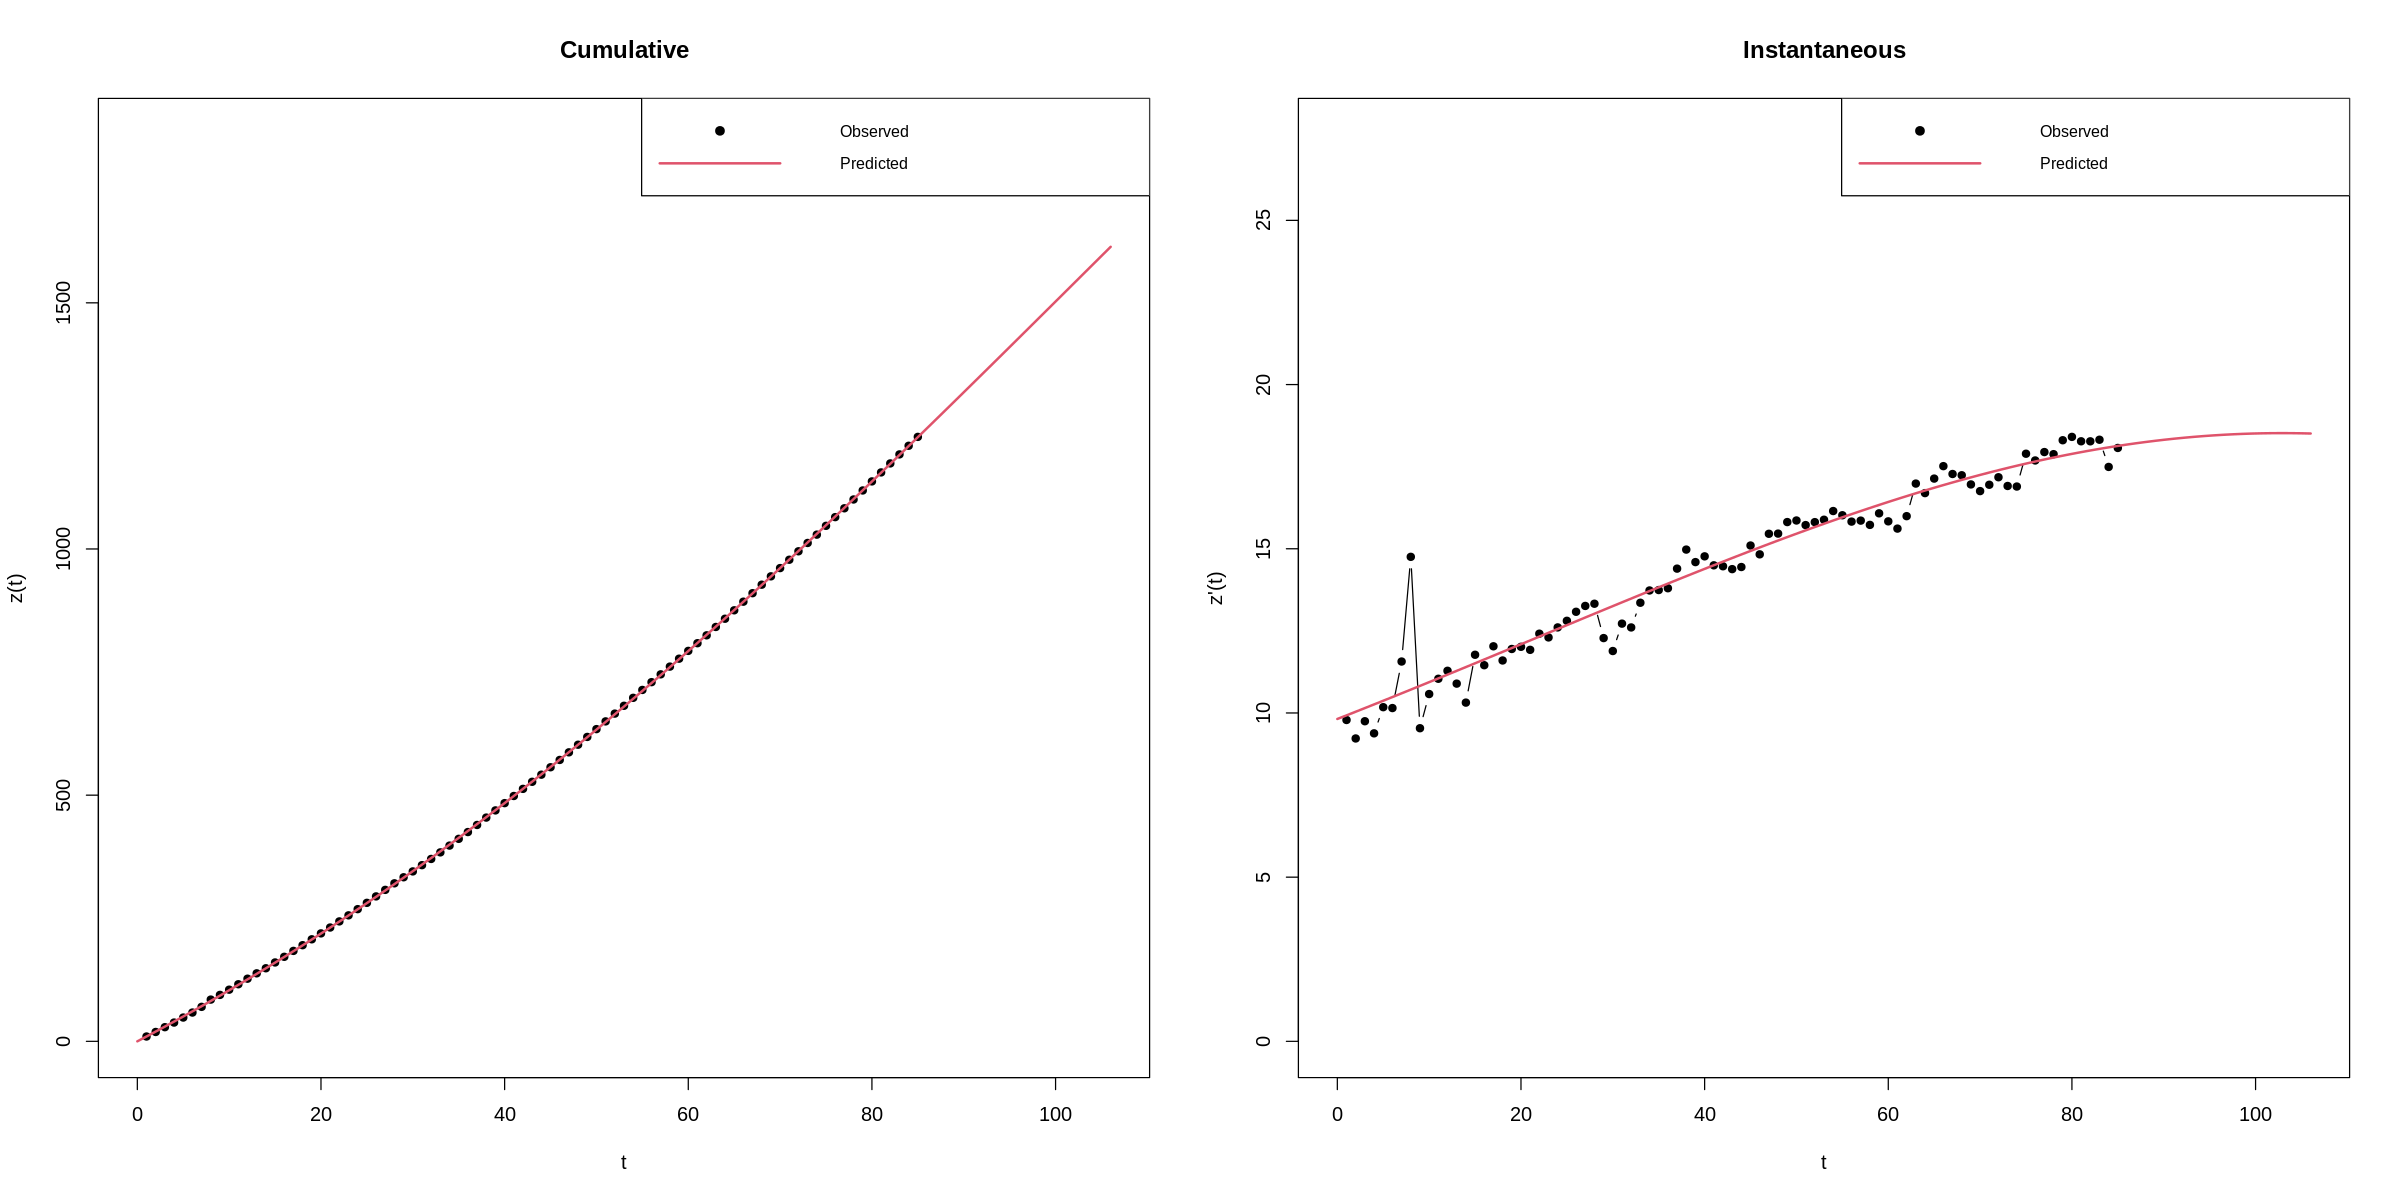

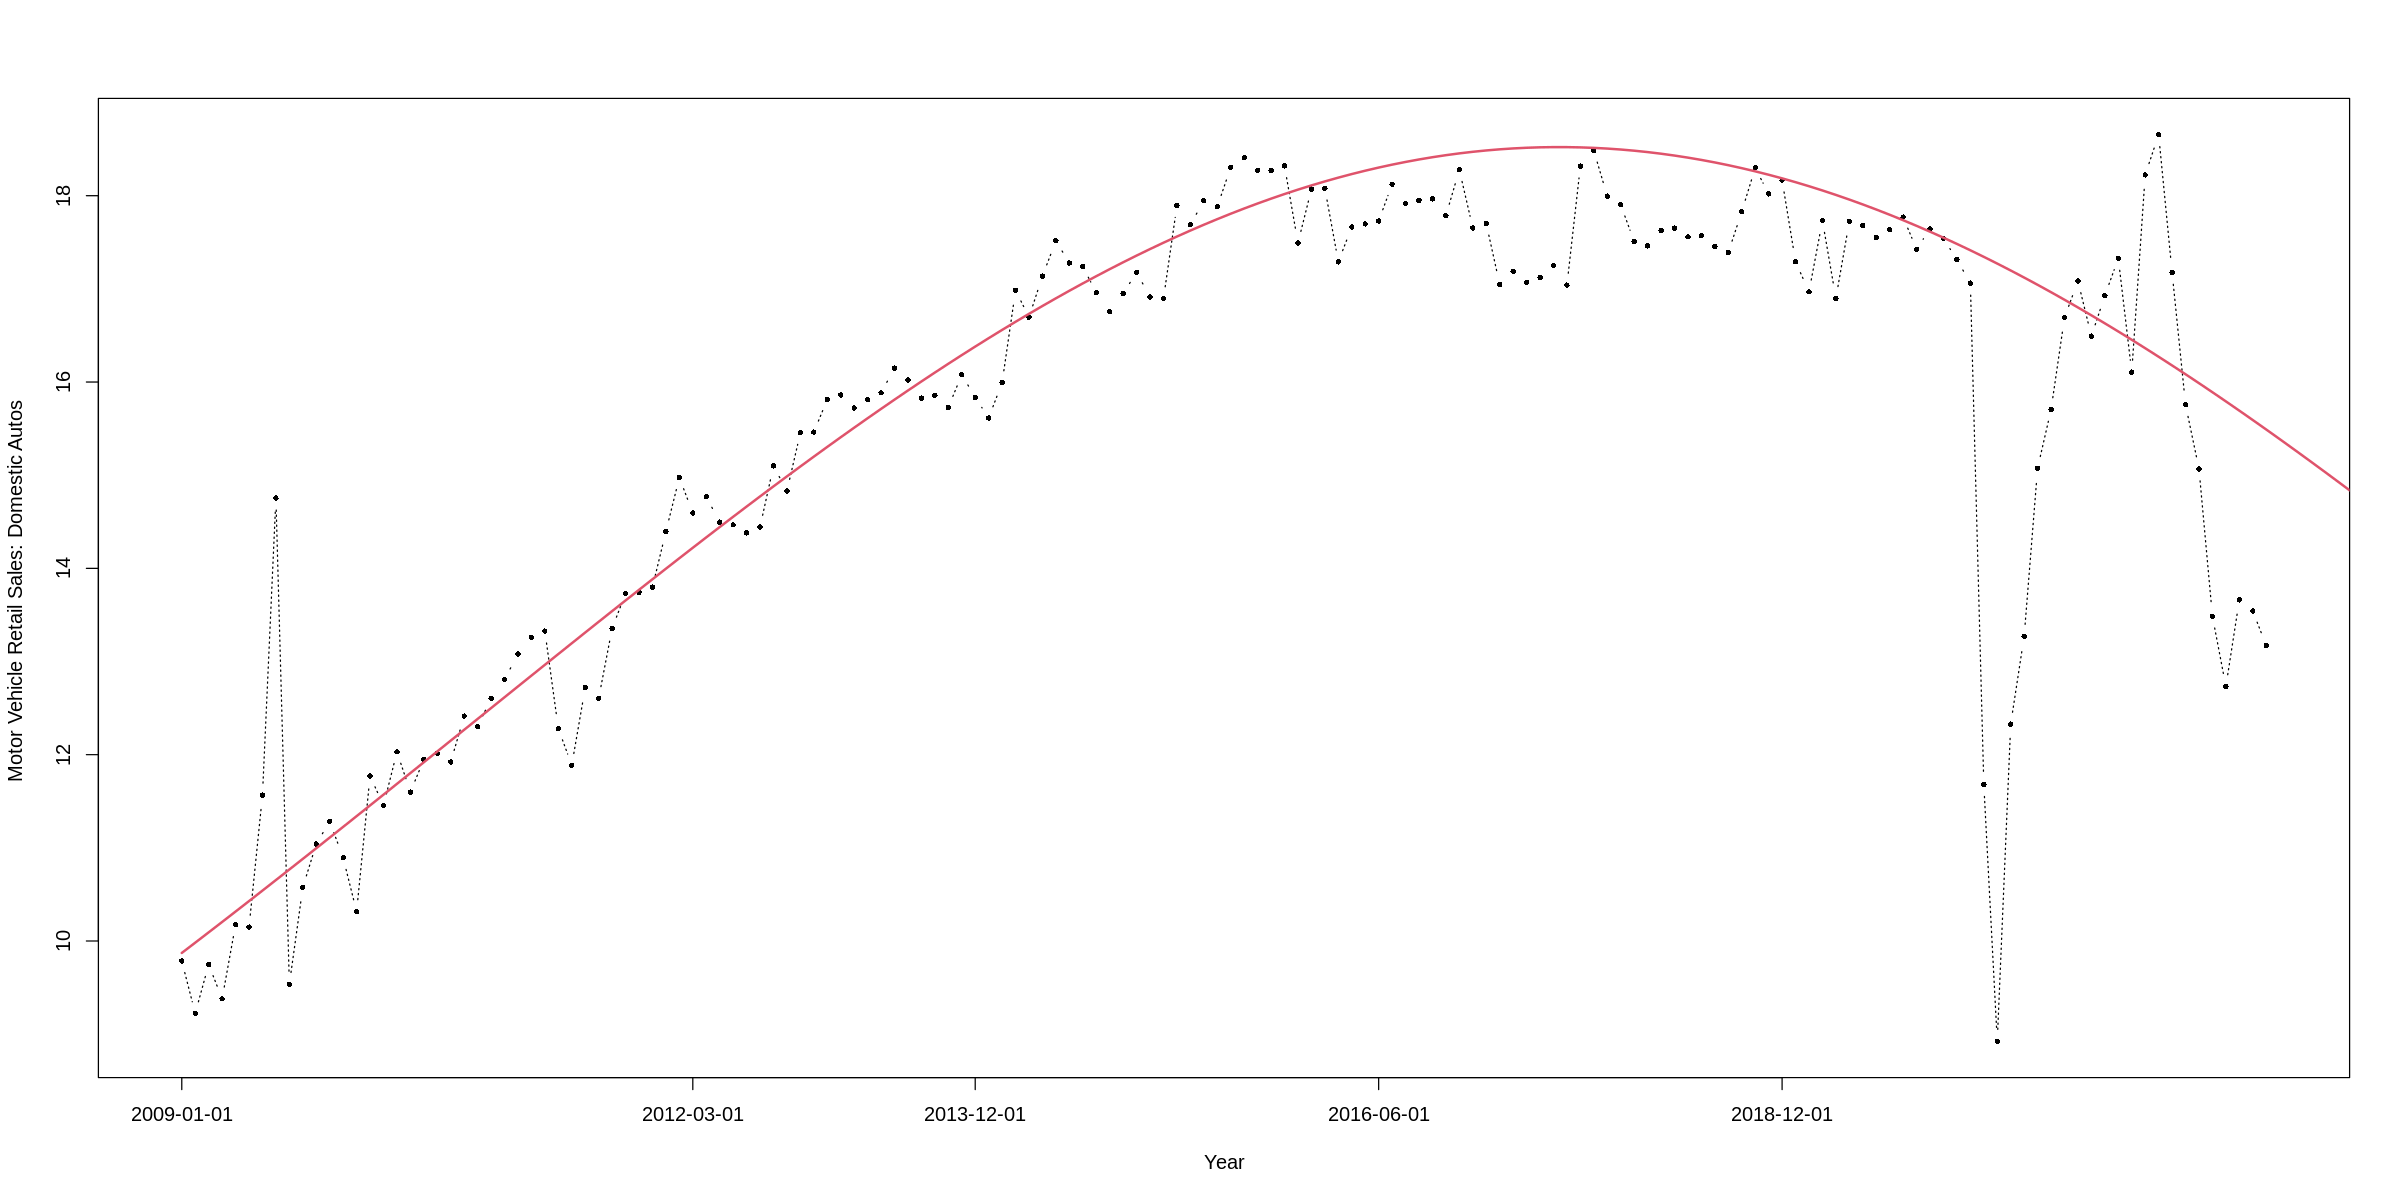

In [ ]:
###we estimate the model with 50% of the data

bm_s2150<-BM(s21_ba[1:85],display = T)
summary(bm_s2150)

pred_bm_s2150<- predict(bm_s2150, newx=c(1:200))
pred.inst_s2150<- make.instantaneous(pred_bm_s2150)

plot(s21_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_21$DATE[c(1,39,60,90,120)])
lines(pred.inst_s2150, lwd=2, col=2)

Call: ( Standard Bass Model )

  BM(series = s21_ba[1:43], display = T)

Residuals:
    Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.7935 -0.9782  0.1144 -0.1111  0.7275  2.2738 

Coefficients:
       Estimate    Std.Error         Lower        Upper  p-value    
m 5.700888e+03 3.747077e+03 -1.643248e+03 1.304502e+04 1.36e-01    
p 1.736733e-03 1.148694e-03 -5.146662e-04 3.988133e-03 1.38e-01    
q 1.198649e-02 1.933336e-03  8.197226e-03 1.577576e-02 2.47e-07 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  1.187484  on  40  degrees of freedom
 Multiple R-squared:   0.999984  Residual sum of squares:  56.40475


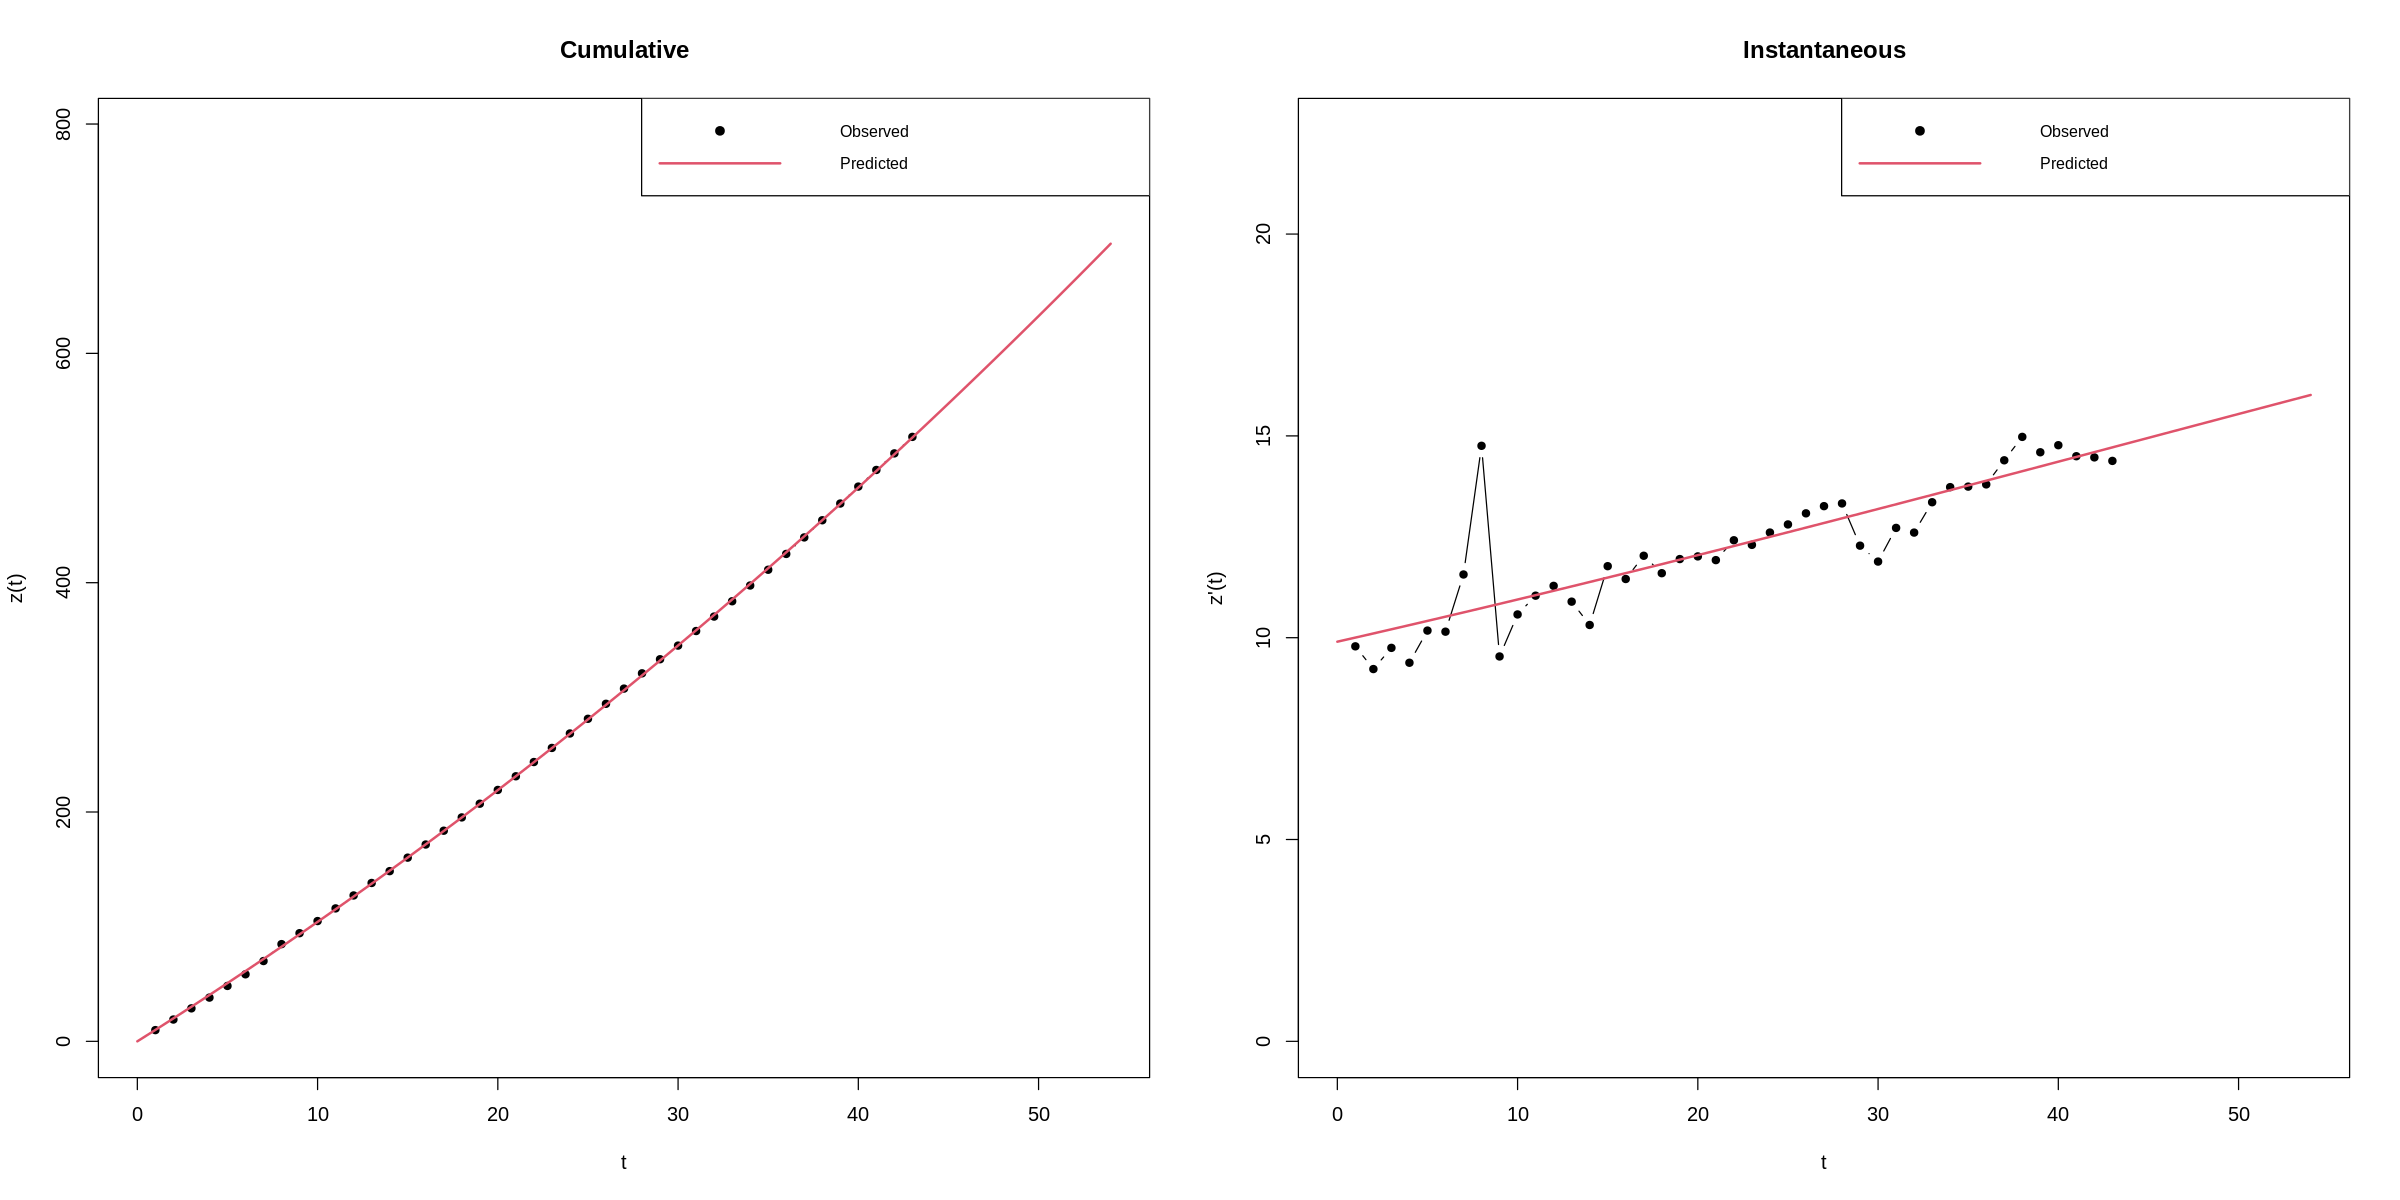

In [ ]:
###we estimate the model with 25% of the data
bm_s2175<-BM(s21_ba[1:43],display = T)
summary(bm_s2175)

pred_bm_s2175<- predict(bm_s2175, newx=c(1:200))
pred.inst_s2175<- make.instantaneous(pred_bm_s2175)

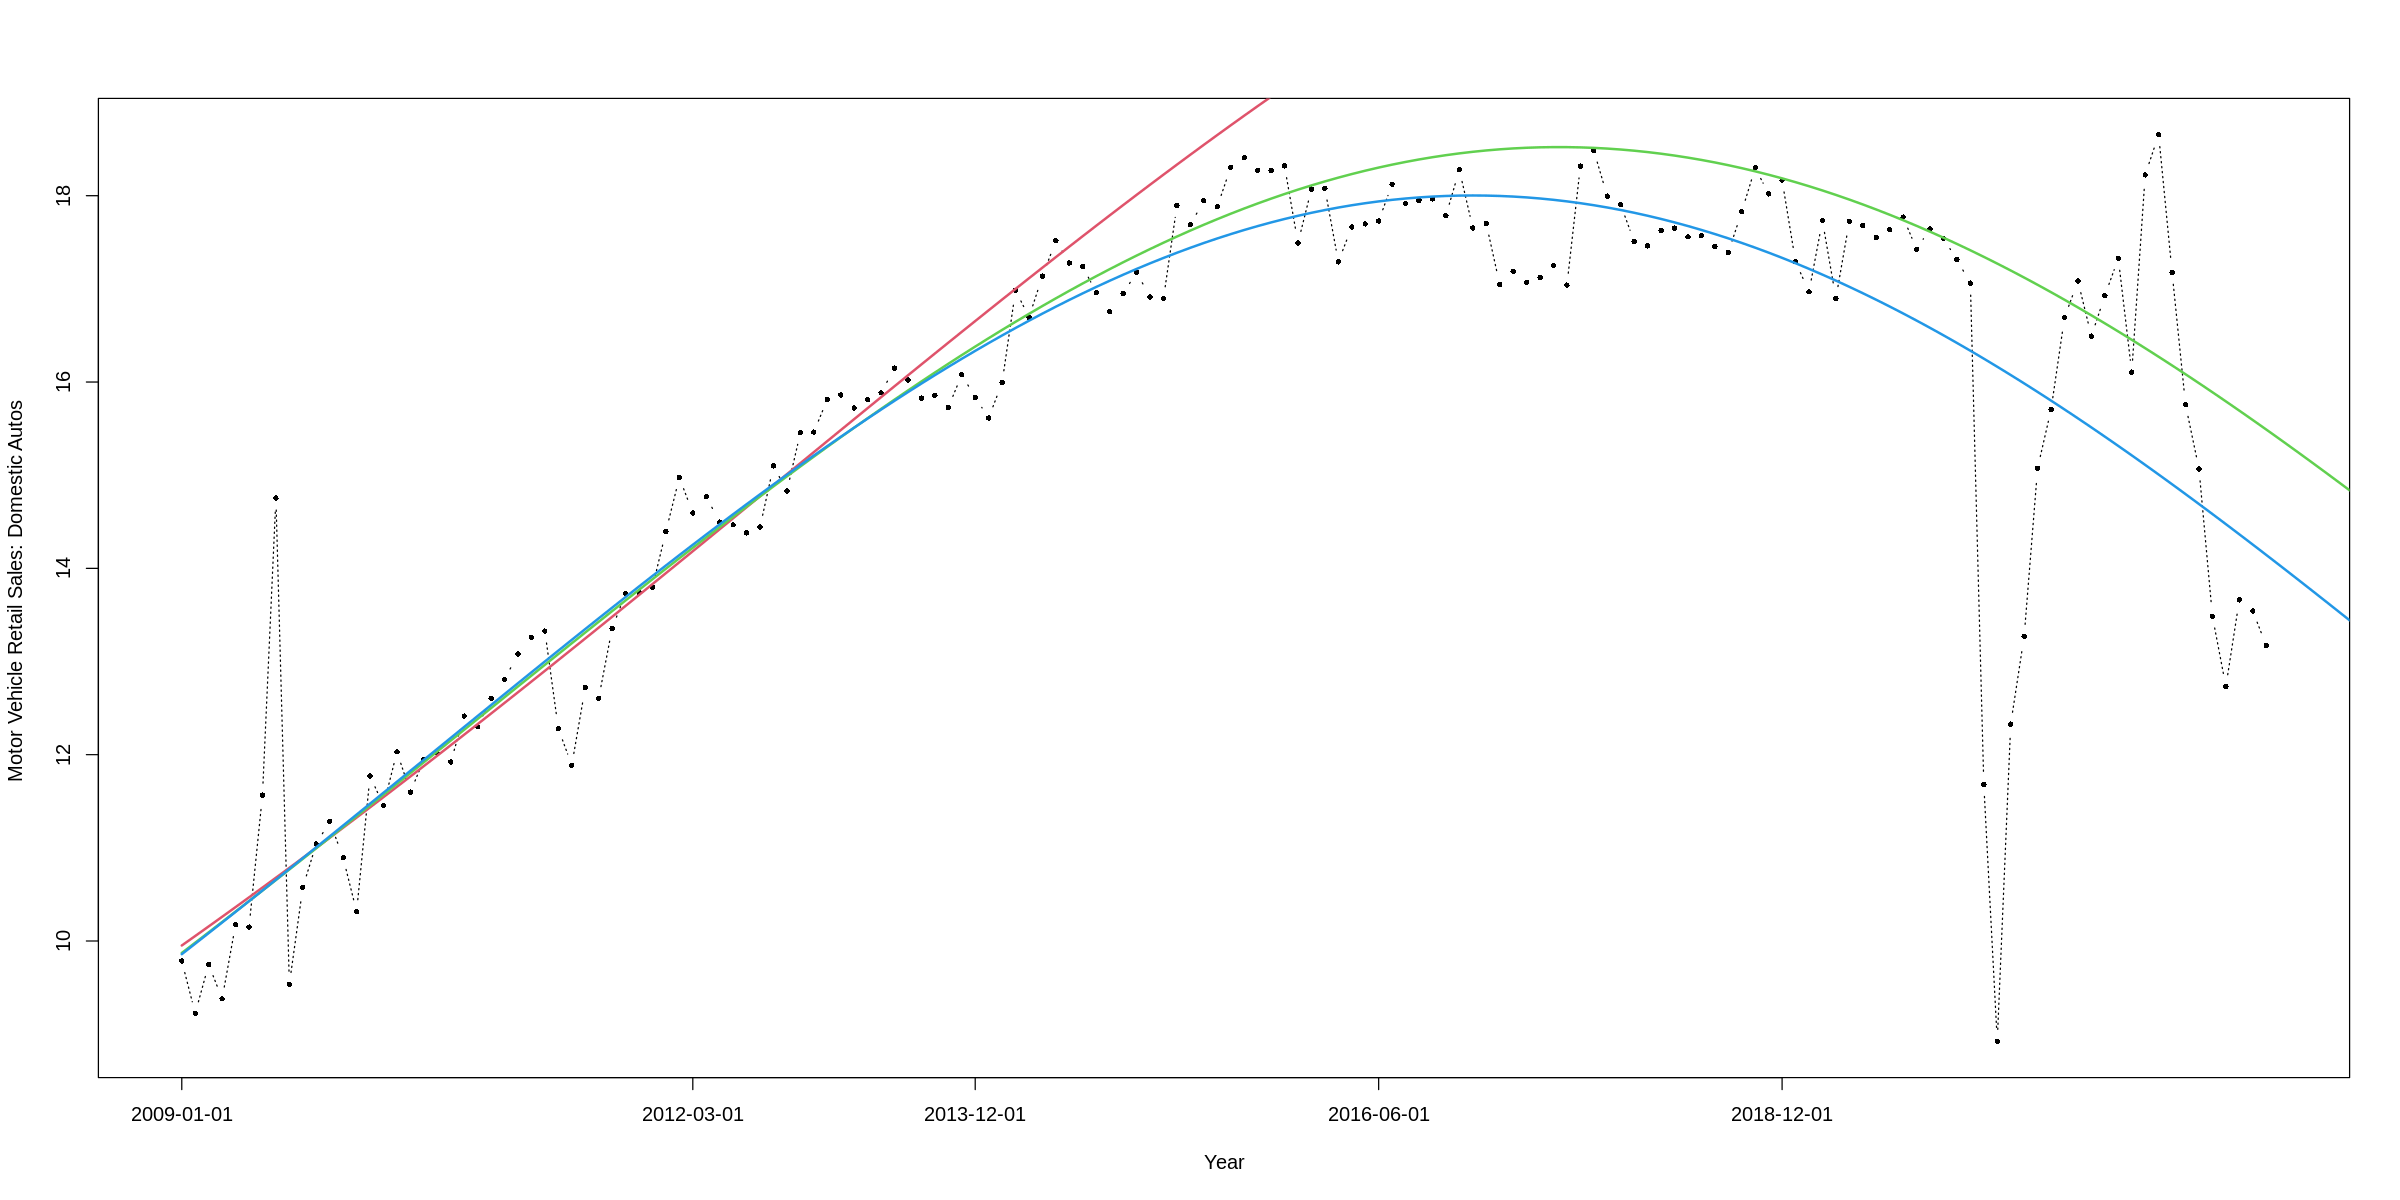

In [ ]:
###Comparison between models (instantaneous)
###instantaneous
plot(s21_ba, type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_21$DATE[c(1,39,60,90,120)])
lines(pred.inst_s2175, lwd=2, col=2)
lines(pred.inst_s2150, lwd=2, col=3)
lines(pred.inst_s21, lwd=2, col=4)

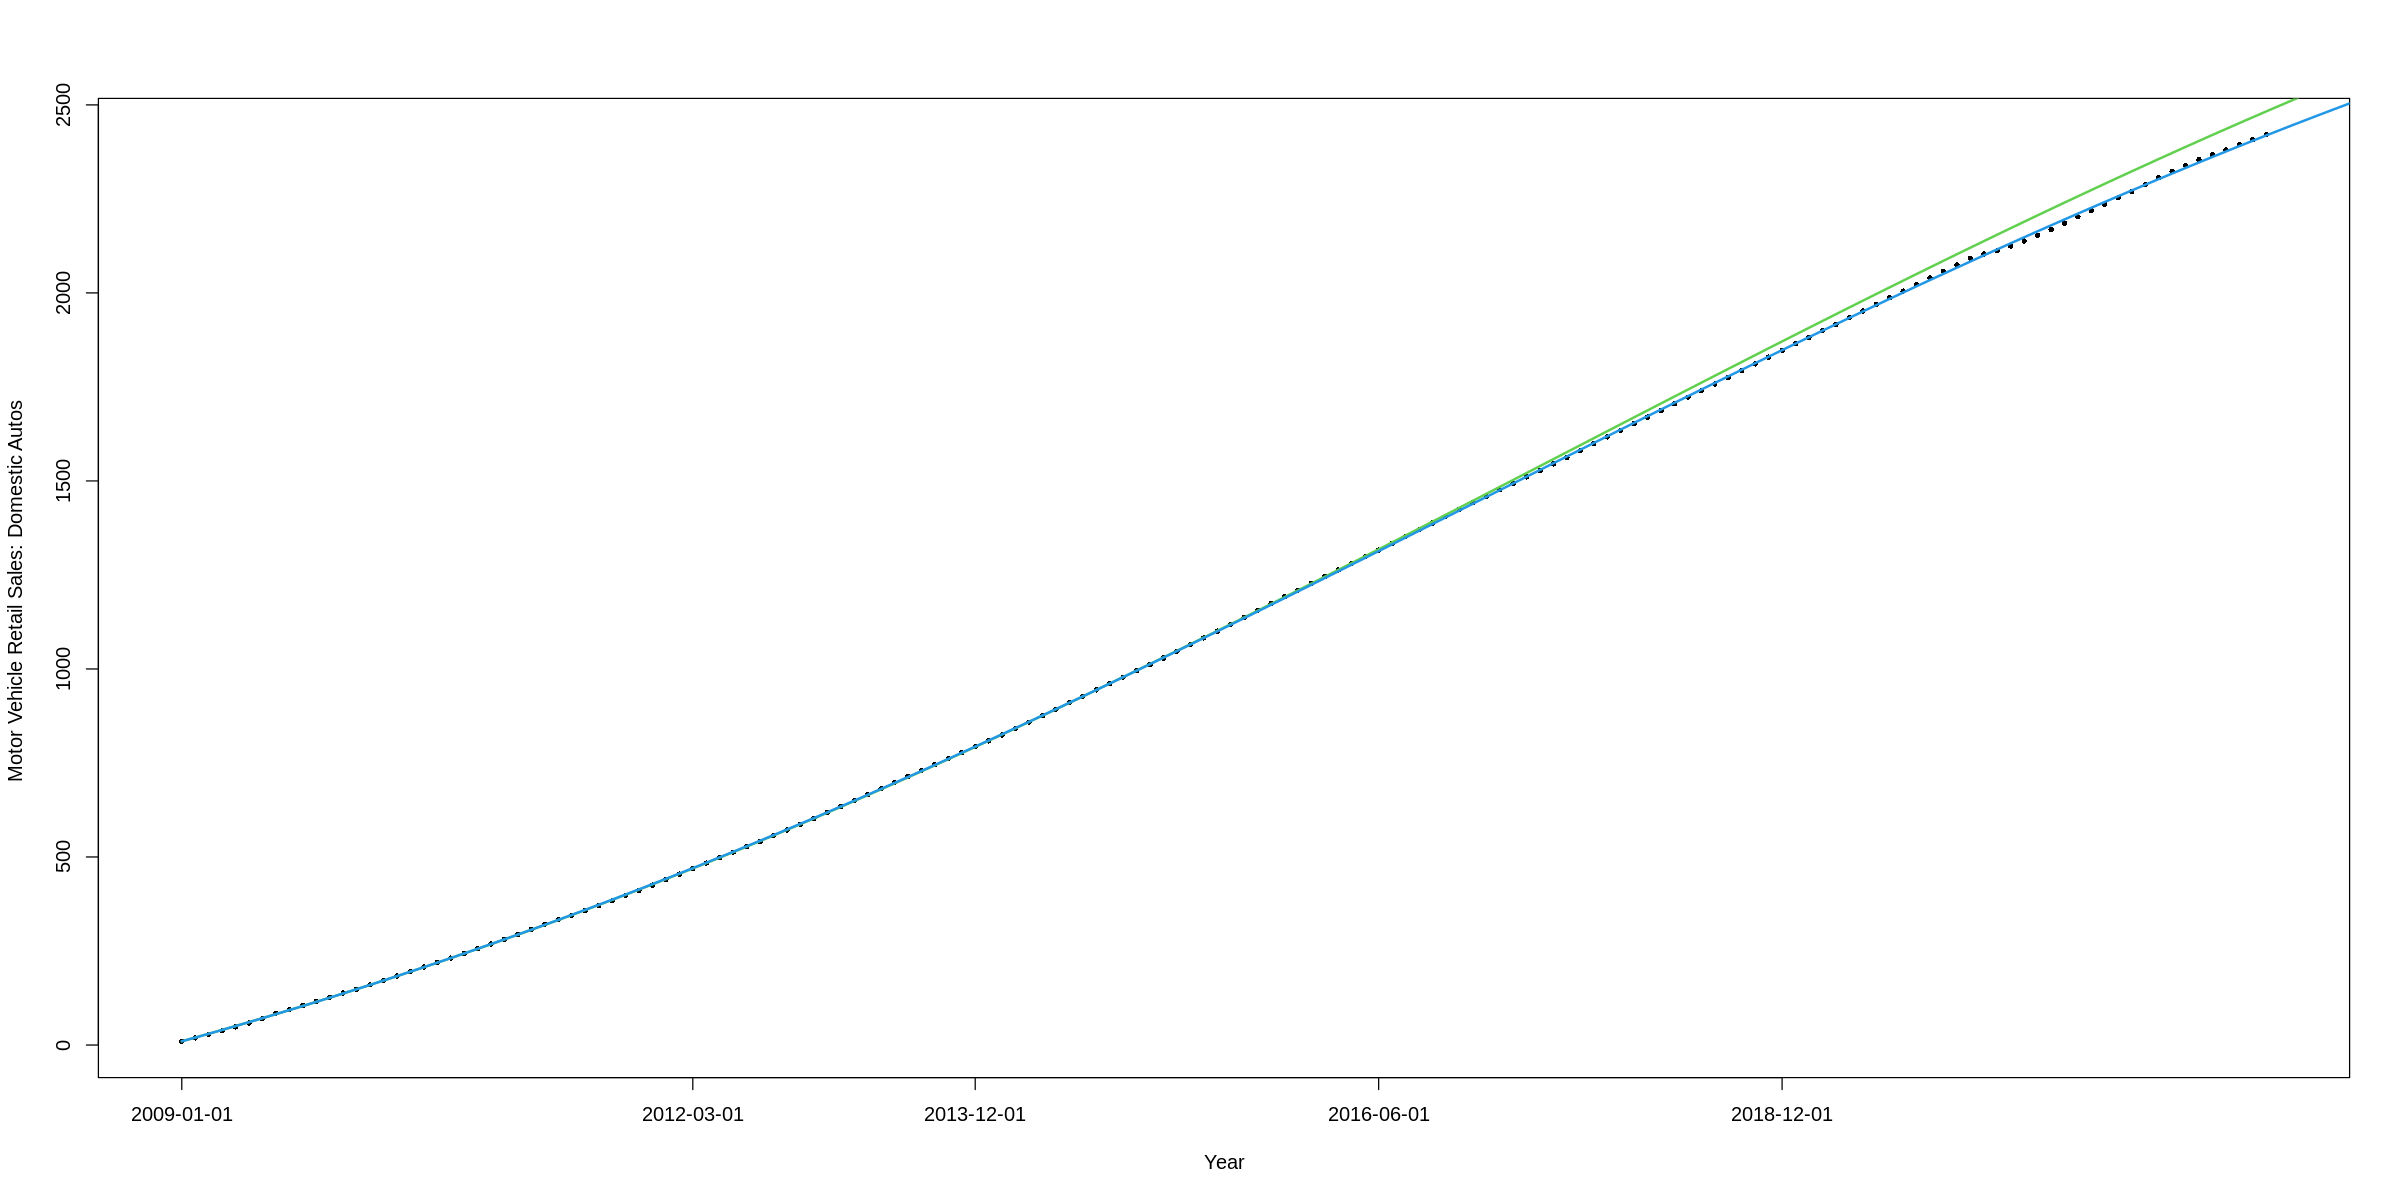

In [ ]:
###Comparison between models (cumulative)
plot(cumsum(s21_ba), type= "b",xlab="Year", ylab="Motor Vehicle Retail Sales: Domestic Autos ",  pch=16, lty=3, xaxt="n", cex=0.6)
axis(1, at=c(1,39,60,90,120), labels=s_21$DATE[c(1,39,60,90,120)])
lines(pred_bm_s2150, lwd=2, col=3)
lines(pred_bm_s21, lwd=2, col=4)

#GBM(retail)

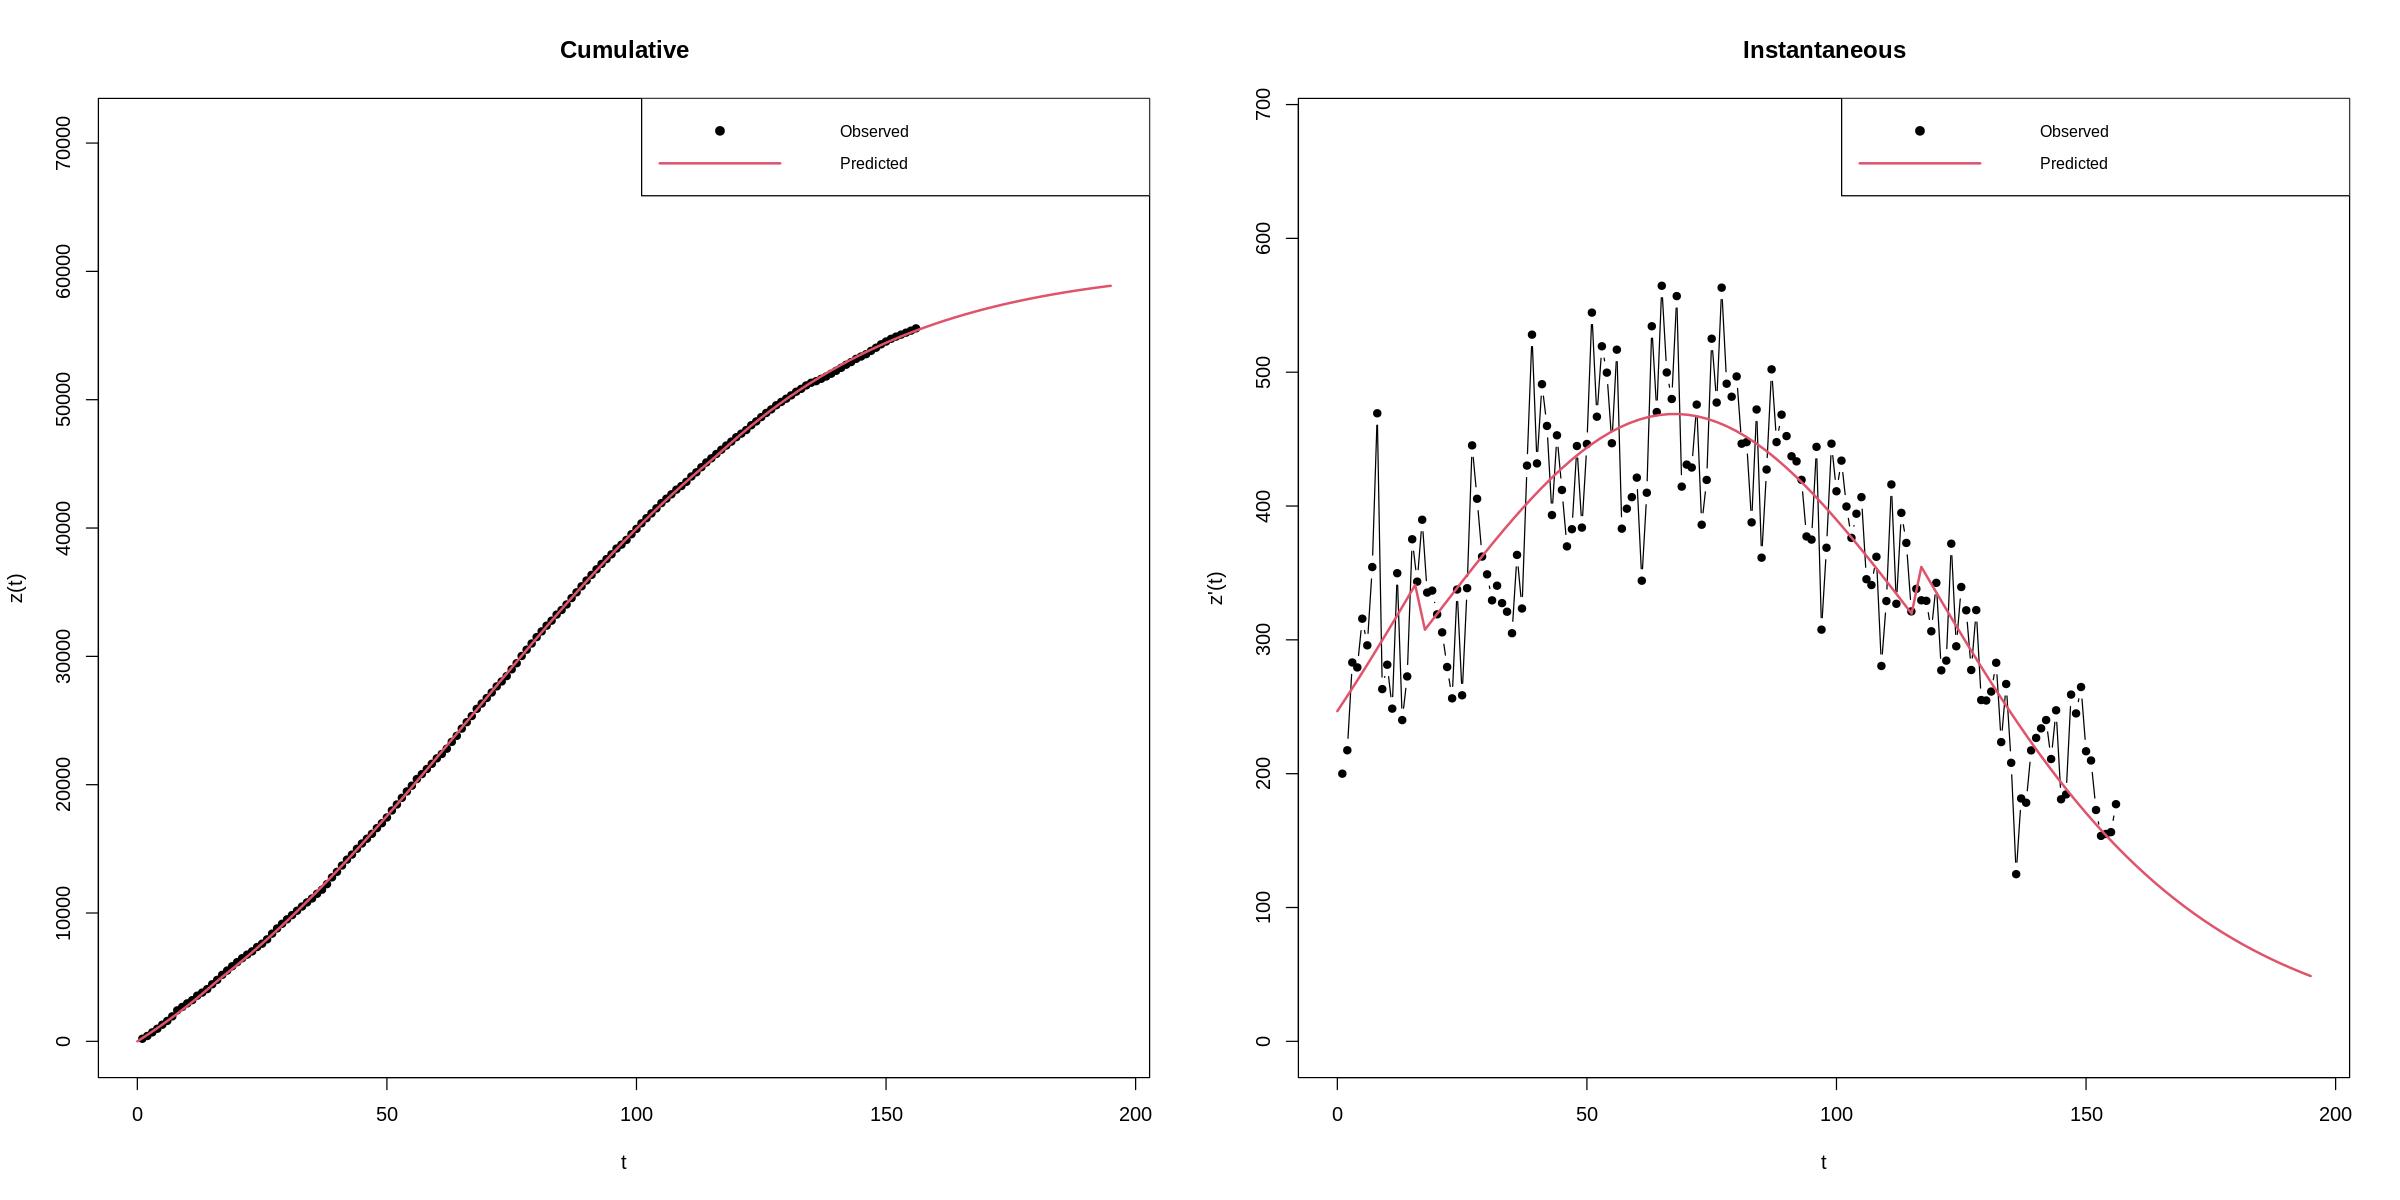

In [ ]:
GBMr1_de<- GBM(de_ba,shock = "rett",nshock = 1,prelimestimates = c(4.463368e+04, 1.923560e-03, 9.142022e-02, 24,38,-0.1))
summary(GBMr1_de)

Call: ( Generalized Bass model with 1  Exponential  shock )

  GBM(series = de_ba, shock = "exp", nshock = 1, prelimestimates = c(44633.68, 
    0.00192356, 0.09142022, 70, -0.5, 0.1))

Residuals:
     Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-263.535  -64.876    6.195   -1.087   80.898  147.111 

Coefficients:
          Estimate    Std.Error        Lower        Upper   p-value    
m    6.058849e+04 3.691110e+02 5.986505e+04 6.131194e+04 3.59e-171 ***
p    4.549466e-03 5.944060e-05 4.432965e-03 4.665968e-03 4.17e-122 ***
q    1.466355e-02 6.028235e-04 1.348204e-02 1.584506e-02  6.33e-54 ***
a1   3.788046e+01 7.709560e-01 3.636942e+01 3.939151e+01  2.30e-94 ***
b1   1.238476e-02 9.656775e-04 1.049207e-02 1.427745e-02  6.90e-26 ***
c1   1.641649e-01 1.749570e-02 1.298740e-01 1.984559e-01  9.59e-17 ***
---
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Residual standard error  93.34025  on  150  degrees of freedom
 Multiple R-squared:   0.999973  Residual sum 

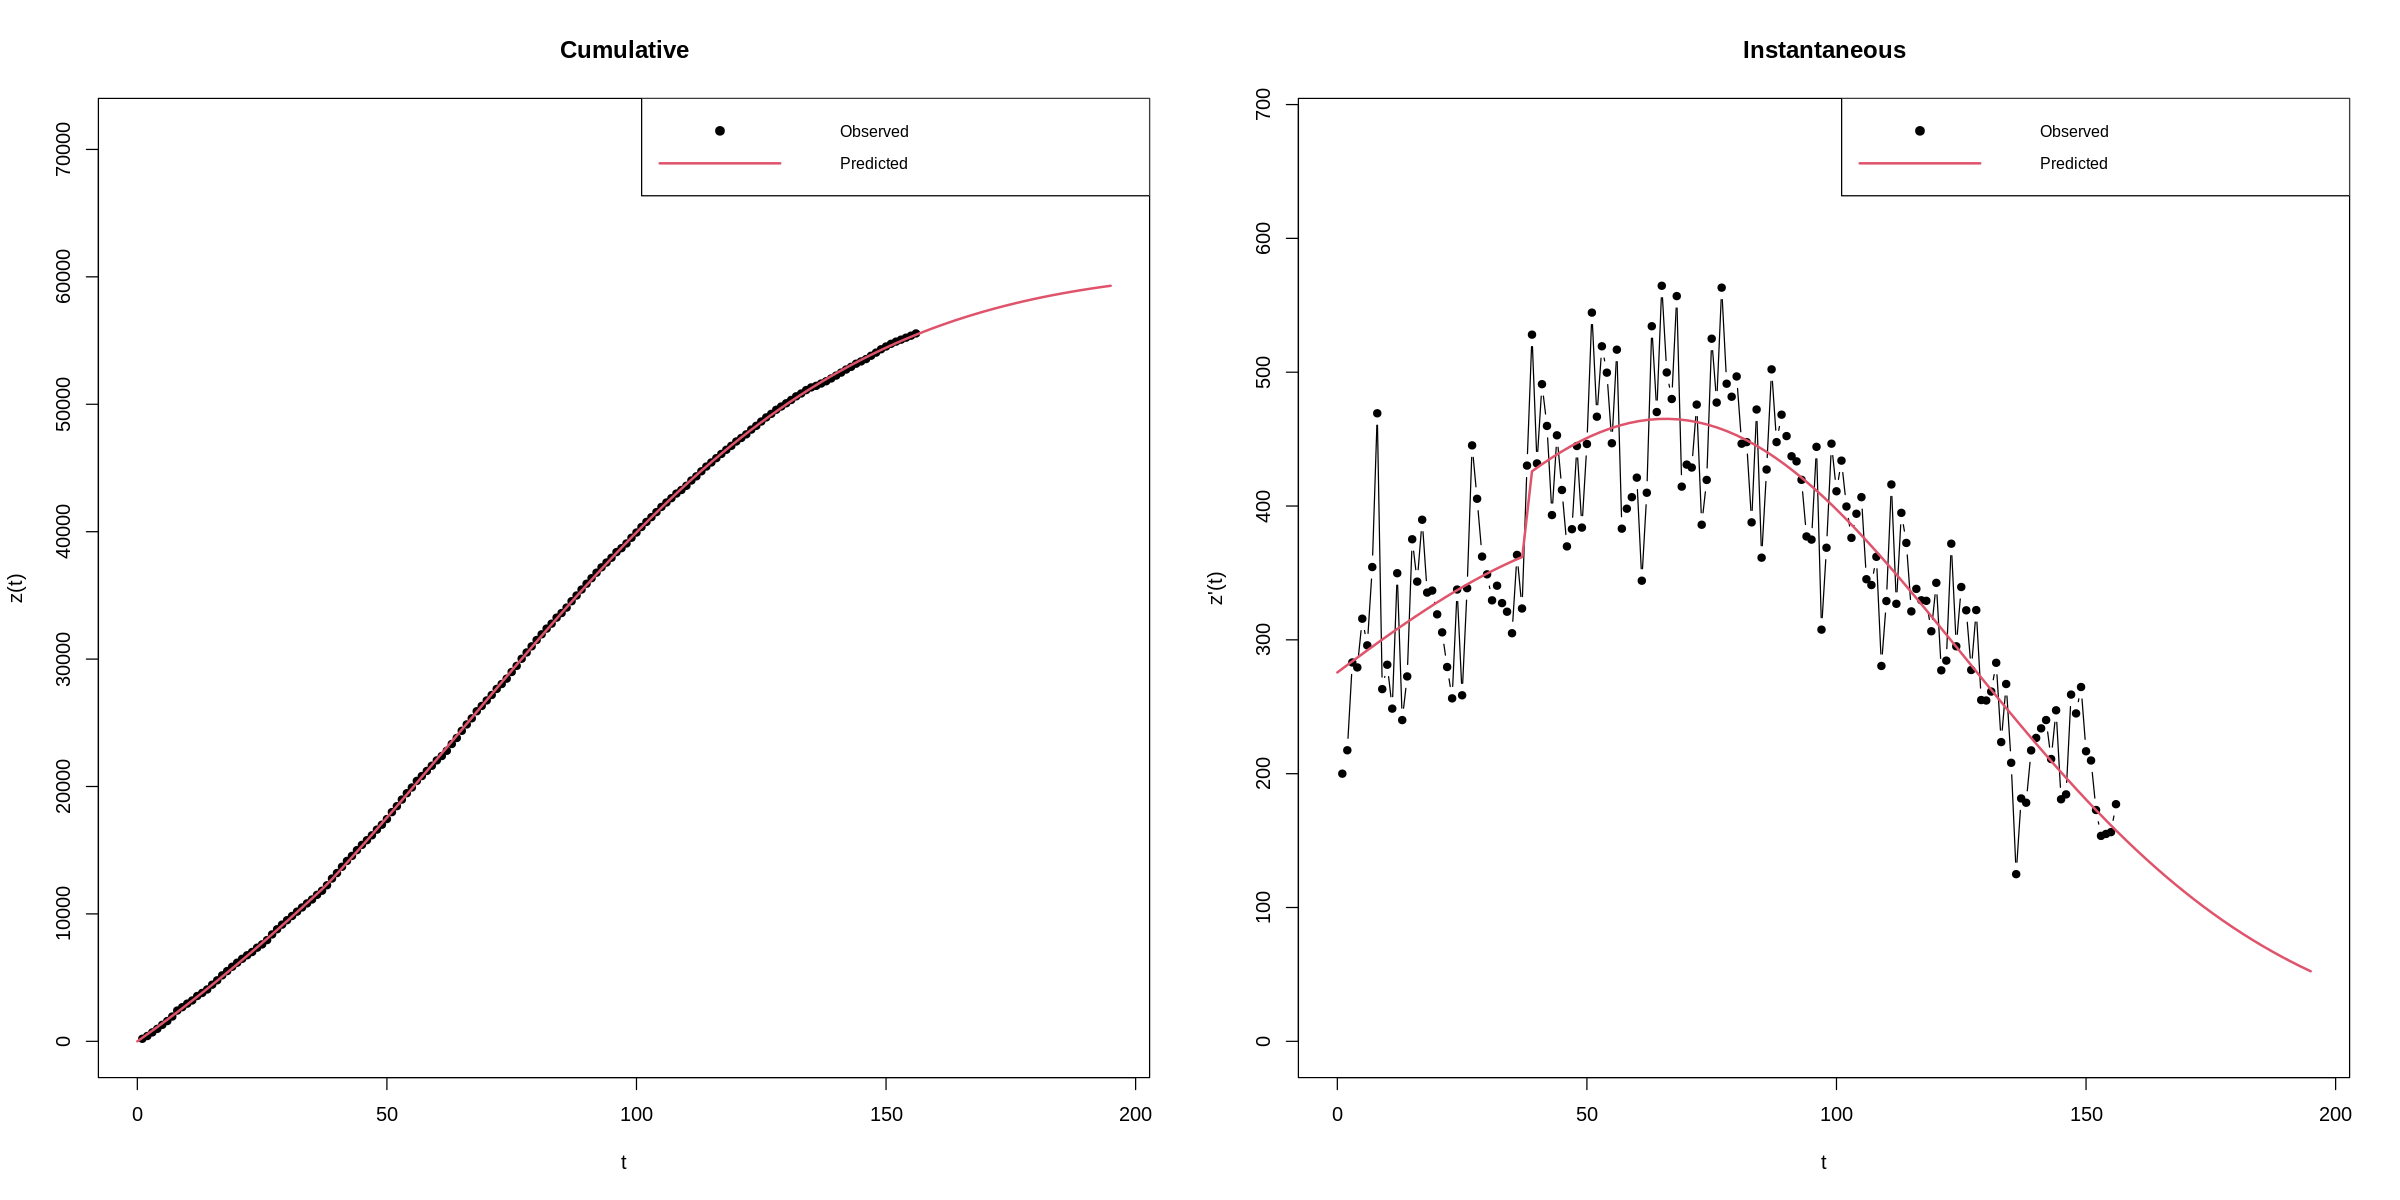

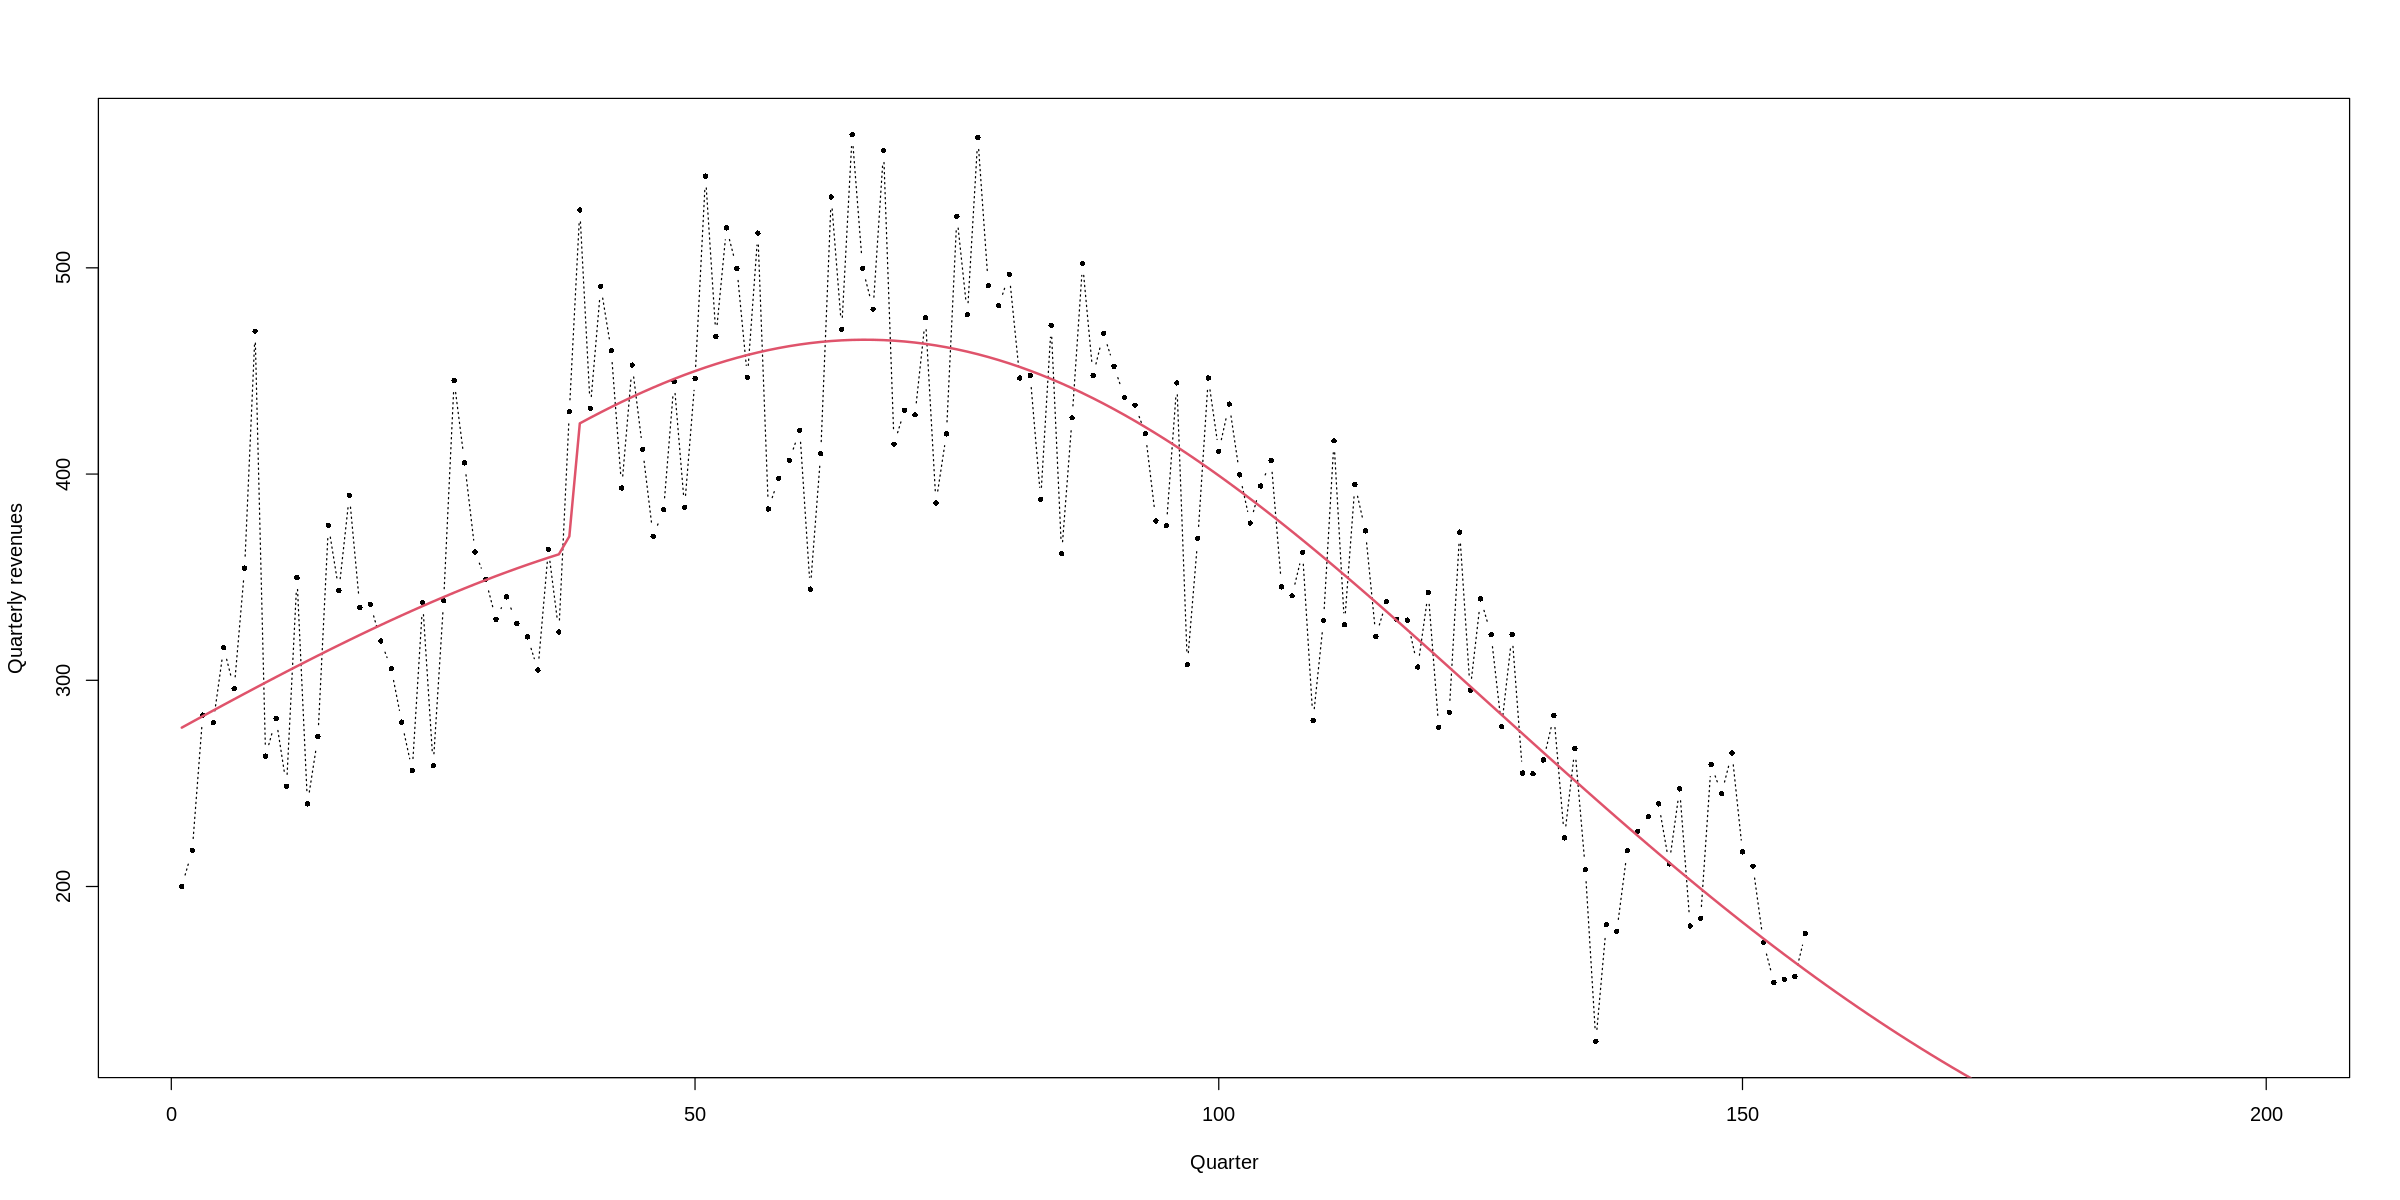

In [ ]:
######GBMe1

GBMe1_de<- GBM(de_ba,shock = "exp",nshock = 1,prelimestimates = c(4.463368e+04, 1.923560e-03, 9.142022e-02, 70,-0.5,0.1))
summary(GBMe1_de)

pred_GBMe1_de<- predict(GBMe1_de, newx=c(1:200))
pred_GBMe1_de.inst<- make.instantaneous(pred_GBMe1_de)

plot(de_ba, type= "b",xlab="Quarter", ylab="Quarterly revenues",  pch=16, lty=3, cex=0.6, xlim=c(1,200))
lines(pred_GBMe1_de.inst, lwd=2, col=2)

#lab